In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Présentation du jeu de données

In [2]:
#On importe notre fichier de données 
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t') #Tabulation séparant les champs
data.head()

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\4151865476.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t') #Tabulation séparant les champs


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [3]:
#Dimensions de notre fichier
print('Notre fichier est constitué de', data.shape[0], 'lignes et', data.shape[1], 'colonnes.')

Notre fichier est constitué de 320772 lignes et 162 colonnes.


In [4]:
#Type de données de notre nouveau df 
print(data.dtypes)

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object


In [5]:
#On affiche les infos 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None


In [6]:
#On effectue un describe des données
display(data.describe())

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

# Analyse pré-exploratoire

## Taux de remplissage

122

[0, 20[       18
[20, 40[      16
[40, 60[       8
[60, 80[      12
[80, 100]    108
Name: Intervalle_pourcentage_val_nul, dtype: int64


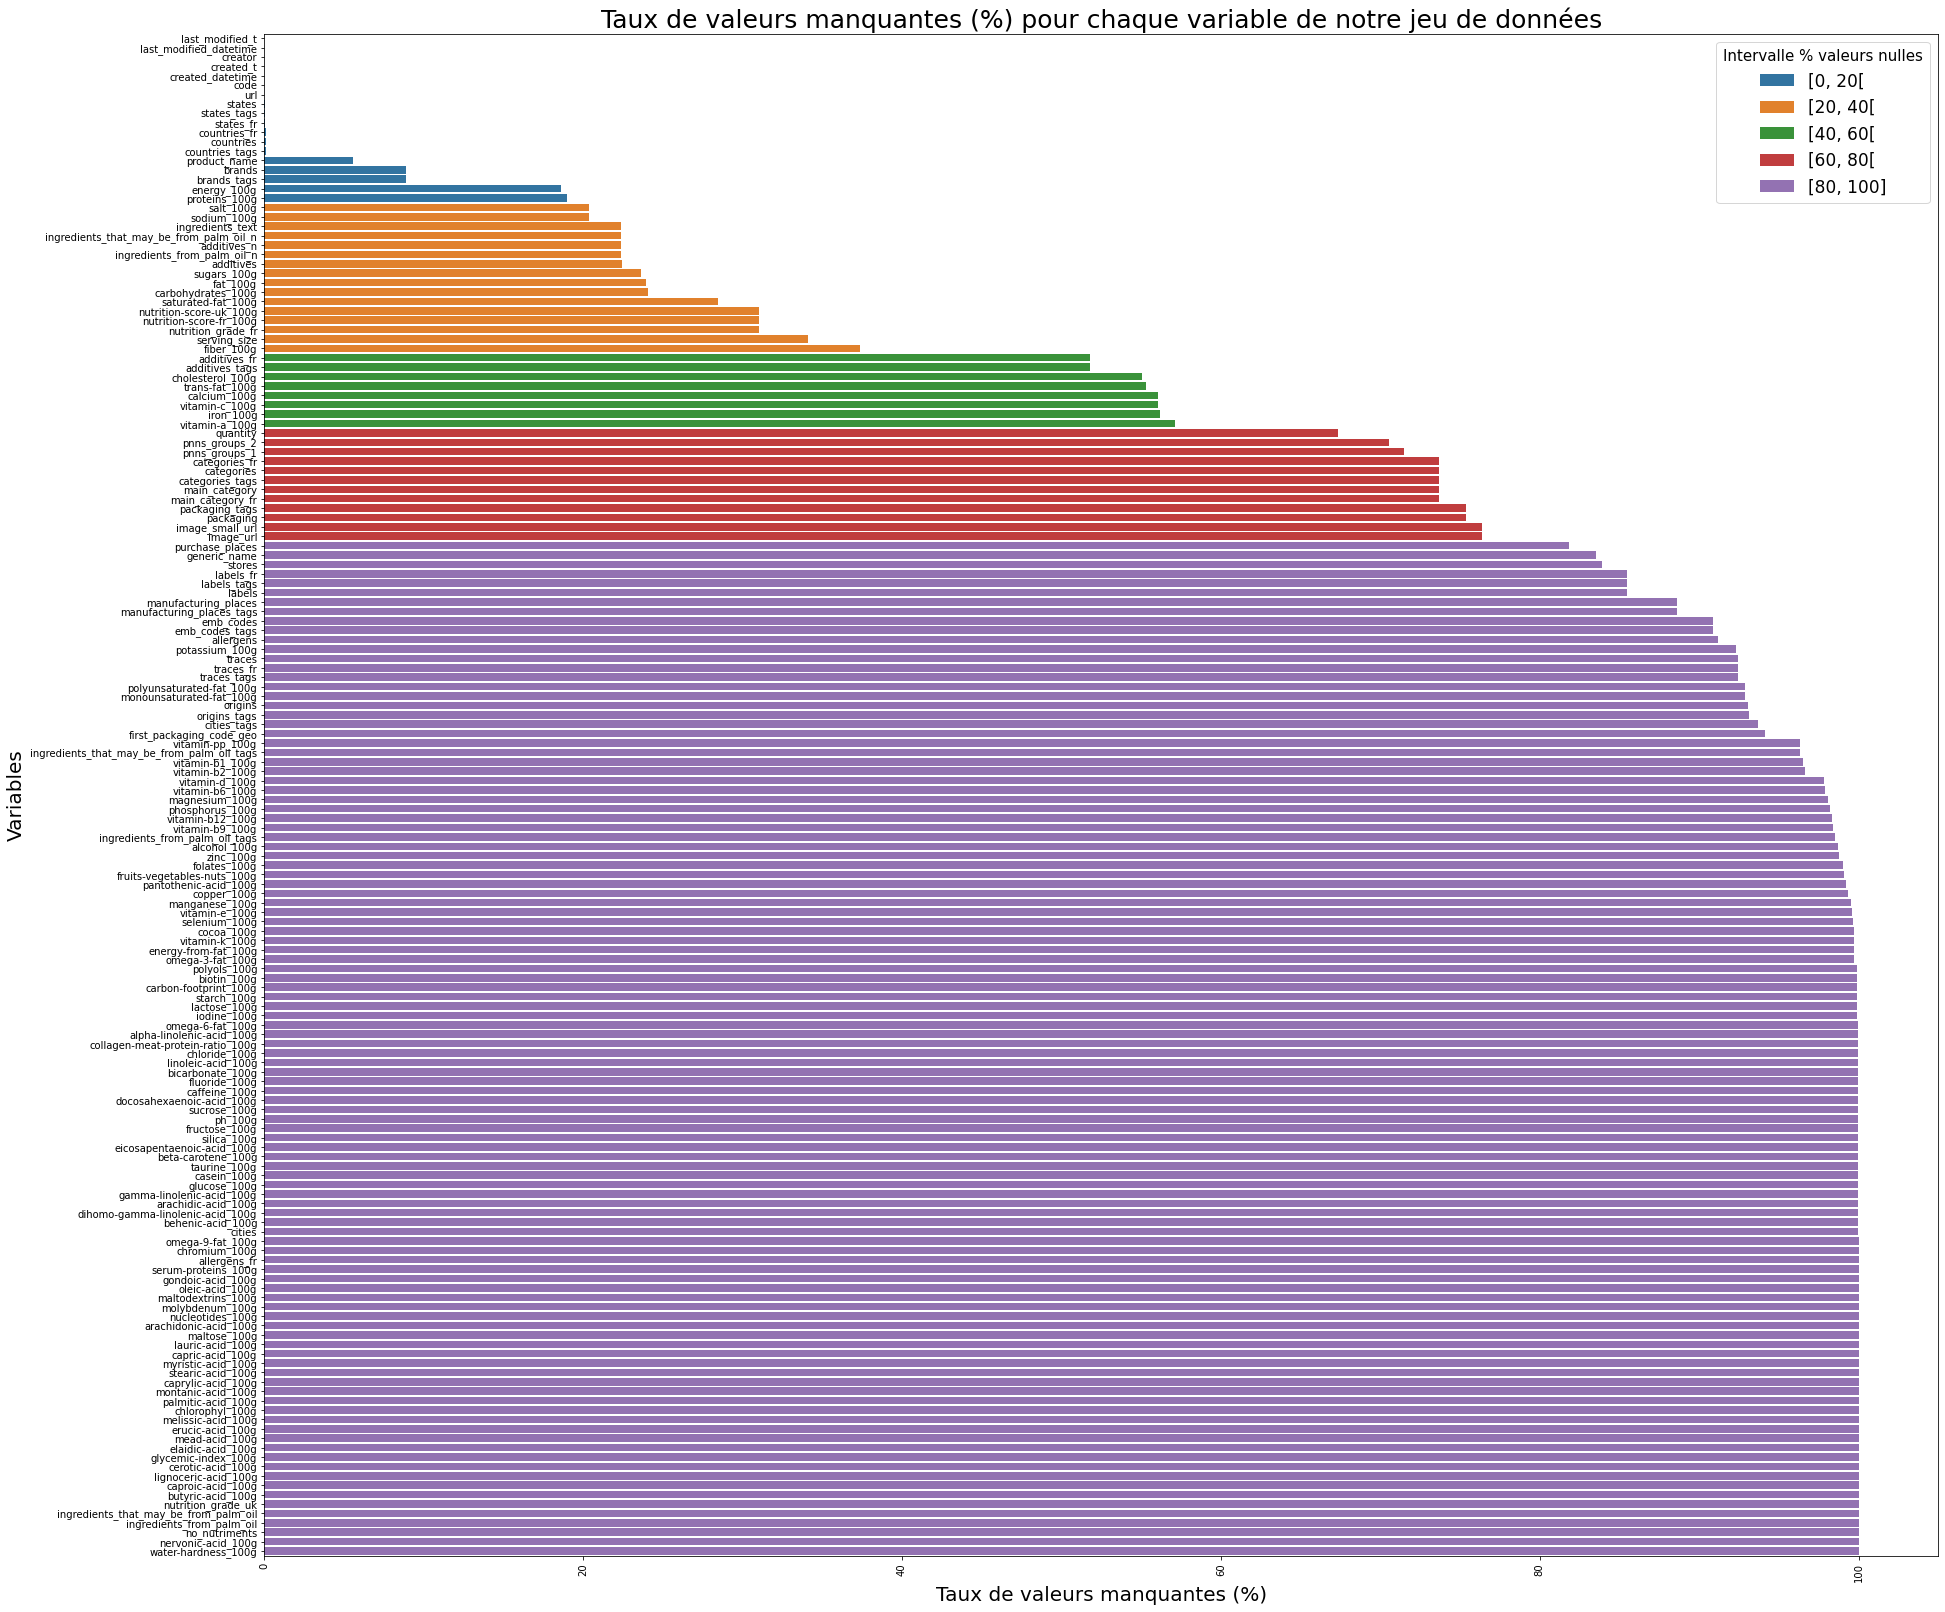

In [7]:
#On regarde les valeurs manquantes
total_lignes = data.shape[0]
val_nul = data.isnull().sum()

val_nul = val_nul.sort_values(ascending=True)*100/total_lignes
taux_val_nul = pd.DataFrame(val_nul).rename(columns = {0:'Pourcentage_valeurs_nulles'})
taux_val_nul = taux_val_nul.reset_index()
taux_val_nul_unique = taux_val_nul['Pourcentage_valeurs_nulles'].unique() #On affiche le nombre de données uniques en %
display(len(taux_val_nul_unique)) #On compte combien de valeurs uniques on a. 

#On va effectuer un groupement de valeurs
def binning(col, cut_points, labels=None):
    # Définir les valeurs min et max:
    minval = col.min()
    maxval = col.max()
    
    # Créer une liste en ajoutant min et max à cut_points
    break_points = [minval] + cut_points + [maxval]
    # Si aucun label, on utilise par défaut les labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    # Regroupement en utilisant la fonction cut de Pandas
    cut_points.sort()
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

cut_points = [20, 40, 60, 80]
labels = ['[0, 20[', '[20, 40[', '[40, 60[', '[60, 80[', '[80, 100]']
taux_val_nul['Intervalle_pourcentage_val_nul'] = binning(taux_val_nul['Pourcentage_valeurs_nulles'], cut_points, labels)
print(pd.value_counts(taux_val_nul['Intervalle_pourcentage_val_nul'], sort=False))

plt.figure(figsize=(30,28))
sns.barplot(data = taux_val_nul, x = 'Pourcentage_valeurs_nulles', y = 'index', hue = 'Intervalle_pourcentage_val_nul',
           dodge = False)

plt.xlabel('Taux de valeurs manquantes (%)', size = 20)
plt.ylabel('Variables', size = 20)
plt.title('Taux de valeurs manquantes (%) pour chaque variable de notre jeu de données', size = 25)

plt.legend(title = 'Intervalle % valeurs nulles', prop = {'size':17}, title_fontsize = 15)

plt.xticks(rotation = 90)

plt.savefig('Projet3_Taux valeurs manquantes.png')

plt.show()

index  Intervalle_pourcentage_val_nul
0    [0, 20[                              18
1   [20, 40[                              16
2   [40, 60[                               8
3   [60, 80[                              12
4  [80, 100]                             108

Text(0.5, 1.0, 'Variables ayant un certain taux de valeurs manquantes (en %)')

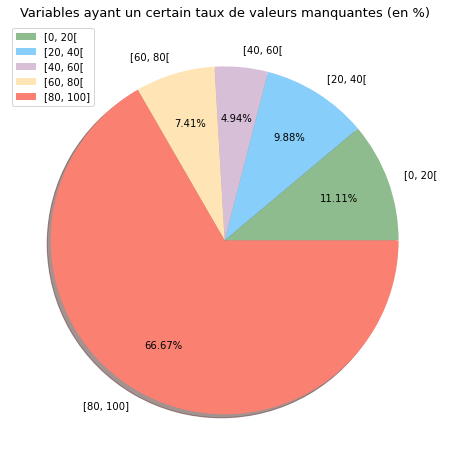

In [8]:
#On crée un df contenant le nombre de valeurs contenues dans chaque intervalle de classe. 
taux_val_nul_count = pd.value_counts(taux_val_nul['Intervalle_pourcentage_val_nul'], sort=False)
taux_val_nul_count = pd.DataFrame(taux_val_nul_count.reset_index())
display(taux_val_nul_count)

#On trace le camembert correspondant
plt.figure(figsize = (8,8))
plt.pie(x = taux_val_nul_count['Intervalle_pourcentage_val_nul'], labels = taux_val_nul_count['index'], 
        colors = ['darkseagreen', 'lightskyblue', 'thistle', 'moccasin', 'salmon'], 
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, shadow = True, normalize=True)
plt.legend()
plt.title('Variables ayant un certain taux de valeurs manquantes (en %)', size = '13')

In [9]:
#On regarde combien on a de lignes avec 100% de données manquantes
taux_val_nul_100 = taux_val_nul.loc[taux_val_nul['Pourcentage_valeurs_nulles'] == 100, :]
display(taux_val_nul_100)
print(taux_val_nul_100.shape[0], 'variables contiennent 100% de valeurs manquantes.')

index  Pourcentage_valeurs_nulles  \
146                        chlorophyl_100g                       100.0   
147                     melissic-acid_100g                       100.0   
148                       erucic-acid_100g                       100.0   
149                         mead-acid_100g                       100.0   
150                      elaidic-acid_100g                       100.0   
151                    glycemic-index_100g                       100.0   
152                      cerotic-acid_100g                       100.0   
153                   lignoceric-acid_100g                       100.0   
154                      caproic-acid_100g                       100.0   
155                      butyric-acid_100g                       100.0   
156                     nutrition_grade_uk                       100.0   
157  ingredients_that_may_be_from_palm_oil                       100.0   
158              ingredients_from_palm_oil                       100.0   
159                          no_nutriments                       100.0   
160                     nervonic-acid_100g                       100.0   
161                    water-hardness_100g                       100.0   

    Intervalle_pourcentage_val_nul  
146                      [80, 100]  
147                      [80, 100]  
148                      [80, 100]  
149                      [80, 100]  
150                      [80, 100]  
151                      [80, 100]  
152                      [80, 100]  
153                      [80, 100]  
154                      [80, 100]  
155                      [80, 100]  
156                      [80, 100]  
157                      [80, 100]  
158                      [80, 100]  
159                      [80, 100]  
160                      [80, 100]  
161                      [80, 100]

16 variables contiennent 100% de valeurs manquantes.


In [10]:
#On regarde quel est le pourcentage de variables avec un taux de valeurs manquantes situé entre 80 et 100%
taux_val_80_100 = taux_val_nul.loc[taux_val_nul['Intervalle_pourcentage_val_nul'] == '[80, 100]', 'Intervalle_pourcentage_val_nul'].count()*100/taux_val_nul.shape[0]
print(round(taux_val_80_100, 2), '% de variables ont un taux de valeurs manquantes situé entre 80 et 100%.')

66.67 % de variables ont un taux de valeurs manquantes situé entre 80 et 100%.


In [11]:
#On va regarder les variables ayant > 90% de valeurs manquantes
data_new = taux_val_nul.loc[taux_val_nul['Pourcentage_valeurs_nulles'] >= 90, :]
data_manq_sup_90 =  data_new['index'].tolist()
print(data_manq_sup_90)
print(len(data_manq_sup_90), 'variables ont un taux de valeurs manquantes > 90%')

['emb_codes', 'emb_codes_tags', 'allergens', 'potassium_100g', 'traces', 'traces_fr', 'traces_tags', 'polyunsaturated-fat_100g', 'monounsaturated-fat_100g', 'origins', 'origins_tags', 'cities_tags', 'first_packaging_code_geo', 'vitamin-pp_100g', 'ingredients_that_may_be_from_palm_oil_tags', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-d_100g', 'vitamin-b6_100g', 'magnesium_100g', 'phosphorus_100g', 'vitamin-b12_100g', 'vitamin-b9_100g', 'ingredients_from_palm_oil_tags', 'alcohol_100g', 'zinc_100g', 'folates_100g', 'fruits-vegetables-nuts_100g', 'pantothenic-acid_100g', 'copper_100g', 'manganese_100g', 'vitamin-e_100g', 'selenium_100g', 'cocoa_100g', 'vitamin-k_100g', 'energy-from-fat_100g', 'omega-3-fat_100g', 'polyols_100g', 'biotin_100g', 'carbon-footprint_100g', 'starch_100g', 'lactose_100g', 'iodine_100g', 'omega-6-fat_100g', 'alpha-linolenic-acid_100g', 'collagen-meat-protein-ratio_100g', 'chloride_100g', 'linoleic-acid_100g', 'bicarbonate_100g', 'fluoride_100g', 'caffeine_100g'

## Observation des groupes/catégories et Pays 

In [12]:
#Regardons quels sont les pays que l'on retrouve
data['countries'] = data['countries'].replace(['en:france'], 'France')
data['countries'] = data['countries'].replace(['en:FR'], 'France')
display(data['countries'].value_counts())

US                                            169928
France                                         94276
Suisse                                         12314
Deutschland                                     6161
España                                          3688
                                               ...  
Tschechien,Dänemark,Frankreich,Deutschland         1
Danemark,Allemagne,France                          1
Dänemark,Frankreich,Deutschland,Indien             1
Dänemark                                           1
Hong Kong,China                                    1
Name: countries, Length: 1432, dtype: int64

In [13]:
#Regardons les différentes catégories ou groupes
colonnes_categories = ['categories_fr', 'pnns_groups_2', 'pnns_groups_1', 'main_category_fr'] 
for categ in colonnes_categories:
    print('---------------------------')
    print('La colonne nommée', categ, 'contient ces différents groupes : ')
    display(data[categ].value_counts())

---------------------------
La colonne nommée categories_fr contient ces différents groupes : 


Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          802
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                             609
Snacks sucrés,Confiseries,Bonbons                                                                                                                                   526
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    522
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     465
                                                                                                                                                                

---------------------------
La colonne nommée pnns_groups_2 contient ces différents groupes : 


unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

---------------------------
La colonne nommée pnns_groups_1 contient ces différents groupes : 


unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

---------------------------
La colonne nommée main_category_fr contient ces différents groupes : 


Boissons                                   6054
Epicerie                                   2902
Chocolats                                  2789
Aliments et boissons à base de végétaux    2745
Conserves                                  2519
                                           ... 
Anchoiade                                     1
Creme-de-riz                                  1
Creme-de-sarrasin                             1
en:Crackers-sans-gluten                       1
pl:Szprot                                     1
Name: main_category_fr, Length: 3543, dtype: int64

#### "pnns_groups_2" donne des renseignements plus précis sur les différentes catégories de produits et semble complète et exhaustive. 

## Problématique 

### Le label "bio" est-il garant d'une alimentation plus saine qu'un produit non labellisé (en France)? 

### Produits labellisés "bio" et vendus en France

In [14]:
#On va choisir parmi notre liste de variables, celles qui vont nous intéresser.  
#On peut également regarder leurs labels et voir quels sont les produits (bio, écologiques, ...)
data_bio = data[data['labels'].str.contains('Bio|Orga|AB', na=False)] #Je sélectionne les produits ayant comme label "Bio" ou "Orga"
display(data_bio.head())
display(data_bio['labels'].value_counts())
data_bio['countries'].value_counts()

#On sélectionne les données que l'on souhaite (bio + France)
data_bio_France = data_bio.loc[data_bio['countries'].str.contains('France', na=False), :]

#On sélectionne les variables qui nous intéressent
liste_variables = ['code', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'pnns_groups_2', 'labels', 
                   'countries', 'ingredients_text','additives_n', 'additives_tags', 'main_category_fr', 'energy_100g', 
                   'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 'sugars_100g', 
                   'nutrition-score-fr_100g', 'nutrition_grade_fr'] 
data_bio_France = data_bio_France.loc[:, liste_variables]
display(data_bio_France.head())
print(data_bio_France['countries'].unique())
len(data_bio_France['countries'].unique())
print(data_bio_France.shape)

code                                                url  creator  \
182       5200016  http://world-fr.openfoodfacts.org/produit/0000...  sigoise   
495    2000003395  http://world-fr.openfoodfacts.org/produit/0002...  kiliweb   
1651  10852997489  http://world-fr.openfoodfacts.org/produit/0010...  tacinte   
2324  11110372710  http://world-fr.openfoodfacts.org/produit/0011...  tacinte   
3812  11110847690  http://world-fr.openfoodfacts.org/produit/0011...    kp757   

       created_t      created_datetime last_modified_t last_modified_datetime  \
182   1441186657  2015-09-02T09:37:37Z      1442570752   2015-09-18T10:05:52Z   
495   1485978144  2017-02-01T19:42:24Z      1485978145   2017-02-01T19:42:25Z   
1651  1422846023  2015-02-02T03:00:23Z      1439141749   2015-08-09T17:35:49Z   
2324  1421781777  2015-01-20T19:22:57Z      1489065086   2017-03-09T13:11:26Z   
3812  1424775678  2015-02-24T11:01:18Z      1439141752   2015-08-09T17:35:52Z   

                                product_name    generic_name      quantity  \
182                        lentilles vertes              NaN         1 kg    
495          Black & White Crispbread Sticks             NaN           NaN   
1651  Cream on Top strawberry Organic Yogurt             NaN  6 oz (170 g)   
2324                Soynuts Roasted & Salted             NaN          6 OZ   
3812                          Garbanzo Beans  Garbanzo Beans         15 oz   

      ... ph_100g fruits-vegetables-nuts_100g  \
182   ...     NaN                         NaN   
495   ...     NaN                         NaN   
1651  ...     NaN                         NaN   
2324  ...     NaN                         NaN   
3812  ...     NaN                         NaN   

     collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
182                               NaN        NaN             NaN   
495                               NaN        NaN             NaN   
1651                              NaN        NaN             NaN   
2324                              NaN        NaN             NaN   
3812                              NaN        NaN             NaN   

     carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
182                    NaN                     NaN                     NaN   
495                    NaN                    11.0                    11.0   
1651                   NaN                     5.0                     5.0   
2324                   NaN                     7.0                     7.0   
3812                   NaN                    -5.0                    -5.0   

     glycemic-index_100g water-hardness_100g  
182                  NaN                 NaN  
495                  NaN                 NaN  
1651                 NaN                 NaN  
2324                 NaN                 NaN  
3812                 NaN                 NaN  

[5 rows x 162 columns]

Organic, EU Organic, fr:AB Agriculture Biologique                                                                                                 3223
Bio,Bio européen,AB Agriculture Biologique                                                                                                         979
AB,Bio européen                                                                                                                                    459
Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique                                                                                               320
Bio                                                                                                                                                167
                                                                                                                                                  ... 
Bio,Bio européen,FR-BIO-01,Sans colorants,AB Agriculture Biologique,Porc Français,Viande Franç

code last_modified_datetime  \
182        5200016   2015-09-18T10:05:52Z   
495     2000003395   2017-02-01T19:42:25Z   
9761   11535501351   2016-12-19T16:52:26Z   
11779       149228   2017-03-04T16:10:30Z   
14314  18627917694   2017-02-20T16:32:24Z   

                                product_name quantity             brands  \
182                        lentilles vertes     1 kg    Bertrand Lejeune   
495          Black & White Crispbread Sticks      NaN  Swedish By Nature   
9761   Wild Harvest Organic Original Soymilk  1920 mL       Wild Harvest   
11779                      Amandino Blanches    350 g            Damiano   
14314    Kashi Almond & Sea Salt Granola Bar      NaN              Kashi   

      pnns_groups_2                                             labels  \
182         Legumes                                                 AB   
495             NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
9761        unknown                                       USDA Organic   
11779       unknown     Bio,Bio européen,IT-BIO-006,Agriculture Italie   
14314           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   

                  countries  \
182                  France   
495                  France   
9761   France,United States   
11779                France   
14314                France   

                                        ingredients_text  additives_n  ...  \
182                                     lentilles vertes          0.0  ...   
495                                                  NaN          NaN  ...   
9761                                                 NaN          NaN  ...   
11779  _Amandes_ pelées séchées à la vapeur et broyée...          0.0  ...   
14314                                                NaN          NaN  ...   

      energy_100g fat_100g  saturated-fat_100g  fiber_100g  proteins_100g  \
182           NaN      NaN                 NaN         NaN            NaN   
495        1674.0      NaN                 1.8        10.0           15.0   
9761          NaN      NaN                 NaN         NaN            NaN   
11779      2536.0     55.4                 5.0         NaN           22.2   
14314       586.0      NaN                 1.0         3.0            5.0   

       salt_100g  carbohydrates_100g  sugars_100g  nutrition-score-fr_100g  \
182          NaN                 NaN          NaN                      NaN   
495      2.40000                 NaN          5.5                     11.0   
9761         NaN                 NaN          NaN                      NaN   
11779    0.03683                 4.6          NaN                      NaN   
14314    0.09000                 NaN          6.0                     -5.0   

       nutrition_grade_fr  
182                   NaN  
495                     d  
9761                  NaN  
11779                 NaN  
14314                   a  

[5 rows x 22 columns]

['France' 'France,United States' 'France, US' 'Canada,France'
 'France,États-Unis' 'France,Royaume-Uni' 'France,Italie' 'France,Belgium'
 'Danemark,Royaume-Uni,France' 'France,United Kingdom'
 'France,Switzerland' 'Belgique,France' 'Belgique,France,Allemagne,suisse'
 'France,Allemagne' 'France,Monaco' 'France,Guyane' 'New Caledonia,France'
 'France, en:switzerland' 'France,Suisse' 'France,La Réunion'
 'Belgique,France,Suisse' 'France, en:switzerland, en:belgium'
 'France, Guyane' 'France,Vanuatu' 'France,Grèce,Espagne, en:belgium'
 'Belgique,France,Espagne' 'France,Guadeloupe' 'France,Portugal,Belgium'
 'France,Cora' 'France,French Guiana' 'France,Espagne' 'France,Spain'
 'France, en:belgium, en:switzerland' 'France,Pays-Bas' 'France, en:spain'
 'France, en:belgium' 'France,Nouvelle-Calédonie' 'France,en:Belgique'
 'Puyricard,France' 'France,Portugal' 'Belgium,France' 'France,Belgique'
 'France,Espagne,Portugal' 'France,Portugal,Espagne' 'France, en:reunion'
 'Luxembourg,France' 'Suiss

10855


17

[0, 20[     11
[20, 40[     6
[40, 60[     4
[80,100]     1
Name: Intervalle_pourcentage_val_nul, dtype: int64


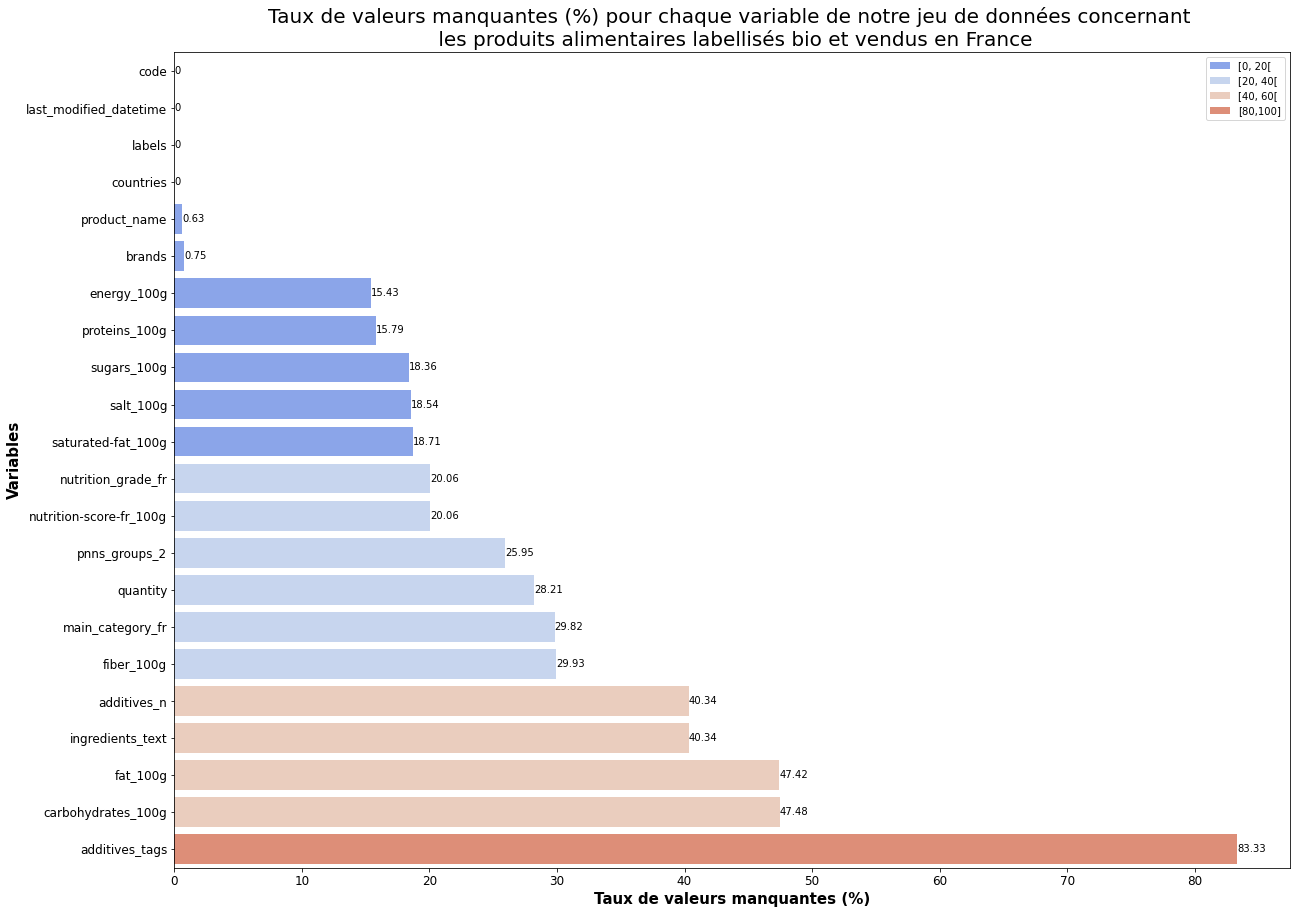

In [15]:
#On calcule à nouveau le taux de remplissage pour notre nouveau df
total_lignes_bio = data_bio_France.shape[0]
print(total_lignes_bio)
val_nul_bio = data_bio_France.isnull().sum()

val_nul_bio = round(val_nul_bio.sort_values(ascending=True)*100/total_lignes_bio, 2)
taux_val_nul_bio = pd.DataFrame(val_nul_bio).rename(columns = {0:'Pourcentage_valeurs_nulles'})
taux_val_nul_bio = taux_val_nul_bio.reset_index()
taux_val_nul_unique_bio = taux_val_nul_bio['Pourcentage_valeurs_nulles'].unique() #On affiche le nombre de données uniques en %
display(len(taux_val_nul_unique_bio)) #On compte combien de valeurs uniques on a. 


#On effectue notre groupement de valeurs
cut_points = [20, 40, 60]
labels = ['[0, 20[', '[20, 40[', '[40, 60[', '[80,100]']
taux_val_nul_bio['Intervalle_pourcentage_val_nul'] = binning(taux_val_nul_bio['Pourcentage_valeurs_nulles'], cut_points, labels)
print(pd.value_counts(taux_val_nul_bio['Intervalle_pourcentage_val_nul'], sort=False))

#On affiche le graphique
plt.figure(figsize=(20,15))

ax = sns.barplot(data = taux_val_nul_bio, x="Pourcentage_valeurs_nulles", y="index",  hue = 'Intervalle_pourcentage_val_nul', 
                 palette = 'coolwarm', ci=None, dodge = False)

plt.legend(loc = 'best')
plt.xlabel('Taux de valeurs manquantes (%)', size = 15, fontweight='bold')
plt.ylabel('Variables', size = 15, fontweight='bold')
plt.title('Taux de valeurs manquantes (%) pour chaque variable de notre jeu de données concernant \n les produits alimentaires labellisés bio et vendus en France', size = 20)

plt.yticks(size=12)
plt.xticks(size=12)


for i in ax.containers:
    ax.bar_label(i,)
    
    
plt.savefig('Projet3_Taux valeurs manquantes bio France.png')

plt.show()

In [16]:
#On regarde si les 83% de données manquantes pour la variable "additives_tags" correspondent à des produits dont le nombre 
#d'additifs est de 0 et/ou dont nous avons des données manquantes. 
taux_add = (data_bio_France.loc[(data_bio_France['additives_tags'].isnull()) &
                    (data_bio_France['additives_n'] == 0) |
                    (data_bio_France['additives_tags'].isnull()) &
                    (data_bio_France['additives_n'].isnull()), :].shape[0]/data_bio_France.shape[0])*100

print(round(taux_add, 2), '% des données manquantes pour les additifs correspondant à un nombre d\'additifs nul')

83.33 % des données manquantes pour les additifs correspondant à un nombre d'additifs nul


#### Je peux me permettre de garder la variable "additives_tags", bien  que 83% des données soient manquantes. Elles peuvent correspondre à des produits n'ayant pas d'ajouts d'additifs. 

##### Si nous nous penchons sur le taux de remplissage concernant nos variables sélectionnées, nous pouvons voir quelles sont les variables pour lesquelles nous n'avons pas ou très peu de valeurs manquantes. Ces variables concernent le code, le label, ainsi que le pays dans lequel il est vendu. Mais nous avons également peu de valeurs manquantes concernant le nom du produit, sa marque, ainsi que quelques informations nutritionnelles telles que l'énergie, les protéines, la teneur en sel, en sodium, en sucres, en acides gras saturés, et le nutriscore ou sa catégorie. Dans le cas de valeurs manquantes, il faudra essayer de trouver une solution pour les traiter.  

index  Intervalle_pourcentage_val_nul
0   [0, 20[                              11
1  [20, 40[                               6
2  [40, 60[                               4
3  [80,100]                               1

Text(0.5, 1.0, 'Variables ayant un certain taux de valeurs manquantes (en %) \n pour les produits labellisés "bio" et vendus en France')

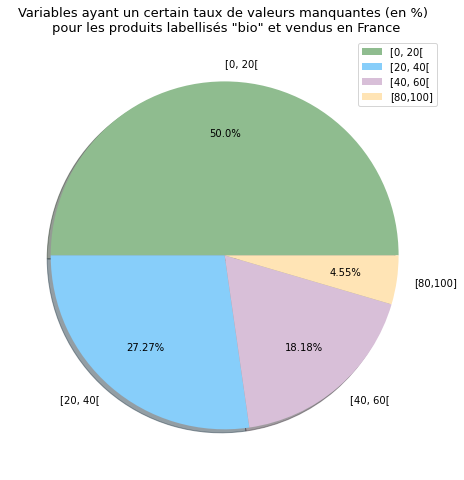

In [17]:
#On crée un df contenant le nombre de valeurs contenues dans chaque intervalle de classe. 
taux_val_nul_bio_count = pd.value_counts(taux_val_nul_bio['Intervalle_pourcentage_val_nul'], sort=False)
taux_val_nul_bio_count = pd.DataFrame(taux_val_nul_bio_count.reset_index())
display(taux_val_nul_bio_count)

# On trace le camembert correspondant
plt.figure(figsize = (8,8))
plt.pie(x = taux_val_nul_bio_count['Intervalle_pourcentage_val_nul'], labels = taux_val_nul_bio_count['index'], 
        colors = ['darkseagreen', 'lightskyblue', 'thistle', 'moccasin'], 
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, shadow = True, normalize=True)
plt.legend()
plt.title('Variables ayant un certain taux de valeurs manquantes (en %) \n pour les produits labellisés "bio" et vendus en France', size = '13')

# Corrélations entre les variables 

In [18]:
#Liste des colonnes que nous avons gardé  
data_bio_France.columns

Index(['code', 'last_modified_datetime', 'product_name', 'quantity', 'brands',
       'pnns_groups_2', 'labels', 'countries', 'ingredients_text',
       'additives_n', 'additives_tags', 'main_category_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'carbohydrates_100g', 'sugars_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr'],
      dtype='object')

In [19]:
#On va remlacer le nom de certaines variables
data_bio_France = data_bio_France.rename(columns = {'saturated-fat_100g' : 'saturated_fat_100g', 'nutrition-score-fr_100g' : 'nutrition_score_fr_100g'})

<Figure size 1080x720 with 0 Axes>

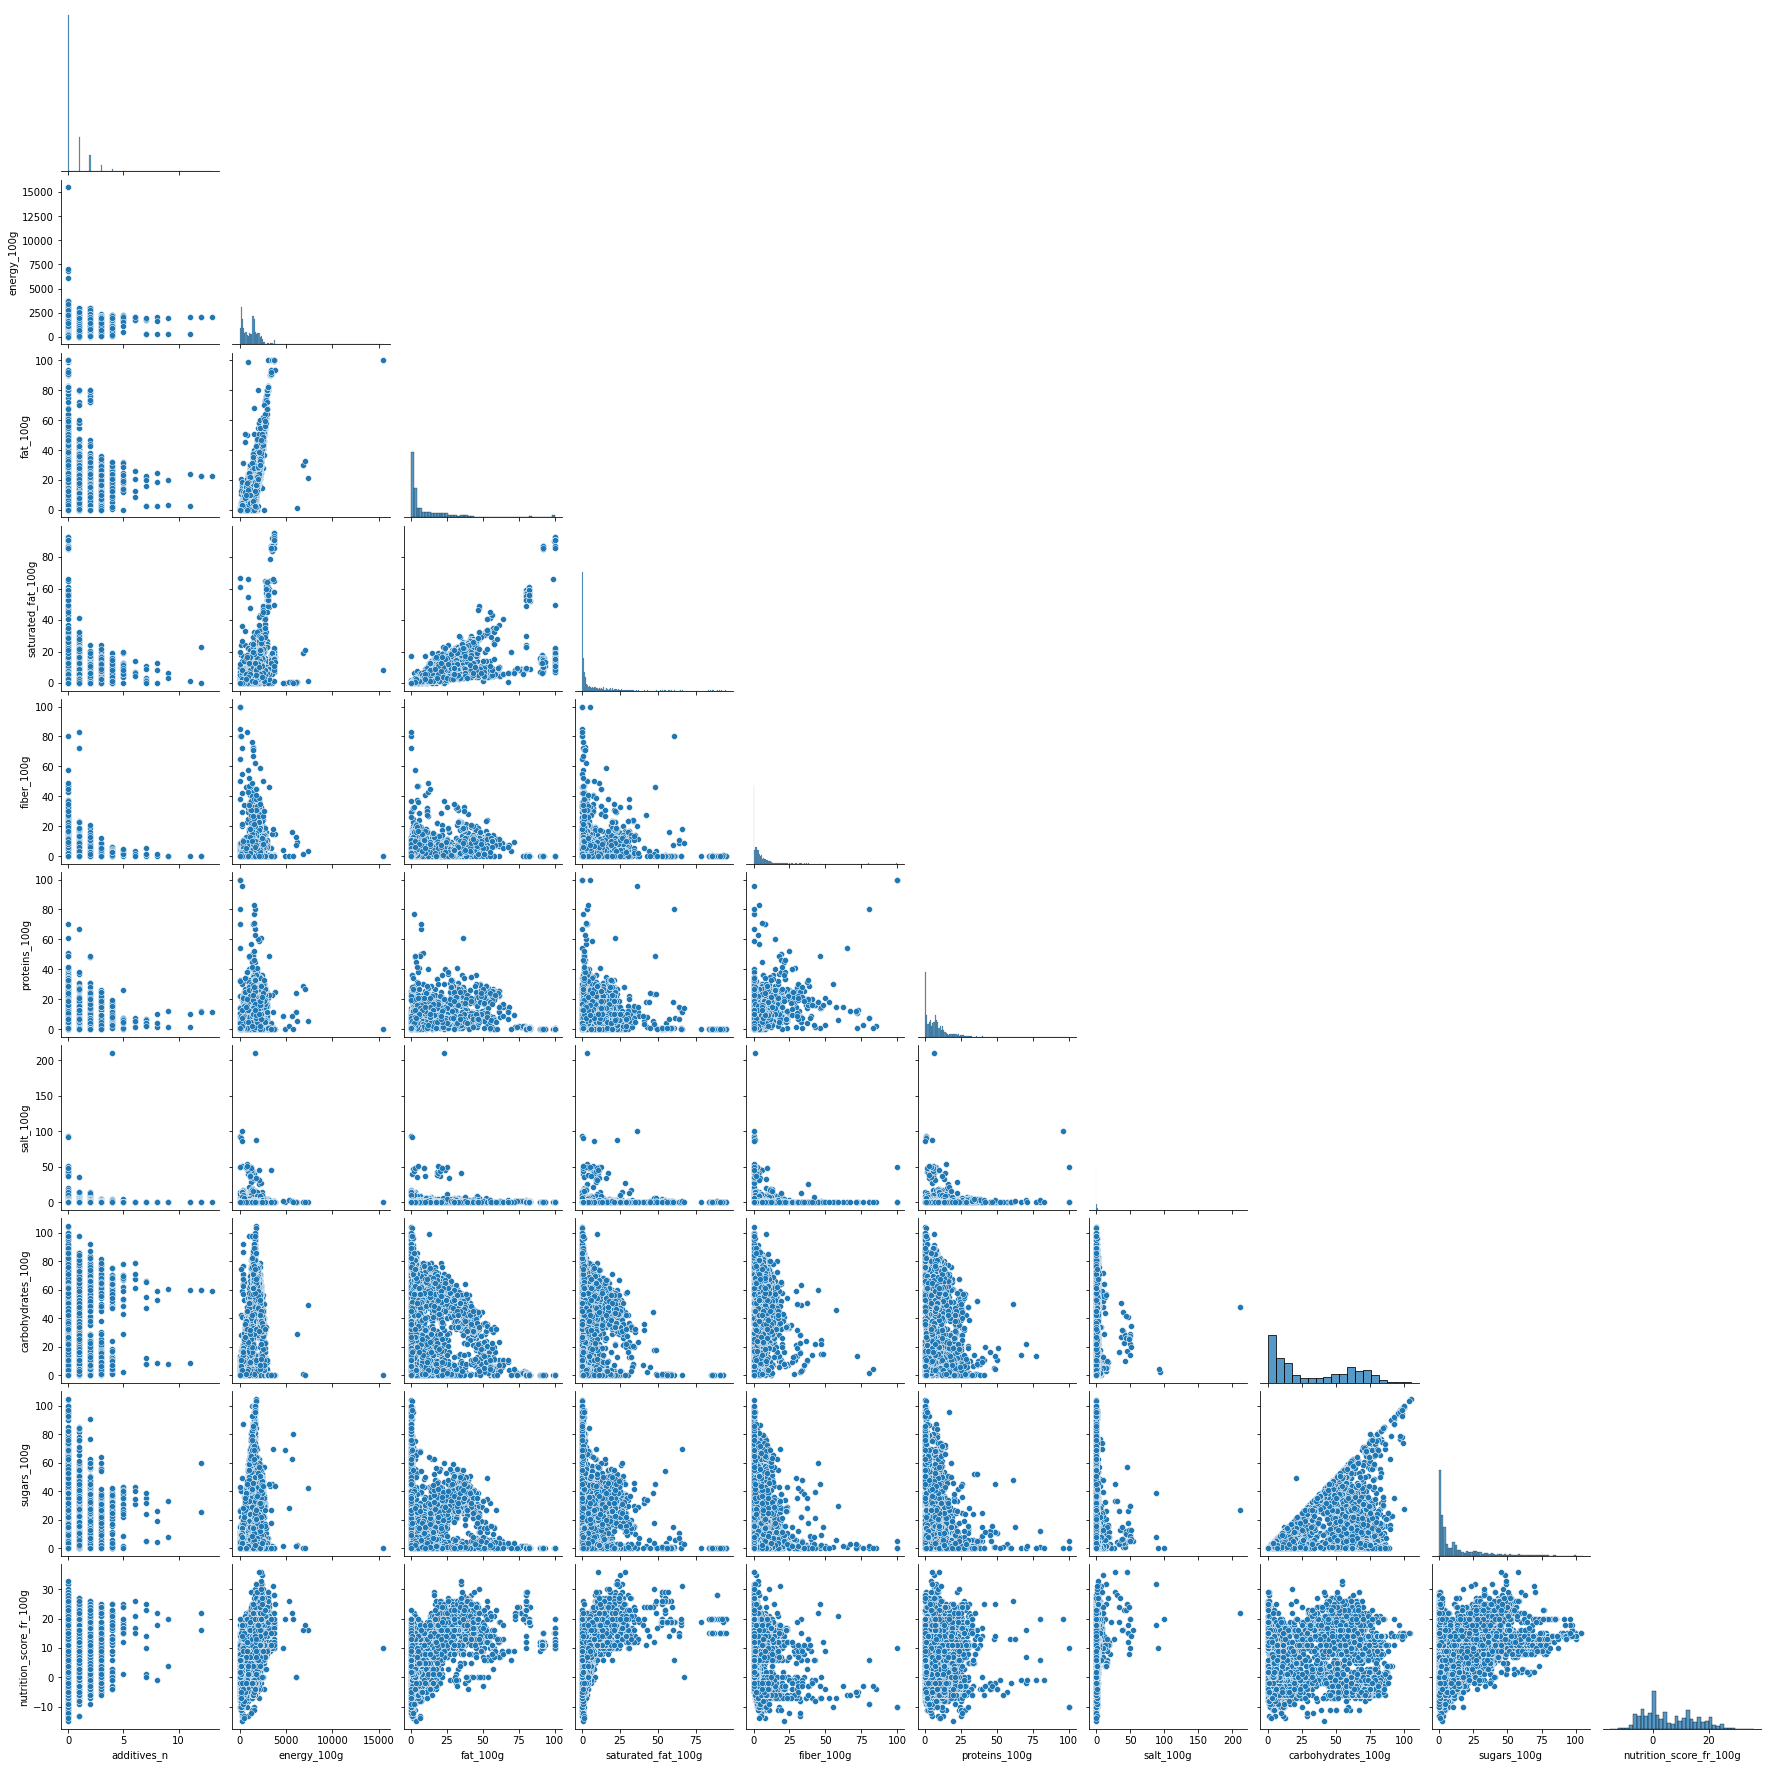

In [20]:
#On va effectuer un graphe traçant les relations par paires dans notre jeu de données
liste_variables_quantitatives = ['additives_n','energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 
                                 'salt_100g', 'carbohydrates_100g', 'sugars_100g', 'nutrition_score_fr_100g']

plt.figure(figsize = (15, 10))
sns.pairplot(data_bio_France[liste_variables_quantitatives], corner = True)

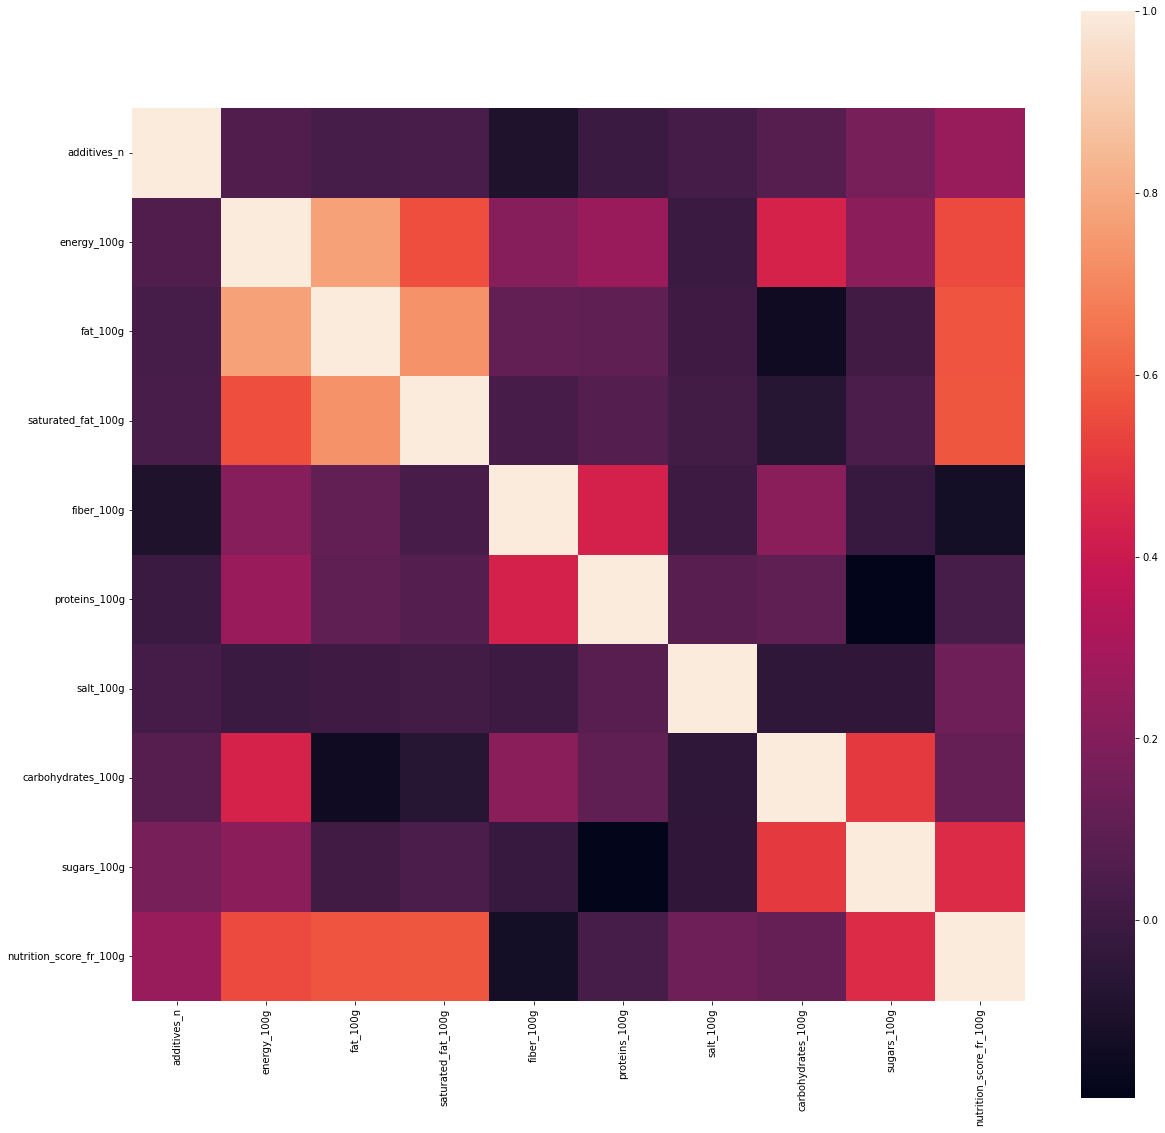

In [21]:
#Regardons la corrélation de nos variables quantitatives par une heatmap
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data_bio_France[liste_variables_quantitatives].corr(),annot = False,square=True);

## Identification et traitement des doublons

In [22]:
#On regarde les doublons
data_bio_France[data_bio_France.duplicated(['product_name', 'brands'])] 

code last_modified_datetime  \
112907  0205505025323   2015-04-09T18:40:39Z   
112967  0206799011153   2016-10-02T18:44:38Z   
179170  2030500374163   2016-10-17T17:35:43Z   
194367  3111900350502   2015-06-20T18:30:08Z   
197505  3175681190108   2016-04-08T10:16:16Z   
...               ...                    ...   
304840  8029689008468   2017-04-14T21:27:23Z   
305032  8032891769287   2015-07-27T08:11:02Z   
305925  8172072694417   2016-01-18T20:45:49Z   
312403  8554631836009   2016-02-02T14:49:15Z   
316566  8823308704508   2015-09-09T07:10:38Z   

                                           product_name quantity  \
112907                             Kassler cru fumé bio    136 g   
112967             Viande bovine bio - steak* à griller    114 g   
179170                                         Pavé bio    500 g   
194367  Muesli croustillant badiane coriandre gingembre    500 g   
197505                                    Haché végétal     250g   
...                                                 ...      ...   
304840                                              NaN      NaN   
305032                                 Spirale Complète    500 g   
305925                                              NaN      NaN   
312403                                    GrandLait Bio  6 x 1 L   
316566                                       Nocciolata      NaN   

                  brands      pnns_groups_2  \
112907        Ferme Durr               Meat   
112967            Auchan               Meat   
179170            Auchan              Bread   
194367  Joseph Favrichon  Breakfast cereals   
197505        Céréal Bio     One-dish meals   
...                  ...                ...   
304840               NaN            unknown   
305032        Montebello            Cereals   
305925               NaN            unknown   
312403            Candia    Milk and yogurt   
316566  Rigoni di Asiago             Sweets   

                                                   labels countries  \
112907  Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...    France   
112967  Viande Française,AB Agriculture Biologique,Via...    France   
179170                         Bio,Bio européen,FR-BIO-01    France   
194367                            AB,FR-BIO-01,Point Vert    France   
197505  Bio,Bio européen,FR-BIO-10,Sans colorants,Sans...    France   
...                                                   ...       ...   
304840                          AB Agriculture Biologique    France   
305032     Bio,Bio européen,IT-BIO-006,Agriculture Italie    France   
305925                                    AB,Bio européen    France   
312403  Bio,Bio européen,FR-BIO-01,Point Vert,AB Agric...    France   
316566  Bio,Bio européen,Sans gluten,Sans huile de pal...    France   

                                         ingredients_text  additives_n  ...  \
112907  carre de porc bio, eau, sel nitrité, dextrose,...          1.0  ...   
112967  Viande bovine bio ; Origine : France ; Abattoi...          0.0  ...   
179170  farine de _blé_ bio* T65, eau, levain d'_épeau...          0.0  ...   
194367  céréales 65.5% (flocons d'avoine, corn-flakes ...          1.0  ...   
197505  Eau, oignons 28%, protéines de soja texturées ...          0.0  ...   
...                                                   ...          ...  ...   
304840  Courgettes séchées* 48%, huile de tournesol* 2...          0.0  ...   
305032                 Semoule de _blé_ dur complète bio.          0.0  ...   
305925                                                NaN          NaN  ...   
312403                                   _Lait_ 100 % Bio          0.0  ...   
316566                                                NaN          NaN  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
112907         NaN      NaN                 NaN         NaN            NaN   
112967         NaN      NaN                 NaN         NaN            NaN   
179170         NaN    

#### Des doublons sont observés dans notre df. Parmis les doublons, on va garder les produits les plus récemment modifiés.

In [23]:
#On convertit nos dates en datetime
data_bio_France['last_modified_datetime'] = pd.to_datetime(data_bio_France['last_modified_datetime']).dt.tz_localize(None)
data_bio_France.dtypes #On vérifie que la conversion a bien été faite. 

code                               object
last_modified_datetime     datetime64[ns]
product_name                       object
quantity                           object
brands                             object
pnns_groups_2                      object
labels                             object
countries                          object
ingredients_text                   object
additives_n                       float64
additives_tags                     object
main_category_fr                   object
energy_100g                       float64
fat_100g                          float64
saturated_fat_100g                float64
fiber_100g                        float64
proteins_100g                     float64
salt_100g                         float64
carbohydrates_100g                float64
sugars_100g                       float64
nutrition_score_fr_100g           float64
nutrition_grade_fr                 object
dtype: object

In [24]:
#On trie nos données dans l'ordre chronologique (du plus récent au plus ancien)
data_bio_France = data_bio_France.sort_values(by = 'last_modified_datetime', ascending = False)

#On supprime les doublons en gardant le produit le plus récemment modifié
data_bio_France = data_bio_France.drop_duplicates(subset = ['product_name', 'brands'], keep = 'first')

In [25]:
#On vérifie qu'il n'y a plus de doublons
data_bio_France[data_bio_France.duplicated(['product_name', 'brands'])] 

Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

## Identification et traitement valeurs aberrantes

### On va faire un nettoyage en gardant uniquement les produits alimentaires (des produits non alimentaires sont présents). 

In [26]:
#On affiche les produits non alimentaires labellisés "bio" et vendus en France. 
data_non_alim = data_bio_France[data_bio_France['main_category_fr'].str.contains('Non alimentaire', na=False)]
display(data_non_alim)

#On supprime ce produit de notre liste 
data_bio_France = data_bio_France.drop(data_bio_France[data_bio_France['main_category_fr'].str.contains('Non alimentaire', na=False)].index)

code last_modified_datetime  \
170118  883929140886    2017-04-07 13:46:29   

                                             product_name quantity   brands  \
170118  Harry Potter & The Deathly Hallows Radcliffe /...      NaN  Harry's   

       pnns_groups_2                                      labels countries  \
170118       unknown  Bio,Bio européen,AB Agriculture Biologique    France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
170118              NaN          NaN  ...         4.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
170118                 0.0       100.0          100.0        0.0   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
170118                 NaN          0.0                    -10.0   

        nutrition_grade_fr  
170118                   a  

[1 rows x 22 columns]

In [27]:
data_bio_France.describe()

additives_n   energy_100g     fat_100g  saturated_fat_100g  \
count  6390.000000   9079.000000  5637.000000         8727.000000   
mean      0.485133   1190.744822    13.424342            5.120525   
std       0.996008    879.637309    19.992625            9.856380   
min       0.000000      0.000000     0.000000            0.000000   
25%       0.000000    368.000000     1.100000            0.200000   
50%       0.000000   1201.000000     4.000000            1.000000   
75%       1.000000   1700.000000    19.000000            5.900000   
max      13.000000  15481.000000   100.000000           95.000000   

        fiber_100g  proteins_100g    salt_100g  carbohydrates_100g  \
count  7526.000000    9041.000000  8745.000000         5629.000000   
mean      4.096315       7.272900     0.875228           32.277826   
std       6.596242       7.665278     4.467334           28.364920   
min       0.000000       0.000000     0.000000            0.000000   
25%       0.100000       1.200000     0.020000            6.000000   
50%       2.300000       5.900000     0.120000           20.000000   
75%       5.500000      10.200000     0.780000           60.200000   
max     100.000000     100.000000   211.000000          105.000000   

       sugars_100g  nutrition_score_fr_100g  
count  8766.000000              8581.000000  
mean     13.281297                 6.096026  
std      18.438945                 8.943939  
min       0.000000               -15.000000  
25%       1.200000                -1.000000  
50%       4.700000                 4.000000  
75%      18.100000                13.000000  
max     105.000000                36.000000

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


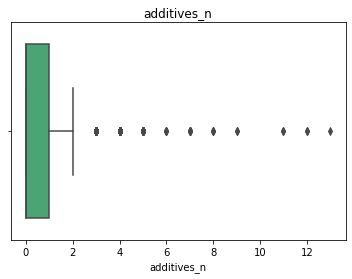

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


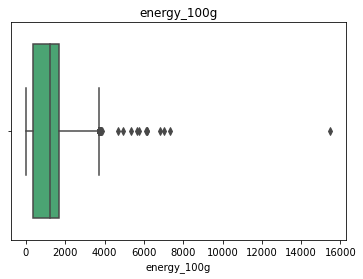

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


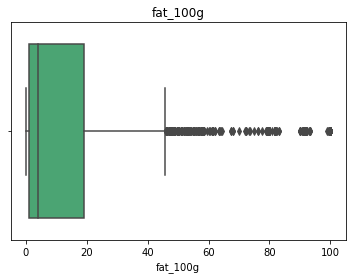

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


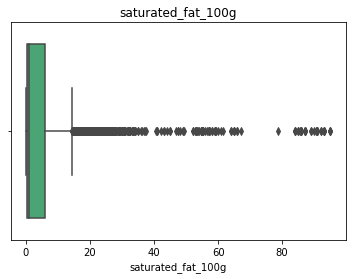

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


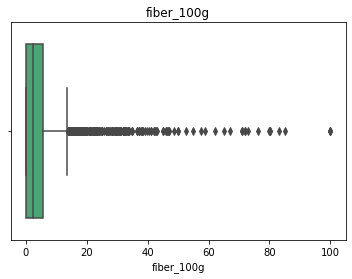

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


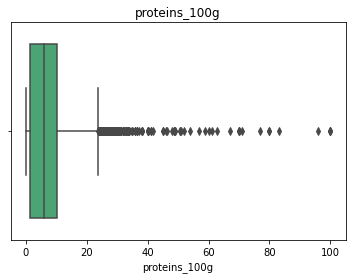

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


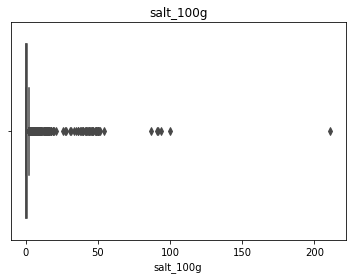

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


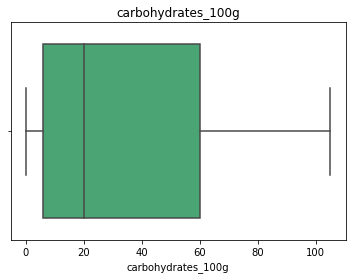

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


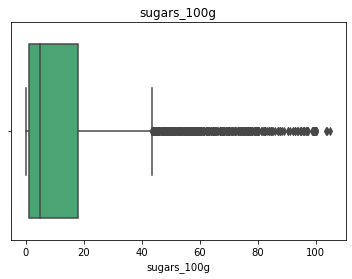

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


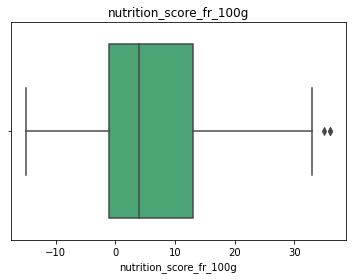

In [28]:
#En effectuant un boxplot des données quantitatives 
#Représentations graphiques (box-plots)
for variable in liste_variables_quantitatives:
    sns.boxplot(data_bio_France[variable], color = 'mediumseagreen')
    plt.title(variable)
    plt.show()

##### Des valeurs aberrantes sont observées pour chaque variable et qu'il va falloir traiter par la suite. 

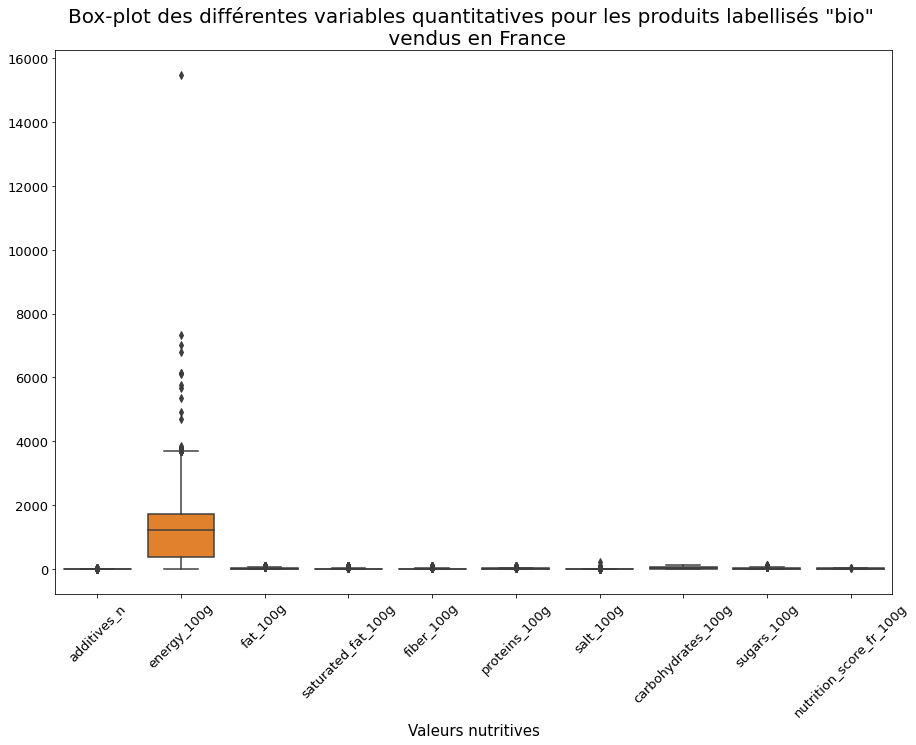

In [29]:
#On va effectuer un boxplot pour toutes les variables quantitatives qui nous intéressent
plt.figure(figsize = (15, 10))
sns.boxplot(data=data_bio_France[liste_variables_quantitatives])

plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)
plt.xlabel('Valeurs nutritives', size = 15)
plt.title('Box-plot des différentes variables quantitatives pour les produits labellisés "bio" \n vendus en France', size = 20)


plt.show()

##### Nous observons des valeurs aberrantes élevées surtout pour la variable "energy_100g". Elle "écrase" les autres variables, on va donc commencer par traiter les outliers de cette variable. 

In [30]:
data_bio_France['energy_100g'].isnull().sum()

1624

In [31]:
data_bio_France['energy_100g'].describe()

count     9079.000000
mean      1190.744822
std        879.637309
min          0.000000
25%        368.000000
50%       1201.000000
75%       1700.000000
max      15481.000000
Name: energy_100g, dtype: float64

In [32]:
#On compte combien on a de valeurs manquantes pour la variable "energy_100g"
print(data_bio_France['energy_100g'].isnull().sum(), 'valeurs manquantes pour notre variable')

energy_null = data_bio_France.loc[data_bio_France['energy_100g'].isnull(), :] 
display(energy_null) #On affiche le df contenant des données manquantes pour la variable "energy_100g"

#Méthode de l'approche IQR (InterQuartile) 
Q1 = np.nanpercentile(data_bio_France['energy_100g'], 25, 
                  interpolation = 'midpoint')

Q3 = np.nanpercentile(data_bio_France['energy_100g'], 75, 
                  interpolation = 'midpoint')

IQR = Q3 - Q1

#On définit les valeurs limites supérieures et inférieures de la plage normale des ensembles de données

#Limite supérieure
sup = Q3+1.5*IQR
print('Limite supérieure :', sup)
outliers_sup_energy = data_bio_France.loc[data_bio_France['energy_100g'] >= sup, :]
display(outliers_sup_energy) #On affiche les outliers de la limite supérieure.

#Limite inférieure
inf = Q1-1.5*IQR
print('Limite inférieure :', inf)
outliers_inf_energy = data_bio_France.loc[data_bio_France['energy_100g'] <= inf, :] 
display(outliers_inf_energy) #On affiche les outliers de la limite inférieure.

1624 valeurs manquantes pour notre variable


code last_modified_datetime                    product_name  \
310718  8437011780010    2017-04-20 08:52:08                    Viña Ilusion   
254521  3760189520016    2017-04-20 08:45:24                Pomme Golden Bio   
302977  8005020000971    2017-04-19 19:57:35     Caramel kiss Gildo Rachelli   
255520  3770004382026    2017-04-19 19:05:07            Bière bio au quinoa    
243316  3564707083638    2017-04-19 09:58:10                           Kiwis   
...               ...                    ...                             ...   
255283  3770001905006    2012-10-05 08:40:18                Bière bio blonde   
235142  3483190010849    2012-09-25 17:24:13  Lardons fumés au bois de hêtre   
229817  3380390000291    2012-09-12 22:09:07               Riz Arborio Blanc   
253177  3760099531836    2012-08-06 20:59:44          Pistaches décortiquées   
230656  3396410027049    2012-06-29 12:34:59          Confit de Foie de Porc   

           quantity                                             brands  \
310718        75 cl                                 M. A. Alonso Etayo   
254521        500 g                                           Idyl SAS   
302977  500ml, 350g                                     Gildo Rachelli   
255520        33 cl                                          Altiplano   
243316     6 unités                          Bio Village,Marque Repère   
...             ...                                                ...   
255283        33 cl  Vallée Chevreuse,Volcelest,Brasserie de la Val...   
235142       150 g.                                            BIOPORC   
229817         500g                                            Primeal   
253177        125 g                                  Secrets d'énergie   
230656         190g                                         Bonneterre   

              pnns_groups_2  \
310718  Alcoholic beverages   
254521               Fruits   
302977            Ice cream   
255520  Alcoholic beverages   
243316               Fruits   
...                     ...   
255283  Alcoholic beverages   
235142       Processed meat   
229817              Cereals   
253177         Dried fruits   
230656              unknown   

                                                   labels  \
310718      Déconseillé aux femmes enceintes,Bio européen   
254521             Bio européen,AB Agriculture Biologique   
302977                Bio,Sans gluten,Bio-dynamie,Demeter   
255520        Bio,FR-BIO-01,Sans gluten,FR-015-001,AFDIAG   
243316  Bio,Bio européen,AB Agriculture Biologique,FR-...   
...                                                   ...   
255283                                                 AB   
235142                                                 AB   
229817                                                 AB   
253177                              AB,label bio européen   
230656                                                 AB   

                     countries  \
310718                  France   
254521                  France   
302977                  France   
255520                  France   
243316  France, en:switzerland   
...                        ...   
255283                  France   
235142                  France   
229817                  France   
253177                  France   
230656                  France   

                                         ingredients_text  additives_n  ...  \
310718                           Contient des _sulfites_.          0.0  ...   
254521                                   Pomme Golden Bio          0.0  ...   
302977  Crème glacée au caramel (80%) (_lait_ frais pa...          1.0  ...   
255520  Eau, malt*, quinoa*, blé noir*, sucre*, houblo...          0.0  ...   
243316                                      Kiwis Hayward          0.0  ...   
...                                                   ...          ...  ...   
255283         Eau, malt d'orge, houblons, sucre, levures          0.0  ...   
235142  Poitrine de 

Limite supérieure : 3698.0


code last_modified_datetime  \
302460  8002802102052    2017-04-20 17:50:55   
257639  4003247101802    2017-04-20 17:50:25   
234010  3452011410106    2017-04-20 17:49:36   
234005  3452010002579    2017-04-20 17:49:35   
234008  3452010830905    2017-04-20 17:49:35   
...               ...                    ...   
217960  3266191010502    2014-11-05 19:24:56   
302462  8002802102168    2014-02-01 21:24:28   
233287  3445020000734    2013-06-23 14:31:25   
209674  3256220368087    2013-06-17 16:58:47   
217583  3265478475003    2013-04-28 17:35:26   

                                             product_name quantity  \
302460                             Huile Melange 4 Huiles      NaN   
257639                                      Huile de Coco    200 g   
234010                                      Huile Quatuor      NaN   
234005  Huile De Noix De Coco Première Pression à Froi...      NaN   
234008                            Huile De Noix Gourmande      NaN   
...                                                   ...      ...   
217960                          Huile vierge de colza Bio      1 l   
302462                   Huile de Colza vierge Biologique      1 l   
233287                              Huile de pavot vierge   250 ml   
209674                          Huile vierge de colza Bio   750 ml   
217583                    Huile bio Colza & sésame grillé    50 cL   

               brands pnns_groups_2  \
302460          Elisa           NaN   
257639      Vitaquell           NaN   
234010         Vigean           NaN   
234005         Vigean           NaN   
234008         Vigean           NaN   
...               ...           ...   
217960  La Vie Claire          Fats   
302462          Elisa          Fats   
233287     bioPlanète          Fats   
209674        U,U-bio          Fats   
217583        Lesieur          Fats   

                                                   labels countries  \
302460  Organic, EU Organic, fr:AB Agriculture Biologique    France   
257639  Organic, EU Organic, fr:AB Agriculture Biologique    France   
234010  Organic, EU Organic, fr:AB Agriculture Biologique    France   
234005  Organic, EU Organic, fr:AB Agriculture Biologique    France   
234008  Organic, EU Organic, fr:AB Agriculture Biologique    France   
...                                                   ...       ...   
217960                                    AB,Bio européen    France   
302462                         AB,Bio européen,IT-BIO-007    France   
233287                                    AB,bio européen    France   
209674                                                 AB    France   
217583                                                 AB    France   

                                         ingredients_text  additives_n  ...  \
302460                                                NaN          NaN  ...   
257639                                                NaN          NaN  ...   
234010                                                NaN          NaN  ...   
234005                                                NaN          NaN  ...   
234008                                                NaN          NaN  ...   
...                                                   ...          ...  ...   
217960                              Huile vierge de colza          0.0  ...   
302462                                    graine de colza          0.0  ...   
233287                              Huile de pavot vierge          0.0  ...   
209674                                     Huile de colza          0.0  ...   
217583  Huile de colza 98%, huile de sésame grillé vie...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
302460      3766.0      NaN                 9.5         0.0            0.0   
257639      3766.0      NaN                95.0         0.0            0.0   
234010      3766.0      NaN                12.0         0.0            0.0   
234005      3766

Limite inférieure : -1630.0


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

In [33]:
#Fonction affichant les valeurs aberrantes par la méthode de l'approche interquartile (IQR)
def affiche_outliers(nom_df, nom_col):
    Q1 = np.nanpercentile(nom_df[nom_col], 25, 
                  interpolation = 'midpoint')
    
    Q3 = np.nanpercentile(nom_df[nom_col], 75, 
                  interpolation = 'midpoint')
    
    IQR = Q3-Q1 
    
    #On définit les limites supérieures et inférieures de la plage normale des ensembles de données. 
    sup = Q3+1.5*IQR #limite supérieure
    inf  = Q1-1.5*IQR #Limite inférieure
    
    outliers_sup_variable = nom_df.loc[nom_df[nom_col] >= sup, :] #Variable sélectionnant les valeurs >= à la limite supérieure
    outliers_inf_variable = nom_df.loc[nom_df[nom_col] <= inf, :] #Variable sélectionnant les valeurs <= à la limite inférieure
    
    outliers_variable = pd.concat([outliers_sup_variable, outliers_inf_variable])
     
    return outliers_variable

In [34]:
#Fonction calculant la valeur de la limite supérieure pour chaque variable
def valeur_limite_sup(nom_df, nom_col):
    Q1 = np.nanpercentile(nom_df[nom_col], 25, 
                  interpolation = 'midpoint')
    
    Q3 = np.nanpercentile(nom_df[nom_col], 75, 
                  interpolation = 'midpoint')
    
    IQR = Q3-Q1 
    
    #On définit les limites supérieures et inférieures de la plage normale des ensembles de données. 
    sup = Q3+1.5*IQR #limite supérieure
    inf  = Q1-1.5*IQR #Limite inférieure
    
    valeur_limite_supérieure = sup
    
    return valeur_limite_supérieure

In [35]:
#On va afficher les valeurs aberrantes pour chaque variable sélectionnée 
for variable in liste_variables_quantitatives:
    variable_bio = affiche_outliers(data_bio_France, variable)
    display(variable_bio.head())
    display(variable_bio.shape)
    print('Pour la variable', '"',variable,'"', variable_bio.shape[0], 'produits alimentaires bio vendus en France contiennent des valeurs aberrantes.')

code last_modified_datetime               product_name  \
222857  3288110822072    2017-04-20 21:42:19  Milumel bio 3 croissance    
253057  3760092217133    2017-04-20 17:50:16          Madeleines amande   
249870  3700211224048    2017-04-19 05:56:03         Mini Pépites choc'   
202404  3229820159768    2017-04-18 17:42:55             Soja Figue Bio   
202369  3229820112046    2017-04-18 17:39:26    Le Biscuit de Natty Bio   

       quantity     brands       pnns_groups_2  \
222857      NaN     Lactel             unknown   
253057      NaN  Viadélice  Biscuits and cakes   
249870    230 g  Valpiform             unknown   
202404    240 g      Bjorg  Biscuits and cakes   
202369    150 g      Bjorg  Biscuits and cakes   

                                                   labels countries  \
222857         Bio,Bio européen,AB Agriculture Biologique    France   
253057         Bio,Bio européen,AB Agriculture Biologique    France   
249870  Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...    France   
202404  Bio,Bio européen,FR-BIO-01,Sans huile de palme...    France   
202369  Bio,Ecocert,Bio européen,FR-BIO-01,Sans huile ...    France   

                                         ingredients_text  additives_n  ...  \
222857  Lait écrémé, maltodextrines, matières grasses ...          8.0  ...   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0  ...   
249870  _œufs_, sucre, fécule de pomme de terre, huile...          7.0  ...   
202404  Farine de _blé_ 36 %, sucre de canne roux non ...          4.0  ...   
202369  Chocolat noir* 48% (sucre de canne*, pâte de c...          3.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
222857       268.0      2.6                 0.3         0.0            1.7   
253057      2105.0     29.0                11.7         1.1            5.9   
249870      1841.0     23.0                11.0         1.7            4.3   
202404      1962.0     18.1                 2.0         5.4           11.5   
202369      2125.0     25.0                12.0         4.1            7.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
222857       0.06                 8.4          4.5                     -1.0   
253057       0.77                53.9         27.6                     24.0   
249870       0.75                55.0         32.0                     23.0   
202404       0.85                62.0         22.0                      8.0   
202369       0.42                61.8         34.3                     19.0   

        nutrition_grade_fr  
222857                   a  
253057                   e  
249870                   e  
202404                   c  
202369                   e  

[5 rows x 22 columns]

(296, 22)

Pour la variable " additives_n " 296 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
302460  8002802102052    2017-04-20 17:50:55   
257639  4003247101802    2017-04-20 17:50:25   
234010  3452011410106    2017-04-20 17:49:36   
234005  3452010002579    2017-04-20 17:49:35   
234008  3452010830905    2017-04-20 17:49:35   

                                             product_name quantity     brands  \
302460                             Huile Melange 4 Huiles      NaN      Elisa   
257639                                      Huile de Coco    200 g  Vitaquell   
234010                                      Huile Quatuor      NaN     Vigean   
234005  Huile De Noix De Coco Première Pression à Froi...      NaN     Vigean   
234008                            Huile De Noix Gourmande      NaN     Vigean   

       pnns_groups_2                                             labels  \
302460           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
257639           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
234010           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
234005           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
234008           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   

       countries ingredients_text  additives_n  ... energy_100g fat_100g  \
302460    France              NaN          NaN  ...      3766.0      NaN   
257639    France              NaN          NaN  ...      3766.0      NaN   
234010    France              NaN          NaN  ...      3766.0      NaN   
234005    France              NaN          NaN  ...      3766.0      NaN   
234008    France              NaN          NaN  ...      3766.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
302460                 9.5         0.0            0.0        0.0   
257639                95.0         0.0            0.0        0.0   
234010                12.0         0.0            0.0        0.0   
234005                58.0         0.0            0.0        0.0   
234008                 9.0         0.0            0.0        0.0   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
302460                 NaN          0.0                     19.0   
257639                 NaN          0.0                     20.0   
234010                 NaN          0.0                     20.0   
234005                 NaN          0.0                     20.0   
234008                 NaN          0.0                     18.0   

        nutrition_grade_fr  
302460                   e  
257639                   e  
234010                   e  
234005                   e  
234008                   d  

[5 rows x 22 columns]

(138, 22)

Pour la variable " energy_100g " 138 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime                   product_name  \
223349  3291960011114    2017-04-20 17:49:14                Huile De Sésame   
200413  3222472764762    2017-04-20 17:48:30        Huile Végétale de Colza   
263887       42074724    2017-04-18 14:42:55  Molivo tartine et cuisson bio   
235983  3502490122523    2017-04-18 07:13:54       Amandes Décortiquées Bio   
113925  0233360971172    2017-04-17 18:46:28                  Margarine Bio   

       quantity           brands pnns_groups_2  \
223349      NaN       Emile Noël          Fats   
200413      NaN           Casino       unknown   
263887      NaN        Vitaquell          Fats   
235983    200 g  Maître Prunille          Nuts   
113925      NaN        St Hubert          Fats   

                                                   labels countries  \
223349         Bio,Bio européen,AB Agriculture Biologique    France   
200413         Bio,Bio européen,AB Agriculture Biologique    France   
263887         Bio,Bio européen,AB Agriculture Biologique    France   
235983  Point Vert,Bio européen,AB Agriculture Biologi...    France   
113925         Bio,Bio européen,AB Agriculture Biologique    France   

                                         ingredients_text  additives_n  ...  \
223349  100% d'huile vierge de Sésame biologique de pr...          0.0  ...   
200413                                                NaN          NaN  ...   
263887  huiles de tournesol*, d'olive*, de palme*et de...          0.0  ...   
235983                             _Amandes_ décortiquées          0.0  ...   
113925  Huiles végétales biologiques 57% (colza, coco,...          1.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
223349      3766.0    100.0                16.0         NaN            0.0   
200413      3464.0    100.0                 7.8         0.0            0.0   
263887      3012.0     80.0                23.0         0.0            0.0   
235983      2699.0     57.0                 4.5         0.0           23.0   
113925      2184.0     58.0                25.0         0.0            0.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
223349       0.00                 0.0          0.0                     12.0   
200413       0.00                 NaN          0.0                     17.0   
263887       0.53                 0.0          0.0                     14.0   
235983       0.00                 5.3          4.7                      3.0   
113925       0.50                 NaN          0.0                     14.0   

        nutrition_grade_fr  
223349                   d  
200413                   d  
263887                   d  
235983                   c  
113925                   d  

[5 rows x 22 columns]

(357, 22)

Pour la variable " fat_100g " 357 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
255005  3760240720546    2017-04-21 00:45:02   
302323  8002503403298    2017-04-20 17:50:55   
301548  8001075190049    2017-04-20 17:50:54   
299411  7640101094695    2017-04-20 17:50:54   

                                 product_name quantity              brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g          Bonneterre   
255005                        le bio de manon      NaN     le bio de manon   
302323                         Gorgonzola aop      NaN             Ambrosi   
301548                   Parmesan Rape Sachet      NaN  Grattugiato fresco   
299411      Fromage Frais Nature Sans Lactose      NaN               Züger   

             pnns_groups_2                                             labels  \
230691  Chocolate products         Bio,Bio européen,AB Agriculture Biologique   
255005             unknown                                  Bio,AB,Point Vert   
302323                 NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
301548                 NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
299411                 NaN  Organic, EU Organic, fr:AB Agriculture Biologique   

       countries                                   ingredients_text  \
230691    France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
255005    France  banane, huile de noix de coco, sucre de canne,...   
302323    France                                                NaN   
301548    France                                                NaN   
299411    France                                                NaN   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                27.0         NaN   
255005          0.0  ...      2146.0     33.6                29.9         NaN   
302323          NaN  ...      1414.0      NaN                20.0         0.0   
301548          NaN  ...      1640.0      NaN                18.7         0.0   
299411          NaN  ...      1063.0      NaN                15.6         0.0   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0       0.03                30.0         24.0   
255005            2.3       0.00                58.4         35.3   
302323           20.0       2.00                 NaN          0.8   
301548           33.0       1.60                 NaN          0.0   
299411            7.5       0.80                 NaN          3.2   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
255005                     23.0                   e  
302323                     22.0                   e  
301548                     20.0                   e  
299411                     16.0                   d  

[5 rows x 22 columns]

(978, 22)

Pour la variable " saturated_fat_100g " 978 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
280724  5600317472719    2017-04-20 17:50:43   
253589  3760121212481    2017-04-20 17:50:19   
252869  3760087361964    2017-04-20 17:50:14   
236920  3535400014601    2017-04-20 17:49:41   
232080  3421557701238    2017-04-20 17:49:33   

                                product_name quantity        brands  \
280724  Eveil Du Bouddha Chanvre Sans Gluten      NaN        Iswari   
253589                         Chocolat noir      NaN        Biocop   
252869                       Souchet épluché      NaN    Biosagesse   
236920                          Pois chiches      NaN    Naturaline   
232080                   Flocons De Céréales      NaN  Grillon d'Or   

       pnns_groups_2                                             labels  \
280724           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
253589           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
252869           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
236920           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   
232080           NaN  Organic, EU Organic, fr:AB Agriculture Biologique   

       countries ingredients_text  additives_n  ... energy_100g fat_100g  \
280724    France              NaN          NaN  ...      1695.0      NaN   
253589    France              NaN          NaN  ...      2510.0      NaN   
252869    France              NaN          NaN  ...      2079.0      NaN   
236920    France              NaN          NaN  ...      1573.0      NaN   
232080    France              NaN          NaN  ...      1402.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
280724                1.90        20.0          14.60     0.0500   
253589               33.50        24.0          11.80     0.0100   
252869                5.01        33.0           4.58     0.0125   
236920                0.60        13.8          21.80     0.0200   
232080                0.50        14.4           9.00     0.0100   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
280724                 NaN        11.70                     -2.0   
253589                 NaN         0.90                     12.0   
252869                 NaN        21.83                     10.0   
236920                 NaN         3.70                     -6.0   
232080                 NaN         1.80                     -6.0   

        nutrition_grade_fr  
280724                   a  
253589                   d  
252869                   c  
236920                   a  
232080                   a  

[5 rows x 22 columns]

(338, 22)

Pour la variable " fiber_100g " 338 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime                  product_name  \
302266  8002352311034    2017-04-20 17:50:55     Poudre d'amandes blanches   
301548  8001075190049    2017-04-20 17:50:54          Parmesan Rape Sachet   
276775  5400141268430    2017-04-20 17:50:40                 Emmental râpé   
257499  4002824151506    2017-04-20 17:50:25  100% Soja Spagetthi, Neutral   
240608  3560071052133    2017-04-20 17:49:44              Lentilles corail   

       quantity              brands pnns_groups_2  \
302266      NaN             Damiano           NaN   
301548      NaN  Grattugiato fresco           NaN   
276775      NaN                Boni           NaN   
257499      NaN          Land krone           NaN   
240608      NaN       Carrefour bio       Legumes   

                                                   labels countries  \
302266  Organic, EU Organic, fr:AB Agriculture Biologique    France   
301548  Organic, EU Organic, fr:AB Agriculture Biologique    France   
276775  Organic, EU Organic, fr:AB Agriculture Biologique    France   
257499  Organic, EU Organic, fr:AB Agriculture Biologique    France   
240608         Bio,Bio européen,AB Agriculture Biologique    France   

                                         ingredients_text  additives_n  ...  \
302266                                                NaN          NaN  ...   
301548                                                NaN          NaN  ...   
276775                                                NaN          NaN  ...   
257499                                                NaN          NaN  ...   
240608  Lentilles corail issues de l'agriculture biolo...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
302266      2531.0      NaN                 4.5         5.8           23.7   
301548      1640.0      NaN                18.7         0.0           33.0   
276775      1636.0      NaN                20.0         0.0           28.0   
257499      1682.0      NaN                 1.2         5.7           45.0   
240608      1393.0      1.7                 0.2        11.0           25.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
302266       0.20                 NaN          3.6                      6.0   
301548       1.60                 NaN          0.0                     20.0   
276775       0.63                 NaN          0.0                     16.0   
257499       0.00                 NaN         12.4                     -2.0   
240608       0.00                50.0          1.0                    -11.0   

        nutrition_grade_fr  
302266                   c  
301548                   e  
276775                   d  
257499                   a  
240608                   a  

[5 rows x 22 columns]

(324, 22)

Pour la variable " proteins_100g " 324 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
302323  8002503403298    2017-04-20 17:50:55   
283363  6134690000010    2017-04-20 17:50:45   
279303  5411788047432    2017-04-20 17:50:43   
255490  3770004096176    2017-04-20 17:50:24   
252796  3760083781308    2017-04-20 17:50:14   

                                             product_name quantity  \
302323                                     Gorgonzola aop      NaN   
283363                                   Dattes d'Algerie      NaN   
279303                       Instant Miso Soup Champignon      NaN   
255490            Bouillon En Poudre épices Herbe Poireau      NaN   
252796  Armoric, Saumon fume BIO, le sachet de 2 tranc...      NaN   

                   brands pnns_groups_2  \
302323            Ambrosi           NaN   
283363        Deglet Noor           NaN   
279303               Lima           NaN   
255490  Cooked by beendhi           NaN   
252796            Armoric           NaN   

                                                   labels countries  \
302323  Organic, EU Organic, fr:AB Agriculture Biologique    France   
283363  Organic, EU Organic, fr:AB Agriculture Biologique    France   
279303  Organic, EU Organic, fr:AB Agriculture Biologique    France   
255490  Organic, EU Organic, fr:AB Agriculture Biologique    France   
252796  Organic, EU Organic, fr:AB Agriculture Biologique    France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
302323              NaN          NaN  ...      1414.0      NaN   
283363              NaN          NaN  ...      1180.0      NaN   
279303              NaN          NaN  ...      1402.0      NaN   
255490              NaN          NaN  ...      1339.0      NaN   
252796              NaN          NaN  ...      3222.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
302323                20.0         0.0           20.0       2.00   
283363                 0.0         8.0            2.0       2.00   
279303                 1.3        13.0           18.0      15.50   
255490                 2.1        13.0            9.8      18.62   
252796                 2.4         0.0           23.0       3.00   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
302323                 NaN          0.8                     22.0   
283363                 NaN         63.0                     16.0   
279303                 NaN         15.0                     13.0   
255490                 NaN         11.3                     12.0   
252796                 NaN          0.0                     21.0   

        nutrition_grade_fr  
302323                   e  
283363                   d  
279303                   d  
255490                   d  
252796                   e  

[5 rows x 22 columns]

(572, 22)

Pour la variable " salt_100g " 572 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

(0, 22)

Pour la variable " carbohydrates_100g " 0 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
283363  6134690000010    2017-04-20 17:50:45   
278800  5410986032172    2017-04-20 17:50:42   
275260  5200117750545    2017-04-20 17:50:38   
272389  5032722312401    2017-04-20 17:50:36   
255378  3770002635049    2017-04-20 17:50:24   

                                             product_name quantity  \
283363                                   Dattes d'Algerie      NaN   
278800                             Pur Natur Fraises 370G      NaN   
275260                  Miel de fleurs et arbres de foret      NaN   
272389  Biona, Sucre Du Cocotier Non Raffiné - Organiq...      NaN   
255378                      Préparation pour flan vanille      NaN   

                brands pnns_groups_2  \
283363     Deglet Noor           NaN   
278800       Pur natur           NaN   
275260           Elaia           NaN   
272389         Bionade           NaN   
255378  L'instinct Bio           NaN   

                                                   labels countries  \
283363  Organic, EU Organic, fr:AB Agriculture Biologique    France   
278800  Organic, EU Organic, fr:AB Agriculture Biologique    France   
275260  Organic, EU Organic, fr:AB Agriculture Biologique    France   
272389  Organic, EU Organic, fr:AB Agriculture Biologique    France   
255378  Organic, EU Organic, fr:AB Agriculture Biologique    France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
283363              NaN          NaN  ...      1180.0      NaN   
278800              NaN          NaN  ...      1113.0      NaN   
275260              NaN          NaN  ...      1372.0      NaN   
272389              NaN          NaN  ...      1602.0      NaN   
255378              NaN          NaN  ...      1577.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
283363                 0.0         8.0           2.00       2.00   
278800                 0.0         0.0           0.40       0.00   
275260                 0.0         0.0           0.35       0.00   
272389                 0.5         0.0           2.60       0.10   
255378                 0.0         0.0           0.10       0.13   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
283363                 NaN         63.0                     16.0   
278800                 NaN         60.0                     13.0   
275260                 NaN         82.5                     14.0   
272389                 NaN         92.8                     14.0   
255378                 NaN         76.0                     14.0   

        nutrition_grade_fr  
283363                   d  
278800                   d  
275260                   d  
272389                   d  
255378                   d  

[5 rows x 22 columns]

(713, 22)

Pour la variable " sugars_100g " 713 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
252609  3760077180964    2017-03-22 15:07:28   
252619  3760077187673    2017-02-27 12:26:22   
320451  9421025231179    2017-02-11 10:59:40   

                                             product_name quantity  \
252609                CHOCOLAT LAIT FLEUR DE SEL TABLETTE      NaN   
252619                            Bouchees Coco Choc Noir      NaN   
320451  Capricare Lait De Chèvre 2 De 6 Mois à 1 an 400 G      NaN   

                   brands pnns_groups_2  \
252609   Saveurs & Nature           NaN   
252619  Saveurs Et Nature           NaN   
320451          Capricare           NaN   

                                                   labels countries  \
252609  Organic, EU Organic, fr:AB Agriculture Biologique    France   
252619  Organic, EU Organic, fr:AB Agriculture Biologique    France   
320451  Organic, EU Organic, fr:AB Agriculture Biologique    France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
252609              NaN          NaN  ...      2418.0      NaN   
252619              NaN          NaN  ...      2343.0      NaN   
320451              NaN          NaN  ...      2134.0      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
252609                25.0         2.0            6.0       10.0   
252619                28.6         0.0            4.6       26.8   
320451                10.4         0.0           10.1       45.0   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
252609                 NaN         48.0                     35.0   
252619                 NaN         45.1                     36.0   
320451                 NaN         57.4                     36.0   

        nutrition_grade_fr  
252609                   e  
252619                   e  
320451                   e  

[3 rows x 22 columns]

(3, 22)

Pour la variable " nutrition_score_fr_100g " 3 produits alimentaires bio vendus en France contiennent des valeurs aberrantes.


In [36]:
#On va regarder à quelles catégories appartiennent les produits ayant des valeurs aberrantes
energy_bio = affiche_outliers(data_bio_France, 'energy_100g')
energy_bio['pnns_groups_2'].value_counts()
energy_fats = energy_bio[energy_bio['pnns_groups_2'].str.contains('Fats', na=False)]
energy_nan = energy_bio[energy_bio['pnns_groups_2'].isnull()]
energy_non_fats = energy_bio[~energy_bio['pnns_groups_2'].str.contains('Fats', na=True)]

print(round(energy_fats.shape[0]*100/energy_bio.shape[0], 2), '% des produits ayant des valeurs aberrantes sont catégorisés comme étant des corps gras.')
print(round(energy_nan.shape[0]*100/energy_bio.shape[0], 2), '% des produits ayant des valeurs aberrantes n\'ont pas de catégorie.')
print(round(energy_non_fats.shape[0]*100/energy_bio.shape[0], 2), '% des produits ayant des valeurs aberrantes ne sont pas des corps gras.')

56.52 % des produits ayant des valeurs aberrantes sont catégorisés comme étant des corps gras.
38.41 % des produits ayant des valeurs aberrantes n'ont pas de catégorie.
5.07 % des produits ayant des valeurs aberrantes ne sont pas des corps gras.


In [37]:
#Regardons quel est le produit avec la valeur aberrante la plus forte
energy_bio.sort_values(by = 'energy_100g', ascending = False)

code last_modified_datetime  \
223318  3291960006127    2017-03-31 12:19:56   
218448  3267110002653    2017-02-01 10:23:27   
250717  3700640470139    2017-04-07 06:49:05   
240071  3560070927296    2017-04-09 10:41:40   
210322  3256221675573    2017-02-09 09:09:20   
...               ...                    ...   
233023  3439495007114    2016-10-14 19:33:15   
234011  3452011410205    2016-10-13 14:27:43   
233989  3452010000087    2017-04-17 13:28:06   
223335  3291960008541    2016-08-14 15:14:56   
217583  3265478475003    2013-04-28 17:35:26   

                                             product_name           quantity  \
223318  Huiles vierge biologique de Colza - première p...             500 ml   
218448                      300G TARTINABLE a LA NOISETTE                NaN   
250717                Gruyère France au lait cru (33% MG)              180 g   
240071                 Emmental français râpé au lait cru              200 g   
210322                                       Purée Nature  250 g (2 * 125 g)   
...                                                   ...                ...   
233023                     Huile d'olive vierge extra bio              75 cl   
234011  Huile de Pépins de courge Colza~Olive Sésame P...              50 cl   
233989                          Huile De Pepins De Courge                NaN   
223335                Huile vierge extra biologique olive              500ml   
217583                    Huile bio Colza & sésame grillé              50 cL   

                          brands pnns_groups_2  \
223318                Emile noel          Fats   
218448                Perlamande       unknown   
250717  R Bio,Fromagerie Roussey        Cheese   
240071   Carrefour Bio,Carrefour        Cheese   
210322                   U bio,U      Potatoes   
...                          ...           ...   
233023                Rochambeau          Fats   
234011            QuatuOr,Vigean          Fats   
233989                    Vigean          Fats   
223335                Émile Noël          Fats   
217583                   Lesieur          Fats   

                                                   labels countries  \
223318         Bio,Bio européen,AB Agriculture Biologique    France   
218448         Bio,Bio européen,AB Agriculture Biologique    France   
250717  Bio,Bio européen,IGP,Point Vert,AB Agriculture...    France   
240071         Bio,Bio européen,AB Agriculture Biologique    France   
210322  Bio,Bio européen,FSC,Point Vert,AB Agriculture...    France   
...                                                   ...       ...   
233023  Bio,Bio européen,AB Agriculture Biologique,FR-...    France   
234011                          AB Agriculture Biologique    France   
233989  Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...    France   
223335                FR-BIO-01,AB Agriculture Biologique    France   
217583                                                 AB    France   

                                         ingredients_text  additives_n  ...  \
223318                   Huile vierge de Colza Biologique          0.0  ...   
218448                                                NaN          NaN  ...   
250717  _Lait_* cru de vache, sel, ferments lactiques,...          0.0  ...   
240071  _Lait_ cru biologique de vache, sel, ferments ...          0.0  ...   
210322  pommes de terre déshydratées 99,9%, extrait na...          0.0  ...   
...                                                   ...          ...  ...   
233023  100 % huile d'olive vierge extra issue de l'ag...          0.0  ...   
234011  Colza bio*, sésame blanc bio*, olive bio*, gra...          0.0  ...   
233989                                                NaN          NaN  ...   
223335                                                NaN          NaN  ...   
217583  Huile de colza 98%, huile de sésame grillé vie...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  

##### Nous observons effectivement des valeurs très fortes en énergie pour certains produits.  

In [38]:
#Fonction supprimant les valeur aberrantes par la méthode de l'approche interquartile (IQR)
def suppr_outliers(nom_df, nom_col):
    Q1 = np.nanpercentile(nom_df[nom_col], 25, 
                  interpolation = 'midpoint')
    
    Q3 = np.nanpercentile(nom_df[nom_col], 75, 
                  interpolation = 'midpoint')
    
    IQR = Q3-Q1 
    
    #On définit les limites supérieures et inférieures de la plage normale des ensembles de données. 
    sup = Q3+1.5*IQR #limite supérieure
    inf  = Q1-1.5*IQR #Limite inférieure
    
    
    nouv_df = nom_df.loc[(nom_df[nom_col] >= inf) & (nom_df[nom_col] <= sup)] #Nouveau df créé avec les outliers supprimées. 
    
    return nouv_df

In [39]:
# On affiche le nouveau df ayant supprimé les valeurs aberrantes pour la variable "energy_100g".
energy_bio = suppr_outliers(data_bio_France, 'energy_100g')
energy_bio

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
255005  3760240720546    2017-04-21 00:45:02   
222857  3288110822072    2017-04-20 21:42:19   
254224  3760159376490    2017-04-20 19:34:14   
245853  3596710347162    2017-04-20 19:27:54   
...               ...                    ...   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   
258014  4005514171303    2012-06-02 15:15:35   

                                 product_name quantity           brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g       Bonneterre   
255005                        le bio de manon      NaN  le bio de manon   
222857              Milumel bio 3 croissance       NaN           Lactel   
254224                    Sucre fleur de coco    500 g    Natur'attitud   
245853            Quinoa Lentilles Et Tomates    250 g           Auchan   
...                                       ...      ...              ...   
223014                            Mini Jungle     160g          Kalibio   
230697                  Riz Épeautre Noisette       1L       Bonneterre   
232093                    Galettes 5 céréales     130g     Grillon d'or   
212971               Pain spécial de campagne    400 g       Nature Bio   
258014                          Pâté Shiitake     125g           Tartex   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
255005                unknown                           Bio,AB,Point Vert   
222857                unknown  Bio,Bio européen,AB Agriculture Biologique   
254224                unknown                         Bio,AB,Bio européen   
245853                unknown  Bio,Bio européen,AB Agriculture Biologique   
...                       ...                                         ...   
223014     Biscuits and cakes                                          AB   
230697  Non-sugared beverages      AB,Bio-européen,FSC,transport optimisé   
232093                Cereals                             AB,Bio européen   
212971                  Bread                             AB,Bio-européen   
258014                unknown                                   Bio,Végan   

       countries                                   ingredients_text  \
230691    France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
255005    France  banane, huile de noix de coco, sucre de canne,...   
222857    France  Lait écrémé, maltodextrines, matières grasses ...   
254224    France  Sucre de fleur de Coco* (100%). *issu de l'Agr...   
245853    France                                                NaN   
...          ...                                                ...   
223014    France  Farine de blé, chocolat au lait 25% (sucre de ...   
230697    France  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...   
232093    France              riz, blé, maïs, avoine, sarrasin, sel   
212971    France  Farine de blé 48%, eau, farine de seigle 8%, l...   
258014    France  levure alimentaire, eau, huile de palmiste non...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0    44.00                27.0         NaN   
255005          0.0  ...      2146.0    33.60                29.9         NaN   
222857          8.0  ...       268.0     2.60                 0.3        0.00   
254224          0.0  ...      1598.0     0.79                 0.6        9.47   
245853          NaN  ...       657.0      NaN                 0.6        6.50   
...             ...  ...         ...      ...                 ...         ...   
223014          1.0  ...      2120.0    26.00                13.0        2.20   
230697          0.0  ...       320.0     3.00                 0.3        1.60   
232093          0.0  ...      16

##### Une fois les outliers + valeurs manquantes pour la variable "energy_100g" supprimées, nous nous retrouvons avec encore 8716 produits. 

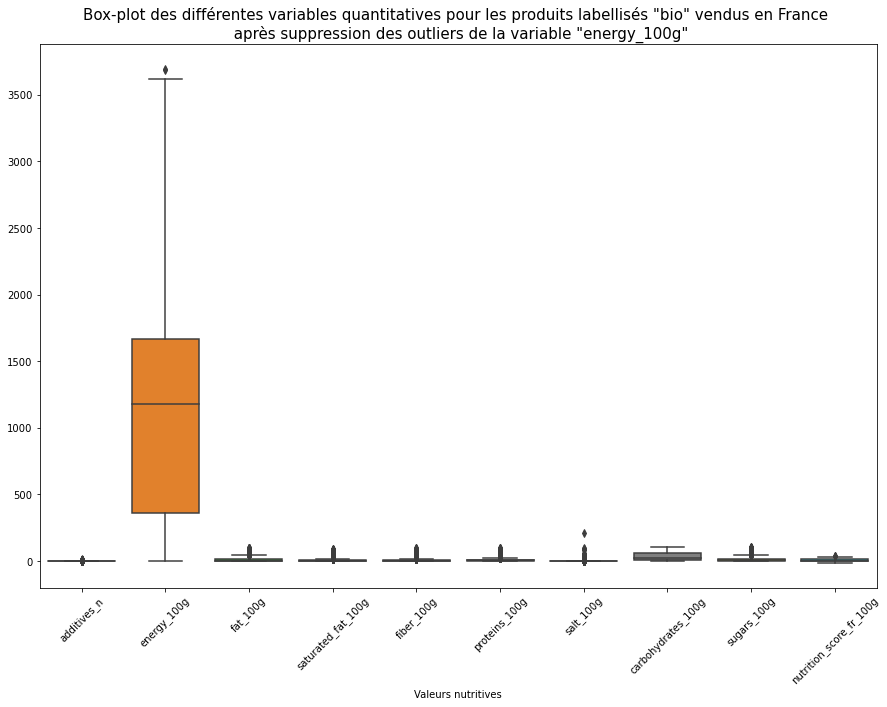

In [40]:
#On va effectuer un boxplot pour chaque variable après suppression des valeurs aberrantes pour la variable "energy_100g"

plt.figure(figsize = (15, 10))
sns.boxplot(data=energy_bio[liste_variables_quantitatives])

plt.xticks(rotation=45)

plt.xlabel('Valeurs nutritives')
plt.title('Box-plot des différentes variables quantitatives pour les produits labellisés "bio" vendus en France \n après suppression des outliers de la variable "energy_100g"', size = 15)

plt.show()

### Plutôt que de supprimer les valeurs aberrantes (= perte d'information), peut-être y a-t-il une solution alternative de traitement de ces valeurs ? 

In [41]:
#On va calculer la moyenne, écart-type et médiane de chacune de nos variables
for variable in liste_variables_quantitatives:
    moyenne_variable = round(data_bio_France[variable].mean(), 2) #Calcul de la moyenne 
    ecartype_variable = round(data_bio_France[variable].std(), 2) #Calcul de l'écart-type
    mediane_variable = round(data_bio_France[variable].median(), 2) #Calcul de la médiane
    print('VARIABLE', variable)
    print('La moyenne pour la variable', variable, 'est de', moyenne_variable)
    print('L\'écart-type pour la variable', variable, 'est de', ecartype_variable)
    print('La médiane pour la variable', variable, 'est de', mediane_variable)
    print('______________________________________________________________')

VARIABLE additives_n
La moyenne pour la variable additives_n est de 0.49
L'écart-type pour la variable additives_n est de 1.0
La médiane pour la variable additives_n est de 0.0
______________________________________________________________
VARIABLE energy_100g
La moyenne pour la variable energy_100g est de 1190.74
L'écart-type pour la variable energy_100g est de 879.64
La médiane pour la variable energy_100g est de 1201.0
______________________________________________________________
VARIABLE fat_100g
La moyenne pour la variable fat_100g est de 13.42
L'écart-type pour la variable fat_100g est de 19.99
La médiane pour la variable fat_100g est de 4.0
______________________________________________________________
VARIABLE saturated_fat_100g
La moyenne pour la variable saturated_fat_100g est de 5.12
L'écart-type pour la variable saturated_fat_100g est de 9.86
La médiane pour la variable saturated_fat_100g est de 1.0
______________________________________________________________
VARIABLE fi

### Traitement par la médiane

In [42]:
#On crée une nouvelle liste des variables dont on va traiter les valeurs aberrantes en enlevant le nutriscore de la liste 
#car je compte garder les valeurs aberrantes des nutriscores.
liste_traitee = liste_variables_quantitatives.copy()
del liste_traitee[-1]
display(liste_traitee)

#Création d'une fonction calculant la valeur médiane pour chaque variable et créant un nouveau df avec les valeurs 
#aberrantes modifiées par les valeurs médianes. 
for variable in liste_traitee: 
    def data_bio_France_variable_mediane(nom_df, variable):
        mediane_variable = round(nom_df[variable].median(), 2) #Calcul de la médiane
        variable_bio_outliers = affiche_outliers(nom_df, variable) #On affiche les valeurs aberrantes
        variable_bio_outliers[variable] = mediane_variable #On remplace les valeurs aberrantes par la médiane
        
        variable_bio_nettoye = suppr_outliers(nom_df, variable) #On affiche le df ne contenant pas de valeurs aberrantes
        
        data_bio_France_variable_mediane = pd.concat([variable_bio_outliers, variable_bio_nettoye]) #On concatène nos deux df 
        return data_bio_France_variable_mediane

['additives_n',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'carbohydrates_100g',
 'sugars_100g']

In [43]:
#Création des nouveaux df modifiés dont les valeurs aberrantes prennent la valeur de la médiane pour chaque variable
data_bio_France_energy = data_bio_France_variable_mediane(data_bio_France, 'energy_100g')
data_bio_France_additives = data_bio_France_variable_mediane(data_bio_France, 'additives_n')
data_bio_France_fat = data_bio_France_variable_mediane(data_bio_France, 'fat_100g')
data_bio_France_saturated_fat = data_bio_France_variable_mediane(data_bio_France, 'saturated_fat_100g')
data_bio_France_fiber = data_bio_France_variable_mediane(data_bio_France, 'fiber_100g')
data_bio_France_proteins = data_bio_France_variable_mediane(data_bio_France, 'proteins_100g')
data_bio_France_salt = data_bio_France_variable_mediane(data_bio_France, 'salt_100g')
data_bio_France_carbohydrates = data_bio_France_variable_mediane(data_bio_France, 'carbohydrates_100g')
data_bio_France_sugars = data_bio_France_variable_mediane(data_bio_France, 'sugars_100g')

In [44]:
#Création d'une fonction affichant les boxplots des df modifiés pour chaque variable
def boxplot_traite_mediane(nom_df_concat, variable):
    ax = sns.boxplot(nom_df_concat[variable], color = 'mediumseagreen')
    ax.set_title('Variable ' + variable + ' nettoyée des valeurs aberrantes \n par la médiane')
    plt.show()

    return boxplot_traite_mediane

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


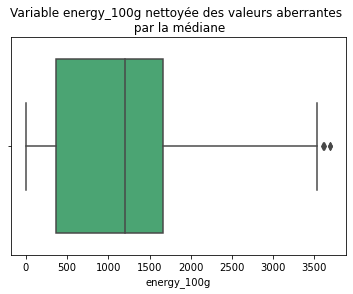

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


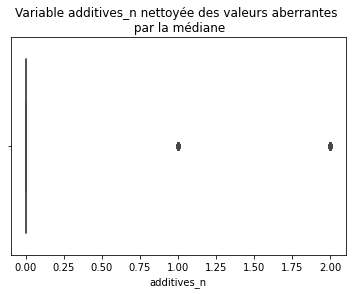

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


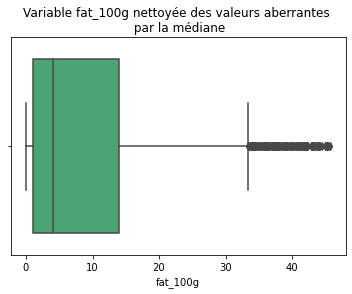

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


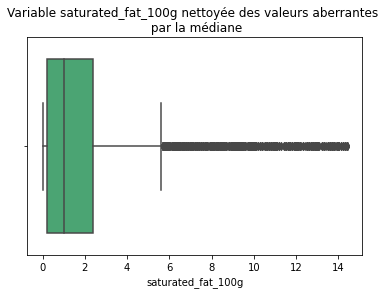

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


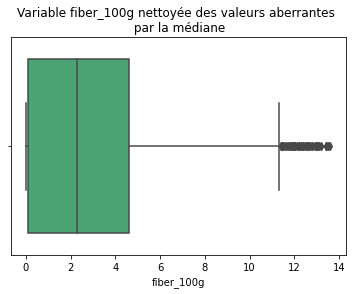

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


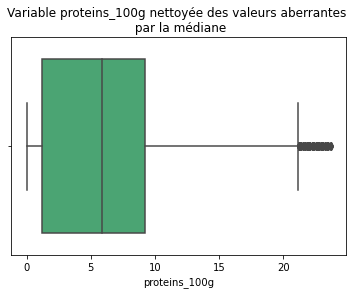

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


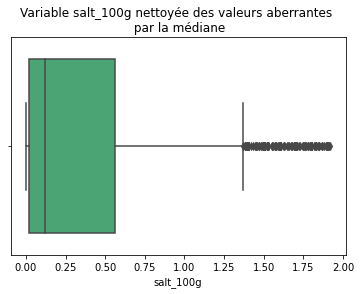

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


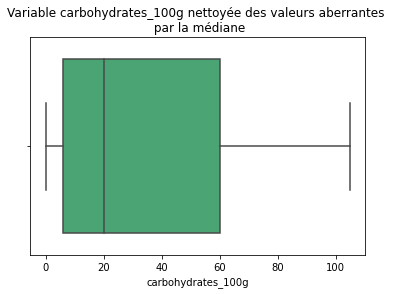

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


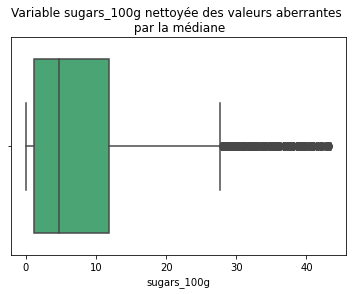

<function __main__.boxplot_traite_mediane(nom_df_concat, variable)>

In [45]:
#Affichage des boxplots après traitement des valeurs aberrantes par la médiane
boxplot_traite_mediane(data_bio_France_energy, 'energy_100g')
boxplot_traite_mediane(data_bio_France_additives, 'additives_n')
boxplot_traite_mediane(data_bio_France_fat, 'fat_100g')
boxplot_traite_mediane(data_bio_France_saturated_fat, 'saturated_fat_100g')
boxplot_traite_mediane(data_bio_France_fiber, 'fiber_100g')
boxplot_traite_mediane(data_bio_France_proteins, 'proteins_100g')
boxplot_traite_mediane(data_bio_France_salt, 'salt_100g')
boxplot_traite_mediane(data_bio_France_carbohydrates, 'carbohydrates_100g')
boxplot_traite_mediane(data_bio_France_sugars, 'sugars_100g')

### Mais il existe différentes catégories de produits. Regardons les boxplots pour chacune des variables des différentes catégories de produits.  

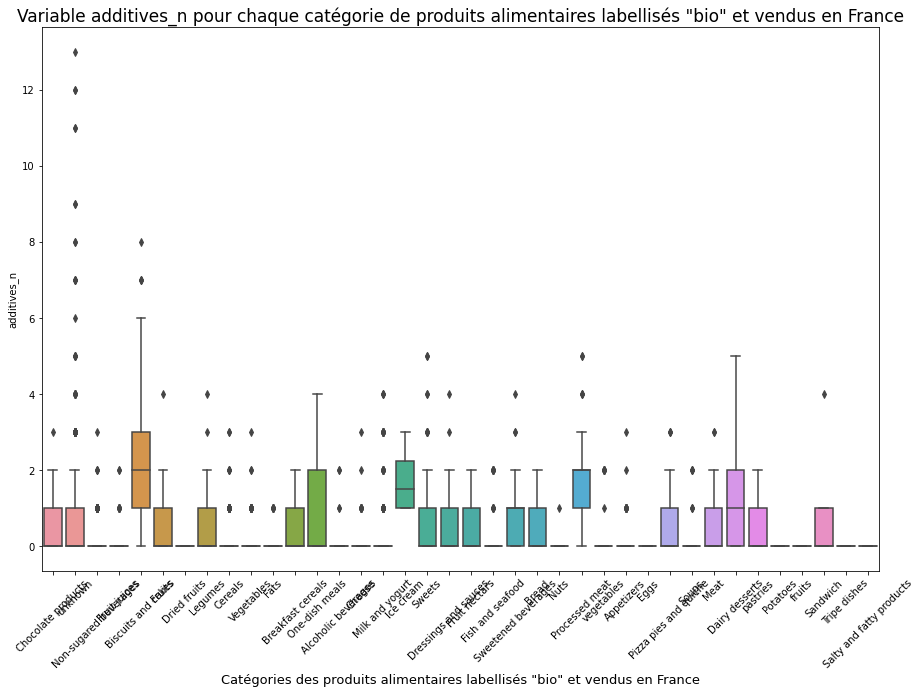

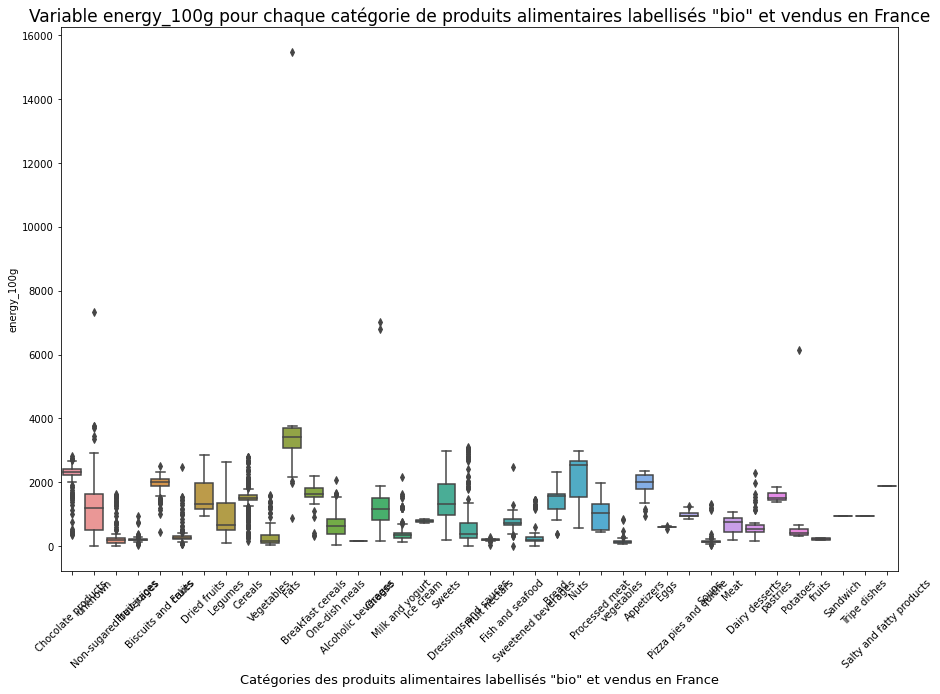

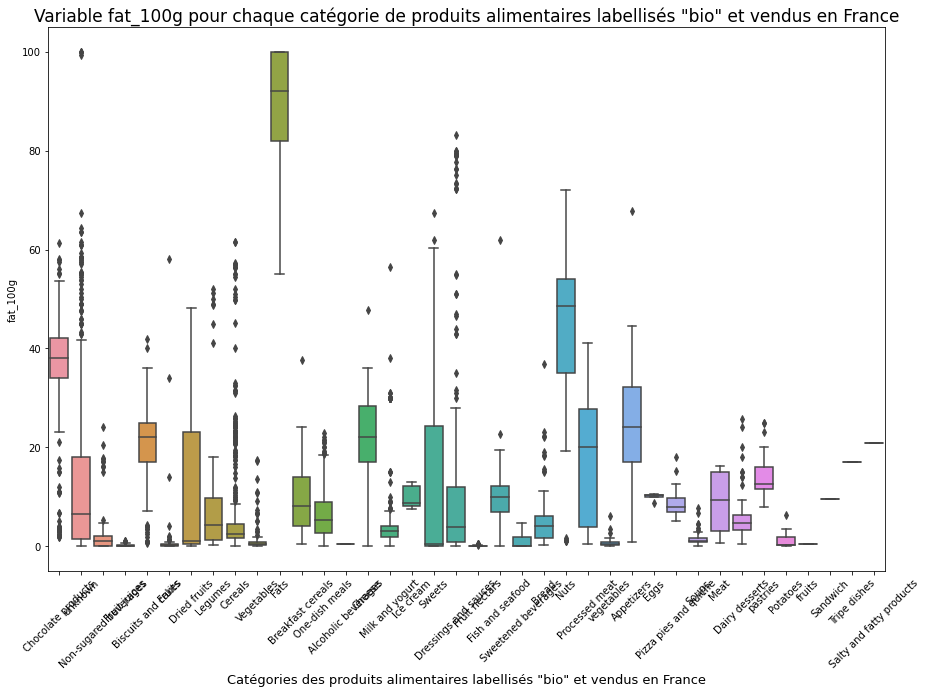

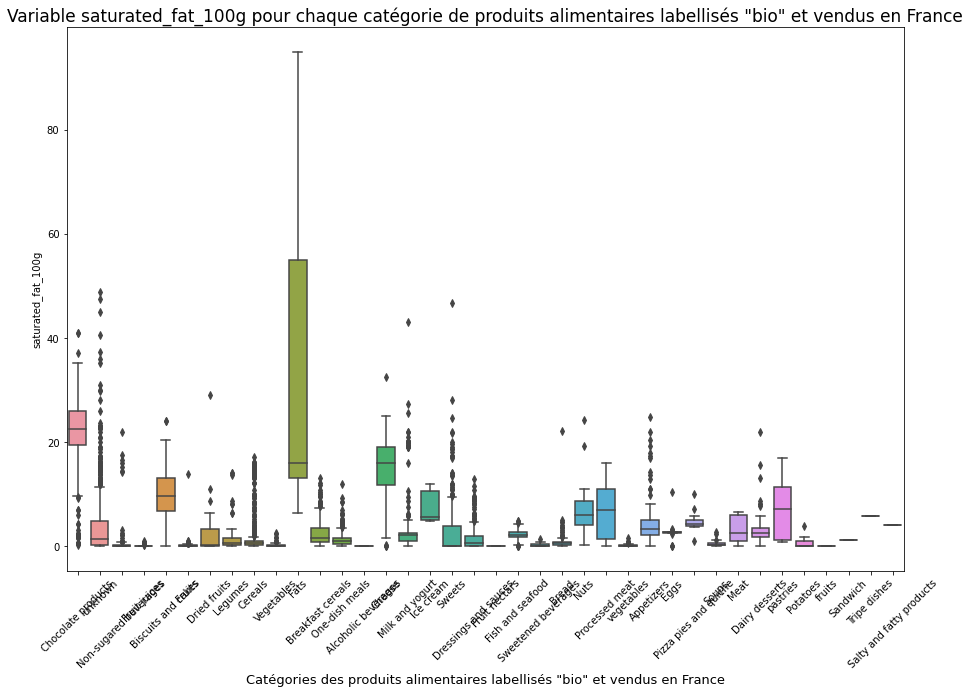

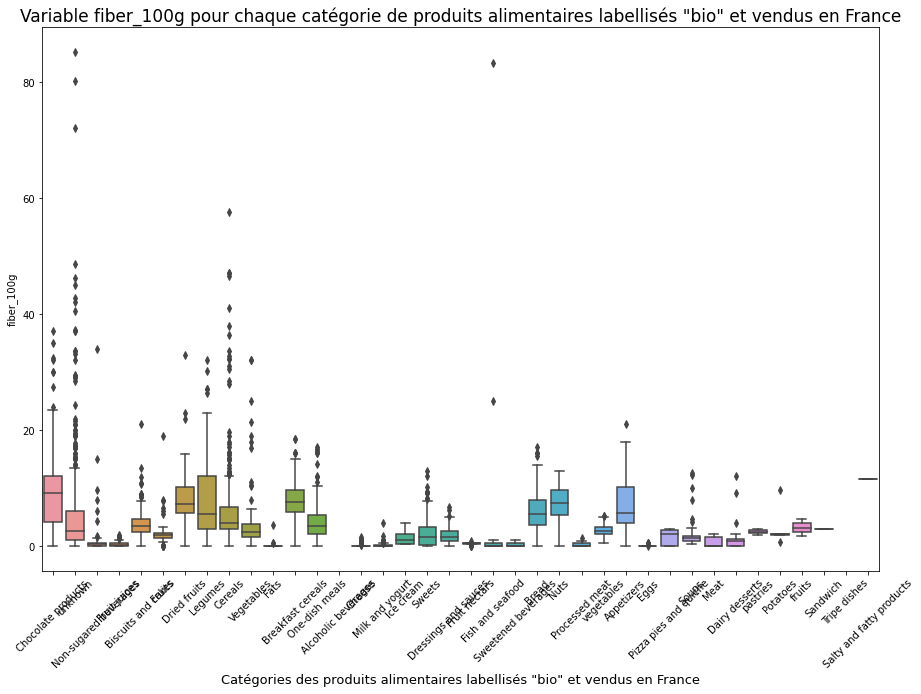

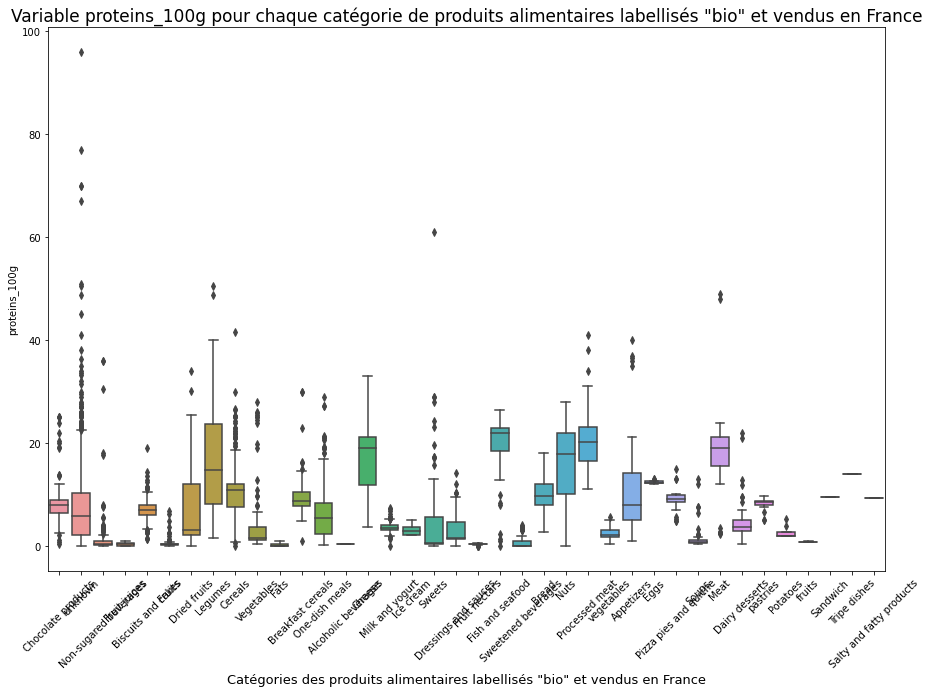

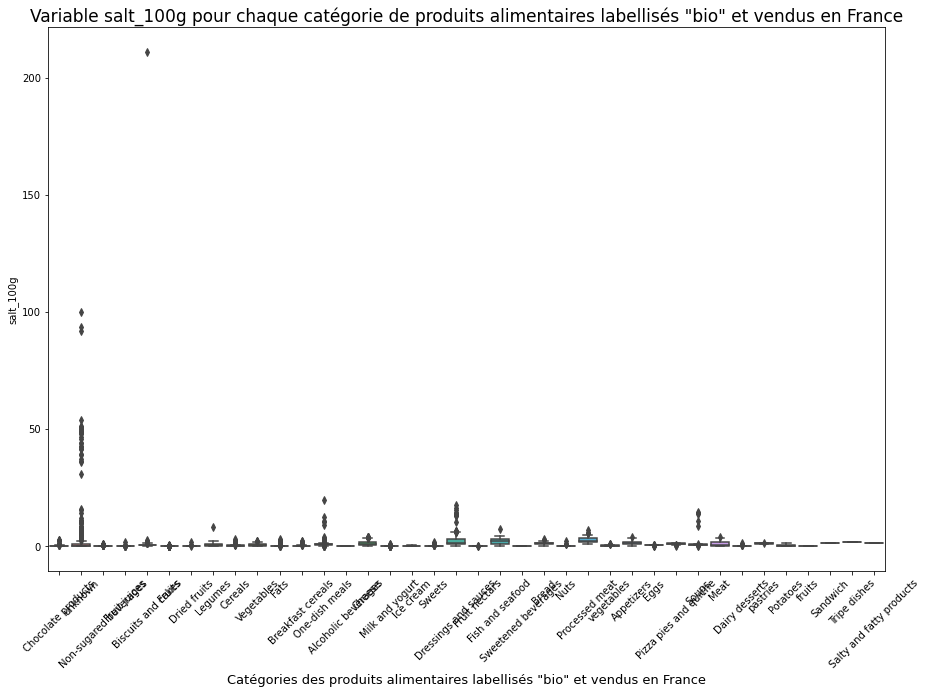

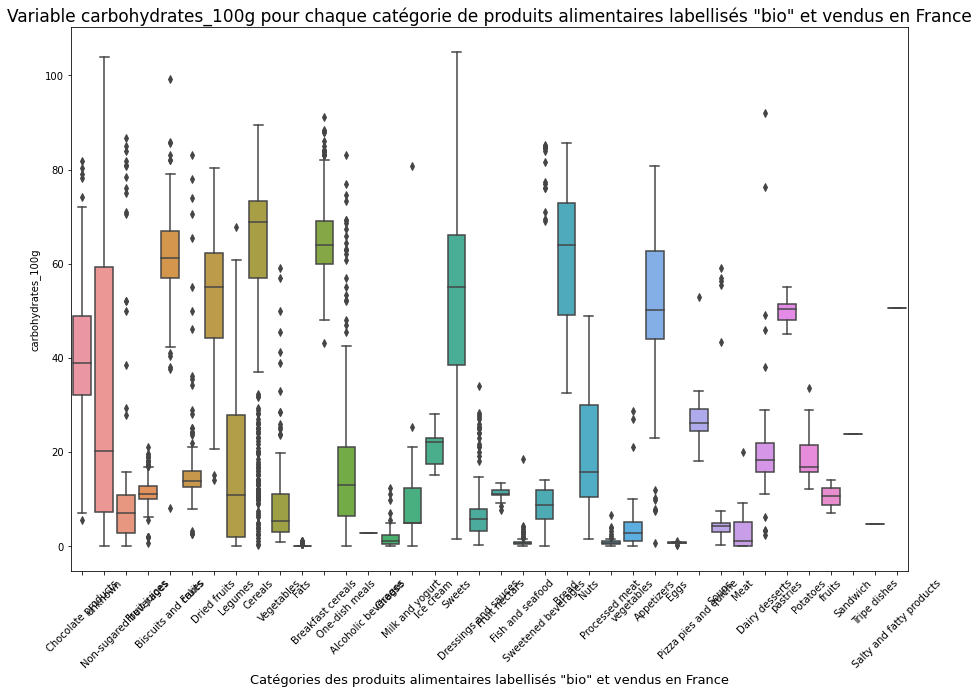

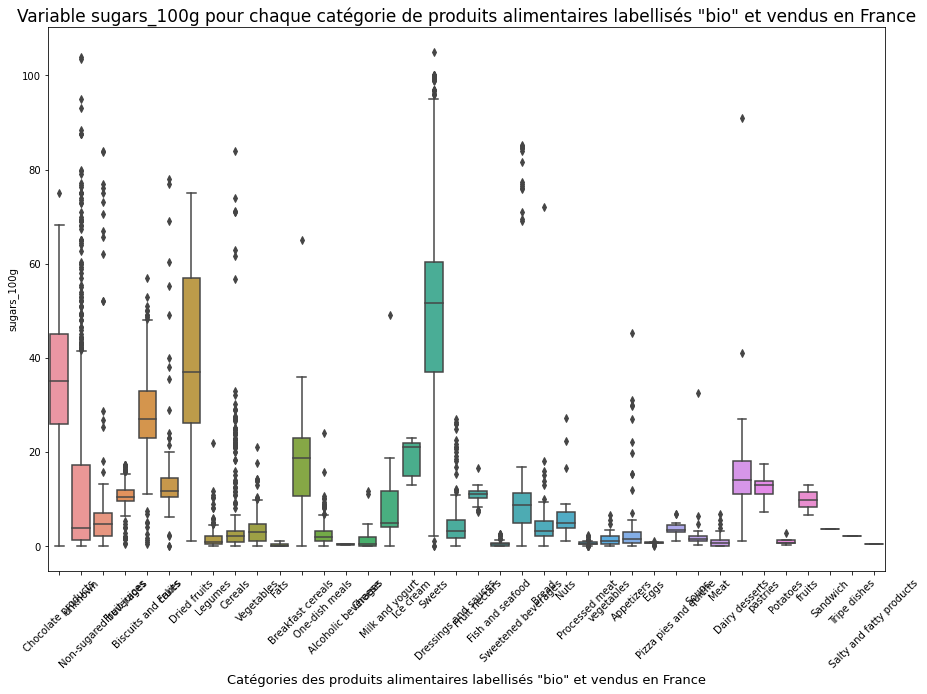

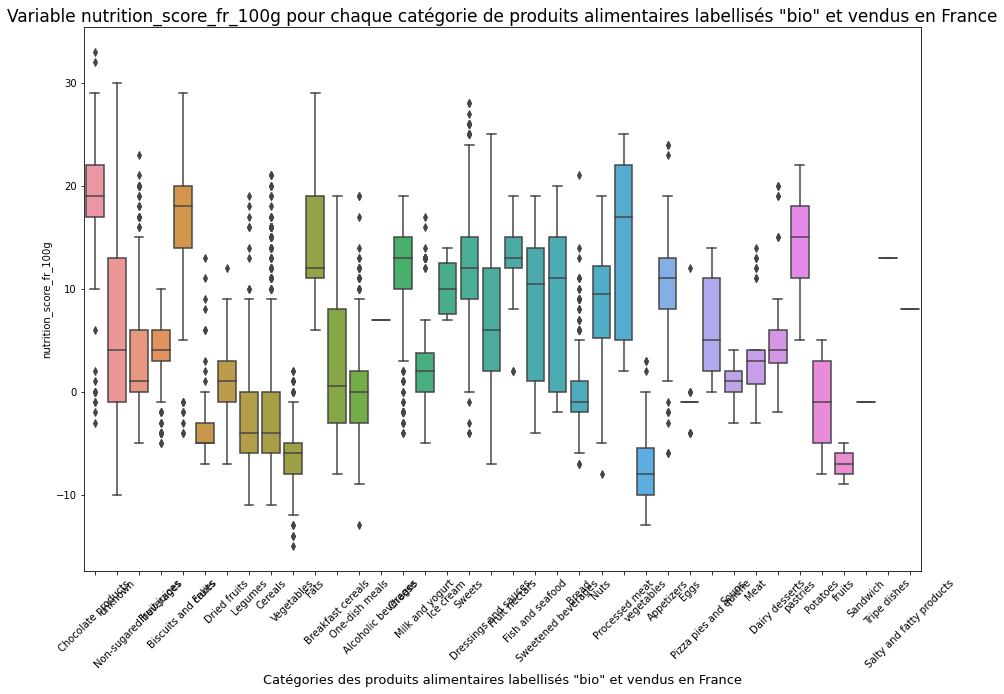

In [46]:
#Observons les différents boxplots pour chaque catégorie
colonne_df = ['pnns_groups_2', 'energy_100g', 'additives_n', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 
                      'proteins_100g','salt_100g', 'carbohydrates_100g', 'sugars_100g', 'nutrition_score_fr_100g']
data_bio_groupes = data_bio_France[colonne_df]

for variable in liste_variables_quantitatives:
    plt.figure(figsize = (15,10))
    sns.boxplot(x = 'pnns_groups_2', y = variable, data = data_bio_groupes)
    plt.xticks(rotation = 45)
    plt.xlabel('Catégories des produits alimentaires labellisés "bio" et vendus en France', size=13)
    plt.title('Variable ' + variable + ' pour chaque catégorie de produits alimentaires labellisés "bio" et vendus en France', size = 17)
    plt.show()

#### Des différences sont observées pour les différentes catégries (boxplots)

#### On va donc prendre en considération les catégories et calculer la valeurs médiane de chaque catégorie.

### Si on regarde en calculant la médiane par catégorie.

#### On observe des valeurs de type 'unknown'. En sachant que l'on a aussi des valeurs manquantes, on va remplacer ces valeurs manquantes par la valeur 'unknown' pour ensuite les enlever de notre analyse.  

In [47]:
#On remplace les valeurs manquantes par "unknown"
data_bio_France_nettoye = data_bio_France.fillna({'pnns_groups_2': 'unknown'})
data_bio_France_nettoye

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
255005  3760240720546    2017-04-21 00:45:02   
222857  3288110822072    2017-04-20 21:42:19   
254224  3760159376490    2017-04-20 19:34:14   
245853  3596710347162    2017-04-20 19:27:54   
...               ...                    ...   
230697  3396410048105    2012-07-07 10:51:56   
230656  3396410027049    2012-06-29 12:34:59   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   
258014  4005514171303    2012-06-02 15:15:35   

                                 product_name quantity           brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g       Bonneterre   
255005                        le bio de manon      NaN  le bio de manon   
222857              Milumel bio 3 croissance       NaN           Lactel   
254224                    Sucre fleur de coco    500 g    Natur'attitud   
245853            Quinoa Lentilles Et Tomates    250 g           Auchan   
...                                       ...      ...              ...   
230697                  Riz Épeautre Noisette       1L       Bonneterre   
230656                 Confit de Foie de Porc     190g       Bonneterre   
232093                    Galettes 5 céréales     130g     Grillon d'or   
212971               Pain spécial de campagne    400 g       Nature Bio   
258014                          Pâté Shiitake     125g           Tartex   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
255005                unknown                           Bio,AB,Point Vert   
222857                unknown  Bio,Bio européen,AB Agriculture Biologique   
254224                unknown                         Bio,AB,Bio européen   
245853                unknown  Bio,Bio européen,AB Agriculture Biologique   
...                       ...                                         ...   
230697  Non-sugared beverages      AB,Bio-européen,FSC,transport optimisé   
230656                unknown                                          AB   
232093                Cereals                             AB,Bio européen   
212971                  Bread                             AB,Bio-européen   
258014                unknown                                   Bio,Végan   

       countries                                   ingredients_text  \
230691    France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
255005    France  banane, huile de noix de coco, sucre de canne,...   
222857    France  Lait écrémé, maltodextrines, matières grasses ...   
254224    France  Sucre de fleur de Coco* (100%). *issu de l'Agr...   
245853    France                                                NaN   
...          ...                                                ...   
230697    France  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...   
230656    France  foie de porc, viande porc, sel, oignons, poivr...   
232093    France              riz, blé, maïs, avoine, sarrasin, sel   
212971    France  Farine de blé 48%, eau, farine de seigle 8%, l...   
258014    France  levure alimentaire, eau, huile de palmiste non...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0    44.00                27.0         NaN   
255005          0.0  ...      2146.0    33.60                29.9         NaN   
222857          8.0  ...       268.0     2.60                 0.3        0.00   
254224          0.0  ...      1598.0     0.79                 0.6        9.47   
245853          NaN  ...       657.0      NaN                 0.6        6.50   
...             ...  ...         ...      ...                 ...         ...   
230697          0.0  ...       320.0     3.00                 0.3        1.60   
230656          0.0  ...         NaN      NaN                 NaN         NaN   
232093          0.0  ...      16

In [48]:
#On traite au mieux les catégories notées comme 'unknown'
data_bio_France_nettoye.loc[(data_bio_France_nettoye['main_category_fr'] == 'Sirops') & 
                    (data_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Sweetened beverages'  

data_bio_France_nettoye.loc[(data_bio_France_nettoye['main_category_fr'] == 'Laits') &
                    (data_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Milk and yogurt'

data_bio_France_nettoye.loc[(data_bio_France_nettoye['main_category_fr'] == 'Gaufres') &
                    (data_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Biscuits and cakes'

In [49]:
#Avant de remplacer les valeurs aberrantes, on va regarder si on observe des données étranges (ex : saturated-fat_100g > fat_100g)
data_bio_France_nettoye.loc[data_bio_France_nettoye['saturated_fat_100g'] > data_bio_France_nettoye['fat_100g'], :]

#On va plafonner en égalisant les fat_100g et les saturated_fat_100g
data_bio_France_nettoye.loc[data_bio_France_nettoye['saturated_fat_100g'] > data_bio_France_nettoye['fat_100g'], 'fat_100g'] = data_bio_France_nettoye['saturated_fat_100g']

In [50]:
#On compte le nombre de produits pour chaque catégorie
display(data_bio_France_nettoye.groupby('pnns_groups_2').count())

#On affiche le nombre de produits totaux
nbre_produits_bio = data_bio_France.shape[0]

#On calcule le % de produits bio vendus en France dont on n'a pas de données concernant leur catégorie. 
nbre_occurrence = data_bio_France_nettoye['pnns_groups_2'].value_counts().reset_index() 
nbre_occurrence = pd.DataFrame(nbre_occurrence)
nbre_unknown = nbre_occurrence.loc[nbre_occurrence['index'] == 'unknown', 'pnns_groups_2'].values[0]

print(round(nbre_unknown*100/nbre_produits_bio, 2), '% des produits ont une catégorie inconnue.')

code  last_modified_datetime  product_name  \
pnns_groups_2                                                          
Alcoholic beverages        175                     175           175   
Appetizers                  98                      98            98   
Biscuits and cakes         463                     463           462   
Bread                      215                     215           214   
Breakfast cereals          308                     308           308   
Cereals                    797                     797           795   
Cheese                     199                     199           198   
Chocolate products         344                     344           342   
Dairy desserts              48                      48            48   
Dressings and sauces       250                     250           249   
Dried fruits                65                      65            65   
Eggs                        76                      76            76   
Fats                       228                     228           228   
Fish and seafood           106                     106           106   
Fruit juices               323                     323           322   
Fruit nectars               54                      54            54   
Fruits                     260                     260           260   
Ice cream                    9                       9             9   
Legumes                    143                     143           143   
Meat                        65                      65            64   
Milk and yogurt            309                     309           309   
Non-sugared beverages      587                     587           585   
Nuts                        42                      42            42   
One-dish meals             355                     355           354   
Pizza pies and quiche       24                      24            24   
Potatoes                    13                      13            13   
Processed meat             113                     113           113   
Salty and fatty products     1                       1             1   
Sandwich                     4                       4             4   
Soups                       95                      95            95   
Sweetened beverages        113                     113           112   
Sweets                     437                     437           435   
Tripe dishes                 2                       2             2   
Vegetables                 216                     216           216   
fruits                       4                       4             4   
pastries                    32                      32            32   
unknown                   4080                    4080          4055   
vegetables                  50                      50            50   

                          quantity  brands  labels  countries  \
pnns_groups_2                                                   
Alcoholic beverages            173     170     175        175   
Appetizers                      93      97      98         98   
Biscuits and cakes             431     463     463        463   
Bread                          206     215     215        215   
Breakfast cereals              291     307     308        308   
Cereals                        774     794     797        797   
Cheese                         192     199     199        199   
Chocolate products             324     342     344        344   
Dairy desserts                  45      48      48         48   
Dressings and sauces           240     250     250        250   
Dried fruits                    61      64      65         65   
Eggs                            72      75      76         76   
Fats                           215     228     228        228   
Fish and seafood               101     105     106        106   
Fruit juices                   270     317     323        323   
Fruit nectars                   49      

38.12 % des produits ont une catégorie inconnue.


In [51]:
#On effectue une copie de notre fichier nettoyé des valeurs manquantes pour les catégories
data_bio_France_new = data_bio_France_nettoye.copy()

#On supprime les lignes de produits alimentaires dont la catégorie est inconnue
data_bio_France_new = data_bio_France_new.drop(data_bio_France_new[data_bio_France_new['pnns_groups_2'] == 'unknown'].index)
display(data_bio_France_new)

#On remplace certaines catégories
data_bio_France_new = data_bio_France_new.replace('vegetables', 'Vegetables')
data_bio_France_new = data_bio_France_new.replace('fruits', 'Fruits')
data_bio_France_new = data_bio_France_new.replace('pastries', 'Pastries')
data_bio_France_new = data_bio_France_new.replace('Legumes', 'Vegetables')

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   
...               ...                    ...   
253028  3760091729477    2012-07-20 20:01:25   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
293049                              Perrier fines bulles      NaN   
289838                                  Ginger Green Tea    500 g   
254226                                    Jus de grenade      NaN   
253057                                 Madeleines amande      NaN   
...                                                  ...      ...   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   
223014                                       Mini Jungle     160g   
230697                             Riz Épeautre Noisette       1L   
232093                               Galettes 5 céréales     130g   
212971                          Pain spécial de campagne    400 g   

                       brands          pnns_groups_2  \
230691             Bonneterre     Chocolate products   
293049                Perrier  Non-sugared beverages   
289838  Coop, Coop naturaplan  Non-sugared beverages   
254226           Très pressés           Fruit juices   
253057              Viadélice     Biscuits and cakes   
...                       ...                    ...   
253028             Ethiquable          Fruit nectars   
223014                Kalibio     Biscuits and cakes   
230697             Bonneterre  Non-sugared beverages   
232093           Grillon d'or                Cereals   
212971             Nature Bio                  Bread   

                                                   labels       countries  \
230691         Bio,Bio européen,AB Agriculture Biologique          France   
293049         Bio,Bio européen,AB Agriculture Biologique          France   
289838         Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226         Bio,Bio européen,AB Agriculture Biologique          France   
253057         Bio,Bio européen,AB Agriculture Biologique          France   
...                                                   ...             ...   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
223014                                                 AB          France   
230697             AB,Bio-européen,FSC,transport optimisé          France   
232093                                    AB,Bio européen          France   
212971                                    AB,Bio-européen          France   

                                         ingredients_text  additives_n  ...  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0  ...   
293049                                                NaN          NaN  ...   
289838                                                NaN          NaN  ...   
254226                                                NaN          NaN  ...   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0  ...   
...                                                   ...          ...  ...   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0  ...   
223014  Farine de blé, chocolat au lait 25% (sucre de ...          1.0  ...   
230697  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0  ...   
232093              riz, blé, maïs, avoine, sarrasin, sel          0.0  ...   
212971  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  pro

In [52]:
#Regardons les médianes pour chaque groupe.
mediane_categories_bio_France = data_bio_France_new.groupby('pnns_groups_2').median()
mediane_categories_bio_France = mediane_categories_bio_France.reset_index()
mediane_categories_bio_France

display(mediane_categories_bio_France)

pnns_groups_2  additives_n  energy_100g  fat_100g  \
0        Alcoholic beverages          0.0        163.0      0.50   
1                 Appetizers          0.0       2008.0     24.00   
2         Biscuits and cakes          2.0       2010.0     22.00   
3                      Bread          0.0       1566.0      4.00   
4          Breakfast cereals          0.0       1631.0      8.10   
5                    Cereals          0.0       1497.0      2.40   
6                     Cheese          0.0       1170.0     22.00   
7         Chocolate products          0.0       2335.5     38.15   
8             Dairy desserts          1.0        529.0      4.80   
9       Dressings and sauces          0.0        393.0      3.95   
10              Dried fruits          0.0       1326.0      1.09   
11                      Eggs          0.0        602.0     10.30   
12                      Fats          0.0       3404.0     92.00   
13          Fish and seafood          0.0        738.0     10.00   
14              Fruit juices          0.0        197.0      0.10   
15             Fruit nectars          0.0        200.0      0.00   
16                    Fruits          0.0        266.0      0.20   
17                 Ice cream          1.5        784.5      8.80   
18                      Meat          0.0        767.0      9.30   
19           Milk and yogurt          0.0        361.0      3.00   
20     Non-sugared beverages          0.0        192.0      1.00   
21                      Nuts          0.0       2534.0     48.50   
22            One-dish meals          0.0        631.0      5.20   
23                  Pastries          0.0       1500.5     12.55   
24     Pizza pies and quiche          0.0        950.5      8.00   
25                  Potatoes          0.0        401.5      0.29   
26            Processed meat          2.0       1051.5     20.05   
27  Salty and fatty products          0.0       1879.0     20.80   
28                  Sandwich          0.0        946.0      9.60   
29                     Soups          0.0        141.0      1.00   
30       Sweetened beverages          1.0        197.0      0.10   
31                    Sweets          0.0       1328.5      0.50   
32              Tripe dishes          0.0        945.0     17.00   
33                Vegetables          0.0        306.0      0.70   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.100         NaN          0.500     0.0100   
1                3.200        5.65          8.000     1.3000   
2                9.600        3.50          7.000     0.5000   
3                0.500        5.45          9.755     1.1500   
4                1.500        7.60          8.800     0.0400   
5                0.500        4.00         10.800     0.0254   
6               16.000        0.00         19.000     1.0580   
7               22.500        9.10          7.900     0.0200   
8                2.500        0.80          3.650     0.1000   
9                0.600        1.60          1.600     1.5000   
10               0.300        7.25          3.100     0.0200   
11               2.700        0.00         12.300     0.3250   
12              16.000        0.00          0.000     0.0000   
13               2.200        0.00         22.000     2.0000   
14               0.000        0.20          0.400     0.0060   
15               0.000        0.50          0.500     0.0000   
16               0.010        1.90          0.400     0.0050   
17               5.650        1.10          2.845     0.1400   
18               2.500        0.00         19.000     0.2800   
19               2.100        0.00          3.500     0.1016   
20               0.100        0.40          0.500     0.0800   
21               5.900        7.40         17.850     0.0200   
22               0.900        3.50          5.500     0.8890   
23               7.150        2.40          8.500     1.1100   
24               4.200        2.10

In [53]:
#On crée une fonction qui affiche les catégories pour lesquelles nous avons des valeurs aberrantes pour la variable correspondante

def affiche_categ_variable(nom_df, variable):
    outliers_variable = affiche_outliers(nom_df, variable)
    outliers_variable_groupe = outliers_variable.groupby('pnns_groups_2').count().reset_index()
    display(outliers_variable_groupe)
    
    liste_categ_variable = outliers_variable_groupe['pnns_groups_2'].values.tolist()
    print(liste_categ_variable)
    
    return affiche_categ_variable

In [54]:
#On crée une fonction qui va chercher la valeur médiane pour chaque catégorie de chaque variable

def mediane_categorie_variable(df_med_categ, categ, nom_col_2):
    mediane_categorie_variable = df_med_categ.loc[df_med_categ.pnns_groups_2 == categ, nom_col_2].values[0]
    print(mediane_categorie_variable)
    return mediane_categorie_variable

In [55]:
#On effectue une copie de notre fichier de base
data_bio_France_copy = data_bio_France_new.copy()

#On crée une liste de nos différentes catégories
pnns = data_bio_France_copy['pnns_groups_2'].unique().tolist()

In [56]:
#On va récupérer nos valeurs limites supérieures pour nos différentes variables. 
for variable in liste_variables_quantitatives:#On va récupérer nos valeurs limites supérieures pour nos différentes variables. 
    valeur_limite_sup_variable = round(valeur_limite_sup(data_bio_France, variable), 2)
    print('La valeur limite supérieure pour', variable, 'est de', valeur_limite_sup_variable)

La valeur limite supérieure pour additives_n est de 2.5
La valeur limite supérieure pour energy_100g est de 3698.0
La valeur limite supérieure pour fat_100g est de 45.85
La valeur limite supérieure pour saturated_fat_100g est de 14.45
La valeur limite supérieure pour fiber_100g est de 13.6
La valeur limite supérieure pour proteins_100g est de 23.7
La valeur limite supérieure pour salt_100g est de 1.92
La valeur limite supérieure pour carbohydrates_100g est de 141.5
La valeur limite supérieure pour sugars_100g est de 43.45
La valeur limite supérieure pour nutrition_score_fr_100g est de 34.0


In [57]:
#On crée des variables pour la valeur limite supérieure de nos différentes variables
sup_energy = valeur_limite_sup(data_bio_France, 'energy_100g')
sup_additives = valeur_limite_sup(data_bio_France, 'additives_n')
sup_fat = valeur_limite_sup(data_bio_France, 'fat_100g')
sup_sat_fat = valeur_limite_sup(data_bio_France, 'saturated_fat_100g')
sup_fiber = valeur_limite_sup(data_bio_France, 'fiber_100g')
sup_proteins = valeur_limite_sup(data_bio_France, 'proteins_100g')
sup_salt = valeur_limite_sup(data_bio_France, 'salt_100g')
sup_sugars = valeur_limite_sup(data_bio_France, 'sugars_100g')

In [58]:
#Pour la variable "energy_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_bio_France_copy, 'energy_100g')
liste_categ_energy = ['Cheese', 'Fats', 'Potatoes']

for categ in liste_categ_energy:
    mediane_categ_energy = mediane_categorie_variable(mediane_categories_bio_France, categ, 'energy_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['energy_100g'] >= sup_energy) , 'energy_100g'] = mediane_categ_energy

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  quantity  brands  \
0        Cheese     2                       2             2         2       2   
1          Fats     1                       1             1         1       1   
2      Potatoes     1                       1             1         1       1   

   labels  countries  ingredients_text  additives_n  ...  energy_100g  \
0       2          2                 2            2  ...            2   
1       1          1                 1            1  ...            1   
2       1          1                 1            1  ...            1   

   fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0         2                   2           1              2          2   
1         1                   1           1              1          1   
2         1                   1           1              1          1   

   carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0                   2            2                        2   
1                   1            1                        1   
2                   1            1                        0   

   nutrition_grade_fr  
0                   2  
1                   1  
2                   0  

[3 rows x 22 columns]

['Cheese', 'Fats', 'Potatoes']
1170.0
3404.0
401.5


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                27.0         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          5.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [59]:
#Pour la variable "additives_n", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_bio_France_copy, 'additives_n')
liste_categ_additives = ['Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 
                         'Dressings and sauces', 'Fruits', 'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 
                         'One-dish meals', 'Pizza pies and quiche', 'Processed meat', 'Sandwich', 'Sweetened beverages', 
                         'Sweets', 'Vegetables']

for categ in liste_categ_additives:
    mediane_categ_additives = mediane_categorie_variable(mediane_categories_bio_France, categ, 'additives_n')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['additives_n'] >= sup_additives) , 'additives_n'] = mediane_categ_additives

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     1                       1             1   
1      Biscuits and cakes   145                     145           144   
2                 Cereals     2                       2             2   
3                  Cheese     1                       1             1   
4      Chocolate products     1                       1             1   
5          Dairy desserts     3                       3             3   
6    Dressings and sauces     2                       2             2   
7                  Fruits     1                       1             1   
8               Ice cream     2                       2             2   
9                    Meat     2                       2             2   
10        Milk and yogurt    16                      16            16   
11  Non-sugared beverages     1                       1             1   
12         One-dish meals    23                      23            23   
13  Pizza pies and quiche     3                       3             3   
14         Processed meat    11                      11            11   
15               Sandwich     1                       1             1   
16    Sweetened beverages     3                       3             3   
17                 Sweets    10                      10            10   
18             Vegetables     3                       3             3   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          1       1       1          1                 1            1  ...   
1        142     145     145        145               145          145  ...   
2          1       2       2          2                 2            2  ...   
3          1       1       1          1                 1            1  ...   
4          1       1       1          1                 1            1  ...   
5          3       3       3          3                 3            3  ...   
6          2       2       2          2                 2            2  ...   
7          1       1       1          1                 1            1  ...   
8          2       2       2          2                 2            2  ...   
9          2       2       2          2                 2            2  ...   
10        15      16      16         16                16           16  ...   
11         1       1       1          1                 1            1  ...   
12        23      23      23         23                23           23  ...   
13         3       3       3          3                 3            3  ...   
14        11      11      11         11                11           11  ...   
15         1       1       1          1                 1            1  ...   
16         3       3       3          3                 3            3  ...   
17        10      10      10         10                10           10  ...   
18         3       3       3          3                 3            3  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             1         1                   1           1              1   
1           144       144                 139         123            144   
2             2         2                   2           2              2   
3             1         1                   1           0              1   
4             1         1                   1           1              1   
5             3         3                   3           2              3   
6             1         1                   1           1              1   
7             1         1                   1           1              1   
8             2         2                   2           2              2   
9             2         2                   2           0              2   
10           16        15                  16          13             16   
11            1         1                   1           1 

['Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 'Fruits', 'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 'One-dish meals', 'Pizza pies and quiche', 'Processed meat', 'Sandwich', 'Sweetened beverages', 'Sweets', 'Vegetables']
0.0
2.0
0.0
0.0
0.0
1.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
1.0
0.0
0.0


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                27.0         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [60]:
#Pour la variable "fat_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_bio_France_copy, 'fat_100g')
liste_categ_fat = ['Appetizers', 'Cereals', 'Cheese', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 'Fats', 
                   'Fish and seafood', 'Fruits', 'Milk and yogurt', 'Nuts', 'Sweets', 'Vegetables']

for categ in liste_categ_fat:
    mediane_categ_fat = mediane_categorie_variable(mediane_categories_bio_France, categ, 'fat_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['fat_100g'] >= sup_fat) , 'fat_100g'] = mediane_categ_fat

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0             Appetizers     1                       1             1   
1                Cereals    16                      16            16   
2                 Cheese     1                       1             1   
3     Chocolate products    32                      32            32   
4   Dressings and sauces    22                      22            22   
5           Dried fruits     1                       1             1   
6                   Fats   185                     185           185   
7       Fish and seafood     1                       1             1   
8                 Fruits     1                       1             1   
9        Milk and yogurt     1                       1             1   
10                  Nuts    17                      17            17   
11                Sweets    13                      13            13   
12            Vegetables     5                       5             5   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          1       1       1          1                 1            1  ...   
1         16      16      16         16                16           16  ...   
2          1       1       1          1                 1            1  ...   
3         31      32      32         32                31           31  ...   
4         21      22      22         22                22           22  ...   
5          1       1       1          1                 1            1  ...   
6        177     185     185        185               157          157  ...   
7          1       1       1          1                 1            1  ...   
8          1       1       1          1                 1            1  ...   
9          1       1       1          1                 1            1  ...   
10        16      17      17         17                12           12  ...   
11        13      13      13         13                13           13  ...   
12         5       5       5          5                 4            4  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             1         1                   1           1              1   
1            16        16                  14          14             16   
2             1         1                   1           0              1   
3            32        32                  32          24             32   
4            22        22                  21           6             22   
5             1         1                   1           1              1   
6           182       185                 180          83            178   
7             1         1                   1           0              1   
8             1         1                   0           1              1   
9             1         1                   1           0              1   
10           17        17                  17          12             17   
11           13        13                  13           9             13   
12            5         5                   5           5              5   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           1                   1            1                        1   
1          13                  16           13                       12   
2           1                   1            1                        1   
3          31                  32           32                       31   
4          21                  22           21                       21   
5           1                   1            1                        1   
6         160                 171          161                      154   
7           1                   1            1                        1   
8           1                   1            1                        0   
9           1                   1            1                        1   
10   

['Appetizers', 'Cereals', 'Cheese', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 'Milk and yogurt', 'Nuts', 'Sweets', 'Vegetables']
24.0
2.4
22.0
38.150000000000006
3.95
1.09
92.0
10.0
0.2
3.0
48.5
0.5
0.7


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                27.0         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [61]:
#Pour la variable "saturated-fat_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  
affiche_categ_variable(data_bio_France_copy, 'saturated_fat_100g')
liste_categ_sat_fat = ['Appetizers', 'Biscuits and cakes', 'Bread', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 
                       'Dried fruits', 'Fats', 'Milk and yogurt', 'Non-sugared beverages', 'Nuts', 'Pastries', 'Processed meat', 
                       'Sweets']

for categ in liste_categ_sat_fat:
    mediane_categ_sat_fat = mediane_categorie_variable(mediane_categories_bio_France, categ, 'saturated_fat_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['saturated_fat_100g'] >= sup_sat_fat), 'saturated_fat_100g'] = mediane_categ_sat_fat

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     7                       7             7   
1      Biscuits and cakes    38                      38            38   
2                   Bread     1                       1             1   
3                 Cereals     9                       9             9   
4                  Cheese    82                      82            82   
5      Chocolate products   261                     261           259   
6          Dairy desserts     1                       1             1   
7            Dried fruits     1                       1             1   
8                    Fats   103                     103           103   
9         Milk and yogurt    27                      27            27   
10  Non-sugared beverages     4                       4             4   
11                   Nuts     2                       2             2   
12               Pastries     4                       4             4   
13         Processed meat     1                       1             1   
14                 Sweets    15                      15            15   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          7       7       7          7                 7            7  ...   
1         35      38      38         38                36           36  ...   
2          1       1       1          1                 1            1  ...   
3          9       9       9          9                 7            7  ...   
4         79      82      82         82                72           72  ...   
5        247     261     261        261               236          236  ...   
6          1       1       1          1                 0            0  ...   
7          1       1       1          1                 1            1  ...   
8         93     103     103        103                77           77  ...   
9         27      27      27         27                24           24  ...   
10         4       4       4          4                 4            4  ...   
11         2       2       2          2                 1            1  ...   
12         3       4       4          4                 2            2  ...   
13         1       1       1          1                 1            1  ...   
14        13      14      15         15                11           11  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             7         7                   7           7              7   
1            38        38                  38          33             38   
2             1         1                   1           1              1   
3             9         8                   9           8              8   
4            82        75                  82          33             82   
5           261       237                 261         217            261   
6             1         0                   1           1              1   
7             1         1                   1           1              1   
8           103        91                 103          58            103   
9            27        24                  27          13             27   
10            4         4                   4           3              4   
11            2         2                   2           2              2   
12            4         3                   4           4              4   
13            1         1                   1           0              1   
14           15        14                  15           8             15   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           7                   7            6                        6   
1          38                  38           38                       38   
2           1                   1            1                        1   
3           8                   8            9               

['Appetizers', 'Biscuits and cakes', 'Bread', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 'Dried fruits', 'Fats', 'Milk and yogurt', 'Non-sugared beverages', 'Nuts', 'Pastries', 'Processed meat', 'Sweets']
3.2
9.6
0.5
0.5
16.0
22.5
2.5
0.3
16.0
2.1
0.1
5.9
7.15
7.0
0.1


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [62]:
#Pour la variable "fiber_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  
affiche_categ_variable(data_bio_France_copy, 'fiber_100g')
liste_categ_fiber = ['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 
                     'Dried fruits', 'Fish and seafood', 'Fruits', 'Non-sugared beverages', 'One-dish meals', 'Vegetables']

for categ in liste_categ_fiber:
    mediane_categ_fiber = mediane_categorie_variable(mediane_categories_bio_France, categ, 'fiber_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['fiber_100g'] >= sup_fiber) , 'fiber_100g'] = mediane_categ_fiber

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     4                       4             4   
1      Biscuits and cakes     2                       2             2   
2                   Bread     5                       5             5   
3       Breakfast cereals    15                      15            15   
4                 Cereals    30                      30            30   
5      Chocolate products    43                      43            43   
6            Dried fruits     5                       5             5   
7        Fish and seafood     2                       2             2   
8                  Fruits     1                       1             1   
9   Non-sugared beverages     2                       2             2   
10         One-dish meals     6                       6             6   
11             Vegetables    29                      29            29   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          4       4       4          4                 3            3  ...   
1          2       2       2          2                 2            2  ...   
2          5       5       5          5                 4            4  ...   
3         14      15      15         15                11           11  ...   
4         29      30      30         30                22           22  ...   
5         38      43      43         43                38           38  ...   
6          4       5       5          5                 4            4  ...   
7          2       2       2          2                 2            2  ...   
8          1       1       1          1                 1            1  ...   
9          2       2       2          2                 1            1  ...   
10         6       6       6          6                 6            6  ...   
11        29      29      29         29                23           23  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             4         4                   3           4              4   
1             2         2                   2           2              2   
2             5         4                   5           5              5   
3            15        12                  15          15             15   
4            30        24                  28          30             30   
5            43        39                  41          43             43   
6             5         3                   5           5              5   
7             2         1                   2           2              2   
8             1         1                   1           1              1   
9             2         1                   1           2              2   
10            6         6                   5           6              6   
11           29        25                  28          29             29   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           3                   4            3                        3   
1           2                   2            2                        2   
2           5                   4            5                        5   
3          15                  12           15                       15   
4          28                  24           28                       28   
5          40                  39           40                       39   
6           5                   3            5                        5   
7           2                   1            2                        2   
8           1                   1            1                        1   
9           1                   1            2                        1   
10          6                   6            5                        4   
11         28                  25           28                       28   

    nutrition_grade_fr  
0                    3  
1                  

['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 'Dried fruits', 'Fish and seafood', 'Fruits', 'Non-sugared beverages', 'One-dish meals', 'Vegetables']
5.65
3.5
5.45
7.6
4.0
9.1
7.25
0.0
1.9
0.4
3.5
2.8


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [63]:
#Pour la variable "proteins_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  
affiche_categ_variable(data_bio_France_copy, 'proteins_100g')
liste_categ_proteins = ['Appetizers', 'Breakfast cereals', 'Cereals', 'Cheese', 'Chocolate products', 'Dried fruits', 
                        'Fish and seafood', 'Meat', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 
                        'Sweets', 'Vegetables']

for categ in liste_categ_proteins:
    mediane_categ_proteins = mediane_categorie_variable(mediane_categories_bio_France, categ, 'proteins_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['proteins_100g'] >= sup_proteins) , 'proteins_100g'] = mediane_categ_proteins
    
display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     5                       5             5   
1       Breakfast cereals     3                       3             3   
2                 Cereals    14                      14            14   
3                  Cheese    41                      41            41   
4      Chocolate products     4                       4             4   
5            Dried fruits     4                       4             4   
6        Fish and seafood    28                      28            28   
7                    Meat     6                       6             6   
8   Non-sugared beverages     3                       3             3   
9                    Nuts     8                       8             8   
10         One-dish meals     3                       3             3   
11         Processed meat    24                      24            24   
12                 Sweets     6                       6             6   
13             Vegetables    46                      46            46   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          5       5       5          5                 4            4  ...   
1          3       3       3          3                 2            2  ...   
2         14      14      14         14                11           11  ...   
3         40      41      41         41                36           36  ...   
4          4       4       4          4                 4            4  ...   
5          4       4       4          4                 3            3  ...   
6         27      28      28         28                26           26  ...   
7          6       6       6          6                 6            6  ...   
8          3       3       3          3                 3            3  ...   
9          8       8       8          8                 5            5  ...   
10         3       3       3          3                 3            3  ...   
11        23      24      24         24                23           23  ...   
12         5       6       6          6                 5            5  ...   
13        44      46      46         46                37           37  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             5         5                   5           4              5   
1             3         3                   3           3              3   
2            14        11                  14          14             14   
3            41        37                  41          22             41   
4             4         4                   2           3              4   
5             4         3                   4           4              4   
6            28        25                  27          18             28   
7             6         6                   6           2              6   
8             3         3                   3           0              3   
9             8         6                   8           7              8   
10            3         3                   3           0              3   
11           24        24                  23           7             24   
12            6         5                   6           5              6   
13           46        41                  44          42             46   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           5                   5            5                        5   
1           3                   3            3                        3   
2          14                  11           14                       14   
3          40                  36           41                       40   
4           2                   4            2                        2   
5           4                   3            4                        4   
6          27                  25           23                  

['Appetizers', 'Breakfast cereals', 'Cereals', 'Cheese', 'Chocolate products', 'Dried fruits', 'Fish and seafood', 'Meat', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 'Sweets', 'Vegetables']
8.0
8.8
10.8
19.0
7.9
3.1
22.0
19.0
0.5
17.85
5.5
20.299999999999997
0.6
4.15


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [64]:
#Pour la variable "salt_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  
affiche_categ_variable(data_bio_France_copy, 'salt_100g')
liste_categ_salt = ['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Cheese', 'Chocolate products', 
                    'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruit juices', 'Meat', 'Nuts', 
                    'One-dish meals', 'Processed meat', 'Soups', 'Sweets', 'Vegetables']

for categ in liste_categ_salt:
    mediane_categ_salt = mediane_categorie_variable(mediane_categories_bio_France, categ, 'salt_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['salt_100g'] >= sup_salt) , 'salt_100g'] = mediane_categ_salt

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0             Appetizers    37                      37            37   
1     Biscuits and cakes     4                       4             4   
2                  Bread    14                      14            14   
3      Breakfast cereals     4                       4             4   
4                Cereals     8                       8             8   
5                 Cheese    32                      32            32   
6     Chocolate products     4                       4             4   
7   Dressings and sauces    70                      70            70   
8           Dried fruits     1                       1             1   
9                   Fats    16                      16            16   
10      Fish and seafood    44                      44            44   
11          Fruit juices     1                       1             1   
12                  Meat     8                       8             8   
13                  Nuts     1                       1             1   
14        One-dish meals    19                      19            19   
15        Processed meat    66                      66            66   
16                 Soups     5                       5             5   
17                Sweets     1                       1             1   
18            Vegetables     8                       8             8   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0         36      37      37         37                36           36  ...   
1          3       4       4          4                 3            3  ...   
2         14      14      14         14                13           13  ...   
3          4       4       4          4                 4            4  ...   
4          8       8       8          8                 7            7  ...   
5         31      32      32         32                30           30  ...   
6          4       4       4          4                 4            4  ...   
7         69      70      70         70                61           61  ...   
8          1       1       1          1                 1            1  ...   
9         16      16      16         16                12           12  ...   
10        42      44      44         44                39           39  ...   
11         1       1       1          1                 1            1  ...   
12         8       8       8          8                 8            8  ...   
13         1       1       1          1                 0            0  ...   
14        19      19      19         19                19           19  ...   
15        64      66      66         66                62           62  ...   
16         5       5       5          5                 5            5  ...   
17         1       1       1          1                 1            1  ...   
18         8       8       8          8                 7            7  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0            37        37                  37          36             37   
1             4         3                   4           4              4   
2            14        13                  14          14             14   
3             4         4                   4           4              4   
4             8         8                   8           6              8   
5            32        30                  32           8             32   
6             4         4                   4           4              4   
7            70        64                  69          50             70   
8             1         1                   1           1              1   
9            16        13                  16          11             16   
10           44        38                  44          24             44   
11            1         1                   0           0              1   
1

['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Cheese', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruit juices', 'Meat', 'Nuts', 'One-dish meals', 'Processed meat', 'Soups', 'Sweets', 'Vegetables']
1.3
0.5
1.15
0.04
0.0254
1.058
0.02
1.5
0.02
0.0
2.0
0.006
0.28
0.02
0.889
2.1
0.6096
0.03
0.35


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

In [65]:
#Pour la variable "sugars_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  
affiche_categ_variable(data_bio_France_copy, 'sugars_100g')
liste_categ_sugars = ['Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 'Dairy desserts', 
                      'Dried fruits', 'Fruits', 'Milk and yogurt', 'Non-sugared beverages', 'Sweetened beverages', 'Sweets']

for categ in liste_categ_sugars:
    mediane_categ_sugars = mediane_categorie_variable(mediane_categories_bio_France, categ, 'sugars_100g')
    data_bio_France_copy.loc[(data_bio_France_copy['pnns_groups_2'] == categ) & 
                             (data_bio_France_copy['sugars_100g'] >= sup_sugars) , 'sugars_100g'] = mediane_categ_sugars

display(data_bio_France_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     1                       1             1   
1      Biscuits and cakes    16                      16            16   
2                   Bread     1                       1             1   
3       Breakfast cereals     1                       1             1   
4                 Cereals     8                       8             8   
5      Chocolate products    86                      86            84   
6          Dairy desserts     1                       1             1   
7            Dried fruits    18                      18            18   
8                  Fruits     6                       6             6   
9         Milk and yogurt     1                       1             1   
10  Non-sugared beverages    12                      12            12   
11    Sweetened beverages    16                      16            15   
12                 Sweets   200                     200           200   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          1       1       1          1                 1            1  ...   
1         13      16      16         16                13           13  ...   
2          1       1       1          1                 0            0  ...   
3          1       1       1          1                 0            0  ...   
4          6       8       8          8                 4            4  ...   
5         84      86      86         86                80           80  ...   
6          1       1       1          1                 1            1  ...   
7         16      17      18         18                15           15  ...   
8          6       6       6          6                 5            5  ...   
9          1       1       1          1                 1            1  ...   
10        12      12      12         12                 8            8  ...   
11        16      16      16         16                15           15  ...   
12       188     200     200        200               157          157  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             1         1                   1           0              1   
1            16        12                  16          15             16   
2             1         0                   1           1              1   
3             1         0                   1           1              1   
4             8         3                   8           8              8   
5            86        80                  86          72             86   
6             1         1                   1           0              1   
7            18        13                  17          18             18   
8             6         5                   6           4              6   
9             1         0                   1           1              1   
10           12         9                  12           8             12   
11           16        14                  15          10             15   
12          197       161                 193         131            196   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           1                   1            1                        1   
1          16                  12           16                       16   
2           1                   0            1                        1   
3           1                   0            1                        1   
4           8                   3            8                        8   
5          85                  80           86                       85   
6           1                   1            1                        1   
7          17                  13           18                       17   
8           6                   5            6                        6   
9           1                   0            1                     

['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 'Dairy desserts', 'Dried fruits', 'Fruits', 'Milk and yogurt', 'Non-sugared beverages', 'Sweetened beverages', 'Sweets']
27.6
3.3
18.8
2.1
35.0
14.0
37.0
11.7
4.8
4.7
8.7
51.6


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non-sugared beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits and cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

#### On va tracer les boxplots de nos nouvelles données dont les valeurs aberrantes ont été traitées par la valeur médiane de chaque catégorie.

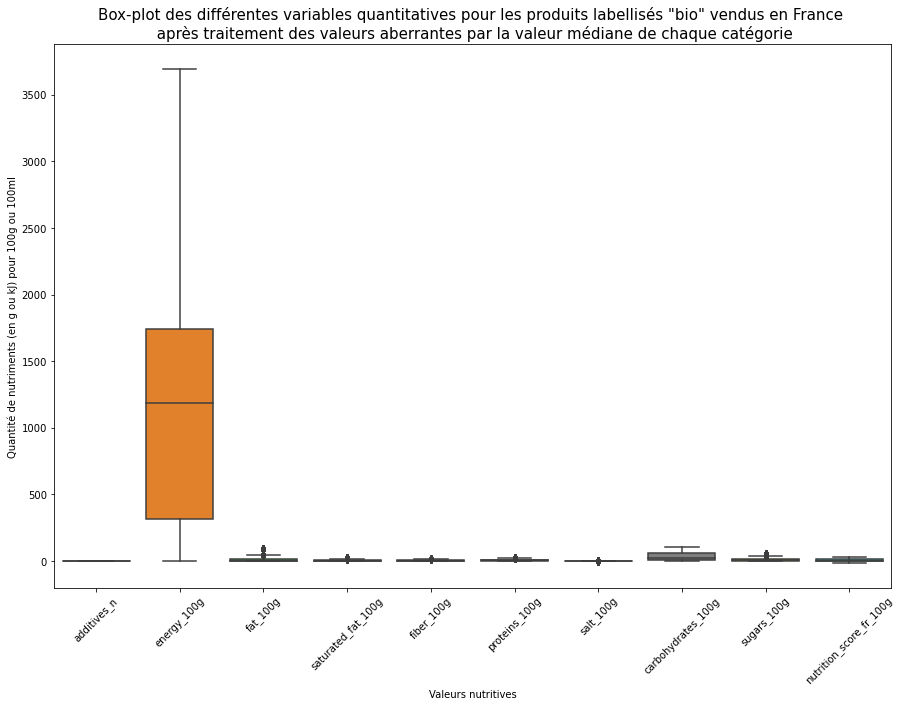

In [66]:
plt.figure(figsize = (15, 10))
sns.boxplot(data=data_bio_France_copy[liste_variables_quantitatives])

plt.xticks(rotation=45)

plt.xlabel('Valeurs nutritives')
plt.ylabel('Quantité de nutriments (en g ou kJ) pour 100g ou 100ml')

plt.title('Box-plot des différentes variables quantitatives pour les produits labellisés "bio" vendus en France \n après traitement des valeurs aberrantes par la valeur médiane de chaque catégorie', size = 15)

plt.show()

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


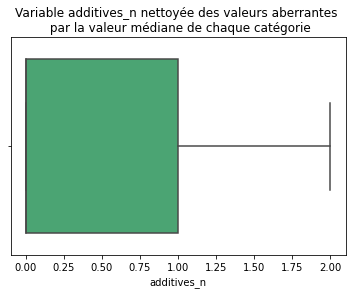

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


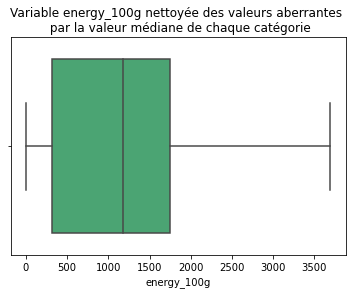

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


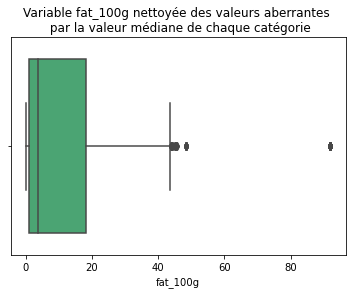

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


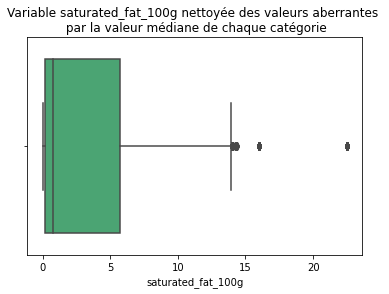

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


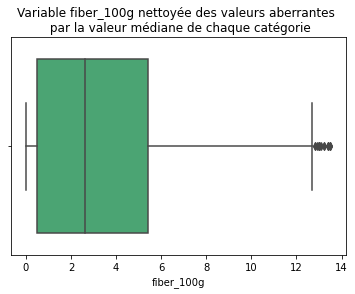

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


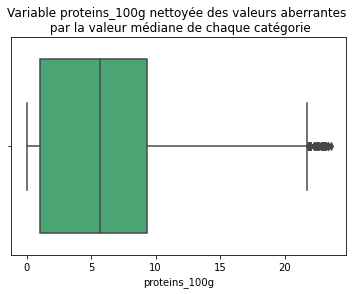

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


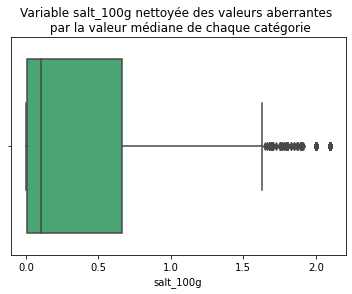

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


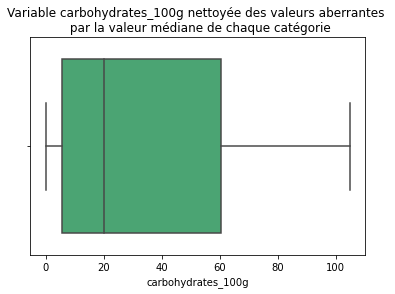

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


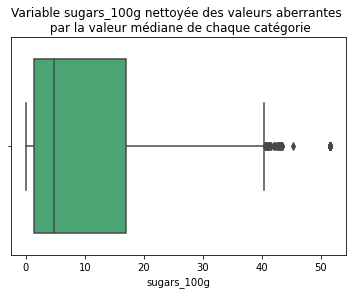

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


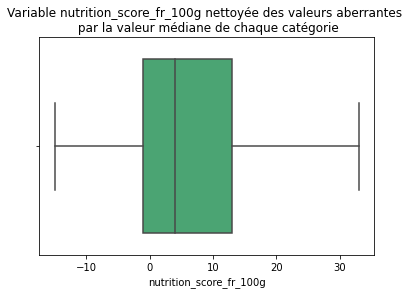

In [67]:
#Représentations graphiques (box-plots) pour chaque variable 
for variable in liste_variables_quantitatives:
    ax = sns.boxplot(data_bio_France_copy[variable], color = 'mediumseagreen')
    ax.set_title('Variable ' + variable + ' nettoyée des valeurs aberrantes \n par la valeur médiane de chaque catégorie')
    plt.show()

#### Maintenant que nous avons traité nos valeurs aberrantes, on va vérifier que certains produits ne dépassent pas 100g, qui pourrait être considéré comme aberrant. 

In [68]:
liste_variables = ['fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 
                   'sugars_100g']

for var in liste_variables:
    print('Pour la variable', var)
    aberr = data_bio_France_copy.loc[data_bio_France_copy[var] > 100, :]
    display(aberr)

Pour la variable fat_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable saturated_fat_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable fiber_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable proteins_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable salt_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable carbohydrates_100g


code last_modified_datetime   product_name quantity  \
239347  3560070740338    2017-03-10 11:23:31  Sirop d'agave   250 ml   

               brands pnns_groups_2  \
239347  Carrefour Bio        Sweets   

                                                   labels countries  \
239347  Bio,Bio européen,DE-ÖKO-001,AB Agriculture Bio...    France   

                                         ingredients_text  additives_n  ...  \
239347  Sirop d'agave concentré issu de l'agriculture ...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
239347      1785.0      NaN                 NaN         NaN            NaN   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
239347        NaN               105.0         51.6                      NaN   

        nutrition_grade_fr  
239347                 NaN  

[1 rows x 22 columns]

Pour la variable sugars_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

#### Pour ces produits dont les quantités de glucides sont > 100, correspondant ici à des sirops, en vérifiant l'information, cette valeur semble cohérente. 

#### On va maintenant vérifier qu'il n'y a pas d'autres valeurs aberrantes en observant que les carbohydrates > sugars.  

In [69]:
#Regardons les produits dont les glucides sont > aux sucres après traitement des données. 
data_bio_France_copy.loc[data_bio_France_copy['carbohydrates_100g'] < data_bio_France_copy['sugars_100g'], :]

code last_modified_datetime  \
245417  3596710308965    2017-04-16 12:36:48   
315863  8719153012854    2017-04-03 08:12:58   
249900  3700214610190    2017-04-02 15:03:40   
301877  8001505005844    2017-03-25 11:27:50   
224800  3324499990121    2017-02-17 09:47:42   
208321  3252920020072    2017-02-16 10:42:21   
229133  3370077584312    2017-02-11 19:03:38   
279598  5412971116072    2017-02-11 12:12:13   
222096  3278699005027    2017-02-08 20:16:24   
225720  3330720258137    2017-01-28 09:14:38   
251512  3760020508678    2017-01-24 18:18:17   
224797  3324499990077    2016-11-07 21:36:45   
250619  3700531201538    2016-10-06 14:58:45   
224802  3324499990183    2016-10-01 21:02:55   
203423  3245310065890    2016-08-05 08:42:02   
203426  3245310065968    2016-04-28 12:13:34   
225785  3330724201054    2016-04-11 21:18:25   
218450  3267110002707    2015-12-10 09:28:04   
212665  3257981665248    2015-04-19 20:41:00   

                                             product_name  quantity  \
245417                               Sauce tomate basilic      200g   
315863                                 Fruitbeleg Aardbei   420 g e   
249900                             Alter Eco Noir Dessert     200 g   
301877                               Fiordifrutta Citrons   260 g e   
224800                           Confiture Allégée Figue      350 g   
208321                       Les P'tits malins aux fruits  6 * 60 g   
229133                           Les Drôles de Cacahuètes     120 g   
279598                                      Pur Natur BIO      500g   
222096                            Yaourt à la vanille bio     125 g   
225720                    Framboise bio cuite au chaudron     320 g   
251512     Pâte à Tartiner Chocolat à La Noix De Coco Bio     350 g   
224797                           Confiture de Fraises bio     350 g   
250619                                Sucette au chocolat      20 g   
224802  Myrtilles Bio allégée en sucres - Préparée ave...    350 g.   
203423                                         Cerise Bio     210 g   
203426                                   Pêche Mangue Bio     210 g   
225785                   Confiture framboises sans pépins         1   
218450                     Pâte à tartiner Choko noisette     680 g   
212665         10 œufs de poules élevées en plein air Bio       10    

                                                   brands  \
245417                                             Auchan   
315863                                            BioWise   
249900                                          Alter eco   
301877                                   Rigoni di Asiago   
224800                  Les Comtes de Provence,AGRO'NOVAE   
208321                                    Grandeur nature   
229133                                   Saveurs & Nature   
279598                                          Pur natur   
222096                                               Malo   
225720                                   Lucien Georgelin   
251512                                         Jardin Bio   
224797                             Les Comtes de Provence   
250619                                         belledonne   
224802                             Les Comtes de Provence   
203423  Les petites parisiennes confiturières,Andresy ...   
203426  Les petites parisiennes confiturieres,Andresy ...   
225785        Les fruits Bio Destination Julien Georgelin   
218450                                        Perl'Amande   
212665        Nature bio,Cora,Match,Groupe Louis Delhaize   

               pnns_groups_2  \
245417  Dressings and sauces   
315863                Sweets   
249900    Chocolate products   
301877                Sweets   
224800                Sweets   
208321        Dairy desserts   
229133                Sweets   
279598       Milk and yogurt   
222096       Milk and yogurt   
225720                Sweets   
251512                Sweets   
224797                Sweets  

In [70]:
#On va faire les modifications nécessaires à la main
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3245310065890, 'sugars_100g'] = 47
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3245310065968, 'sugars_100g'] = 48
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3257981665248, 'carbohydrates_100g'] = 0.8
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3267110002707, 'sugars_100g'] = 43.4
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3278699005027, 'carbohydrates_100g'] = 15
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3324499990077, ['carbohydrates_100g', 'sugars_100g']] = 42
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3324499990121, ['carbohydrates_100g', 'sugars_100g']] = 42
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3330724201054, 'sugars_100g'] = 49
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3370077584312, 'sugars_100g'] = 46.6
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3596710308965, 'carbohydrates_100g'] = 4.9
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3700214610190, 'carbohydrates_100g'] = 54
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3700214610190, 'sugars_100g'] = 50
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3700531201538, 'carbohydrates_100g'] = 47
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3700531201538, 'sugars_100g'] = 46
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3760020508678, 'sugars_100g'] = 44.4
data_bio_France_copy.loc[data_bio_France_copy['code'] == 5412971116072, ['carbohydrates_100g', 'sugars_100g']] = 5.1
data_bio_France_copy.loc[data_bio_France_copy['code'] == 8001505005844, 'sugars_100g'] = 47
data_bio_France_copy.loc[data_bio_France_copy['code'] == 8719153012854, 'sugars_100g'] = 45
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3330720258137, 'sugars_100g'] = 44
data_bio_France_copy.loc[data_bio_France_copy['code'] == 3252920020072, 'carbohydrates_100g'] = 14.2

In [71]:
data_bio_France_copy.describe()

additives_n  energy_100g     fat_100g  saturated_fat_100g   fiber_100g  \
count  5574.000000  5330.000000  4829.000000         5057.000000  3976.000000   
mean      0.377646  1172.027887    12.723572            4.126493     3.472045   
std       0.669442   859.879618    19.695757            6.242226     3.293695   
min       0.000000     0.000000     0.000000            0.000000     0.000000   
25%       0.000000   317.000000     1.000000            0.200000     0.500000   
50%       0.000000  1183.000000     3.700000            0.800000     2.600000   
75%       1.000000  1744.750000    18.100000            5.700000     5.400000   
max       2.000000  3693.000000    92.000000           22.500000    13.500000   

       proteins_100g    salt_100g  carbohydrates_100g  sugars_100g  \
count    5299.000000  5054.000000         4822.000000  5078.000000   
mean        6.362304     0.401600           32.480162    11.503188   
std         5.684287     0.528105           28.460472    13.723408   
min         0.000000     0.000000            0.000000     0.000000   
25%         1.000000     0.010160            5.600000     1.400000   
50%         5.700000     0.101600           20.000000     4.800000   
75%         9.300000     0.660000           60.500000    17.000000   
max        23.600000     2.100000          105.000000    51.600000   

       nutrition_score_fr_100g  
count              4960.000000  
mean                  5.850202  
std                   9.123867  
min                 -15.000000  
25%                  -1.000000  
50%                   4.000000  
75%                  13.000000  
max                  33.000000

### Produits NON labellisés "bio" vendus en France

In [72]:
#On va sélectionner les mêmes variables et garder les produits NON "bio" vendus en France. 
data_non_bio = data[~(data['labels'].str.contains('Bio|Orga|AB', na=False)) &
                   ~(data['labels'].isnull())]
display(data_non_bio.head())

#On sélectionne les données que l'on souhaite (non label bio + France)
data_non_bio_France = data_non_bio.loc[data_non_bio['countries'].str.contains('France', na=False), :]

#On sélectionne nos variables
liste_variables = ['code', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'pnns_groups_2', 'labels', 
                   'countries', 'ingredients_text','additives_n', 'additives_tags', 'main_category_fr', 'energy_100g', 
                   'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 'sugars_100g', 
                   'nutrition-score-fr_100g', 'nutrition_grade_fr'] 
data_non_bio_France = data_non_bio_France.loc[:, liste_variables]
display(data_non_bio_France.head())
print(data_non_bio_France.shape)

code                                                url  \
184   7730009  http://world-fr.openfoodfacts.org/produit/0000...   
187   9336247  http://world-fr.openfoodfacts.org/produit/0000...   
192  12345878  http://world-fr.openfoodfacts.org/produit/0000...   
218  20424640  http://world-fr.openfoodfacts.org/produit/0000...   
239  84154071  http://world-fr.openfoodfacts.org/produit/0000...   

                        creator   created_t      created_datetime  \
184  openfoodfacts-contributors  1462806432  2016-05-09T15:07:12Z   
187                      tacite  1479029877  2016-11-13T09:37:57Z   
192                     tacinte  1461364956  2016-04-22T22:42:36Z   
218                   twoflower  1489527029  2017-03-14T21:30:29Z   
239                     javichu  1351359717  2012-10-27T17:41:57Z   

    last_modified_t last_modified_datetime                       product_name  \
184      1482359150   2016-12-21T22:25:50Z  Biscuits sablés fourrage au cacao   
187      1479030010   2016-11-13T09:40:10Z                                NaN   
192      1461409722   2016-04-23T11:08:42Z               เล็บมือนาง (ตีนไก่ )   
218      1489527442   2017-03-14T21:37:22Z                 Belgische Pralinen   
239      1440779523   2015-08-28T16:32:03Z                   Salsa de mostaza   

                                    generic_name      quantity  ... ph_100g  \
184  Biscuits sablés déclassés fourrage au cacao          1 kg  ...     NaN   
187               Bonbons acidulés Raisin Fraise        46,7 g  ...     NaN   
192                                 chicken feet         500 g  ...     NaN   
218                             Pralinenmischung         250 g  ...     NaN   
239                             Salsa de mostaza  300 g (neto)  ...     NaN   

    fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
184                         NaN                              NaN        NaN   
187                         NaN                              NaN        NaN   
192                         NaN                              NaN        NaN   
218                         NaN                              NaN        NaN   
239                         NaN                              NaN        NaN   

    chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g  \
184             NaN                   NaN                     NaN   
187             NaN                   NaN                     NaN   
192             NaN                   NaN                     NaN   
218             NaN                   NaN                    26.0   
239             NaN                   NaN                     NaN   

    nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
184                     NaN                 NaN                 NaN  
187                     NaN                 NaN                 NaN  
192                     NaN                 NaN                 NaN  
218                    26.0                 NaN                 NaN  
239                     NaN                 NaN                 NaN  

[5 rows x 162 columns]

code last_modified_datetime                       product_name  \
184  7730009   2016-12-21T22:25:50Z  Biscuits sablés fourrage au cacao   
187  9336247   2016-11-13T09:40:10Z                                NaN   
279       30   2016-12-15T22:24:04Z                      Cakes Raisins   
283       31   2016-08-18T20:16:30Z                   Cakes aux Fruits   
299       50   2016-11-30T21:40:21Z             Financiers aux Amandes   

                   quantity     brands       pnns_groups_2  \
184                    1 kg  St Michel  Biscuits and cakes   
187                  46,7 g        NaN              Sweets   
279                   900 g      Bijou  Biscuits and cakes   
283                   600 g      Bijou  Biscuits and cakes   
299  660 g (30 pâtisseries)      Bijou  Biscuits and cakes   

                                       labels countries  \
184                                Point Vert    France   
187  Sans arômes artificiels,Contient des OGM    France   
279             Fabriqué en France,Point Vert    France   
283             Point Vert,Fabriqué en France    France   
299             Point Vert,Fabriqué en France    France   

                                      ingredients_text  additives_n  ...  \
184  Sucre, farine de _Blé_, graisse et huiles végé...          3.0  ...   
187                                                NaN          NaN  ...   
279  Farine de _blé_, _œufs_ frais, huile de colza,...          5.0  ...   
283  Fruits 37.4% [fruits confits 21,5% [fruits (pa...         11.0  ...   
299  Sucre, blanc d’_œufs_ frais, poudre d’_amande_...          3.0  ...   

    energy_100g fat_100g  saturated-fat_100g  fiber_100g  proteins_100g  \
184         NaN      NaN                 NaN         NaN            NaN   
187         NaN      NaN                 NaN         NaN            NaN   
279      1768.0     19.0                 2.5         1.8            5.8   
283      1670.0     15.0                 2.0         1.5            4.9   
299      1868.0     23.0                10.0         1.7            8.0   

     salt_100g  carbohydrates_100g  sugars_100g  nutrition-score-fr_100g  \
184        NaN                 NaN          NaN                      NaN   
187        NaN                 NaN          NaN                      NaN   
279       0.65                56.0         28.0                     13.0   
283       0.60                60.0         34.0                     12.0   
299       0.55                51.0         39.0                     22.0   

     nutrition_grade_fr  
184                 NaN  
187                 NaN  
279                   d  
283                   d  
299                   e  

[5 rows x 22 columns]

(23940, 22)


23940 produits non labellisés "bio" vendus en France


17

[0, 20[     14
[20, 40[     6
[40, 60[     2
Name: Intervalle_poucentage_val_nul, dtype: int64


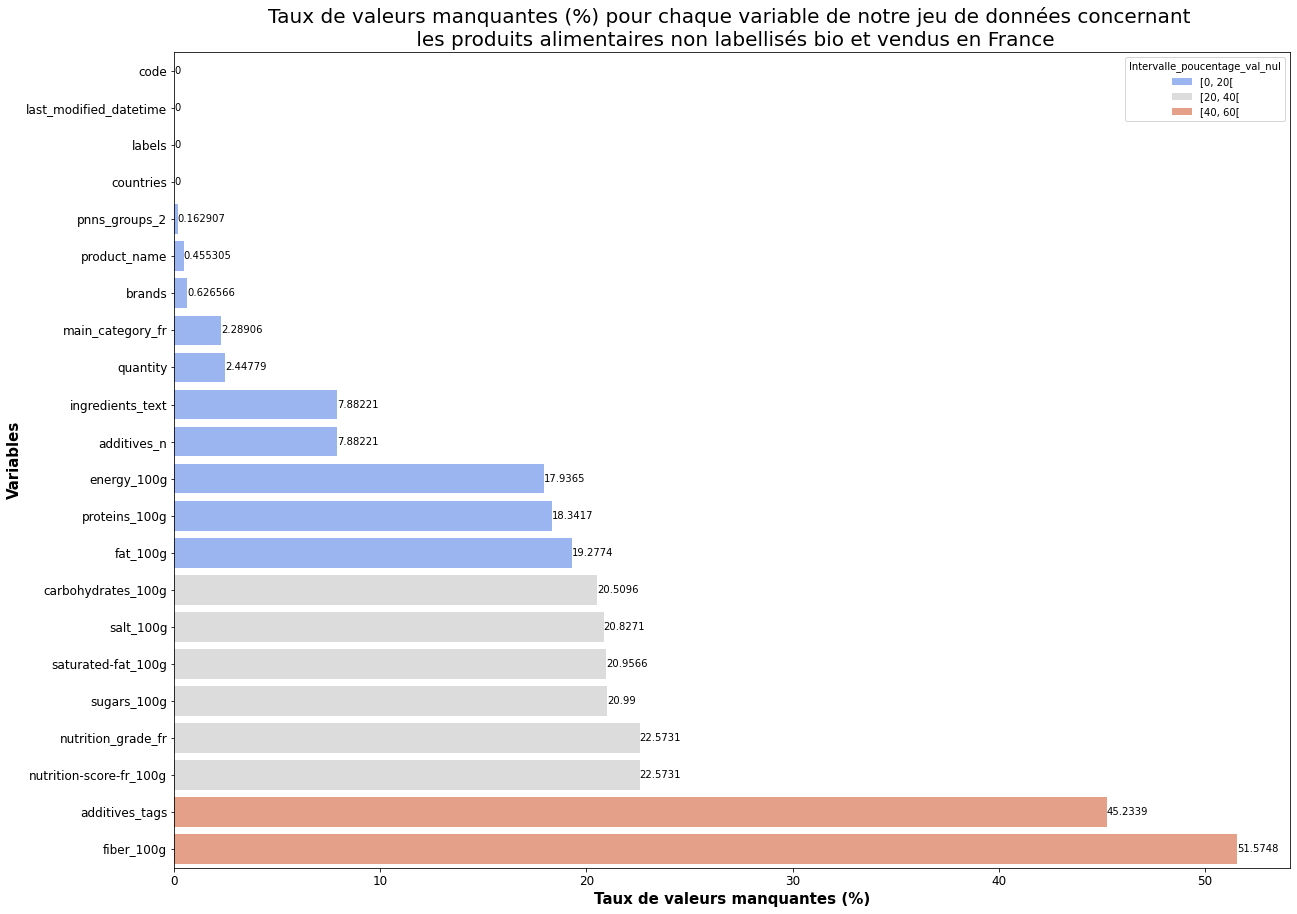

In [73]:
#On calcule à nouveau le taux de remplissage pour notre nouveau df
total_lignes_non_bio = data_non_bio_France.shape[0]
print(total_lignes_non_bio, 'produits non labellisés "bio" vendus en France')
val_nul_non_bio = data_non_bio_France.isnull().sum()

val_nul_non_bio = val_nul_non_bio.sort_values(ascending=True)*100/total_lignes_non_bio
taux_val_nul_non_bio = pd.DataFrame(val_nul_non_bio).rename(columns = {0:'Pourcentage_valeurs_nulles'})
taux_val_nul_non_bio = taux_val_nul_non_bio.reset_index()
taux_val_nul_unique_non_bio = taux_val_nul_non_bio['Pourcentage_valeurs_nulles'].unique() #On affiche le nombre de données uniques en %
display(len(taux_val_nul_unique_non_bio)) #On compte combien de valeurs uniques on a. 


#On effectue notre groupement de valeurs
cut_points = [20, 40]
labels = ['[0, 20[', '[20, 40[', '[40, 60[']
taux_val_nul_non_bio['Intervalle_poucentage_val_nul'] = binning(taux_val_nul_non_bio['Pourcentage_valeurs_nulles'], cut_points, labels)
print(pd.value_counts(taux_val_nul_non_bio['Intervalle_poucentage_val_nul'], sort=False))

#On affiche le graphique
plt.figure(figsize=(20,15))

ax = sns.barplot(data = taux_val_nul_non_bio, x="Pourcentage_valeurs_nulles", y="index",  hue = 'Intervalle_poucentage_val_nul', 
                 palette = 'coolwarm', ci=None, dodge = False)

plt.xlabel('Taux de valeurs manquantes (%)', size = 15, fontweight='bold')
plt.ylabel('Variables', size = 15, fontweight='bold')
plt.title('Taux de valeurs manquantes (%) pour chaque variable de notre jeu de données concernant \n les produits alimentaires non labellisés bio et vendus en France', size = 20)

plt.yticks(size=12)
plt.xticks(size=12)


for i in ax.containers:
    ax.bar_label(i,)
    
    
plt.savefig('Projet3_Taux valeurs manquantes bio France.png')

plt.show()

index  Intervalle_poucentage_val_nul
0   [0, 20[                             14
1  [20, 40[                              6
2  [40, 60[                              2

Text(0.5, 1.0, 'Variables ayant un certain taux de valeurs manquantes (en %) \n pour les produits non labellisés "bio" et vendus en France')

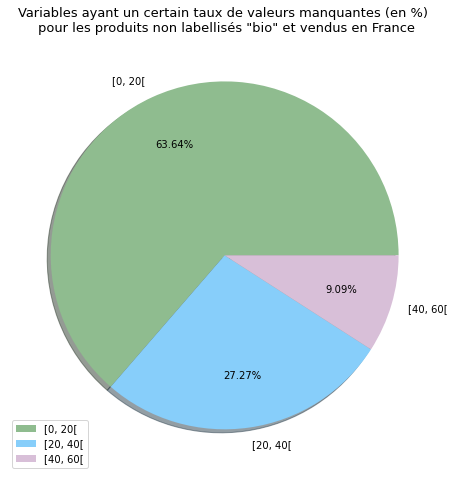

In [74]:
#On crée un df contenant le nombre de valeurs contenues dans chaque intervalle de classe. 
taux_val_nul_non_bio_count = pd.value_counts(taux_val_nul_non_bio['Intervalle_poucentage_val_nul'], sort=False)
taux_val_nul_non_bio_count = pd.DataFrame(taux_val_nul_non_bio_count.reset_index())
display(taux_val_nul_non_bio_count)

# On trace le camembert correspondant
plt.figure(figsize = (8,8))
plt.pie(x = taux_val_nul_non_bio_count['Intervalle_poucentage_val_nul'], labels = taux_val_nul_non_bio_count['index'], 
        colors = ['darkseagreen', 'lightskyblue', 'thistle', 'moccasin'], 
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, shadow = True, normalize=True)
plt.legend()
plt.title('Variables ayant un certain taux de valeurs manquantes (en %) \n pour les produits non labellisés "bio" et vendus en France', size = '13')

In [75]:
#On va transformer le nom de certaines colonnes
data_non_bio_France = data_non_bio_France.rename(columns = {'saturated-fat_100g' : 'saturated_fat_100g', 
                                                            'nutrition-score-fr_100g' : 'nutrition_score_fr_100g'})

## Corrélations entre les variables

<Figure size 1080x720 with 0 Axes>

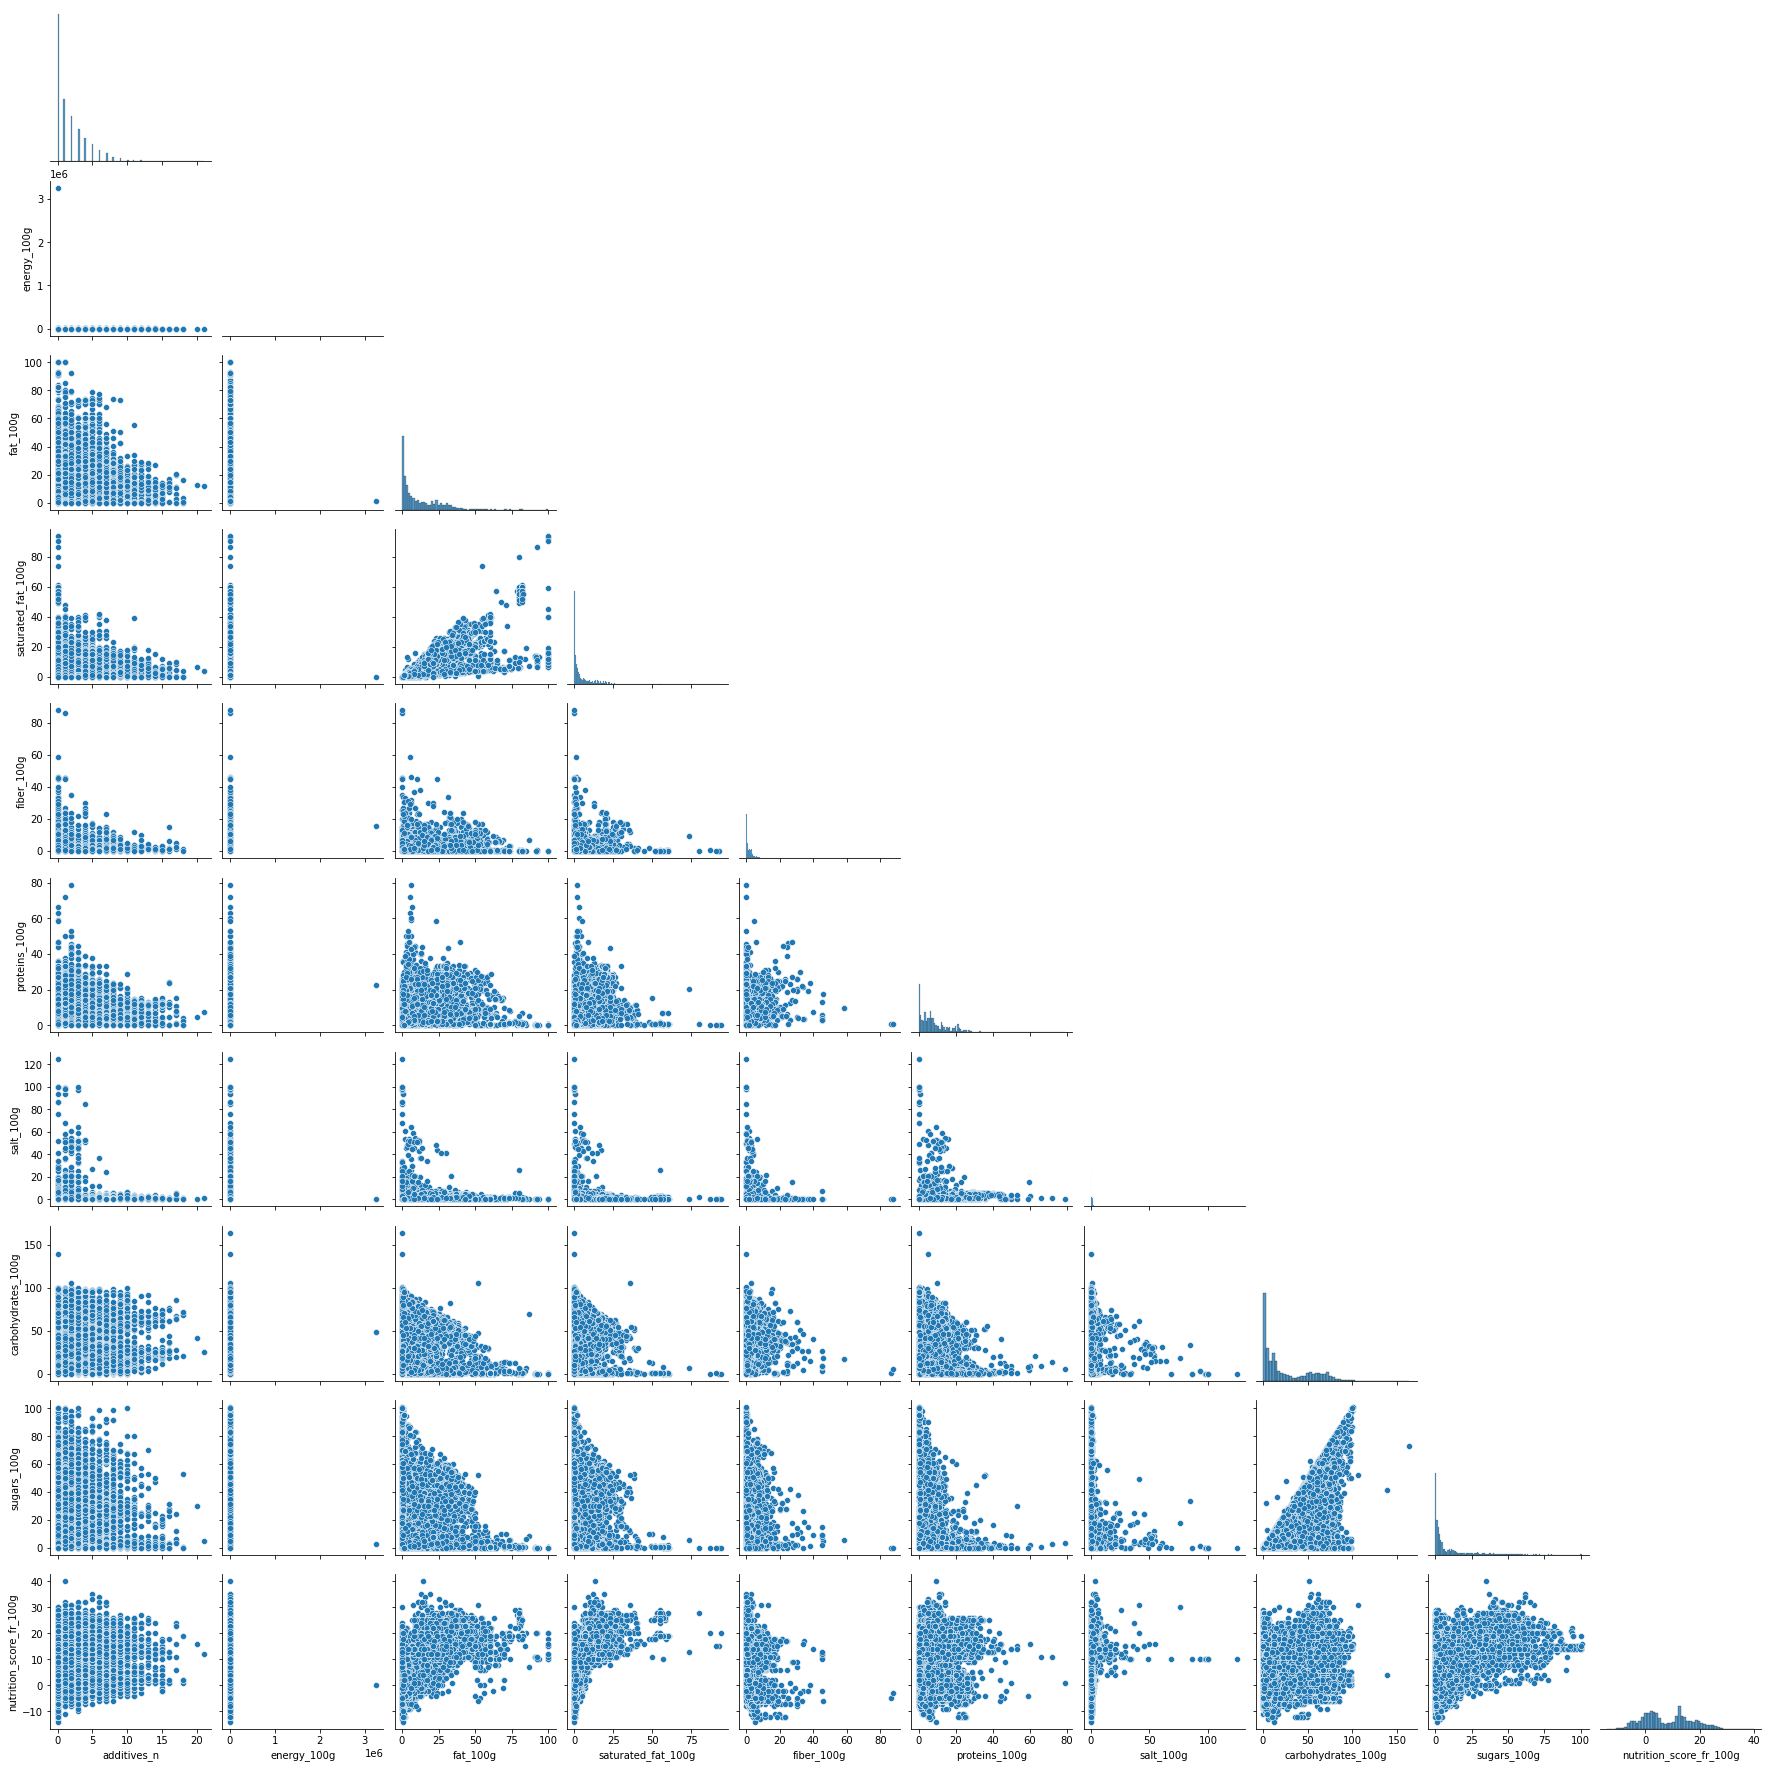

In [76]:
#On va effectuer un graphe traçant les relations par paires dans notre jeu de données
liste_variables_quantitatives = ['additives_n','energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 
                                 'salt_100g', 'carbohydrates_100g', 'sugars_100g', 'nutrition_score_fr_100g']

plt.figure(figsize = (15, 10))
sns.pairplot(data_non_bio_France[liste_variables_quantitatives], corner = True)

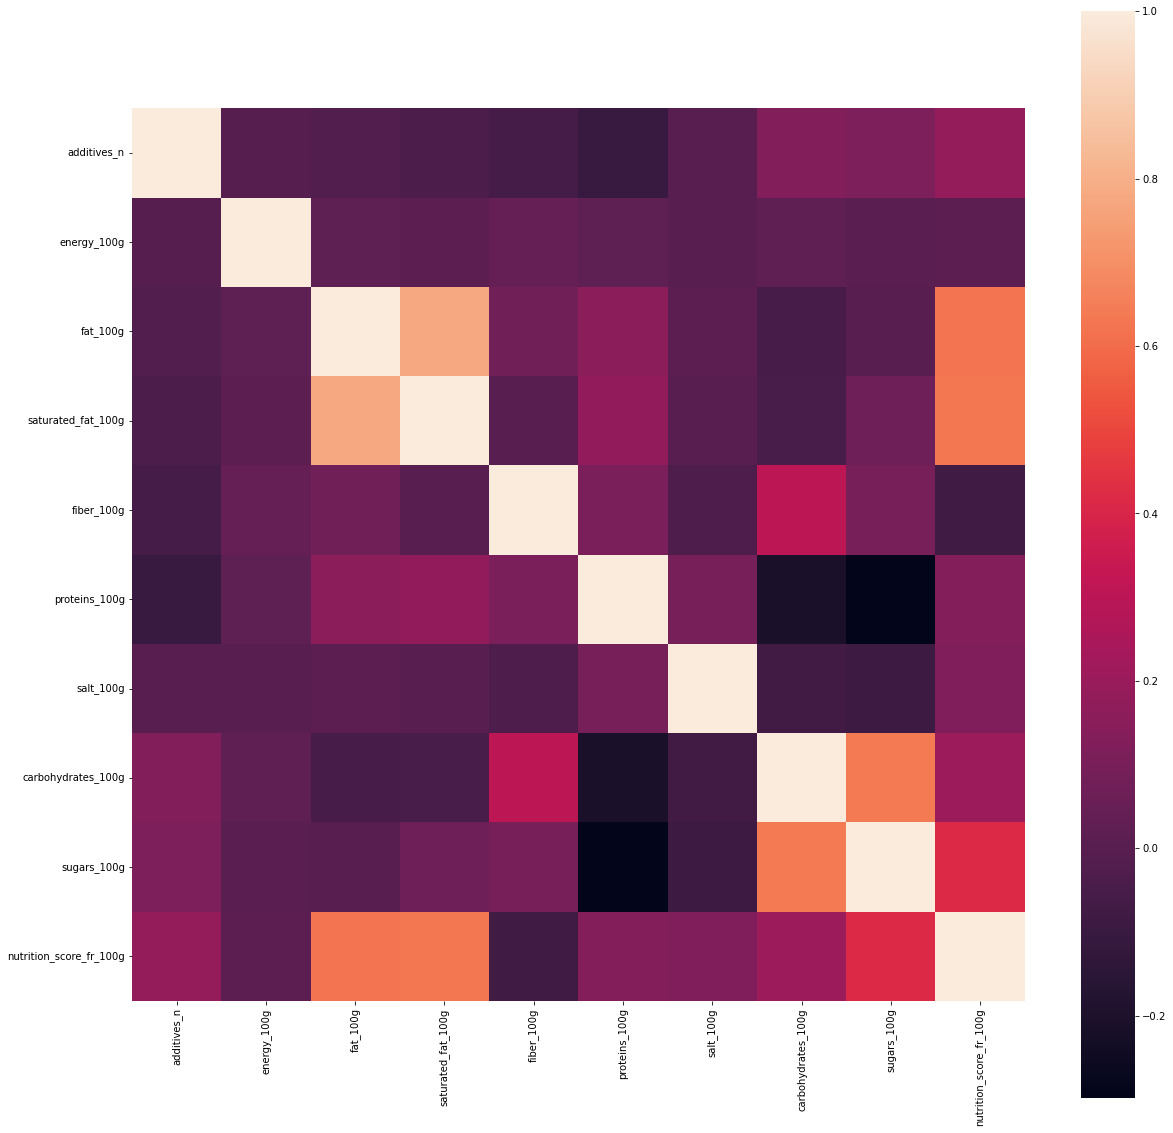

In [77]:
#Regardons la corrélation de nos variables quantitatives par une heatmap
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data_non_bio_France[liste_variables_quantitatives].corr(),annot = False,square=True);

## Identification et traitement des doublons

In [78]:
data_non_bio_France[data_non_bio_France.duplicated(['product_name', 'brands'])] #En sélectionnant les lignes en doublons

code last_modified_datetime  \
19575     22314010100   2016-09-20T01:28:52Z   
112685  0201227008798   2016-03-22T06:50:16Z   
114306  0276565054318   2016-11-21T13:33:53Z   
114445  0292430051107   2016-08-31T16:10:55Z   
177730       20078777   2015-11-13T16:50:43Z   
...               ...                    ...   
317264  8858135000974   2015-03-15T22:38:49Z   
318382  9046111537807   2015-09-20T06:38:58Z   
318507  9107230000020   2015-05-14T22:12:48Z   
318619  9213220082188   2015-06-02T17:50:45Z   
320589  9556041608251   2016-02-25T13:54:27Z   

                                   product_name           quantity  \
19575             Crème de marrons de l'Ardèche              100 g   
112685                  Côtes filet avec os x 1           0,212 kg   
114306                       2 Cuisses de Lapin              556 g   
114445                        2 Pavés Grand Cru              280 g   
177730                         Lait demi-écrémé                1 L   
...                                         ...                ...   
317264                             Lait de coco            1000 ml   
318382                Mouliné de légumes variés                NaN   
318507                             Chips Nature               45 g   
318619  Fruits mixés (Framboise Passion) 4 Pots  400 g (4 x 100 g)   
320589                             Lait de Coco             200 ml   

                                brands          pnns_groups_2  \
19575                  Clément Faugier                unknown   
112685                         Leclerc                   Meat   
114306               Le Père Guillaume                   Meat   
114445                          Charal                   Meat   
177730  Milbona,Lidl Stiftung & Co. KG        Milk and yogurt   
...                                ...                    ...   
317264                       Real Thai  Non-sugared beverages   
318382                           Knorr                  Soups   
318507                           Lay's             Appetizers   
318619                         Sojasun        Milk and yogurt   
320589                            Ayam  Non-sugared beverages   

                                                   labels        countries  \
19575                                  Fabriqué en France           France   
112685  Viande Française,Porc Français,Viande Porcine ...           France   
114306  Viande Française,Point Vert,Fabriqué en France...           France   
114445  Point Vert,Viande Bovine Française,Conservatio...           France   
177730  FSC,FSC-C014047,FSC Mix,Point Vert,Collecté en...           France   
...                                                   ...              ...   
317264    Halal,The Central Islamic Committee of Thailand           France   
318382  Sans conservateur,sans exhausteur de goût,sans...           France   
318507             Sans exhausteur de goût,Sans glutamate  Belgique,France   
318619  Sans gluten,Sans OGM,Filière Garantie Soja Fra...           France   
320589                      Halal,saveurs de l'année 2015           France   

                                         ingredients_text  additives_n  ...  \
19575   châtaignes (50%), sucre, marrons glacés, sirop...          0.0  ...   
112685                                Porc origine France          0.0  ...   
114306                   Cuisses de lapin origine France.          0.0  ...   
114445              100% viande de bœuf de race Limousine          0.0  ...   
177730                    Lait demi-écrémé stérilisé UHT.          0.0  ...   
...                                                   ...          ...  ...   
317264  Extrait de noix de coco 85 %, eau, émulsifiant...          1.0  ...   
318382                                                NaN          NaN  ...   
318507    Pommes de terres, huile de tournesol 34 %, sel.          0.0  ...   
318619  Jus de soja 78 % (eau, graines de _soja_* 9 %)...          3.0  ...   
320589  extr

#### Des doublons sont observés dans notre df. Parmis les doublons, on va garder les produits les plus récemment modifiés.

In [79]:
#On convertit nos dates en datetime
data_non_bio_France['last_modified_datetime'] = pd.to_datetime(data_non_bio_France['last_modified_datetime']).dt.tz_localize(None)
data_non_bio_France.dtypes #On vérifie que la conversion a bien été faite. 

code                               object
last_modified_datetime     datetime64[ns]
product_name                       object
quantity                           object
brands                             object
pnns_groups_2                      object
labels                             object
countries                          object
ingredients_text                   object
additives_n                       float64
additives_tags                     object
main_category_fr                   object
energy_100g                       float64
fat_100g                          float64
saturated_fat_100g                float64
fiber_100g                        float64
proteins_100g                     float64
salt_100g                         float64
carbohydrates_100g                float64
sugars_100g                       float64
nutrition_score_fr_100g           float64
nutrition_grade_fr                 object
dtype: object

In [80]:
#On trie nos données dans l'ordre chronologique (du plus récent au plus ancien)
data_non_bio_France = data_non_bio_France.sort_values(by = 'last_modified_datetime', ascending = False)

#On supprime les doublons en gardant les plus récents
data_non_bio_France = data_non_bio_France.drop_duplicates(subset = ['product_name', 'brands'], keep = 'first')

In [81]:
#On vérifie qu'il n'y a plus de doublons
data_non_bio_France[data_non_bio_France.duplicated(['product_name', 'brands'])] 

Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

## Identification et traitement des valeurs aberrantes

In [82]:
#On fait un describe de nos données non labellisées "bio" vendues en France
data_non_bio_France.describe()

additives_n   energy_100g      fat_100g  saturated_fat_100g  \
count  21410.000000  1.905200e+04  18738.000000        18348.000000   
mean       1.952872  1.192087e+03     12.801580            5.264687   
std        2.553820  2.355946e+04     15.354542            7.792054   
min        0.000000  0.000000e+00      0.000000            0.000000   
25%        0.000000  4.177500e+02      1.600000            0.400000   
50%        1.000000  8.980000e+02      6.900000            2.000000   
75%        3.000000  1.536000e+03     21.000000            7.100000   
max       21.000000  3.251373e+06    100.000000           93.800000   

         fiber_100g  proteins_100g     salt_100g  carbohydrates_100g  \
count  11253.000000   18956.000000  18378.000000        18450.000000   
mean       2.350222       8.443569      1.221522           23.713112   
std        3.493309       7.734035      4.352118           26.062439   
min        0.000000       0.000000      0.000000            0.000000   
25%        0.400000       2.400000      0.100000            2.600000   
50%        1.500000       6.400000      0.711200           11.900000   
75%        3.000000      12.500000      1.390000           46.175000   
max       87.500000      79.000000    125.000000          164.000000   

        sugars_100g  nutrition_score_fr_100g  
count  18339.000000             17974.000000  
mean      10.689483                 8.093468  
std       16.701740                 8.795193  
min        0.000000               -14.000000  
25%        0.800000                 1.000000  
50%        3.000000                 7.000000  
75%       12.200000                15.000000  
max      100.800000                40.000000

In [83]:
#On va calculer la moyenne, écart-type et médiane de chacune de nos variables
for variable in liste_variables_quantitatives:
    moyenne_variable = round(data_non_bio_France[variable].mean(), 2) #Calcul de la moyenne 
    ecartype_variable = round(data_non_bio_France[variable].std(), 2) #Calcul de l'écart-type
    mediane_variable = round(data_non_bio_France[variable].median(), 2) #Calcul de la médiane
    print('VARIABLE', variable)
    print('La moyenne pour la variable', variable, 'est de', moyenne_variable)
    print('L\'écart-type pour la variable', variable, 'est de', ecartype_variable)
    print('La médiane pour la variable', variable, 'est de', mediane_variable)
    print('______________________________________________________________')

VARIABLE additives_n
La moyenne pour la variable additives_n est de 1.95
L'écart-type pour la variable additives_n est de 2.55
La médiane pour la variable additives_n est de 1.0
______________________________________________________________
VARIABLE energy_100g
La moyenne pour la variable energy_100g est de 1192.09
L'écart-type pour la variable energy_100g est de 23559.46
La médiane pour la variable energy_100g est de 898.0
______________________________________________________________
VARIABLE fat_100g
La moyenne pour la variable fat_100g est de 12.8
L'écart-type pour la variable fat_100g est de 15.35
La médiane pour la variable fat_100g est de 6.9
______________________________________________________________
VARIABLE saturated_fat_100g
La moyenne pour la variable saturated_fat_100g est de 5.26
L'écart-type pour la variable saturated_fat_100g est de 7.79
La médiane pour la variable saturated_fat_100g est de 2.0
______________________________________________________________
VARIABLE f

### On va faire un nettoyage en gardant uniquement les produits alimentaires (des produits non alimentaires sont présents). 

In [84]:
#On affiche les produits non alimentaires labellisés "bio" et vendus en France. 
data_non_alim = data_non_bio_France[data_non_bio_France['main_category_fr'].str.contains('Non alimentaire', na=False)]
display(data_non_alim)

#On supprime ce produit de notre liste 
data_non_bio_France = data_non_bio_France.drop(data_non_bio_France[data_non_bio_France['main_category_fr'].str.contains('Non alimentaire', na=False)].index)

code last_modified_datetime  product_name quantity   brands  \
247712  3600550159189    2017-04-15 17:49:47  Hibiscus bio    50 ml  Ushuaïa   

       pnns_groups_2                                             labels  \
247712       unknown  en:organic, en:eu-organic, fr:ab-agriculture-b...   

       countries                                   ingredients_text  \
247712    France  certifié Déodorant Efficacité 24H ge eeŒ age »...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
247712          0.0  ...         0.0      0.0                 0.0         0.0   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
247712            0.0        0.0                 0.0          0.0   

        nutrition_score_fr_100g  nutrition_grade_fr  
247712                      0.0                   b  

[1 rows x 22 columns]

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


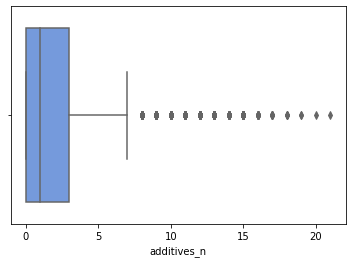

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


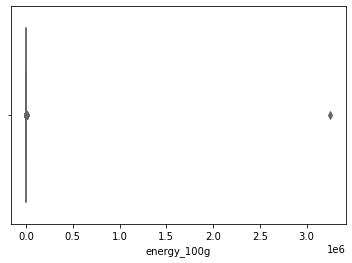

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


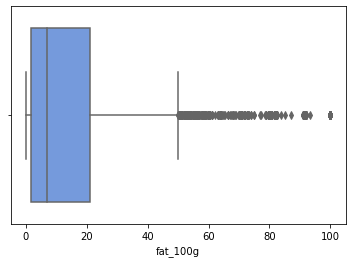

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


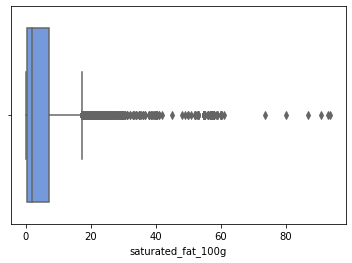

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


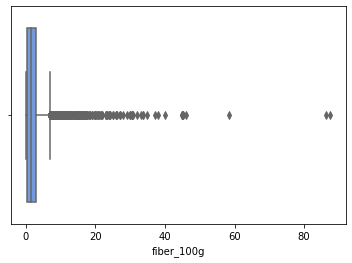

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


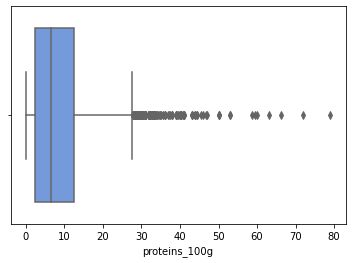

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


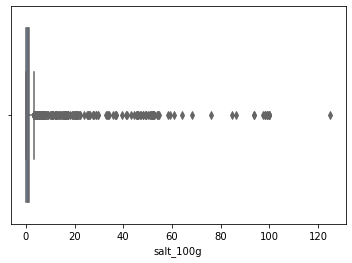

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


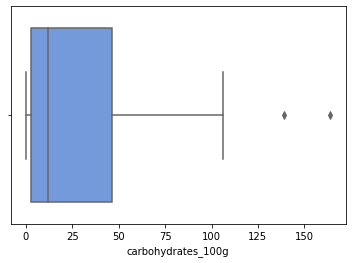

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


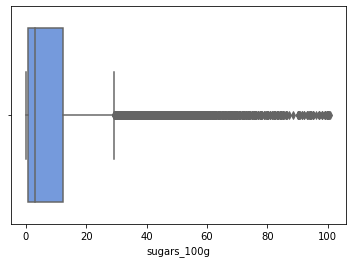

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


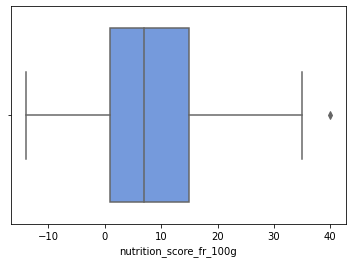

In [85]:
#Regardons maintenant les valeurs aberrantes
#Représentations graphiques (box-plot)
for variable in liste_variables_quantitatives:
    sns.boxplot(data_non_bio_France[variable], color = 'cornflowerblue')
#     plt.title(variable)
    plt.show()

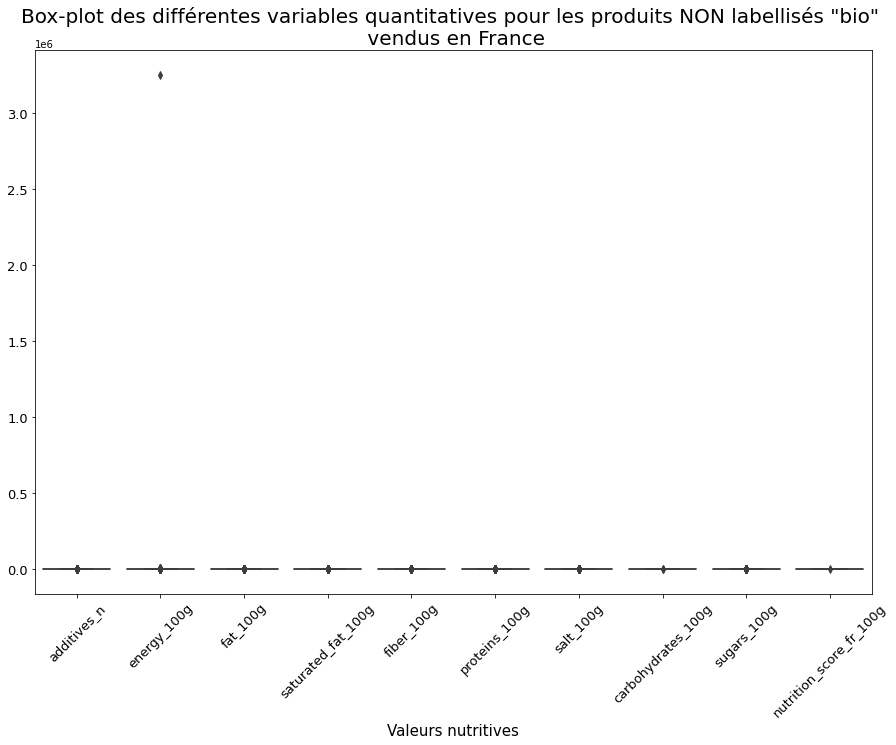

In [86]:
#On va effectuer un boxplot pour toutes les variables quantitatives qui nous intéressent
plt.figure(figsize = (15, 10))
sns.boxplot(data=data_non_bio_France[liste_variables_quantitatives])

plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)

plt.xlabel('Valeurs nutritives', size = 15)
plt.title('Box-plot des différentes variables quantitatives pour les produits NON labellisés "bio" \n vendus en France', size = 20)

plt.show()

In [87]:
#On va afficher les valeurs aberrantes pour chaque variable sélectionnée 
for variable in liste_variables_quantitatives:
    variable_non_bio = affiche_outliers(data_non_bio_France, variable)
    display(variable_non_bio.head())
    display(variable_non_bio.shape)
    print('Pour la variable', '"',variable,'"', variable_non_bio.shape[0], 'produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.')

code last_modified_datetime  \
203355  3243610098136    2017-04-20 07:28:17   
292888  7613035512979    2017-04-19 14:51:26   
280711  5600277665091    2017-04-19 11:23:27   
179511       20375393    2017-04-19 08:07:14   
244822  3596690310040    2017-04-19 08:05:58   

                                    product_name             quantity  \
203355                  Moelleux Cœur de Caramel    300 g (10 * 30 g)   
292888                     Tendre Croc' Campagne    210 g (2 * 105 g)   
280711         Dessert Gélifié Goût Pêche-Mangue  400 g e (4 * 100 g)   
179511                Tagliatelle à la Carbonara                300 g   
244822  Escalope Cordon Bleu de Dinde 100% filet                200 g   

                                      brands       pnns_groups_2  \
203355                               Le Ster  Biscuits and cakes   
292888                    Herta,Tendre Croc'            Sandwich   
280711                                 Reina              Sweets   
179511  Toque du Chef,Lidl Stiftung & Co. KG             Cereals   
244822                             Père Dodu      One-dish meals   

                                             labels countries  \
203355                Point Vert,Sans conservateurs    France   
292888                    Point Vert,Herta s'engage    France   
280711   Sans gluten,Point Vert,Sans matière grasse    France   
179511                    Point Vert,Eco-Emballages    France   
244822  Sans exhausteur de goût,Sans huile de palme    France   

                                         ingredients_text  additives_n  ...  \
203355  Gâteau 75% : farine de _blé_, _œufs_ frais 16,...          9.0  ...   
292888  Farine de _blé_, jambon de porc, eau, _fromage...         13.0  ...   
280711  Eau, sucre, dextrose, stabilisants (E407, E410...          8.0  ...   
179511  Tagliatelle 46,6 % (eau, semoule de _blé_ dur,...          8.0  ...   
244822  Préparation à base de filet de dinde traité en...          9.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
203355      1690.0     20.0                 4.1         0.0            4.3   
292888      1122.0     11.6                 5.5         2.4           12.0   
280711       322.0      0.0                 0.0         0.0            0.0   
179511       724.0      8.2                 3.5         0.9            6.8   
244822       800.0      8.0                 2.0         NaN           14.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
203355    0.97000                55.0         27.0                     18.0   
292888    1.60000                28.0          2.3                     11.0   
280711    0.15000                19.0         18.0                      3.0   
179511    0.86700                17.5          3.3                      3.0   
244822    1.50114                15.0          3.0                      4.0   

        nutrition_grade_fr  
203355                   d  
292888                   d  
280711                   c  
179511                   c  
244822                   c  

[5 rows x 22 columns]

(895, 22)

Pour la variable " additives_n " 895 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
217504  3265472120008    2017-04-20 14:18:55   
178787       20233679    2017-04-20 07:42:28   
280238  5425600102483    2017-04-18 08:21:18   
283446  6191509900664    2017-04-15 19:39:10   
223301  3291960000156    2017-04-14 17:33:02   

                                             product_name quantity  \
217504  Fruité noir Edition limitée - Huile d'olive do...    50 cl   
178787                                 Halva with Almonds  250 g e   
280238                            Huile de coco - Bee&Cee   500 ml   
283446              Huile d'olive de tunisie vierge extra      1 l   
223301                   Huile vierge biologique de colza      1 L   

                  brands pnns_groups_2  \
217504             Puget          Fats   
178787    Eridanous,Lidl        Sweets   
280238  Bumble bee foods          Fats   
283446     Terra delyssa          Fats   
223301        Emile noel          Fats   

                                                   labels countries  \
217504                                         Point Vert    France   
178787                                         Point Vert    France   
280238  en:gluten-free, en:organic, en:eu-organic, fr:...    France   
283446      fr:Première pression à froid, fr:Vierge Extra    France   
223301  en:organic, en:eu-organic, fr:ab-agriculture-b...    France   

                                         ingredients_text  additives_n  ...  \
217504                                                NaN          NaN  ...   
178787  50% graines de sésame moulues (Origine: Soudan...          0.0  ...   
280238  Refined coconut oil. Kokosnootolie, geraffinee...          0.0  ...   
283446  Huilo d'olivo Vierge Extra, de catégorie supér...          0.0  ...   
223301                                     Huile de colza          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
217504      3700.0    100.0                 NaN         NaN            0.0   
178787      9983.0     36.8                 7.8         NaN           12.9   
280238      3766.0    100.0                91.0         0.0            0.0   
283446      3448.0    100.0                19.1         NaN            0.0   
223301      3766.0    100.0                 8.0         0.0            0.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
217504        NaN                 0.0          NaN                      NaN   
178787        0.0                44.2         32.0                     24.0   
280238        0.0                 1.0          0.0                     15.0   
283446        0.0                 0.0          0.0                     12.0   
223301        0.0                 0.0          0.0                     10.0   

        nutrition_grade_fr  
217504                 NaN  
178787                   e  
280238                   d  
283446                   d  
223301                   c  

[5 rows x 22 columns]

(93, 22)

Pour la variable " energy_100g " 93 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
217504  3265472120008    2017-04-20 14:18:55   
218438  3267110001229    2017-04-20 11:47:08   
250742  3700663000382    2017-04-20 10:42:56   
236078  3503810000323    2017-04-19 13:12:54   
280238  5425600102483    2017-04-18 08:21:18   

                                             product_name quantity  \
217504  Fruité noir Edition limitée - Huile d'olive do...    50 cl   
218438  Epicerie / Fruits Secs Et Purées / Purées De F...      NaN   
250742  Epicerie / Condiments, Aides Culinaires / Vina...      NaN   
236078                                           noix Bio    500 g   
280238                            Huile de coco - Bee&Cee   500 ml   

                  brands pnns_groups_2  \
217504             Puget          Fats   
218438        Perlamande          Fats   
250742    Quintesens bio          Fats   
236078          ALP'NOIX          Nuts   
280238  Bumble bee foods          Fats   

                                                   labels countries  \
217504                                         Point Vert    France   
218438                                         en:organic    France   
250742                                         en:organic    France   
236078                                      AOP,FR-BIO-01    France   
280238  en:gluten-free, en:organic, en:eu-organic, fr:...    France   

                                         ingredients_text  additives_n  ...  \
217504                                                NaN          NaN  ...   
218438  N *Issues de l'agriculture de sésame - Sans la...          1.0  ...   
250742  huile de colza* huile d'oWevierge extra* (2h26...          0.0  ...   
236078                                         NOIX SECHE          0.0  ...   
280238  Refined coconut oil. Kokosnootolie, geraffinee...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
217504      3700.0    100.0                 NaN         NaN            0.0   
218438      2770.0     62.0                 4.2         9.3           15.7   
250742      2050.0     51.0                 5.2         0.9            0.6   
236078      2870.0     66.3                 6.1         6.2           15.3   
280238      3766.0    100.0                91.0         0.0            0.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
217504        NaN                 0.0          NaN                      NaN   
218438      0.025                 5.7          4.3                     -2.0   
250742      1.200                 6.2          1.8                     11.0   
236078      0.010                 6.3          4.6                     10.0   
280238      0.000                 1.0          0.0                     15.0   

        nutrition_grade_fr  
217504                 NaN  
218438                   a  
250742                   d  
236078                   c  
280238                   d  

[5 rows x 22 columns]

(524, 22)

Pour la variable " fat_100g " 524 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
252539  3760074470433    2017-04-20 17:50:10   
298182  7622210036995    2017-04-20 16:21:35   
191894  3067163615196    2017-04-20 11:30:24   
251752  3760029243006    2017-04-19 19:22:48   
251753  3760029244003    2017-04-19 19:17:26   

                                          product_name          quantity  \
252539                                   Noix de cajou               NaN   
298182                                       Toblerone              60 g   
191894             Bloc de foie gras de canard Classic  200g+200g = 400g   
251752  Galettes fines de Belle-Ile-en-Mer au blé noir             180 g   
251753     Palets de Belle-Ile-en-Mers au beurre frais             180 g   

                brands       pnns_groups_2  \
252539          Viabio             unknown   
298182       Toblerone  Chocolate products   
191894       Delpeyrat             unknown   
251752  La Bien Nommée  Biscuits and cakes   
251753  La Bien Nommée  Biscuits and cakes   

                                                   labels           countries  \
252539  en:organic,en:eu-organic,fr:ab-agriculture-bio...              France   
298182                                         Végétarien  France,Switzerland   
191894                   Viande Française,Canard Français              France   
251752  Sans colorants,Sans conservateurs,Sans additif...              France   
251753  Au beurre frais,sans additifs,sans colorants,S...              France   

                                         ingredients_text  additives_n  ...  \
252539                                                NaN          NaN  ...   
298182                                                NaN          NaN  ...   
191894  foie gras de canard (origine france), eau, sel...          2.0  ...   
251752  Farine de blé noir 41 %, _beurre_ frais, sucre...          0.0  ...   
251753  Farine de _froment_, _beure_ frais (34%), sucr...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
252539      1883.0      NaN                18.0         6.0           12.0   
298182      2238.0     29.5                18.0         2.2            5.6   
191894      1986.0     50.0                21.0         NaN            5.9   
251752      1891.0     24.9                17.7         NaN            4.8   
251753      2033.0     29.0                21.1         NaN            4.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
252539       0.20                 NaN          0.0                     10.0   
298182       0.15                60.5         59.2                     23.0   
191894       1.10                 2.1          0.9                     19.0   
251752       1.20                51.3         23.3                     25.0   
251753       1.00                51.0         21.3                     24.0   

        nutrition_grade_fr  
252539                   c  
298182                   e  
191894                   e  
251752                   e  
251753                   e  

[5 rows x 22 columns]

(1516, 22)

Pour la variable " saturated_fat_100g " 1516 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
197769  3176800031883    2017-04-20 17:52:03   
274981  5060367450219    2017-04-20 17:50:38   
274980  5060367450202    2017-04-20 17:50:37   
286290  7610036012514    2017-04-20 16:21:28   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
197769                                  Potage Potimarron               NaN   
274981                         Crackers tomates et origan               NaN   
274980                                          Cracottes               NaN   
286290                     Chocolat noir amandes & orange             180 g   

               brands       pnns_groups_2  \
307216         Gullon  Biscuits and cakes   
197769         Natali             unknown   
274981  Mister Free'd             unknown   
274980  Mister Free'd             unknown   
286290        Villars  Chocolate products   

                                                   labels           countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...      France,Espagne   
197769                                         en:organic              France   
274981  fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...              France   
274980  fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...              France   
286290                                             ru:EAC  France,Switzerland   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
197769  pomme de terre•, céleri', carotte', champignon...          1.0  ...   
274981                                                NaN          NaN  ...   
274980                                                NaN          NaN  ...   
286290  sucre*, pâte de cacao, _amandes_ (14%), écorce...          1.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         9.8            6.8   
197769      1226.0      2.4                 0.2        18.0           10.0   
274981      1556.0      NaN                 0.9        13.0           12.8   
274980      1891.0      NaN                 5.7        11.8           14.6   
286290      2155.0     34.0                16.0         7.0            7.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216       0.65                65.0          1.4                     -1.0   
197769      10.00                49.0         12.0                     10.0   
274981       1.10                 NaN          1.8                     -2.0   
274980       0.70                 NaN          0.1                      8.0   
286290       0.02                47.0         44.0                     20.0   

        nutrition_grade_fr  
307216                   a  
197769                   c  
274981                   a  
274980                   c  
286290                   e  

[5 rows x 22 columns]

(731, 22)

Pour la variable " fiber_100g " 731 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime              product_name  \
233598  3450160006713    2017-04-20 15:30:52              Saint Agaûne   
238200  3560070372683    2017-04-20 13:41:13            Saucisson sec    
218064  3266191051024    2017-04-19 17:55:36              Levure biere   
233609  3450160007956    2017-04-19 17:00:28     Saint Agaûne au Comté   
241375  3564700203156    2017-04-19 14:53:03  Parmigiano Reggiano râpé   

       quantity                         brands   pnns_groups_2  \
233598    200 g                Bordeau Chesnel  Processed meat   
238200    100 g                      Carrefour  Processed meat   
218064      NaN                  La Vie Claire         unknown   
233609    120 g                   Saint Agaûne  Processed meat   
241375     60 g  Tables du Monde,Marque Repère          Cheese   

                                                   labels countries  \
233598  Produit élu de l'année 2012 par des consommate...    France   
238200                Allégé en matière grasse,Point Vert    France   
218064                                         en:organic    France   
233609  Saveurs de l'Année,Saveurs de l'Année 2016,Poi...    France   
241375                                                AOP    France   

                                         ingredients_text  additives_n  ...  \
233598  Viande de porc (100 % jambon), sel, lactose, d...          2.0  ...   
238200  Viande de porc, sel, _lactose_, alcool, poivre...          1.0  ...   
218064  l. Complément alimentaire naturetlement riche ...          3.0  ...   
233609  Viande de porc*, _comté_ (3,6%), sel, _lactose...          2.0  ...   
241375                               Lait, sel, présure.           0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
233598      1230.0      7.0                 4.7         0.0           40.3   
238200      1193.0     16.0                 5.6         NaN           35.0   
218064      1556.0      3.6                 1.2        22.0           44.5   
233609      1240.0     13.2                 5.5         NaN           40.7   
241375      1600.0     28.0                21.0         0.0           33.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
233598      4.700                 2.4          2.1                     17.0   
238200      5.400                 1.1          1.1                     18.0   
218064      0.300                40.4          0.2                     -4.0   
233609      4.700                 3.5          3.1                     18.0   
241375      1.651                 0.0          0.0                     16.0   

        nutrition_grade_fr  
233598                   d  
238200                   d  
218064                   a  
233609                   d  
241375                   d  

[5 rows x 22 columns]

(353, 22)

Pour la variable " proteins_100g " 353 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime        product_name quantity  \
197769  3176800031883    2017-04-20 17:52:03   Potage Potimarron      NaN   
253213  3760099550042    2017-04-20 17:50:18   Risotto aux cèpes      NaN   
233598  3450160006713    2017-04-20 15:30:52        Saint Agaûne    200 g   
185025       26044071    2017-04-20 14:37:34  Câpres au Vinaigre  100 g e   
238200  3560070372683    2017-04-20 13:41:13      Saucisson sec     100 g   

                 brands   pnns_groups_2  \
197769           Natali         unknown   
253213      Glutee Free         unknown   
233598  Bordeau Chesnel  Processed meat   
185025           Regalo         unknown   
238200        Carrefour  Processed meat   

                                                   labels countries  \
197769                                         en:organic    France   
253213  fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...    France   
233598  Produit élu de l'année 2012 par des consommate...    France   
185025                                         Point Vert    France   
238200                Allégé en matière grasse,Point Vert    France   

                                         ingredients_text  additives_n  ...  \
197769  pomme de terre•, céleri', carotte', champignon...          1.0  ...   
253213                                                NaN          NaN  ...   
233598  Viande de porc (100 % jambon), sel, lactose, d...          2.0  ...   
185025        Câpres, eau, vinaigre d'alcool (5,7%), sel.          0.0  ...   
238200  Viande de porc, sel, _lactose_, alcool, poivre...          1.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
197769      1226.0      2.4                 0.2        18.0           10.0   
253213      1385.0      NaN                 1.7         0.0            9.9   
233598      1230.0      7.0                 4.7         0.0           40.3   
185025       105.0      0.4                 0.2         NaN            2.2   
238200      1193.0     16.0                 5.6         NaN           35.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
197769      10.00                49.0         12.0                     10.0   
253213       5.50                 NaN          0.2                     15.0   
233598       4.70                 2.4          2.1                     17.0   
185025       5.35                 1.4          0.0                      9.0   
238200       5.40                 1.1          1.1                     18.0   

        nutrition_grade_fr  
197769                   c  
253213                   d  
233598                   d  
185025                   c  
238200                   d  

[5 rows x 22 columns]

(753, 22)

Pour la variable " salt_100g " 753 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime     product_name quantity  \
317635  8935000901649    2017-03-08 21:19:58     Banane sèche    300 g   
155609   838619000254    2017-02-14 14:27:14  Beurre d'érable    245 g   

          brands pnns_groups_2  \
317635  Vinawang  Dried fruits   
155609       NaN       unknown   

                                                   labels countries  \
317635  Informations nutritionnelles incorrectes sur l...    France   
155609                 Incorrect nutrition facts on label    France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
317635           banane          0.0  ...      1259.0      0.0   
155609              NaN          NaN  ...      1390.0      0.0   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
317635                 0.0         0.0            5.0        0.0   
155609                 0.0         NaN            0.0        NaN   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
317635               139.0         41.5                      4.0   
155609               164.0         72.7                      NaN   

        nutrition_grade_fr  
317635                   c  
155609                 NaN  

[2 rows x 22 columns]

(2, 22)

Pour la variable " carbohydrates_100g " 2 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime                    product_name  \
205248  3250390111337    2017-04-20 19:55:01              Confiture abricots   
241060  3564700011126    2017-04-20 19:52:38         Confiture Extra Abricot   
306502  8410085233262    2017-04-20 18:13:44               ChocoCrem Galetta   
298182  7622210036995    2017-04-20 16:21:35                       Toblerone   
286290  7610036012514    2017-04-20 16:21:28  Chocolat noir amandes & orange   

       quantity                       brands       pnns_groups_2  \
205248    750 g                       Elodie              Sweets   
241060     370g  Mamie Douceur,Marque Repère              Sweets   
306502    140 g                        Tirma  Chocolate products   
298182     60 g                    Toblerone  Chocolate products   
286290    180 g                      Villars  Chocolate products   

                                                  labels           countries  \
205248     Labels de distributeurs,Sélection Intermarché              France   
241060                                        Point Vert              France   
306502  Elaboré aux Canaries,Ouverture facile,Refermable              France   
298182                                        Végétarien  France,Switzerland   
286290                                            ru:EAC  France,Switzerland   

                                         ingredients_text  additives_n  ...  \
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
306502  Chocolat au lait 42% (sucre, beurre de cacao, ...          6.0  ...   
298182                                                NaN          NaN  ...   
286290  sucre*, pâte de cacao, _amandes_ (14%), écorce...          1.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
306502      2218.0     32.0                16.0         1.7            7.7   
298182      2238.0     29.5                18.0         2.2            5.6   
286290      2155.0     34.0                16.0         7.0            7.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
306502      0.880                52.0         44.0                     26.0   
298182      0.150                60.5         59.2                     23.0   
286290      0.020                47.0         44.0                     20.0   

        nutrition_grade_fr  
205248                   d  
241060                   d  
306502                   e  
298182                   e  
286290                   e  

[5 rows x 22 columns]

(2287, 22)

Pour la variable " sugars_100g " 2287 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


code last_modified_datetime                 product_name quantity  \
177065  20009373    2016-10-13 17:17:07  Cappuccino allégé en sucre*    200 g   

          brands          pnns_groups_2      labels countries  \
177065  Bellarom  Non-sugared beverages  Point Vert    France   

                                         ingredients_text  additives_n  ...  \
177065  poudre de _lactosérum_, maltodextrine, 16% caf...          1.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
177065      1603.0     14.6                13.4         NaN            9.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
177065       3.25                51.3         34.9                     40.0   

        nutrition_grade_fr  
177065                   e  

[1 rows x 22 columns]

(1, 22)

Pour la variable " nutrition_score_fr_100g " 1 produits alimentaires NON bio vendus en France contiennent des valeurs aberrantes.


### Traitement valeurs aberrantes (médiane par catégorie)

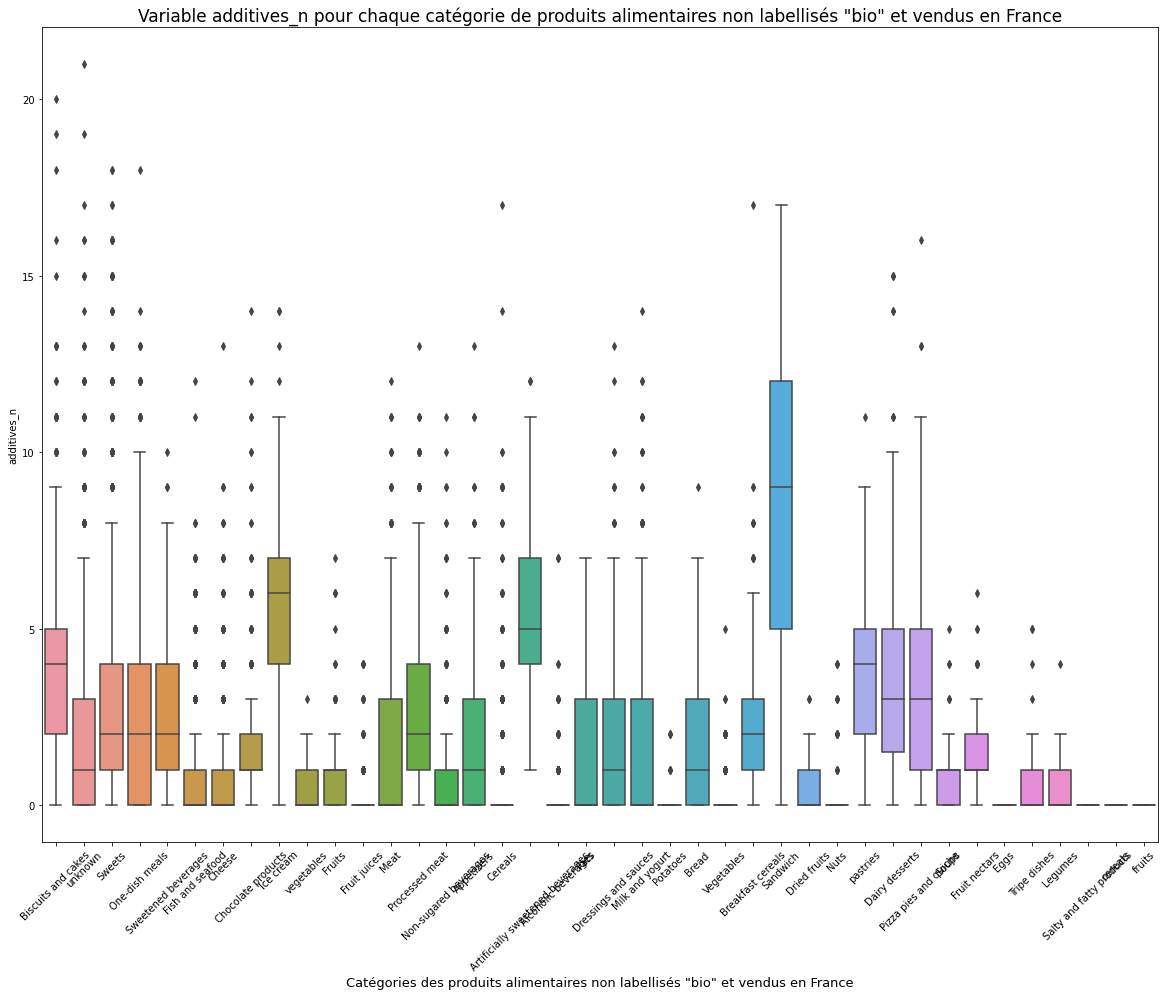

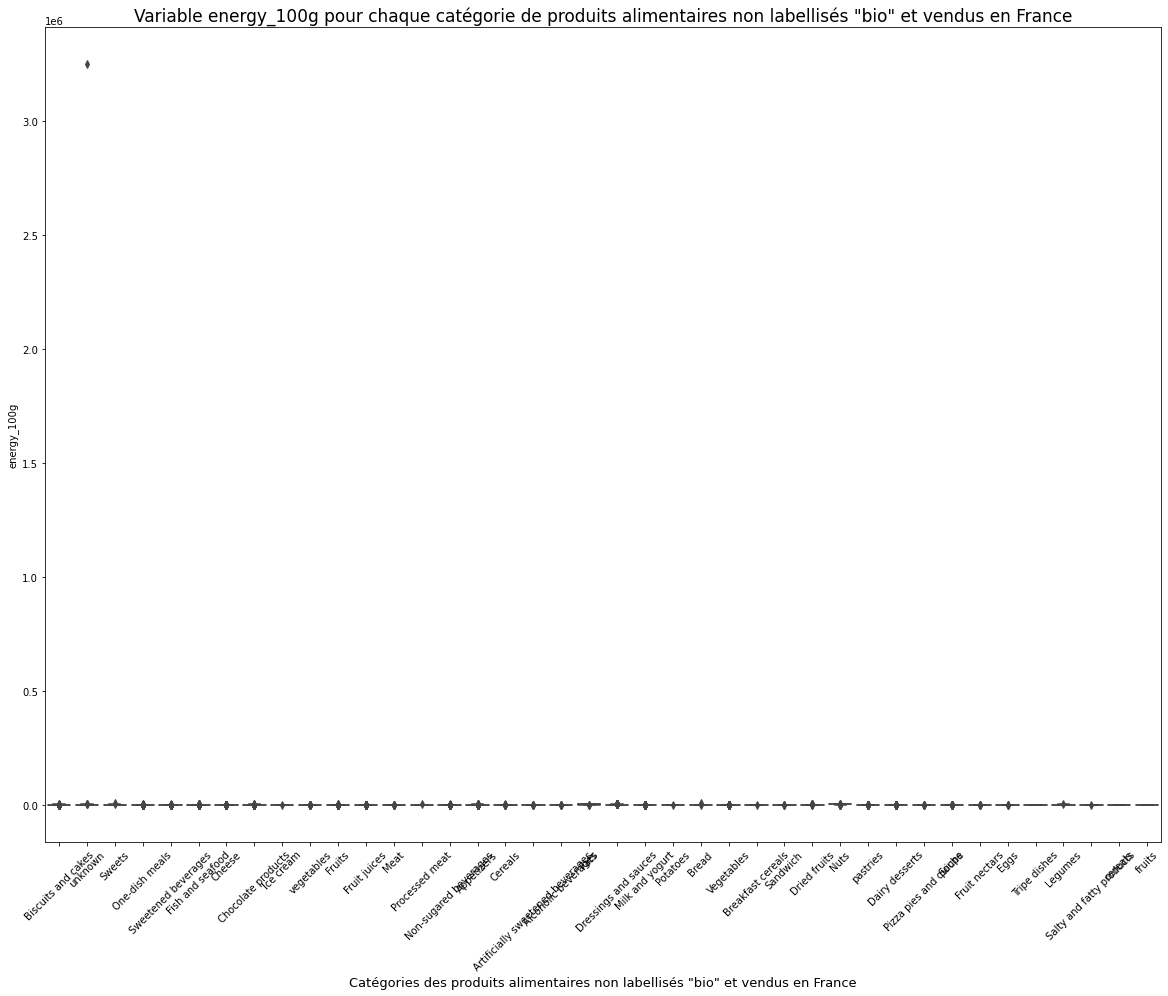

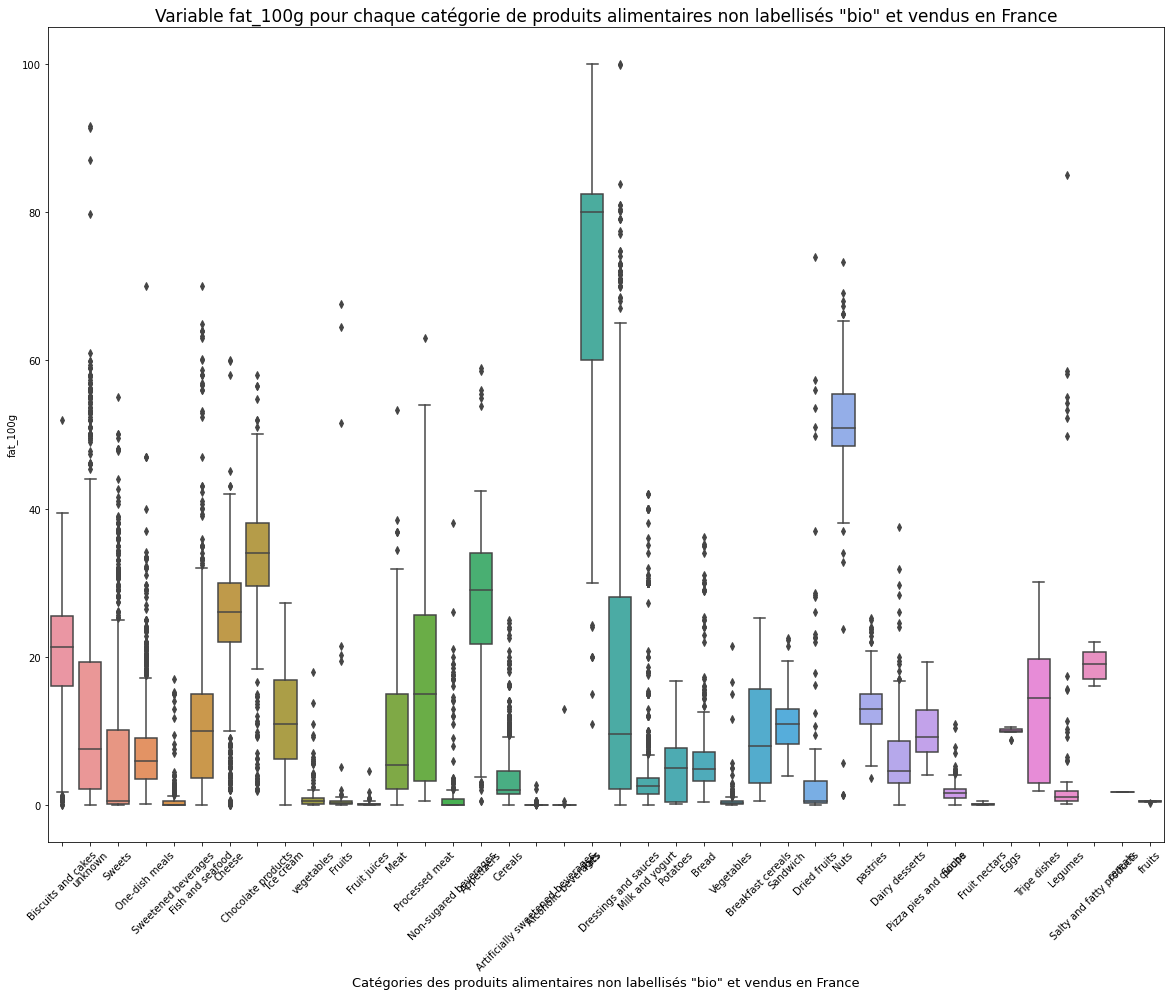

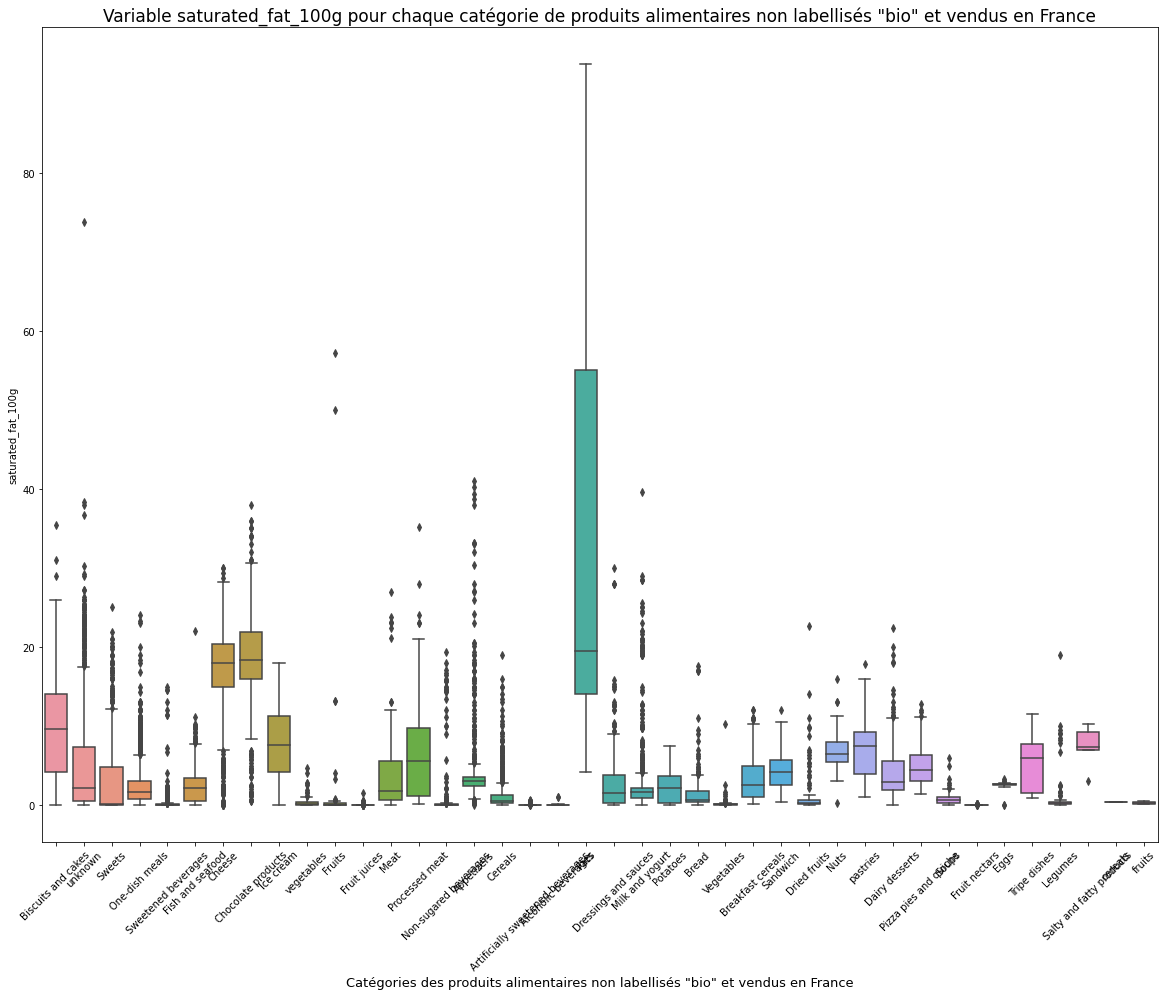

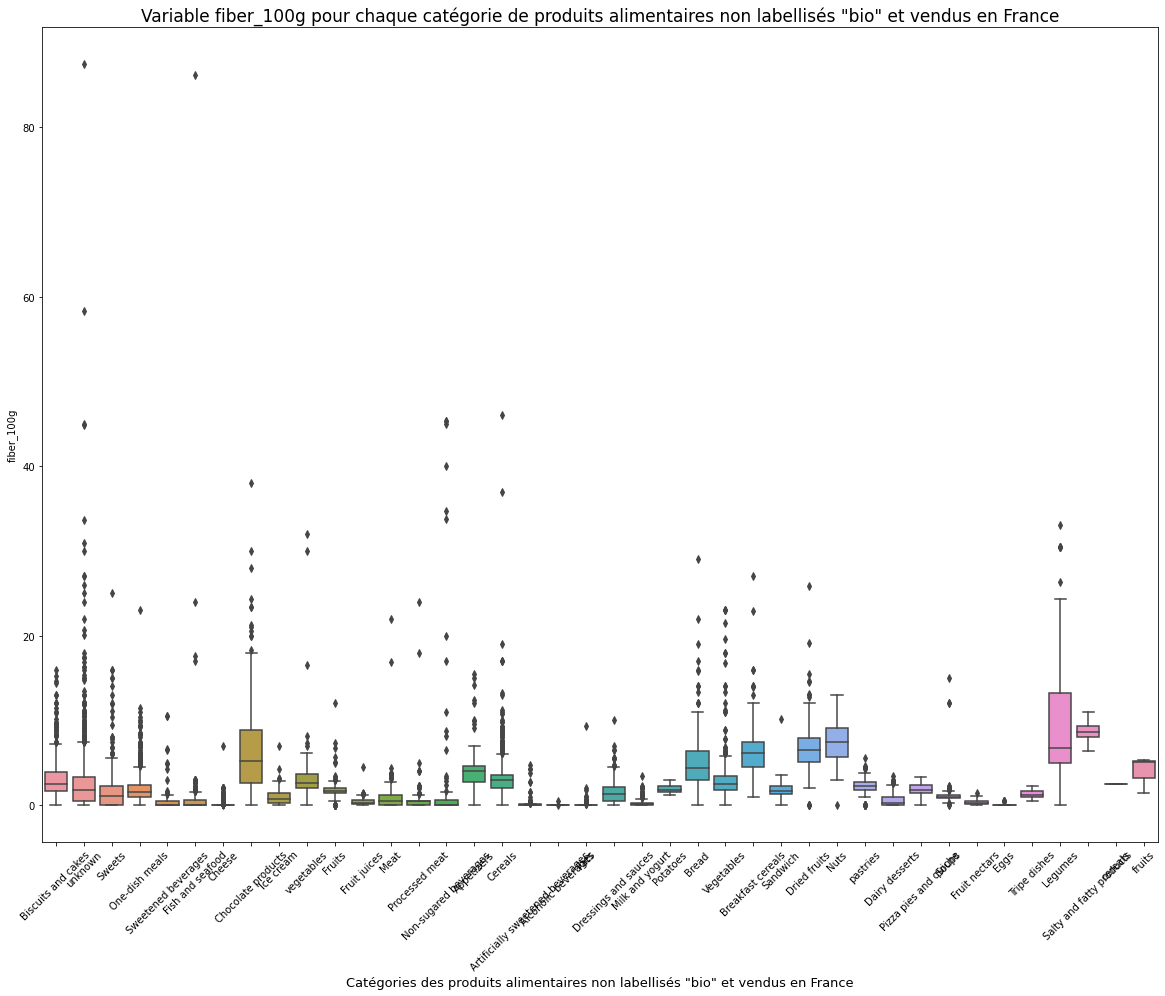

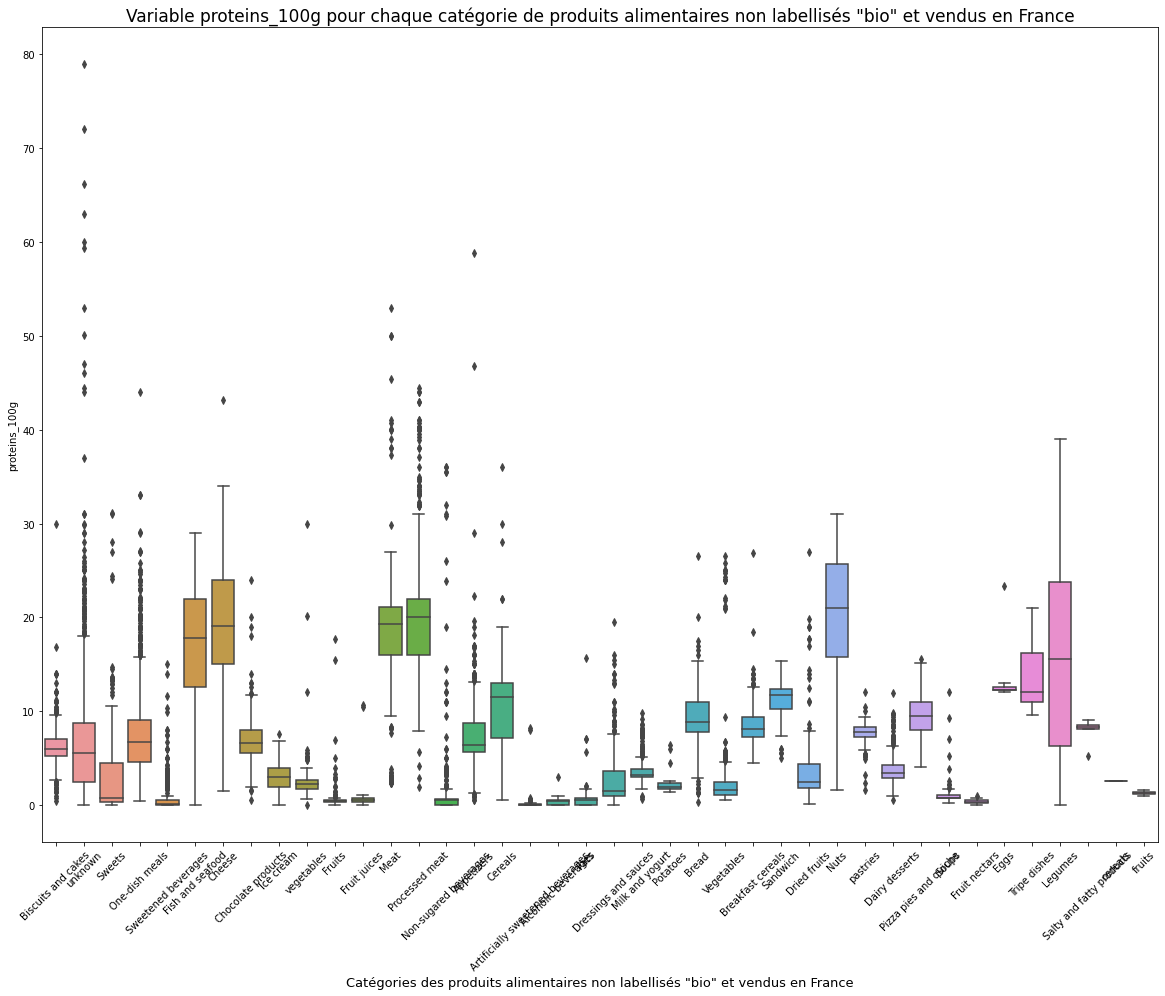

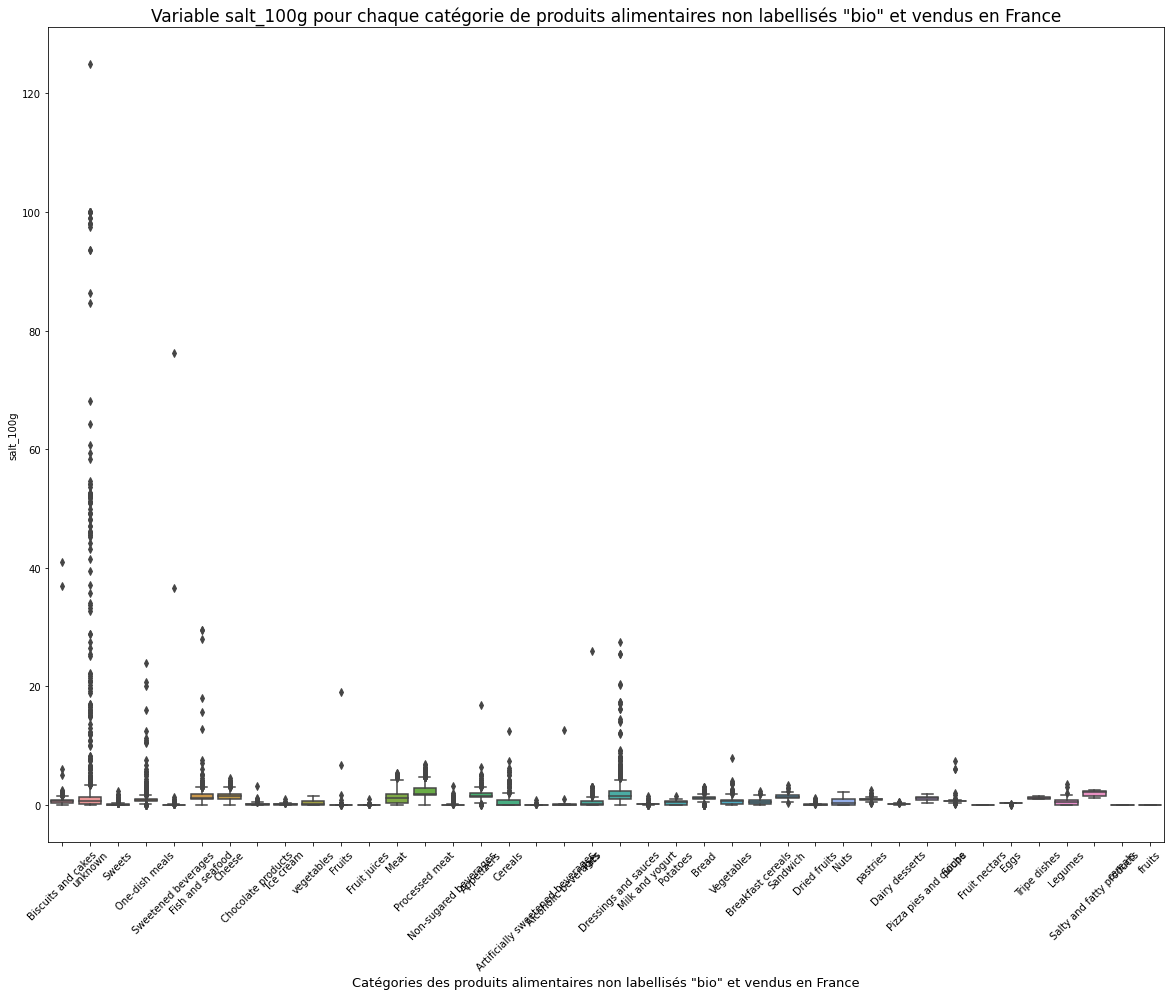

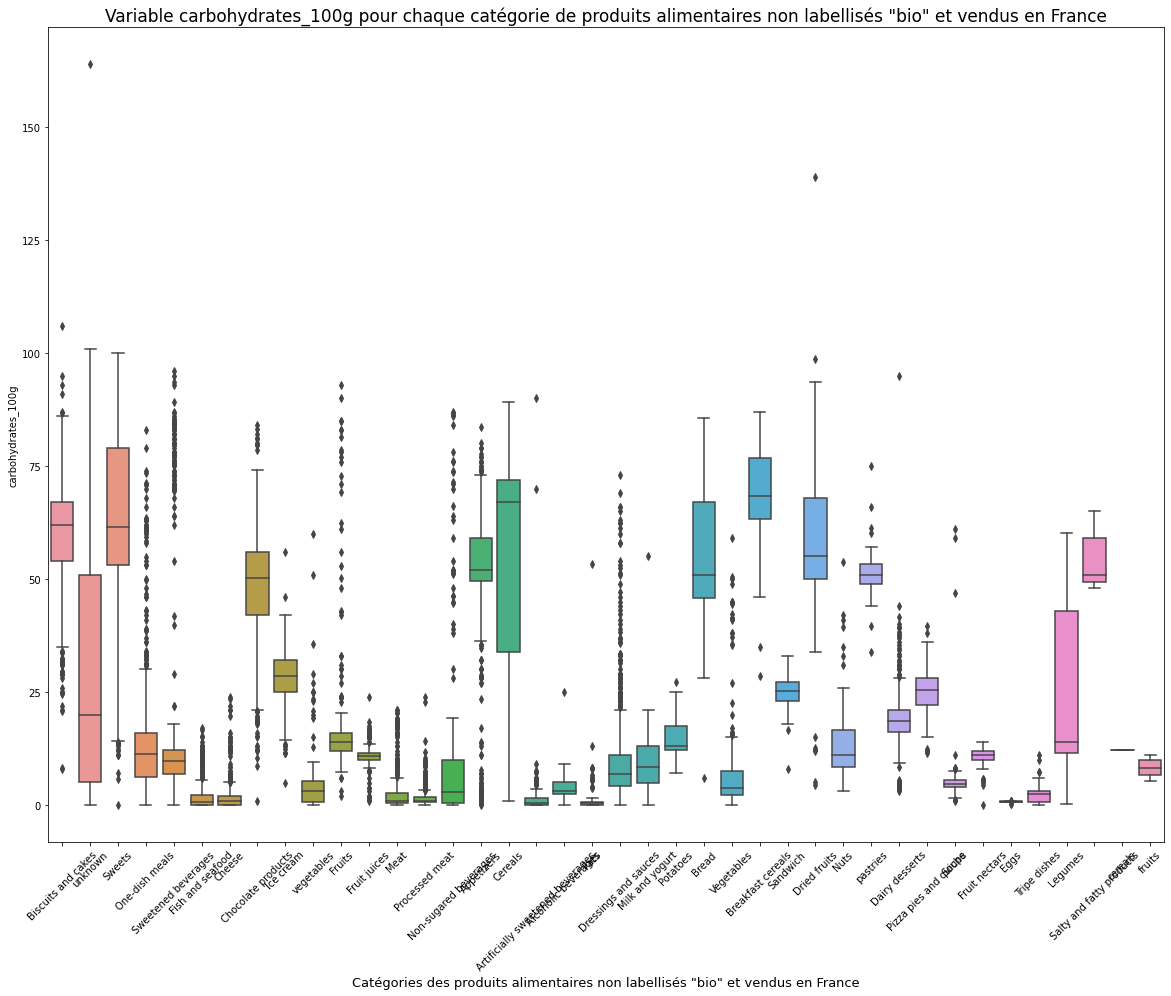

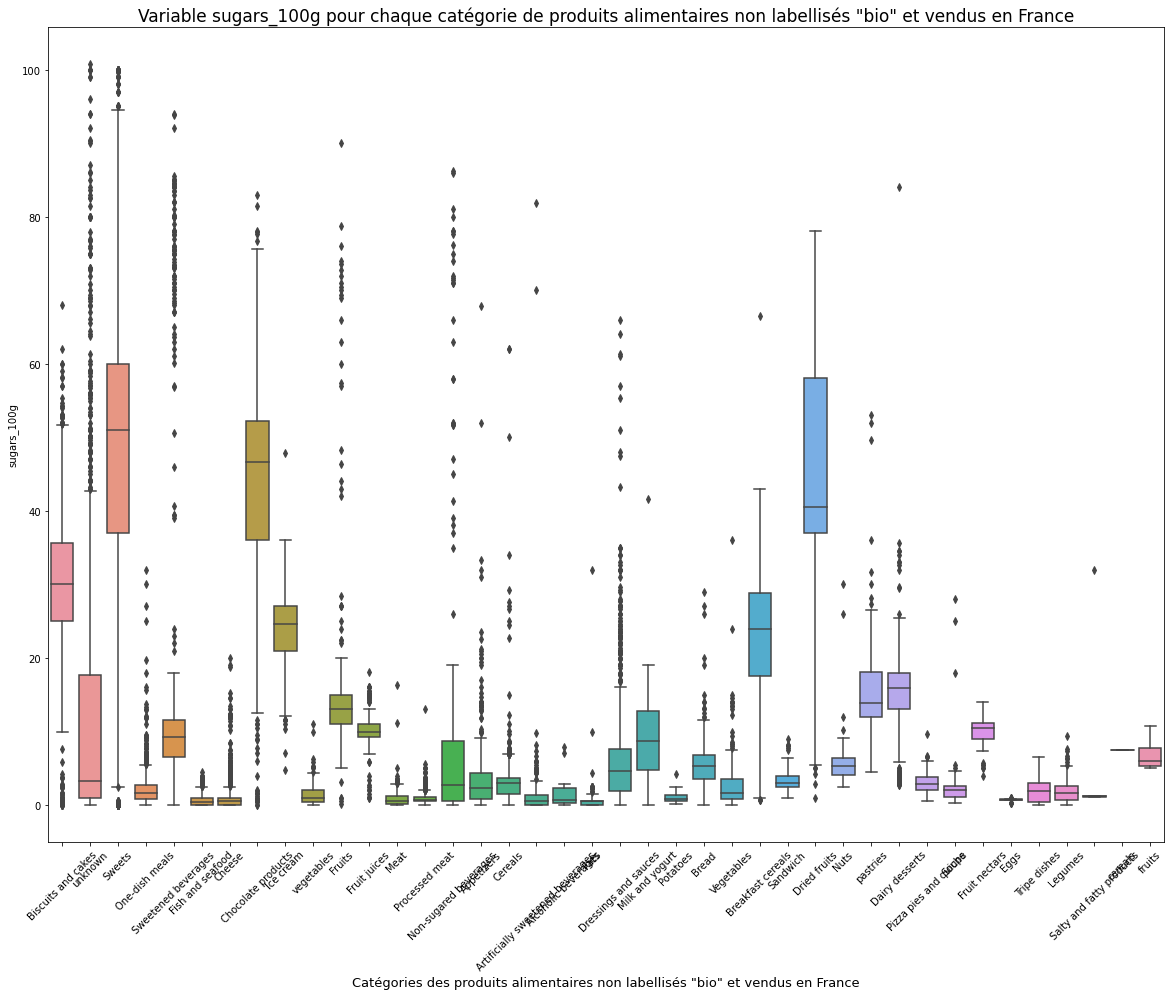

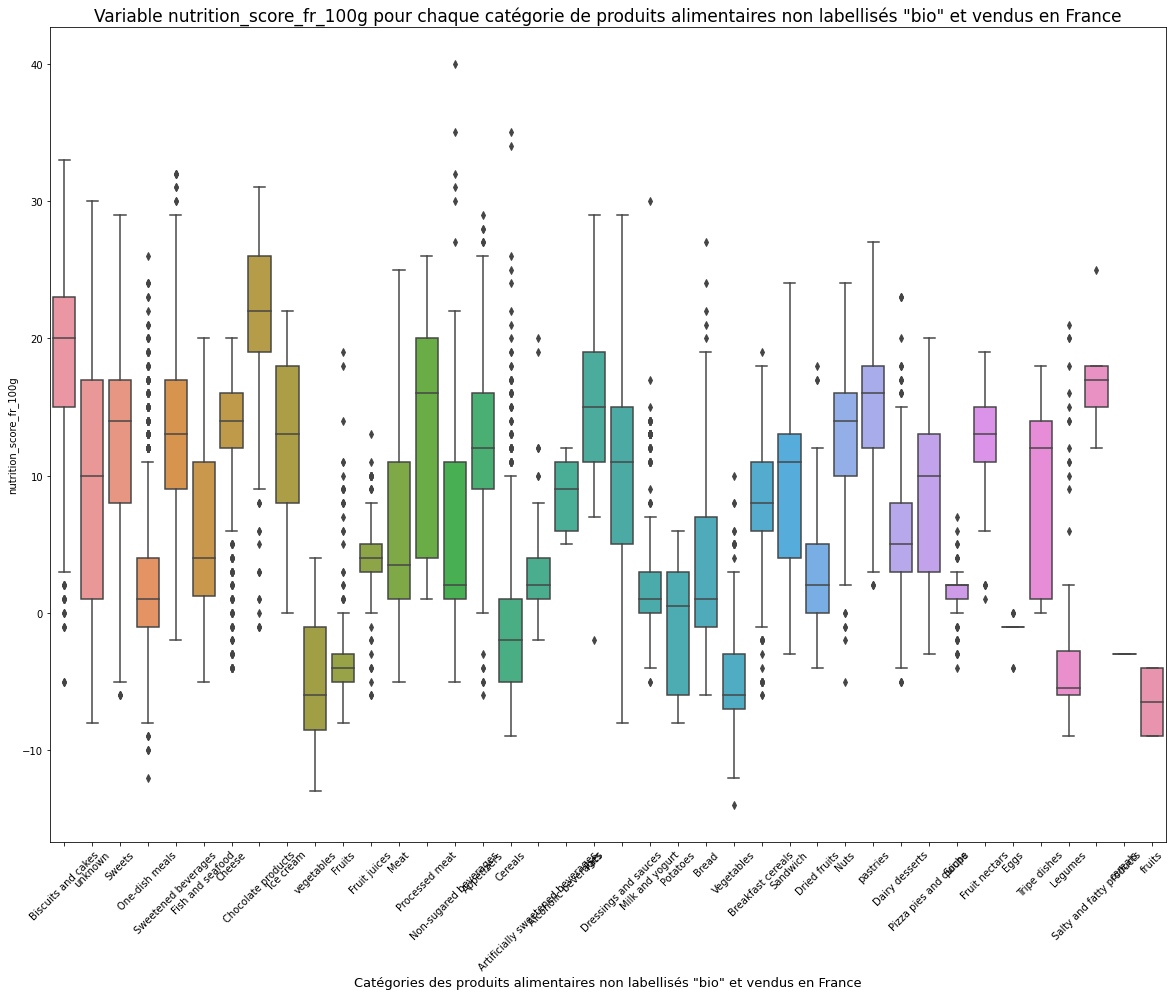

In [88]:
#Observons les différents boxplots pour chaque catégorie
data_non_bio_groupes = data_non_bio_France[colonne_df]

for variable in liste_variables_quantitatives:
    plt.figure(figsize = (20,15))
    sns.boxplot(x = 'pnns_groups_2', y = variable, data = data_non_bio_groupes)
    plt.xticks(rotation = 45)
    plt.xlabel('Catégories des produits alimentaires non labellisés "bio" et vendus en France', size=13)
    plt.title('Variable ' + variable + ' pour chaque catégorie de produits alimentaires non labellisés "bio" et vendus en France', size = 17)
    plt.show()

#### Une valeur aberrante est observée et écrase les données. Nous allons observer à quel produit correspond cette donnée et la supprimer. 

In [89]:
#On va supprimer le produit avec la valeur très aberrante 
display(data_non_bio_France.loc[data_non_bio_France['energy_100g'].idxmax(), :])

data_non_bio_France = data_non_bio_France.drop(data_non_bio_France[data_non_bio_France['code'] == 3257983143096].index)

code                             3257983143096
last_modified_datetime     2017-04-11 17:27:38
product_name                       Pois cassés
quantity                                 500 g
brands                                    Cora
pnns_groups_2                          unknown
labels                              Point Vert
countries                               France
ingredients_text                  Pois cassés.
additives_n                                0.0
additives_tags                             NaN
main_category_fr                   Pois-casses
energy_100g                          3251373.0
fat_100g                                   1.2
saturated_fat_100g                         0.2
fiber_100g                                15.4
proteins_100g                             22.7
salt_100g                                 0.01
carbohydrates_100g                        48.2
sugars_100g                                2.5
nutrition_score_fr_100g                    0.0
nutrition_gra

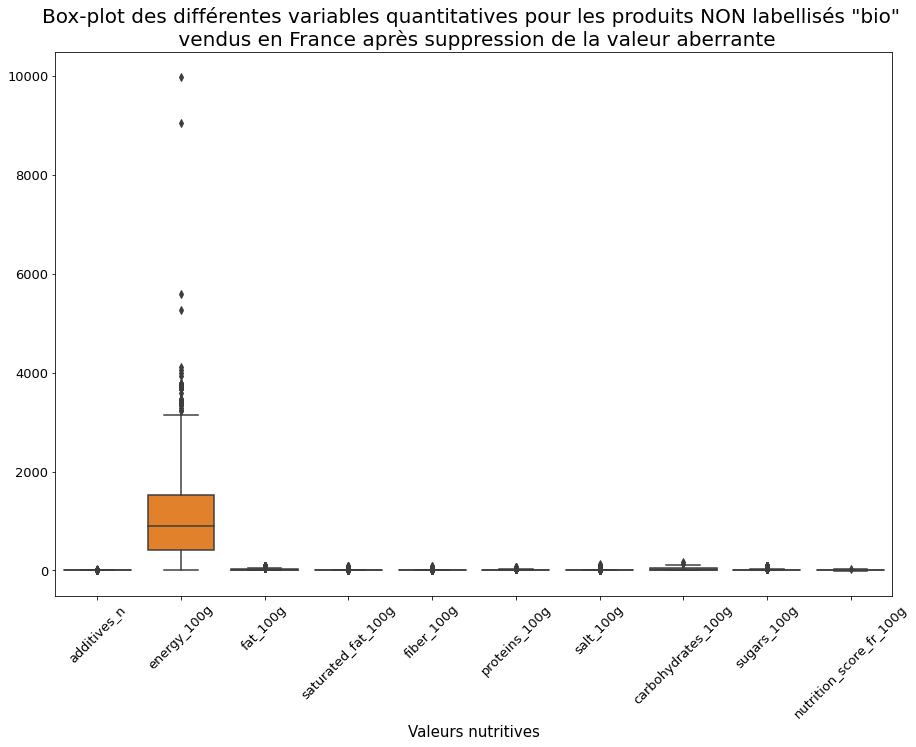

In [90]:
#On va effectuer un boxplot pour toutes les variables quantitatives qui nous intéressent
plt.figure(figsize = (15, 10))
sns.boxplot(data=data_non_bio_France[liste_variables_quantitatives])

plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)

plt.xlabel('Valeurs nutritives', size = 15)
plt.title('Box-plot des différentes variables quantitatives pour les produits NON labellisés "bio" \n vendus en France après suppression de la valeur aberrante', size = 20)

plt.show()

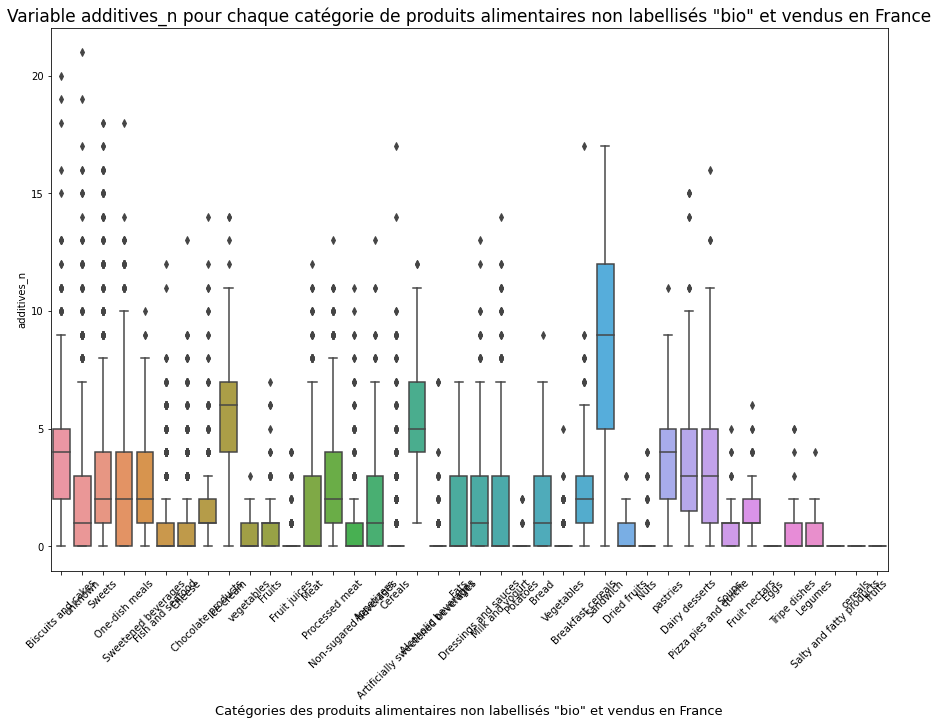

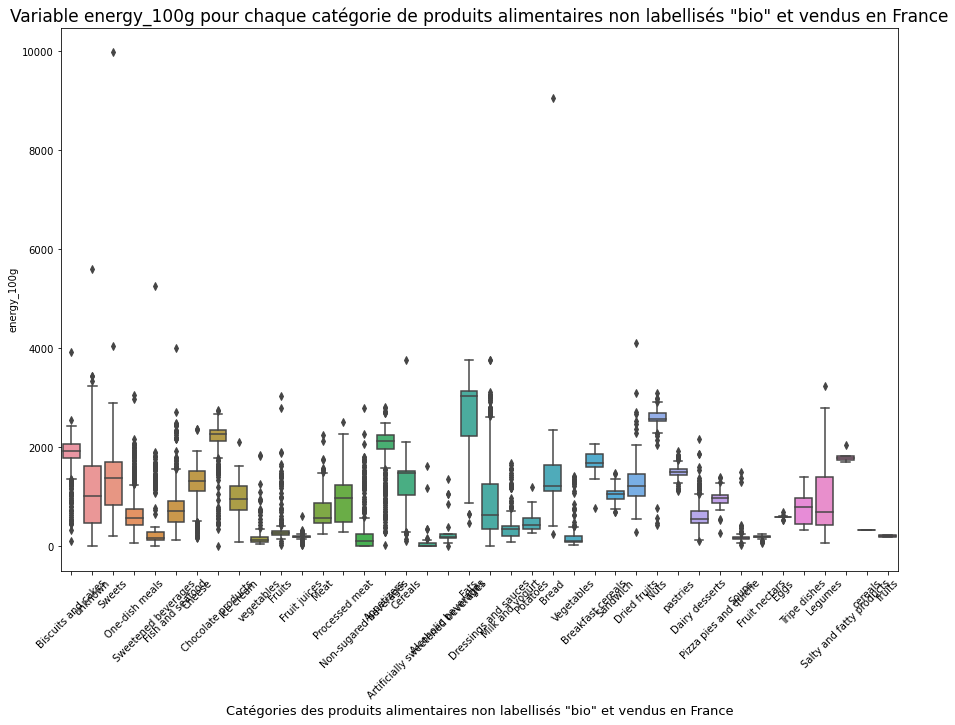

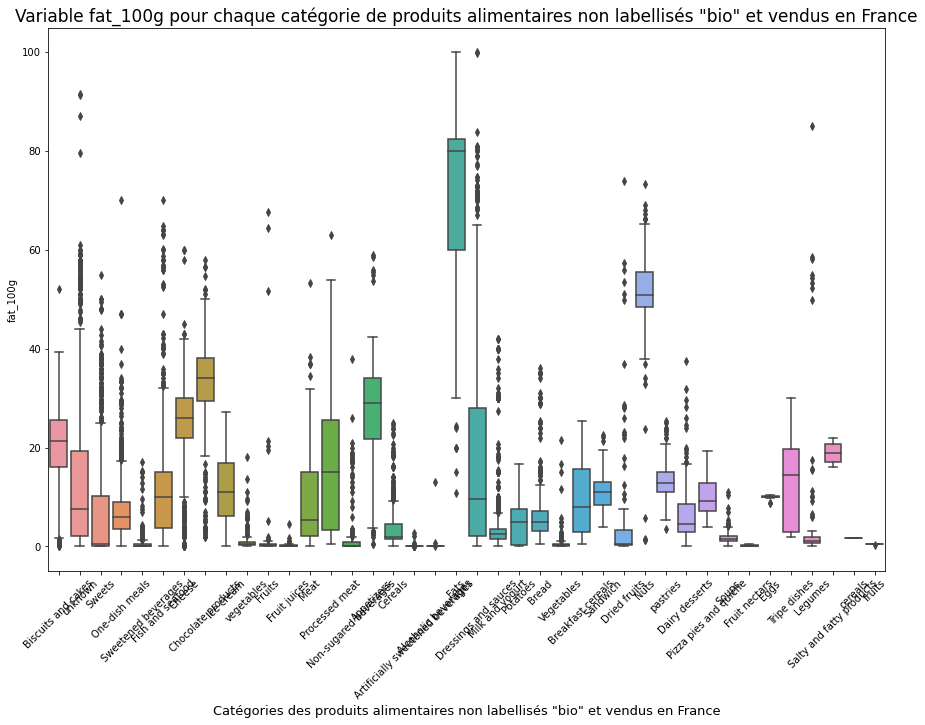

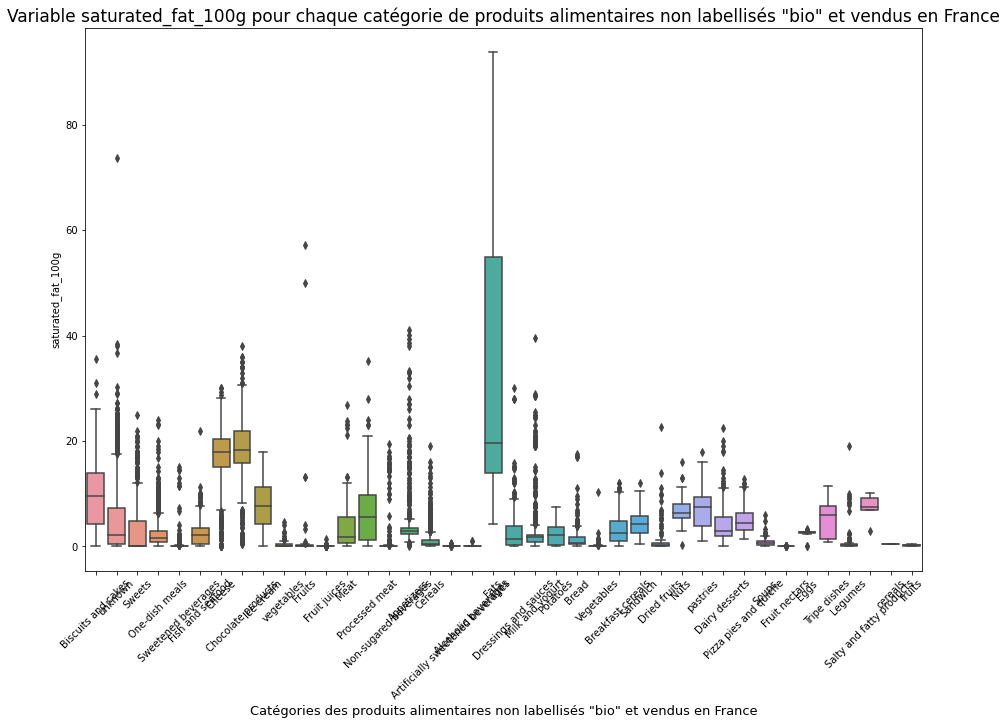

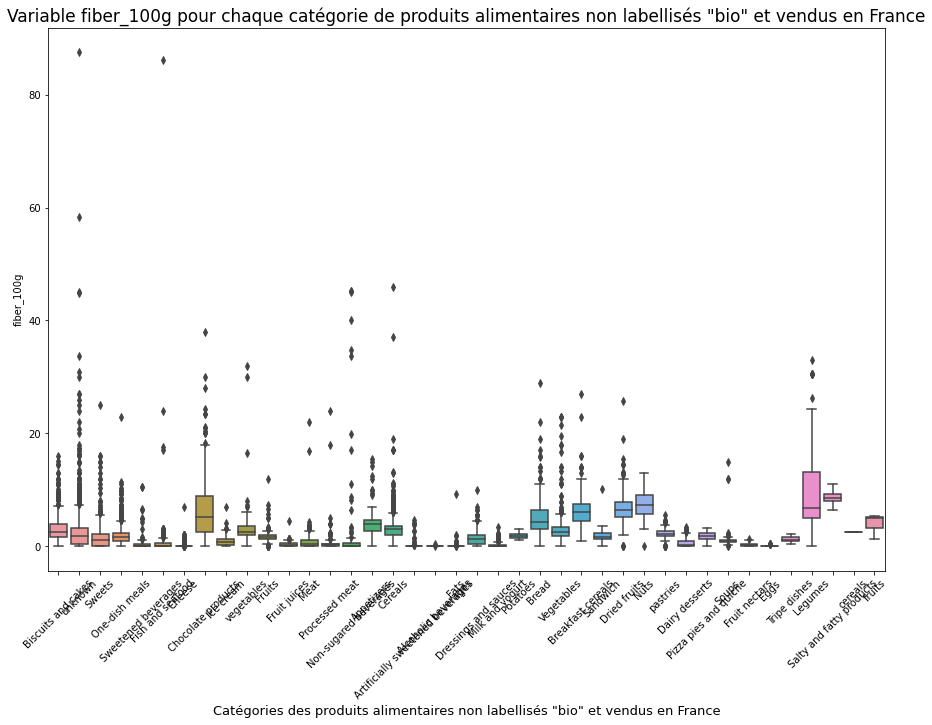

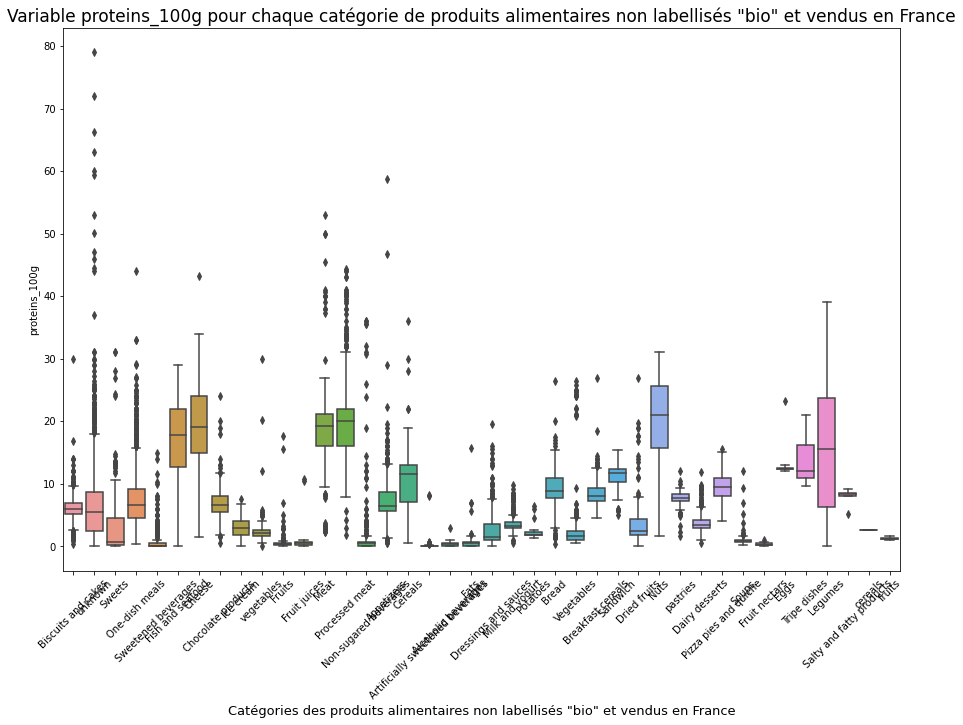

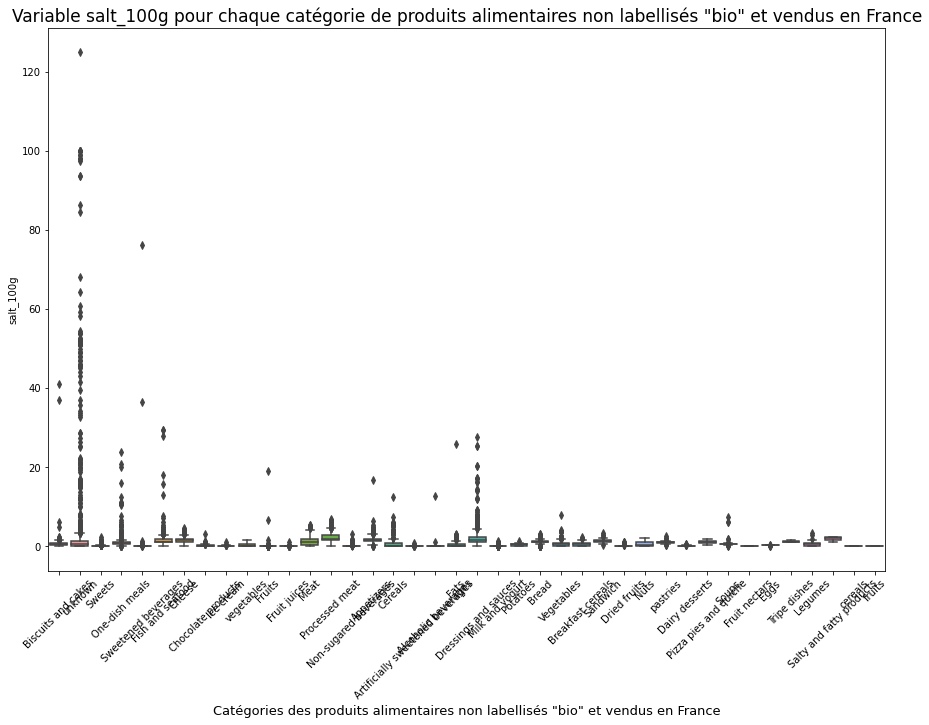

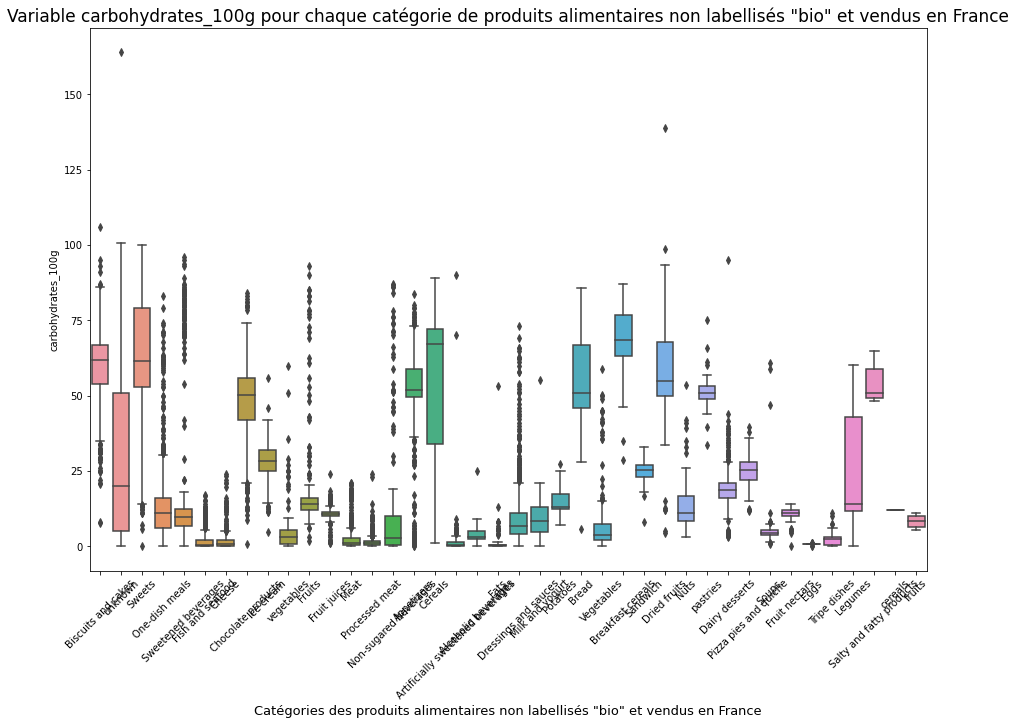

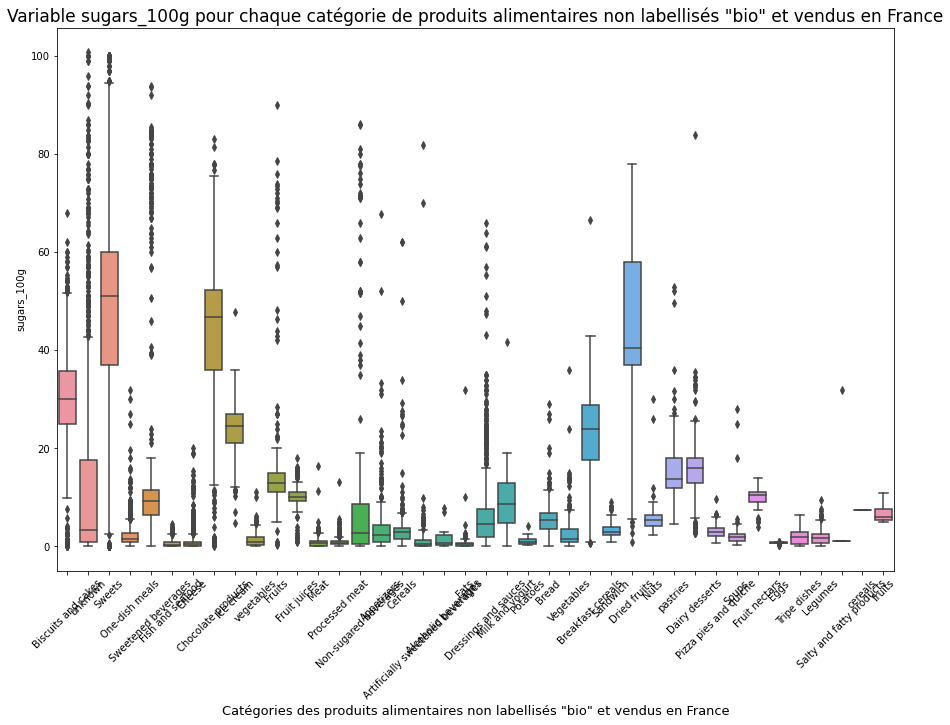

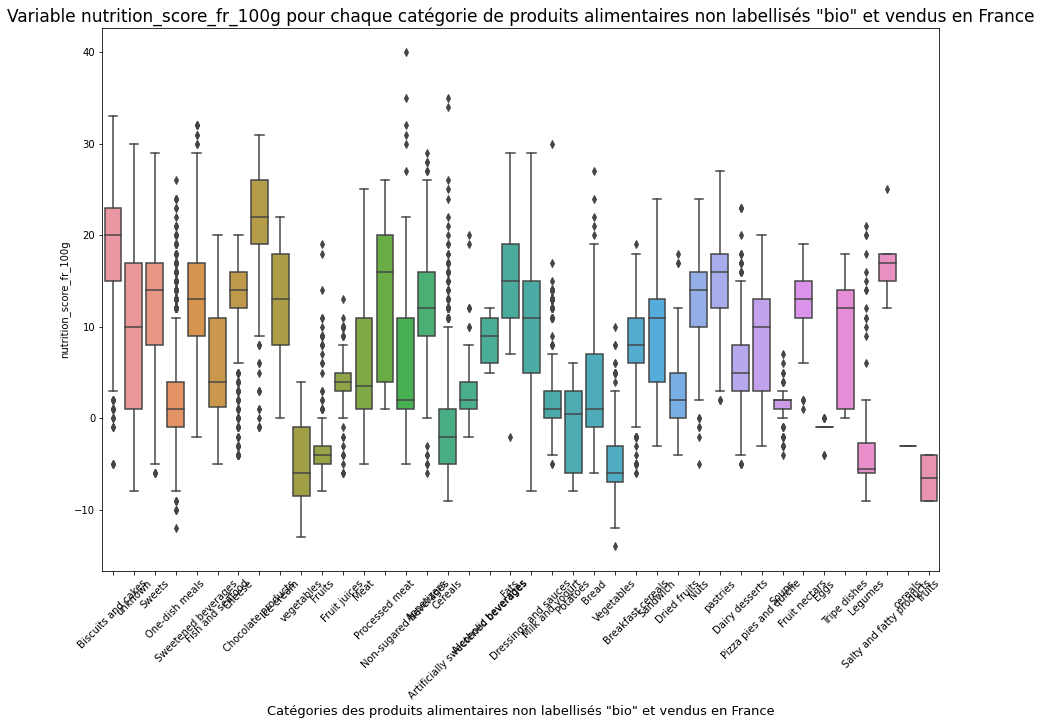

In [91]:
#Observons les différents boxplots pour chaque catégorie
data_non_bio_groupes = data_non_bio_France[colonne_df]

for variable in liste_variables_quantitatives:
    plt.figure(figsize = (15,10))
    sns.boxplot(x = 'pnns_groups_2', y = variable, data = data_non_bio_groupes)
    plt.xticks(rotation = 45)
    plt.xlabel('Catégories des produits alimentaires non labellisés "bio" et vendus en France', size=13)
    plt.title('Variable ' + variable + ' pour chaque catégorie de produits alimentaires non labellisés "bio" et vendus en France', size = 17)
    plt.show()

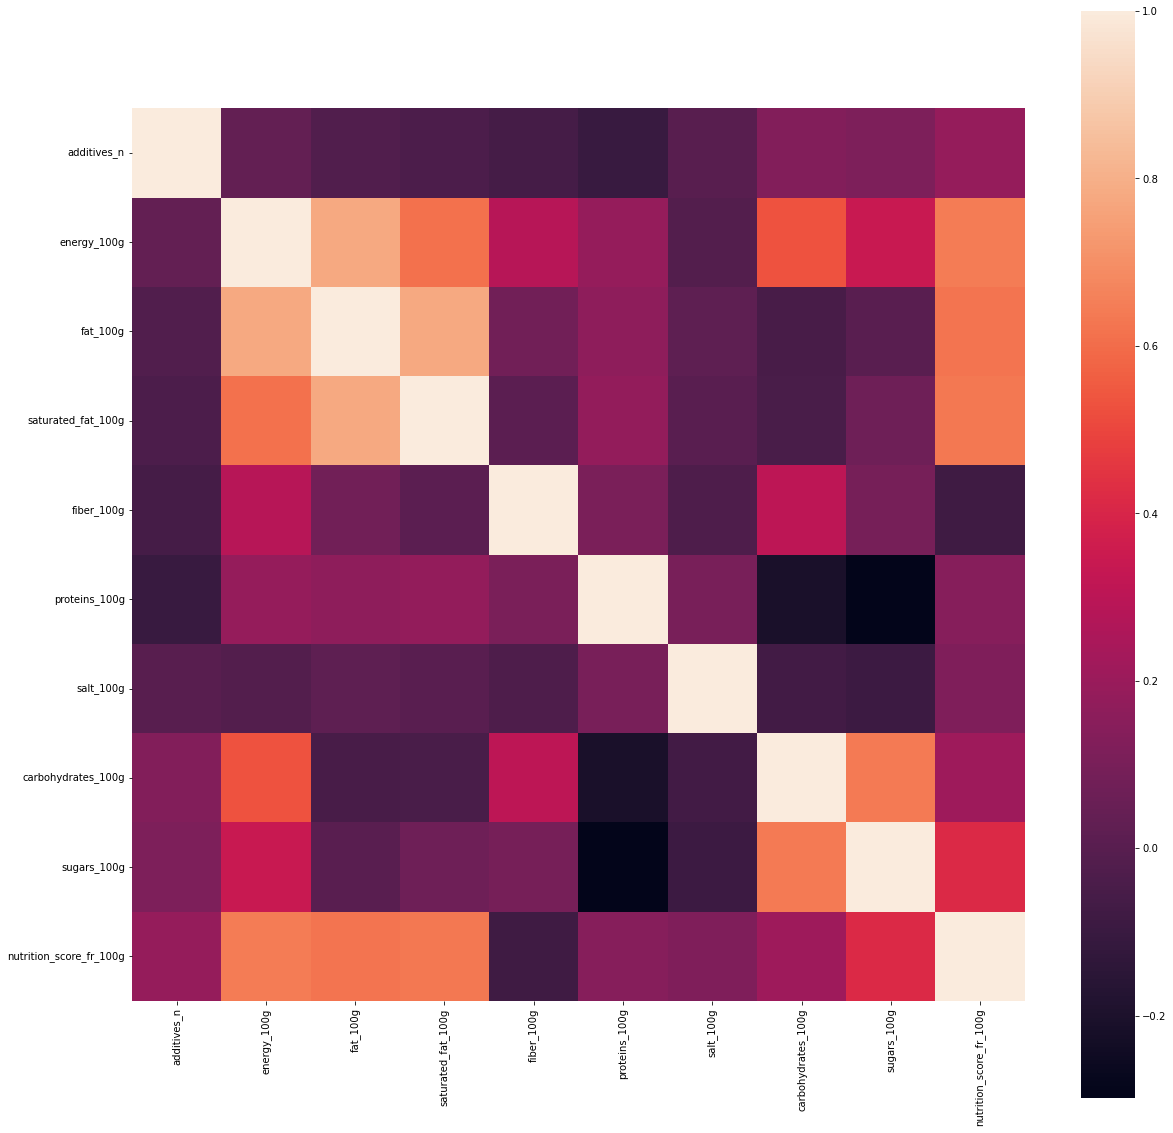

In [92]:
#Si nous regardons à nouveau la heatmap des corrélations :
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data_non_bio_France[liste_variables_quantitatives].corr(),annot = False,square=True);

#### Nous observons de meilleures corrélations pour la variable "energy_100g" après suppression du produit dont la valeur était aberrante. 

#### Nous observons bien des différences significatives pour chaque catégorie de produit (box-plot). 

### Traitement des valeurs manquantes et "unknown" pour la variable "pnn_groups_2"

In [93]:
#On remplace les valeurs manquantes par "unknown"
data_non_bio_France_nettoye = data_non_bio_France.fillna({'pnns_groups_2': 'unknown'})

In [94]:
#On traite les valeurs manquantes au mieux
data_non_bio_France_nettoye.loc[(data_non_bio_France_nettoye['main_category_fr'] == 'Charcuteries') &
                                (data_non_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Processed meat'

data_non_bio_France_nettoye.loc[(data_non_bio_France_nettoye['main_category_fr'] == 'Saucisses') &
                                (data_non_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Processed meat'

data_non_bio_France_nettoye.loc[(data_non_bio_France_nettoye['main_category_fr'] == 'Laits') &
                                (data_non_bio_France_nettoye['pnns_groups_2'] == 'unknown'), 'pnns_groups_2'] = 'Milk and yogurt'

In [95]:
#Avant de remplacer les valeurs aberrantes, on va regarder si on observe des données étranges (ex : saturated-fat_100g > fat_100g)
data_non_bio_France_nettoye.loc[data_non_bio_France_nettoye['saturated_fat_100g'] > data_non_bio_France_nettoye['fat_100g'], :]

#On va plafonner en attribuant aux variables "fat_100g" la valeur des "saturated_fat_100g"
data_non_bio_France_nettoye.loc[data_non_bio_France_nettoye['saturated_fat_100g'] > data_non_bio_France_nettoye['fat_100g'], 'fat_100g'] = data_non_bio_France_nettoye['saturated_fat_100g'] 

In [96]:
#On affiche le nombre de produits par catégories
display(data_non_bio_France_nettoye.groupby('pnns_groups_2').count())

#On affiche le nombre de produits totaux
nbre_produits_non_bio = data_non_bio_France.shape[0]

#On calcule le % de produits bio vendus en France dont on n'a pas de données concernant leur catégorie. 
nbre_occurrence = data_non_bio_France_nettoye['pnns_groups_2'].value_counts().reset_index() 
nbre_occurrence = pd.DataFrame(nbre_occurrence)
nbre_unknown = nbre_occurrence.loc[nbre_occurrence['index'] == 'unknown', 'pnns_groups_2'].values[0]

print(round(nbre_unknown*100/nbre_produits_non_bio, 2), '% des produits ont une catégorie inconnue.')

code  last_modified_datetime  product_name  \
pnns_groups_2                                                                  
Alcoholic beverages                845                     845           843   
Appetizers                         598                     598           596   
Artificially sweetened beverages   135                     135           135   
Biscuits and cakes                1242                    1242          1241   
Bread                              476                     476           475   
Breakfast cereals                  275                     275           275   
Cereals                           1071                    1071          1069   
Cheese                            1518                    1518          1518   
Chocolate products                 591                     591           590   
Dairy desserts                     355                     355           355   
Dressings and sauces               766                     766           764   
Dried fruits                       106                     106           106   
Eggs                               143                     143           142   
Fats                               334                     334           333   
Fish and seafood                  1065                    1065          1065   
Fruit juices                       471                     471           470   
Fruit nectars                      100                     100           100   
Fruits                             616                     616           616   
Ice cream                          252                     252           252   
Legumes                            114                     114           114   
Meat                               829                     829           825   
Milk and yogurt                    875                     875           874   
Non-sugared beverages              593                     593           587   
Nuts                               112                     112           112   
One-dish meals                    2420                    2420          2419   
Pizza pies and quiche              187                     187           186   
Potatoes                            46                      46            46   
Processed meat                    1722                    1722          1721   
Salty and fatty products             5                       5             5   
Sandwich                           180                     180           179   
Soups                              195                     195           195   
Sweetened beverages                503                     503           503   
Sweets                             938                     938           936   
Tripe dishes                        42                      42            42   
Vegetables                         560                     560           559   
cereals                              1                       1             1   
fruits                               4                       4             4   
pastries                           171                     171           171   
unknown                           2618                    2618          2586   
vegetables                         133                     133           133   

                                  quantity  brands  labels  countries  \
pnns_groups_2                                                           
Alcoholic beverages                    828     819     845        845   
Appetizers                             595     598     598        598   
Artificially sweetened beverages       135     135     135        135   
Biscuits and cakes                    1225    1240    1242       1242   
Bread                                  463     475     476        476   
Breakfast cereals                      272     275     275        275   
Cereals                               1063    1067    1071       1071   
Cheese          

11.28 % des produits ont une catégorie inconnue.


In [97]:
#On effectue une copie de notre fichier nettoyé des valeurs manquantes pour les catégories
data_non_bio_France_new = data_non_bio_France_nettoye.copy()

#On supprime les lignes de produits alimentaires dont la catégorie est inconnue
data_non_bio_France_new = data_non_bio_France_new.drop(data_non_bio_France_new[data_non_bio_France_new['pnns_groups_2'] == 'unknown'].index)

#On remplace certaines catégories
data_non_bio_France_new = data_non_bio_France_new.replace('vegetables', 'Vegetables')
data_non_bio_France_new = data_non_bio_France_new.replace('legumes', 'Vegetables')
data_non_bio_France_new = data_non_bio_France_new.replace('Legumes', 'Vegetables')
data_non_bio_France_new = data_non_bio_France_new.replace('cereals', 'Cereals')
data_non_bio_France_new = data_non_bio_France_new.replace('fruits', 'Fruits')
data_non_bio_France_new = data_non_bio_France_new.replace('pastries', 'Pastries')

In [98]:
display(data_non_bio_France_new.groupby('pnns_groups_2').count())

code  last_modified_datetime  product_name  \
pnns_groups_2                                                                  
Alcoholic beverages                845                     845           843   
Appetizers                         598                     598           596   
Artificially sweetened beverages   135                     135           135   
Biscuits and cakes                1242                    1242          1241   
Bread                              476                     476           475   
Breakfast cereals                  275                     275           275   
Cereals                           1072                    1072          1070   
Cheese                            1518                    1518          1518   
Chocolate products                 591                     591           590   
Dairy desserts                     355                     355           355   
Dressings and sauces               766                     766           764   
Dried fruits                       106                     106           106   
Eggs                               143                     143           142   
Fats                               334                     334           333   
Fish and seafood                  1065                    1065          1065   
Fruit juices                       471                     471           470   
Fruit nectars                      100                     100           100   
Fruits                             620                     620           620   
Ice cream                          252                     252           252   
Meat                               829                     829           825   
Milk and yogurt                    875                     875           874   
Non-sugared beverages              593                     593           587   
Nuts                               112                     112           112   
One-dish meals                    2420                    2420          2419   
Pastries                           171                     171           171   
Pizza pies and quiche              187                     187           186   
Potatoes                            46                      46            46   
Processed meat                    1722                    1722          1721   
Salty and fatty products             5                       5             5   
Sandwich                           180                     180           179   
Soups                              195                     195           195   
Sweetened beverages                503                     503           503   
Sweets                             938                     938           936   
Tripe dishes                        42                      42            42   
Vegetables                         807                     807           806   

                                  quantity  brands  labels  countries  \
pnns_groups_2                                                           
Alcoholic beverages                    828     819     845        845   
Appetizers                             595     598     598        598   
Artificially sweetened beverages       135     135     135        135   
Biscuits and cakes                    1225    1240    1242       1242   
Bread                                  463     475     476        476   
Breakfast cereals                      272     275     275        275   
Cereals                               1064    1068    1072       1072   
Cheese                                1493    1518    1518       1518   
Chocolate products                     579     591     591        591   
Dairy desserts                         354     354     355        355   
Dressings and sauces                   751     765     766        766   
Dried fruits                           105     105     106        106   
Eggs                                   138     143 

In [99]:
#Regardons les médianes pour chaque groupe.
mediane_categories_non_bio_France = data_non_bio_France_new.groupby('pnns_groups_2').median()
mediane_categories_non_bio_France = mediane_categories_non_bio_France.reset_index()
display(mediane_categories_non_bio_France)

pnns_groups_2  additives_n  energy_100g  fat_100g  \
0                Alcoholic beverages          0.0        195.0     0.000   
1                         Appetizers          1.0       2132.5    29.000   
2   Artificially sweetened beverages          5.0         14.0     0.000   
3                 Biscuits and cakes          4.0       1935.0    21.300   
4                              Bread          1.0       1228.0     4.900   
5                  Breakfast cereals          2.0       1686.0     7.900   
6                            Cereals          0.0       1485.0     2.000   
7                             Cheese          0.0       1330.0    26.000   
8                 Chocolate products          1.0       2269.0    34.000   
9                     Dairy desserts          3.0        552.0     4.600   
10              Dressings and sauces          1.0        638.0     9.600   
11                      Dried fruits          0.0       1224.5     0.500   
12                              Eggs          0.0        602.0    10.000   
13                              Fats          0.0       3033.0    80.000   
14                  Fish and seafood          0.0        711.5    10.000   
15                      Fruit juices          0.0        199.0     0.100   
16                     Fruit nectars          1.0        197.5     0.100   
17                            Fruits          1.0        267.0     0.300   
18                         Ice cream          6.0        959.0    11.005   
19                              Meat          0.0        581.5     5.350   
20                   Milk and yogurt          0.0        350.0     2.600   
21             Non-sugared beverages          0.0        108.0     0.000   
22                              Nuts          0.0       2573.0    50.800   
23                    One-dish meals          2.0        567.0     6.000   
24                          Pastries          4.0       1512.5    12.900   
25             Pizza pies and quiche          3.0        971.0     9.200   
26                          Potatoes          0.0        440.0     5.000   
27                    Processed meat          2.0        968.0    15.000   
28          Salty and fatty products          0.0       1788.0    19.000   
29                          Sandwich          9.0       1061.0    11.000   
30                             Soups          1.0        161.0     1.600   
31               Sweetened beverages          2.0        179.0     0.000   
32                            Sweets          2.0       1389.0     0.500   
33                      Tripe dishes          0.0        806.0    14.450   
34                        Vegetables          0.0        132.3     0.400   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                 0.00       0.000           0.40   0.024986   
1                 3.00       4.000           6.40   1.600000   
2                 0.00       0.000           0.00   0.011430   
3                 9.60       2.500           6.00   0.600000   
4                 0.60       4.400           8.80   1.180000   
5                 2.50       6.150           8.10   0.508000   
6                 0.50       3.000          11.50   0.090000   
7                18.00       0.000          19.10   1.500000   
8                18.30       5.200           6.60   0.120000   
9                 2.90       0.300           3.40   0.130000   
10                1.50       1.300           1.50   1.600000   
11                0.20       6.500           2.50   0.020000   
12                2.70       0.000          12.30   0.320000   
13               19.55       0.000           0.50   0.210000   
14                2.20       0.000          17.85   1.200000   
15                0.00       0.300           0.50   0.005080   
16                0.00       0.200           0.30   0.010000   
17                0.05       1.700           0.40   0.010000   
18                7.60       0.700           3.00   0.127000   
19    

In [100]:
#On crée une liste de nos différentes catégories
pnns = data_non_bio_France_new['pnns_groups_2'].unique().tolist()

In [101]:
#On va récupérer nos valeurs limites supérieures pour nos différentes variables.  
for variable in liste_variables_quantitatives:
    valeur_limite_sup_variable = round(valeur_limite_sup(data_non_bio_France_new, variable), 2)
    print('La valeur limite supérieure pour', variable, 'est de', valeur_limite_sup_variable)

La valeur limite supérieure pour additives_n est de 7.5
La valeur limite supérieure pour energy_100g est de 3199.0
La valeur limite supérieure pour fat_100g est de 50.1
La valeur limite supérieure pour saturated_fat_100g est de 17.15
La valeur limite supérieure pour fiber_100g est de 7.05
La valeur limite supérieure pour proteins_100g est de 28.75
La valeur limite supérieure pour salt_100g est de 3.28
La valeur limite supérieure pour carbohydrates_100g est de 109.52
La valeur limite supérieure pour sugars_100g est de 28.8
La valeur limite supérieure pour nutrition_score_fr_100g est de 36.0


In [102]:
#On crée des variables pour la valeur limite supérieure de nos différentes variables
sup_energy = valeur_limite_sup(data_non_bio_France_new, 'energy_100g')
sup_additives = valeur_limite_sup(data_non_bio_France_new, 'additives_n')
sup_fat = valeur_limite_sup(data_non_bio_France_new, 'fat_100g')
sup_sat_fat = valeur_limite_sup(data_non_bio_France_new, 'saturated_fat_100g')
sup_fiber = valeur_limite_sup(data_non_bio_France_new, 'fiber_100g')
sup_proteins = valeur_limite_sup(data_non_bio_France_new, 'proteins_100g')
sup_salt = valeur_limite_sup(data_non_bio_France_new, 'salt_100g')
sup_carbohydrates = valeur_limite_sup(data_non_bio_France_new, 'carbohydrates_100g')
sup_sugars = valeur_limite_sup(data_non_bio_France_new, 'sugars_100g')

In [103]:
#Pour la variable "energy_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'energy_100g')
liste_categ_energy = ['Biscuits and cakes', 'Bread', 'Cereals', 'Dressings and sauces', 'Dried fruits', 'Fats', 
                      'Fish and seafood', 'Sweetened beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_energy:
    mediane_categ_energy = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'energy_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['energy_100g'] >= sup_energy) , 'energy_100g'] = mediane_categ_energy

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  quantity  \
0    Biscuits and cakes     1                       1             1         1   
1                 Bread     1                       1             1         1   
2               Cereals     1                       1             1         1   
3  Dressings and sauces     2                       2             2         2   
4          Dried fruits     1                       1             1         1   
5                  Fats    76                      76            76        74   
6      Fish and seafood     1                       1             1         1   
7   Sweetened beverages     1                       1             1         1   
8                Sweets     2                       2             2         2   
9            Vegetables     1                       1             1         1   

   brands  labels  countries  ingredients_text  additives_n  ...  energy_100g  \
0       1       1          1                 1            1  ...            1   
1       1       1          1                 1            1  ...            1   
2       1       1          1                 1            1  ...            1   
3       2       2          2                 2            2  ...            2   
4       1       1          1                 1            1  ...            1   
5      75      76         76                68           68  ...           76   
6       1       1          1                 1            1  ...            1   
7       1       1          1                 1            1  ...            1   
8       2       2          2                 1            1  ...            2   
9       1       1          1                 1            1  ...            1   

   fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0         1                   1           1              1          1   
1         1                   1           0              1          1   
2         1                   1           1              1          1   
3         2                   2           1              2          2   
4         1                   1           1              1          1   
5        74                  71          32             75         69   
6         0                   1           1              1          1   
7         0                   1           1              1          1   
8         1                   2           1              2          2   
9         1                   1           1              1          1   

   carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0                   1            1                        1   
1                   1            1                        1   
2                   1            1                        1   
3                   2            2                        2   
4                   1            1                        1   
5                  73           67                       66   
6                   0            1                        1   
7                   0            1                        1   
8                   1            2                        2   
9                   1            1                        1   

   nutrition_grade_fr  
0                   1  
1                   1  
2                   1  
3                   2  
4                   1  
5                  66  
6                   1  
7                   1  
8                   2  
9                   1  

[10 rows x 22 columns]

['Biscuits and cakes', 'Bread', 'Cereals', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Sweetened beverages', 'Sweets', 'Vegetables']
1935.0
1228.0
1485.0
638.0
1224.5
3033.0
711.5
179.0
1389.0
132.3


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         9.8            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [104]:
#Pour la variable "additives_n", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'additives_n')
liste_categ_additives = ['Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 
                         'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 
                         'Fish and seafood', 'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 
                         'One-dish meals', 'Pastries', 'Pizza pies and quiche', 'Processed meat', 'Sandwich', 
                         'Sweetened beverages', 'Sweets']

for categ in liste_categ_additives:
    mediane_categ_additives = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'additives_n')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['additives_n'] >= sup_additives) , 'additives_n'] = mediane_categ_additives

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                         Appetizers    11                      11   
1   Artificially sweetened beverages    29                      29   
2                 Biscuits and cakes   111                     111   
3                              Bread     1                       1   
4                  Breakfast cereals     8                       8   
5                            Cereals    19                      19   
6                             Cheese     8                       8   
7                 Chocolate products    10                      10   
8                     Dairy desserts    24                      24   
9               Dressings and sauces    14                      14   
10                  Fish and seafood     5                       5   
11                         Ice cream    50                      50   
12                              Meat    28                      28   
13                   Milk and yogurt    29                      29   
14             Non-sugared beverages     6                       6   
15                    One-dish meals   153                     153   
16                          Pastries     6                       6   
17             Pizza pies and quiche    13                      13   
18                    Processed meat    59                      59   
19                          Sandwich   102                     102   
20               Sweetened beverages     8                       8   
21                            Sweets   120                     120   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             11        11      11      11         11                11   
1             29        29      29      29         29                29   
2            111       111     111     111        111               111   
3              1         1       1       1          1                 1   
4              8         8       8       8          8                 8   
5             19        19      19      19         19                19   
6              8         8       8       8          8                 8   
7             10        10      10      10         10                10   
8             24        24      24      24         24                24   
9             14        14      14      14         14                14   
10             5         5       5       5          5                 5   
11            50        50      50      50         50                50   
12            28        28      28      28         28                28   
13            29        29      29      29         29                29   
14             6         6       6       6          6                 6   
15           153       153     153     153        153               153   
16             6         6       6       6          6                 6   
17            13        13      13      13         13                13   
18            59        59      59      59         59                59   
19           102       102     102     102        102               102   
20             8         8       8       8          8                 8   
21           120       119     120     120        120               120   

    additives_n  ...  energy_100g  fat_100g  saturated_fat_100g  fiber_100g  \
0            11  ...           10        10                  10           5   
1            29  ...           27        25                  21          13   
2           111  ...          103       102                 101          69   
3             1  ...            1         1                   1           1   
4             8  ...            8         8                   8           8   
5            19  ...           19        19                  19          11   
6             8  ...            7         7                   7           4   
7            10  ...            9         9           

['Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 'Fish and seafood', 'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 'One-dish meals', 'Pastries', 'Pizza pies and quiche', 'Processed meat', 'Sandwich', 'Sweetened beverages', 'Sweets']
1.0
5.0
4.0
1.0
2.0
0.0
0.0
1.0
3.0
1.0
0.0
6.0
0.0
0.0
0.0
2.0
4.0
3.0
2.0
9.0
2.0
2.0


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         9.8            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [105]:
#Pour la variable "fat_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'fat_100g')
liste_categ_fat = ['Appetizers', 'Biscuits and cakes', 'Cheese', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 
                   'Fats', 'Fish and seafood', 'Fruits', 'Meat', 'Nuts', 'One-dish meals', 'Processed meat', 'Sweets', 
                   'Vegetables']

for categ in liste_categ_fat:
    mediane_categ_fat = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'fat_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['fat_100g'] >= sup_fat) , 'fat_100g'] = mediane_categ_fat

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0             Appetizers     6                       6             6   
1     Biscuits and cakes     1                       1             1   
2                 Cheese     3                       3             3   
3     Chocolate products     7                       7             7   
4   Dressings and sauces    73                      73            72   
5           Dried fruits     5                       5             5   
6                   Fats   267                     267           266   
7       Fish and seafood    21                      21            21   
8                 Fruits     3                       3             3   
9                   Meat     1                       1             1   
10                  Nuts    56                      56            56   
11        One-dish meals     1                       1             1   
12        Processed meat     2                       2             2   
13                Sweets     1                       1             1   
14            Vegetables     7                       7             7   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          6       6       6          6                 5            5  ...   
1          1       1       1          1                 1            1  ...   
2          3       3       3          3                 3            3  ...   
3          7       7       7          7                 7            7  ...   
4         73      73      73         73                68           68  ...   
5          5       5       5          5                 5            5  ...   
6        262     266     267        267               254          254  ...   
7         21      21      21         21                21           21  ...   
8          3       3       3          3                 3            3  ...   
9          1       1       1          1                 1            1  ...   
10        56      56      56         56                54           54  ...   
11         1       1       1          1                 1            1  ...   
12         2       2       2          2                 2            2  ...   
13         1       1       1          1                 1            1  ...   
14         7       7       7          7                 7            7  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             6         6                   6           3              6   
1             1         1                   1           1              1   
2             3         3                   3           0              3   
3             7         7                   7           6              7   
4            73        73                  72          17             73   
5             5         5                   4           4              5   
6           256       267                 252         107            256   
7            21        21                  20           7             21   
8             2         3                   2           0              3   
9             1         1                   1           1              1   
10           56        56                  54          33             55   
11            1         1                   1           1              1   
12            2         2                   2           0              2   
13            1         1                   1           0              1   
14            7         7                   7           5              7   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           6                   6            6                        6   
1           1                   1            1                        1   
2           3                   3            3                        3   
3           7                   7            7                        7   
4

['Appetizers', 'Biscuits and cakes', 'Cheese', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 'Meat', 'Nuts', 'One-dish meals', 'Processed meat', 'Sweets', 'Vegetables']
29.0
21.3
26.0
34.0
9.6
0.5
80.0
10.0
0.3
5.35
50.8
6.0
15.0
0.5
0.4


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         9.8            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [106]:
#Pour la variable "saturated-fat_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'saturated_fat_100g')
liste_categ_sat_fat = ['Appetizers', 'Biscuits and cakes', 'Bread', 'Cereals', 'Cheese', 'Chocolate products', 
                       'Dairy desserts', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 
                       'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 'One-dish meals', 'Pastries', 
                       'Processed meat', 'Sweets', 'Vegetables']

for categ in liste_categ_sat_fat:
    mediane_categ_sat_fat = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'saturated_fat_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['saturated_fat_100g'] >= sup_sat_fat) , 'saturated_fat_100g'] = mediane_categ_sat_fat

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers    27                      27            27   
1      Biscuits and cakes    91                      91            91   
2                   Bread     1                       1             1   
3                 Cereals     1                       1             1   
4                  Cheese   647                     647           647   
5      Chocolate products   313                     313           313   
6          Dairy desserts     5                       5             5   
7    Dressings and sauces     4                       4             4   
8            Dried fruits     1                       1             1   
9                    Fats   159                     159           158   
10       Fish and seafood     1                       1             1   
11                 Fruits     2                       2             2   
12              Ice cream     4                       4             4   
13                   Meat     6                       6             6   
14        Milk and yogurt    49                      49            49   
15  Non-sugared beverages     2                       2             2   
16         One-dish meals     7                       7             7   
17               Pastries     1                       1             1   
18         Processed meat    32                      32            32   
19                 Sweets    18                      18            18   
20             Vegetables     1                       1             1   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0         26      27      27         27                23           23  ...   
1         91      91      91         91                87           87  ...   
2          1       1       1          1                 1            1  ...   
3          1       1       1          1                 1            1  ...   
4        641     647     647        647               611          611  ...   
5        309     313     313        313               298          298  ...   
6          5       5       5          5                 5            5  ...   
7          4       4       4          4                 4            4  ...   
8          1       1       1          1                 1            1  ...   
9        156     159     159        159               151          151  ...   
10         1       1       1          1                 1            1  ...   
11         2       2       2          2                 2            2  ...   
12         4       4       4          4                 4            4  ...   
13         6       6       6          6                 6            6  ...   
14        49      49      49         49                47           47  ...   
15         2       2       2          2                 1            1  ...   
16         7       7       7          7                 6            6  ...   
17         1       1       1          1                 1            1  ...   
18        32      32      32         32                31           31  ...   
19        18      18      18         18                17           17  ...   
20         1       1       1          1                 1            1  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0            27        27                  27          14             27   
1            90        89                  91          46             91   
2             1         1                   1           0              1   
3             1         1                   1           1              1   
4           646       632                 647         218            645   
5           313       307                 313         203            313   
6             5         5                   5           2              5   
7             4         4                   4           1 

['Appetizers', 'Biscuits and cakes', 'Bread', 'Cereals', 'Cheese', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 'Ice cream', 'Meat', 'Milk and yogurt', 'Non-sugared beverages', 'One-dish meals', 'Pastries', 'Processed meat', 'Sweets', 'Vegetables']
3.0
9.6
0.6
0.5
18.0
18.3
2.9
1.5
0.2
19.55
2.2
0.05
7.6
1.8
1.7
0.0
1.6
7.45
5.6
0.1
0.1


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         9.8            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [107]:
#Pour la variable "fiber_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'fiber_100g')
liste_categ_fiber = ['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 
                     'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 'Meat', 
                     'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 'Salty and fatty products', 
                     'Sandwich', 'Soups', 'Sweetened beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_fiber:
    mediane_categ_fiber = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'fiber_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['fiber_100g'] >= sup_fiber) , 'fiber_100g'] = mediane_categ_fiber

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0                 Appetizers     9                       9             9   
1         Biscuits and cakes    36                      36            36   
2                      Bread    73                      73            73   
3          Breakfast cereals    77                      77            77   
4                    Cereals    40                      40            40   
5         Chocolate products   136                     136           136   
6       Dressings and sauces     1                       1             1   
7               Dried fruits    26                      26            26   
8                       Fats     1                       1             1   
9           Fish and seafood     4                       4             4   
10                    Fruits     2                       2             2   
11                      Meat     2                       2             2   
12     Non-sugared beverages    11                      11            11   
13                      Nuts    32                      32            32   
14            One-dish meals    20                      20            20   
15            Processed meat     2                       2             2   
16  Salty and fatty products     3                       3             3   
17                  Sandwich     1                       1             1   
18                     Soups     3                       3             3   
19       Sweetened beverages     2                       2             2   
20                    Sweets    16                      16            16   
21                Vegetables    67                      67            67   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          9       9       9          9                 9            9  ...   
1         36      36      36         36                35           35  ...   
2         73      73      73         73                67           67  ...   
3         76      77      77         77                75           75  ...   
4         40      40      40         40                40           40  ...   
5        133     136     136        136               131          131  ...   
6          1       1       1          1                 1            1  ...   
7         26      26      26         26                25           25  ...   
8          0       1       1          1                 1            1  ...   
9          4       4       4          4                 4            4  ...   
10         2       2       2          2                 2            2  ...   
11         2       2       2          2                 2            2  ...   
12        10      11      11         11                 9            9  ...   
13        32      32      32         32                32           32  ...   
14        20      20      20         20                20           20  ...   
15         2       2       2          2                 2            2  ...   
16         3       3       3          3                 3            3  ...   
17         1       1       1          1                 1            1  ...   
18         3       3       3          3                 3            3  ...   
19         2       2       2          2                 2            2  ...   
20        16      16      16         16                14           14  ...   
21        67      67      67         67                65           65  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             9         9                   9           9              9   
1            36        36                  36          36             36   
2            73        70                  72          73             73   
3            77        75                  77          77             77   
4            40        40                  39          40           

['Appetizers', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fish and seafood', 'Fruits', 'Meat', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 'Salty and fatty products', 'Sandwich', 'Soups', 'Sweetened beverages', 'Sweets', 'Vegetables']
4.0
2.5
4.4
6.15
3.0
5.2
1.3
6.5
0.0
0.0
1.7
0.5
0.005
7.4
1.59
0.5
8.6
1.65
1.0
0.02
1.1
2.8


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [108]:
#Pour la variable "proteins_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'proteins_100g')
liste_categ_proteins = ['Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Fish and seafood', 'Meat', 
                        'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 'Sweets', 'Vegetables']

for categ in liste_categ_proteins:
    mediane_categ_proteins = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'proteins_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['proteins_100g'] >= sup_proteins) , 'proteins_100g'] = mediane_categ_proteins

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     3                       3             3   
1      Biscuits and cakes     1                       1             1   
2                 Cereals     2                       2             2   
3                  Cheese    85                      85            85   
4        Fish and seafood     3                       3             3   
5                    Meat    14                      14            14   
6   Non-sugared beverages     7                       7             7   
7                    Nuts     4                       4             4   
8          One-dish meals     5                       5             5   
9          Processed meat   123                     123           123   
10                 Sweets     2                       2             2   
11             Vegetables     2                       2             2   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          3       3       3          3                 3            3  ...   
1          1       1       1          1                 1            1  ...   
2          2       2       2          2                 2            2  ...   
3         83      85      85         85                78           78  ...   
4          3       3       3          3                 3            3  ...   
5         14      14      14         14                14           14  ...   
6          6       7       7          7                 5            5  ...   
7          4       4       4          4                 4            4  ...   
8          5       5       5          5                 5            5  ...   
9        121     123     123        123               119          119  ...   
10         2       2       2          2                 0            0  ...   
11         2       2       2          2                 2            2  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             3         3                   3           3              3   
1             1         1                   1           1              1   
2             2         2                   2           2              2   
3            85        82                  78          40             85   
4             3         3                   3           1              3   
5            14        14                  14           5             14   
6             7         6                   6           3              7   
7             4         4                   4           2              4   
8             5         5                   5           2              5   
9           123       119                 116          35            123   
10            2         1                   2           2              2   
11            2         2                   2           2              2   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           3                   3            3                        3   
1           1                   1            1                        1   
2           2                   2            2                        2   
3          79                  77           76                       76   
4           3                   3            3                        3   
5          14                  14           14                       14   
6           6                   6            6                        1   
7           4                   4            4                        4   
8           5                   5            5                        5   
9         116                 118          115                      115   
10          2                   1            2                        2   
11          2                   2            2                        2   

    nutrition_grade_fr  
0                    3  
1                  

['Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Fish and seafood', 'Meat', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Processed meat', 'Sweets', 'Vegetables']
6.4
6.0
11.5
19.1
17.85
19.3
0.5
21.0
6.67
20.0
0.7
2.1


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [109]:
#Pour la variable "salt_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'salt_100g')
liste_categ_salt = ['Alcoholic beverages', 'Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Dressings and sauces', 
                    'Fats', 'Fish and seafood', 'Fruits', 'Meat', 'One-dish meals', 'Processed meat', 'Soups', 
                    'Sweetened beverages', 'Vegetables']

for categ in liste_categ_salt:
    mediane_categ_salt = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'salt_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['salt_100g'] >= sup_salt) , 'salt_100g'] = mediane_categ_salt

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0    Alcoholic beverages     1                       1             1   
1             Appetizers    14                      14            14   
2     Biscuits and cakes     4                       4             4   
3                Cereals    19                      19            19   
4                 Cheese    49                      49            49   
5   Dressings and sauces    91                      91            91   
6                   Fats     1                       1             1   
7       Fish and seafood    47                      47            47   
8                 Fruits     2                       2             2   
9                   Meat    32                      32            32   
10        One-dish meals    26                      26            26   
11        Processed meat   308                     308           308   
12              Sandwich     1                       1             1   
13                 Soups     3                       3             3   
14   Sweetened beverages     2                       2             2   
15            Vegetables     7                       7             7   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          1       1       1          1                 1            1  ...   
1         14      14      14         14                14           14  ...   
2          4       4       4          4                 4            4  ...   
3         19      19      19         19                19           19  ...   
4         49      49      49         49                47           47  ...   
5         90      91      91         91                90           90  ...   
6          1       1       1          1                 1            1  ...   
7         47      47      47         47                47           47  ...   
8          2       2       2          2                 2            2  ...   
9         31      31      32         32                31           31  ...   
10        26      26      26         26                23           23  ...   
11       306     308     308        308               300          300  ...   
12         1       1       1          1                 1            1  ...   
13         3       3       3          3                 3            3  ...   
14         2       2       2          2                 2            2  ...   
15         7       7       7          7                 7            7  ...   

    energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
0             0         0                   0           0              0   
1            14        14                  14           5             14   
2             3         4                   4           3              4   
3            19        19                  19          12             19   
4            49        48                  49          10             49   
5            91        87                  89          42             91   
6             1         1                   1           1              1   
7            47        45                  47          20             47   
8             2         2                   2           1              2   
9            32        31                  31           8             32   
10           26        25                  26          18             26   
11          308       302                 308         100            307   
12            1         1                   1           0              1   
13            3         3                   3           3              3   
14            2         1                   1           1              2   
15            7         7                   7           4              7   

    salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0           1                   0            0                        0   

['Alcoholic beverages', 'Appetizers', 'Biscuits and cakes', 'Cereals', 'Cheese', 'Dressings and sauces', 'Fats', 'Fish and seafood', 'Fruits', 'Meat', 'One-dish meals', 'Processed meat', 'Sandwich', 'Soups', 'Sweetened beverages', 'Vegetables']
0.024986
1.6
0.6
0.09
1.5
1.6
0.21
1.2
0.01
1.2
0.82
1.9
0.69
0.01
0.5842


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         57.4                     12.0   
241060      0.025                60.0         58.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [110]:
#Pour la variable "sugars_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'sugars_100g')
liste_categ_sugars = ['Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 
                      'Cereals', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 'Dried fruits', 'Fats', 
                      'Fruits', 'Ice cream', 'Milk and yogurt', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Pastries', 
                      'Salty and fatty products', 'Sweetened beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_sugars:
    mediane_categ_sugars = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'sugars_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['sugars_100g'] >= sup_sugars) , 'sugars_100g'] = mediane_categ_sugars

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                         Appetizers     5                       5   
1   Artificially sweetened beverages     2                       2   
2                 Biscuits and cakes   659                     659   
3                              Bread     1                       1   
4                  Breakfast cereals    68                      68   
5                            Cereals     5                       5   
6                 Chocolate products   437                     437   
7                     Dairy desserts    11                      11   
8               Dressings and sauces    26                      26   
9                       Dried fruits    80                      80   
10                              Fats     1                       1   
11                            Fruits    22                      22   
12                         Ice cream    32                      32   
13                   Milk and yogurt     1                       1   
14             Non-sugared beverages    30                      30   
15                              Nuts     1                       1   
16                    One-dish meals     2                       2   
17                          Pastries     6                       6   
18          Salty and fatty products     1                       1   
19               Sweetened beverages    88                      88   
20                            Sweets   625                     625   
21                        Vegetables     1                       1   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0              5         5       5       5          5                 5   
1              2         2       2       2          2                 2   
2            659       653     659     659        659               625   
3              1         1       1       1          1                 1   
4             68        67      68      68         68                64   
5              5         4       5       5          5                 4   
6            437       433     437     437        437               413   
7             11        11      11      11         11                11   
8             26        25      26      26         26                24   
9             80        80      80      80         80                72   
10             1         1       1       1          1                 1   
11            22        22      22      22         22                21   
12            32        30      32      32         32                30   
13             1         1       1       1          1                 1   
14            30        28      30      30         30                23   
15             1         1       1       1          1                 1   
16             2         2       2       2          2                 1   
17             6         6       6       6          6                 5   
18             1         1       1       1          1                 1   
19            88        88      88      88         88                88   
20           623       621     623     625        625               604   
21             1         1       1       1          1                 1   

    additives_n  ...  energy_100g  fat_100g  saturated_fat_100g  fiber_100g  \
0             5  ...            5         5                   5           1   
1             2  ...            2         2                   2           1   
2           625  ...          657       647                 658         429   
3             1  ...            1         1                   1           0   
4            64  ...           68        65                  68          66   
5             4  ...            5         4                   5           4   
6           413  ...          437       428                 436         278   
7            11  ...           11        11           

['Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', 'Bread', 'Breakfast cereals', 'Cereals', 'Chocolate products', 'Dairy desserts', 'Dressings and sauces', 'Dried fruits', 'Fats', 'Fruits', 'Ice cream', 'Milk and yogurt', 'Non-sugared beverages', 'Nuts', 'One-dish meals', 'Pastries', 'Salty and fatty products', 'Sweetened beverages', 'Sweets', 'Vegetables']
2.3
0.5
30.0
5.35
24.0
3.0
46.7
15.9
4.6
40.5
0.5
13.0
24.6
8.7
2.7
5.3
1.6
13.850000000000001
1.2
9.3
51.0
1.4


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         51.0                     12.0   
241060      0.025                60.0         51.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [111]:
#Pour la variable "carbohydrates_100g", on remplace les valeurs aberrantes par les valeurs médianes de leurs groupes respectifs.  

affiche_categ_variable(data_non_bio_France_new, 'carbohydrates_100g')
liste_categ_carbohydrates = ['Dried fruits']

for categ in liste_categ_carbohydrates:
    mediane_categ_carbohydrates = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'carbohydrates_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) & 
                             (data_non_bio_France_new['carbohydrates_100g'] >= sup_carbohydrates) , 'carbohydrates_100g'] = mediane_categ_carbohydrates

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  quantity  brands  \
0  Dried fruits     1                       1             1         1       1   

   labels  countries  ingredients_text  additives_n  ...  energy_100g  \
0       1          1                 1            1  ...            1   

   fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0         1                   1           1              1          1   

   carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0                   1            1                        1   

   nutrition_grade_fr  
0                   1  

[1 rows x 22 columns]

['Dried fruits']
55.0


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits and cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One-dish meals   
205164          Look,EM Saint Alban  Sweetened beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         51.0                     12.0   
241060      0.025                60.0         51.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

#### On va tracer les boxplots de nos nouvelles données dont les valeurs aberrantes ont été traitées par la valeur médiane de chaque catégorie.

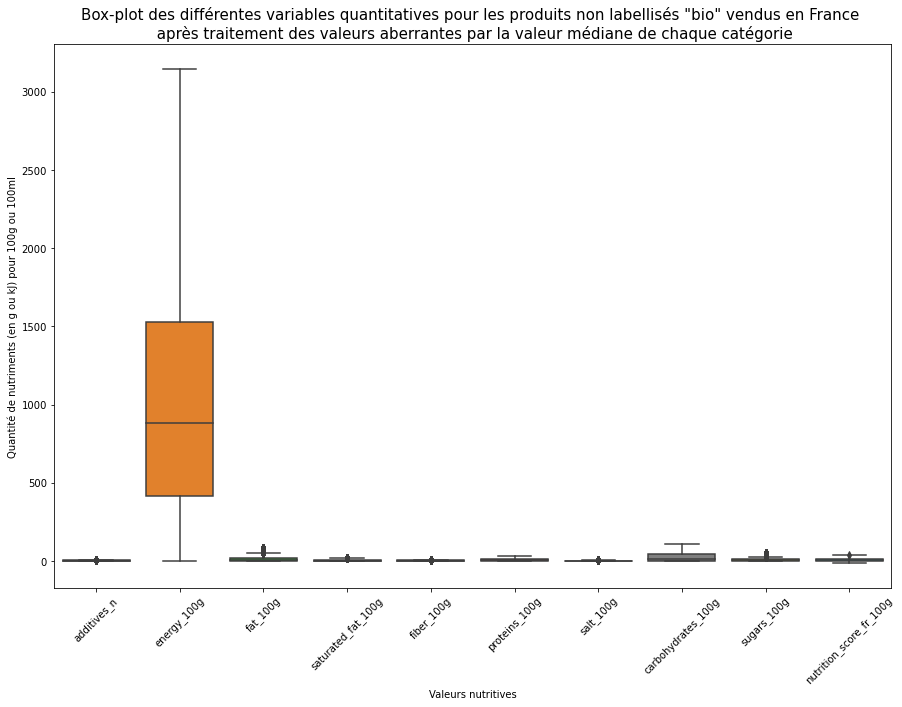

In [112]:
plt.figure(figsize = (15, 10))
sns.boxplot(data=data_non_bio_France_new[liste_variables_quantitatives])

plt.xticks(rotation=45)

plt.xlabel('Valeurs nutritives')
plt.ylabel('Quantité de nutriments (en g ou kJ) pour 100g ou 100ml')
plt.title('Box-plot des différentes variables quantitatives pour les produits non labellisés "bio" vendus en France \n après traitement des valeurs aberrantes par la valeur médiane de chaque catégorie', size = 15)

plt.show()

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


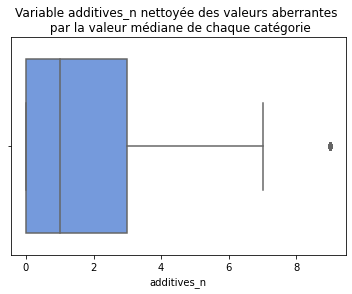

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


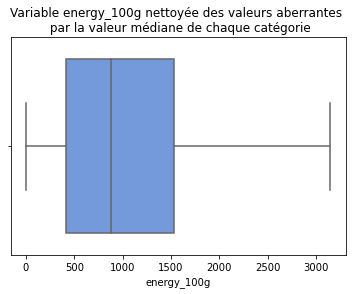

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


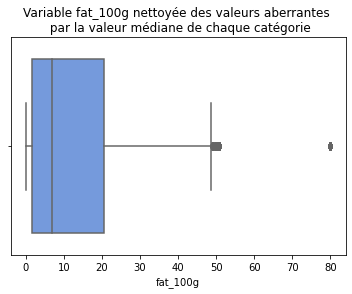

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


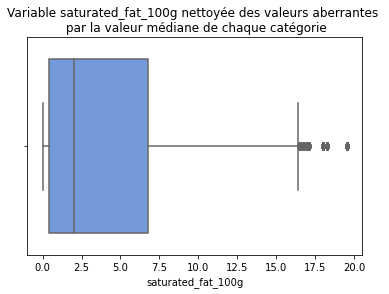

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


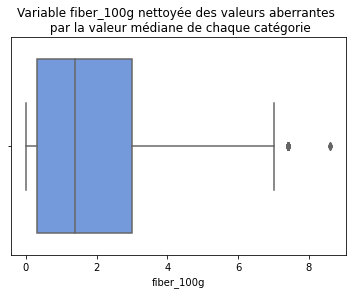

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


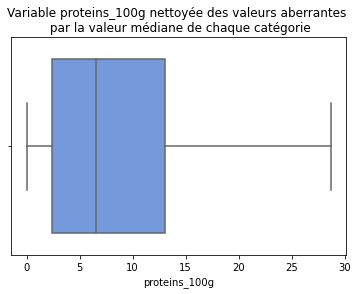

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


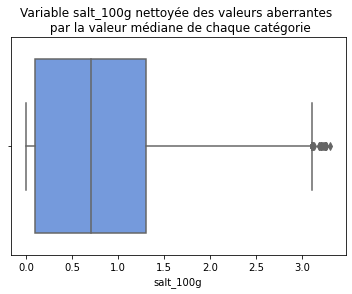

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


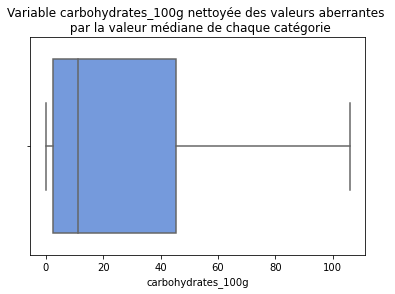

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


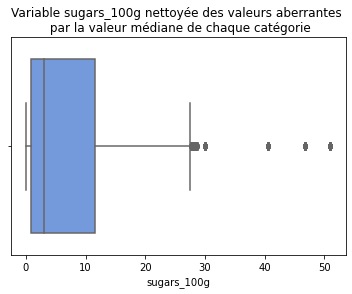

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


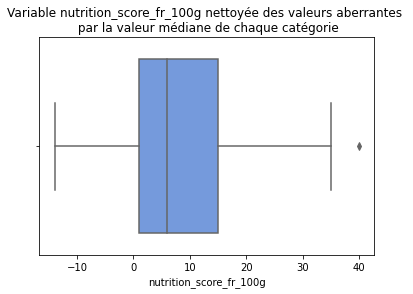

In [113]:
#Représentations graphiques (box-plots) pour chaque variable 
for variable in liste_variables_quantitatives:
    ax = sns.boxplot(data_non_bio_France_new[variable], color = 'cornflowerblue')
    ax.set_title('Variable ' + variable + ' nettoyée des valeurs aberrantes \n par la valeur médiane de chaque catégorie')
    plt.show()

#### Maintenant que nous avons traité nos valeurs aberrantes, on va vérifier que certains produits ne dépassent pas 100g, qui pourrait être considéré comme aberrant. 

In [114]:
liste_variables = ['fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 
                   'sugars_100g']

for var in liste_variables:
    print('Pour la variable', var)
    aberr = data_non_bio_France_new.loc[data_non_bio_France_new[var] > 100, :]
    display(aberr)

Pour la variable fat_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable saturated_fat_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable fiber_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable proteins_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable salt_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

Pour la variable carbohydrates_100g


code last_modified_datetime       product_name quantity  \
234726  3473710080032    2015-06-01 20:52:47  Palets pur beurre    360 g   

               brands       pnns_groups_2  \
234726  Georges Blanc  Biscuits and cakes   

                                                   labels countries  \
234726  Incorrect data on label, Incorrect nutrition f...    France   

                                         ingredients_text  additives_n  ...  \
234726  Farine de _blé_, beurre frais de baratte (_lai...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
234726      1935.0     21.3                 9.6         3.0           10.0   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
234726    1.30048               106.0         30.0                     31.0   

        nutrition_grade_fr  
234726                   e  

[1 rows x 22 columns]

Pour la variable sugars_100g


Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

#### Un seul produit ressort. En vérifiant sur internet, nous avons la bonne quantité de glucides.  

#### On va maintenant vérifier qu'il n'y a pas d'autres valeurs aberrantes en observant que les carbohydrates > sugars. 

In [115]:
data_non_bio_France_new.loc[data_non_bio_France_new['carbohydrates_100g'] < data_non_bio_France_new['sugars_100g'], :]

code last_modified_datetime  \
178787       20233679    2017-04-20 07:42:28   
196867  3173286687498    2017-04-19 18:51:01   
191163  3046920010740    2017-04-17 18:06:46   
223977  3299430063175    2017-04-17 17:48:32   
299280  7622400817410    2017-04-17 00:42:36   
...               ...                    ...   
209552  3256220268387    2014-11-18 17:01:07   
190881  3045140015849    2014-09-01 19:06:43   
292115  7613034389787    2014-05-18 17:51:14   
241207  3564700027509    2013-10-08 17:58:54   
298949  7622300070618    2013-07-17 23:52:58   

                                             product_name  \
178787                                 Halva with Almonds   
196867  Œufs Noir Truffe Fantaisie Framboise - Œufs La...   
191163                    Excellence 64% Cacao Satin Noir   
223977                                  Saveurs attitudes   
299280                                        Truffé Noir   
...                                                   ...   
209552       Ecorces d'orange confites, Chocolat noir 72%   
190881                              Carrés Noir Noisettes   
292115                  Chocolat noir cranberries amandes   
241207  Marque Repère - Tablette d'Or - Noisettes enti...   
298949                                  Pistache Noir 70%   

                    quantity                       brands       pnns_groups_2  \
178787               250 g e               Eridanous,Lidl              Sweets   
196867               185 g e                        Cémoi  Chocolate products   
191163                 100 g                        Lindt  Chocolate products   
223977                 310gr            Saveurs attitudes              Sweets   
299280                 190 g           Côte d'Or,Mondelez  Chocolate products   
...                      ...                          ...                 ...   
209552  100 g en 10 carreaux                            U  Chocolate products   
190881      200g (10 x 20 g)                    Côte d'Or  Chocolate products   
292115                 195 g                       Nestle  Chocolate products   
241207                 200 g  Marque Repère,Tablette d'Or  Chocolate products   
298949                  100g                    Côte d'Or  Chocolate products   

                                                   labels countries  \
178787                                         Point Vert    France   
196867  Transparence Cacao,Agriculture durable,Point V...    France   
191163                                         Point Vert    France   
223977  fr:Certifié FR-BIO-01, fr:Fabrication Sud-Oues...    France   
299280          Rainforest Alliance,Cocoa Life,Point Vert    France   
...                                                   ...       ...   
209552                                 100% Beurre cacaco    France   
190881                                Rainforest Alliance    France   
292115                            Sans arômes artificiels    France   
241207                                Pur Beurre de cacao    France   
298949                                Rainforest Alliance    France   

                                         ingredients_text  additives_n  ...  \
178787  50% graines de sésame moulues (Origine: Soudan...          0.0  ...   
196867  Ingrédients : sucre, graisses végétales (palme...          5.0  ...   
191163  Pâte de cacao, sucre, beurre de cacao, cacao m...          0.0  ...   
223977  'Valeurs nutritionnelles moyennes pour '100 g ...          1.0  ...   
299280  Sucre, pâte de cacao, huile de palme, beurre d...          1.0  ...   
...                                                   ...          ...  ...   
209552  Pâte de cacao, sucre, écorce d'orange confites...          2.0  ...   
190881  Sucre, pâte de cacao, noisettes entières 20%, ...          1.0  ...   
292115  Pâte de cacao (Afrique de l'Ouest, Équateur), ...          1.0  ...   
241207  Sucre, noisettes entières 27%, beurre de cacao...          1.0  ...   
298949  Pâte

In [116]:
#Plutôt que de le faire à la main, on va considérer que pour ces produits alimentaires carbohydrates_100g = sugars_100g
data_non_bio_France_new.loc[data_non_bio_France_new['carbohydrates_100g'] < data_non_bio_France_new['sugars_100g'], 'sugars_100g'] = data_non_bio_France_new['carbohydrates_100g']

In [117]:
#On vérifie que l'on a plus d'abération concernant ces deux variables
data_non_bio_France_new.loc[data_non_bio_France_new['carbohydrates_100g'] < data_non_bio_France_new['sugars_100g'], :]

Empty DataFrame
Columns: [code, last_modified_datetime, product_name, quantity, brands, pnns_groups_2, labels, countries, ingredients_text, additives_n, additives_tags, main_category_fr, energy_100g, fat_100g, saturated_fat_100g, fiber_100g, proteins_100g, salt_100g, carbohydrates_100g, sugars_100g, nutrition_score_fr_100g, nutrition_grade_fr]
Index: []

[0 rows x 22 columns]

# Traitement valeurs manquantes 

## Commençons par le traitement du nombre d'additifs, puis nous allons également traiter les valeurs manquantes pour les autres variables quantitatives. 
### Pour les produits labellisés "bio" et vendus en France

In [118]:
#Dans un premier temps, on va remplacer les espaces des noms des catégories par un underscore pour nos deux df (bio et NON bio)
#des valeurs aberrantes traitées 
data_bio_France_copy.pnns_groups_2 = data_bio_France_copy.pnns_groups_2.str.replace(' ', '_')
data_bio_France_copy.pnns_groups_2 = data_bio_France_copy.pnns_groups_2.str.replace('-', '_')
data_non_bio_France_new.pnns_groups_2 = data_non_bio_France_new.pnns_groups_2.str.replace(' ', '_')
data_non_bio_France_new.pnns_groups_2 = data_non_bio_France_new.pnns_groups_2.str.replace('-', '_')

display(data_bio_France_copy.head())
display(data_non_bio_France_new.head())

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          NaN  ...         0.0      NaN                 0.0         0.0   
289838          NaN  ...       100.0      0.0                 0.0         0.0   
254226          NaN  ...       280.0      NaN                 0.1         0.5   
253057          2.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  ...  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0  ...   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0  ...   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0  ...   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0  ...   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216      1715.0     14.0                 1.3         2.5            6.8   
205248      1042.0      0.5                 0.1         NaN            0.5   
241060      1039.0      0.1                 0.1         0.8            0.5   
224168       467.0      6.1                 6.1         1.2            6.6   
205164       179.0      0.5                 0.1         NaN            0.5   

        salt_100g  carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216      0.650                65.0          1.4                     -1.0   
205248      0.020                60.3         51.0                     12.0   
241060      0.025                60.0         51.0                     11.0   
224168      0.780                 7.0          4.4                      5.0   
205164      0.010                10.5         10.5                     13.0   

        nutrition_grade_fr  
307216                   a  
205248                   d  
241060                   d  
224168                   c  
205164                   e  

[5 rows x 22 columns]

In [119]:
#Regardons les médianes pour chaque groupe des produits bio vendus en france.
mediane_categories_bio_France = data_bio_France_copy.groupby('pnns_groups_2').median()
mediane_categories_bio_France = mediane_categories_bio_France.reset_index()
mediane_categories_bio_France

display(mediane_categories_bio_France)

pnns_groups_2  additives_n  energy_100g  fat_100g  \
0        Alcoholic_beverages         0.00       163.00     0.500   
1                 Appetizers         0.00      2008.00    24.000   
2         Biscuits_and_cakes         2.00      2010.00    22.000   
3                      Bread         0.00      1566.00     4.000   
4          Breakfast_cereals         0.00      1631.00     8.100   
5                    Cereals         0.00      1497.00     2.400   
6                     Cheese         0.00      1169.50    22.000   
7         Chocolate_products         0.00      2335.50    38.125   
8             Dairy_desserts         1.00       529.00     4.800   
9       Dressings_and_sauces         0.00       393.00     3.925   
10              Dried_fruits         0.00      1326.00     0.995   
11                      Eggs         0.00       602.00    10.300   
12                      Fats         0.00      3404.00    92.000   
13          Fish_and_seafood         0.00       738.00    10.000   
14              Fruit_juices         0.00       197.00     0.100   
15             Fruit_nectars         0.00       200.00     0.000   
16                    Fruits         0.00       266.00     0.200   
17                 Ice_cream         1.25       784.50     8.800   
18                      Meat         0.00       767.00     9.300   
19           Milk_and_yogurt         0.00       361.00     3.000   
20     Non_sugared_beverages         0.00       192.00     1.000   
21                      Nuts         0.00      2534.00    48.500   
22            One_dish_meals         0.00       631.00     5.200   
23                  Pastries         0.00      1500.50    12.550   
24     Pizza_pies_and_quiche         0.00       950.50     8.000   
25                  Potatoes         0.00       390.25     0.290   
26            Processed_meat         2.00      1051.50    20.050   
27  Salty_and_fatty_products         0.00      1879.00    20.800   
28                  Sandwich         0.00       946.00     9.600   
29                     Soups         0.00       141.00     1.000   
30       Sweetened_beverages         1.00       197.00     0.100   
31                    Sweets         0.00      1328.50     0.500   
32              Tripe_dishes         0.00       945.00    17.000   
33                Vegetables         0.00       306.00     0.700   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.100         NaN          0.500     0.0100   
1                3.200       5.575          8.000     1.3000   
2                9.600       3.500          7.000     0.5000   
3                0.500       5.425          9.755     1.1500   
4                1.500       7.600          8.800     0.0400   
5                0.500       4.000         10.800     0.0254   
6               16.000       0.000         19.000     1.0370   
7               22.500       9.100          7.900     0.0200   
8                2.500       0.800          3.650     0.1000   
9                0.600       1.600          1.600     1.5000   
10               0.300       7.075          3.050     0.0200   
11               2.700       0.000         12.300     0.3250   
12              16.000       0.000          0.000     0.0000   
13               2.200       0.000         22.000     2.0000   
14               0.000       0.200          0.400     0.0060   
15               0.000       0.500          0.500     0.0000   
16               0.010       1.900          0.400     0.0050   
17               5.650       1.100          2.845     0.1400   
18               2.500       0.000         19.000     0.2800   
19               2.100       0.000          3.500     0.1016   
20               0.100       0.400          0.500     0.0800   
21               5.900       7.400         17.775     0.0200   
22               0.900       3.500          5.500     0.8890   
23               6.725       2.400          8.500     1.1100   
24               4.200       2.100

In [120]:
#Regardons les médianes pour chaque groupe des produits NON bio vendus en France.
mediane_categories_non_bio_France = data_non_bio_France_new.groupby('pnns_groups_2').median()
mediane_categories_non_bio_France = mediane_categories_non_bio_France.reset_index()
mediane_categories_non_bio_France

display(mediane_categories_non_bio_France)

pnns_groups_2  additives_n  energy_100g  fat_100g  \
0                Alcoholic_beverages          0.0       195.00     0.000   
1                         Appetizers          1.0      2132.50    29.000   
2   Artificially_sweetened_beverages          5.0        14.00     0.000   
3                 Biscuits_and_cakes          4.0      1935.00    21.300   
4                              Bread          1.0      1228.00     4.900   
5                  Breakfast_cereals          2.0      1686.00     7.900   
6                            Cereals          0.0      1485.00     2.000   
7                             Cheese          0.0      1330.00    26.000   
8                 Chocolate_products          1.0      2269.00    34.000   
9                     Dairy_desserts          3.0       552.00     4.600   
10              Dressings_and_sauces          1.0       638.00     9.600   
11                      Dried_fruits          0.0      1219.75     0.500   
12                              Eggs          0.0       602.00    10.000   
13                              Fats          0.0      3033.00    80.000   
14                  Fish_and_seafood          0.0       711.25    10.000   
15                      Fruit_juices          0.0       199.00     0.100   
16                     Fruit_nectars          1.0       197.50     0.100   
17                            Fruits          1.0       267.00     0.300   
18                         Ice_cream          6.0       959.00    11.005   
19                              Meat          0.0       581.50     5.325   
20                   Milk_and_yogurt          0.0       350.00     2.600   
21             Non_sugared_beverages          0.0       108.00     0.000   
22                              Nuts          0.0      2573.00    50.800   
23                    One_dish_meals          2.0       567.00     6.000   
24                          Pastries          4.0      1512.50    12.900   
25             Pizza_pies_and_quiche          3.0       971.00     9.200   
26                          Potatoes          0.0       440.00     5.000   
27                    Processed_meat          2.0       968.00    15.000   
28          Salty_and_fatty_products          0.0      1788.00    19.000   
29                          Sandwich          9.0      1061.00    11.000   
30                             Soups          1.0       161.00     1.600   
31               Sweetened_beverages          2.0       179.00     0.000   
32                            Sweets          2.0      1389.00     0.500   
33                      Tripe_dishes          0.0       806.00    14.450   
34                        Vegetables          0.0       132.15     0.400   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.000      0.0000          0.400   0.022493   
1                3.000      4.0000          6.400   1.600000   
2                0.000      0.0000          0.000   0.011430   
3                9.600      2.5000          6.000   0.600000   
4                0.600      4.4000          8.800   1.180000   
5                2.500      6.1250          8.100   0.508000   
6                0.500      3.0000         11.500   0.090000   
7               18.000      0.0000         19.100   1.500000   
8               18.300      5.2000          6.600   0.120000   
9                2.900      0.3000          3.400   0.130000   
10               1.500      1.3000          1.500   1.600000   
11               0.200      6.5000          2.500   0.020000   
12               2.700      0.0000         12.300   0.320000   
13              19.550      0.0000          0.500   0.210000   
14               2.200      0.0000         17.825   1.200000   
15               0.000      0.3000          0.500   0.005080   
16               0.000      0.2000          0.300   0.010000   
17               0.050      1.7000          0.400   0.010000   
18               7.600      0.7000          3.000   0.127000   
19    

In [121]:
#On crée une fonction qui affiche les catégories pour lesquelles nous avons des valeurs manquantes 
#pour la variable correspondante

def affiche_categ_variable_manquante(nom_df, variable):
    nan_variable = nom_df.loc[nom_df[variable].isnull(), :]
    nan_variable_groupe = nan_variable.groupby('pnns_groups_2').count().reset_index()
    display(nan_variable_groupe)
    
    liste_categ_variable_manq = nan_variable_groupe['pnns_groups_2'].values.tolist()
    print(liste_categ_variable_manq)
    
    return affiche_categ_variable_manquante

### Traitement des "additifs"

In [122]:
#On compte le nombre de valeurs manquantes pour notre variable "additives_n"
total = data_bio_France_copy.shape[0]
nbre_nan = data_bio_France_copy['additives_n'].isnull().sum()

print(round(nbre_nan*100/total, 2), '% de valeurs manquantes pour la variable "additives_n"')

15.84 % de valeurs manquantes pour la variable "additives_n"


In [123]:
#On affiche les valeurs manquantes pour la variable "additives_n"
data_bio_France_copy.loc[data_bio_France_copy['additives_n'].isnull(), :]

code last_modified_datetime  \
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
252546  3760074472093    2017-04-20 17:50:11   
249529  3700036901780    2017-04-20 17:50:05   
...               ...                    ...   
214281  3261430000634    2013-05-28 01:19:21   
246279  3596710376735    2013-05-16 06:58:37   
200036  3222471835272    2013-04-28 15:23:09   
254787  3760213860125    2013-02-18 18:44:03   
279249  5411788045438    2013-01-27 22:00:14   

                                   product_name quantity  \
293049                     Perrier fines bulles      NaN   
289838                         Ginger Green Tea    500 g   
254226                           Jus de grenade      NaN   
252546                             Jus d'orange      NaN   
249529                   Purée de pommes poires    705 g   
...                                         ...      ...   
214281             Riz de Camargue long complet      1kg   
246279  15 oeufs de poules élevées en plein air       15   
200036                  6 oeufs frais de poules        6   
254787                                Cacao cru     250g   
279249   Green Bancha, Thé vert japonnais séché      NaN   

                       brands          pnns_groups_2  \
293049                Perrier  Non_sugared_beverages   
289838  Coop, Coop naturaplan  Non_sugared_beverages   
254226           Très pressés           Fruit_juices   
252546              Pronatura           Fruit_juices   
249529              Naturalia                 Fruits   
...                       ...                    ...   
214281                Bongran                Cereals   
246279                 Auchan                   Eggs   
200036                 casino                   Eggs   
254787            Sol Semilla     Chocolate_products   
279249                   Lima  Non_sugared_beverages   

                                            labels       countries  \
293049  Bio,Bio européen,AB Agriculture Biologique          France   
289838  Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226  Bio,Bio européen,AB Agriculture Biologique          France   
252546  Bio,Bio européen,AB Agriculture Biologique          France   
249529  Bio,Bio européen,AB Agriculture Biologique          France   
...                                            ...             ...   
214281             IGP,AB,Bio européen,sans gluten          France   
246279                             AB,Bio européen          France   
200036                             AB,Bio européen          France   
254787                             AB,Bio européen          France   
279249                                Bio européen          France   

       ingredients_text  additives_n  ... energy_100g fat_100g  \
293049              NaN          NaN  ...         0.0      NaN   
289838              NaN          NaN  ...       100.0      0.0   
254226              NaN          NaN  ...       280.0      NaN   
252546              NaN          NaN  ...       176.0      NaN   
249529              NaN          NaN  ...       962.0      NaN   
...                 ...          ...  ...         ...      ...   
214281              NaN          NaN  ...         NaN      NaN   
246279              NaN          NaN  ...         NaN      NaN   
200036              NaN          NaN  ...       598.0      9.9   
254787              NaN          NaN  ...      2092.0     23.0   
279249              NaN          NaN  ...         NaN      NaN   

        saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
293049                 0.0         0.0            0.0     0.0095   
289838                 0.0         0.0            0.0     0.0000   
254226                 0.1         0.5            0.6     0.0200   
252546                 0.0         0.7            0.5     0.0000   
249529                 0.5         0.0            0.6     0.3300   
... 

In [124]:
#On va regarder quels sont les produits dont on ne connait pas le nbre d'additifs, mais dont on a le nom des additifs
data_bio_France_copy.loc[(data_bio_France_copy['additives_n'] == 0) &
                       (~data_bio_France_copy['additives_tags'].isnull()), ['additives_n', 'additives_tags']]

additives_n                           additives_tags
221007          0.0                  en:e440,en:e410,en:e333
221009          0.0                  en:e440,en:e333,en:e330
260037          0.0         en:e511,en:e516,en:e412,en:e160c
197774          0.0                 en:e412,en:e415,en:e160c
221017          0.0          en:e440,en:e410,en:e333,en:e330
...             ...                                      ...
251255          0.0                  en:e500,en:e301,en:e250
220997          0.0                  en:e440,en:e410,en:e333
230739          0.0  en:e322,en:e503,en:e334,en:e502,en:e470
220990          0.0                  en:e406,en:e410,en:e333
248518          0.0         en:e14xx,en:e270,en:e412,en:e415

[67 rows x 2 columns]

#### On observe des erreurs avec des lignes dont le nombre d'additifs est de 0 tandis que nous observons tout de même la présence d'additifs dans la colonne "additives_tags". 
#### On va corriger cela en remplaçant les valeurs de la colonne "additives_n" par le nombre d'additifs comptés dans la colonne "additives_tags". 

In [125]:
#On crée une copie de notre df
data_bio_France_new_copy = data_bio_France_copy.copy()

#On divise les chaines autour du séparateur (',')
data_bio_France_new_copy.loc[:,'additives_tags'] = data_bio_France_new_copy['additives_tags'].str.split(',')

#On va remplacer la colonne "additives_n" par le comptage des différentes cellules "additives_tags". 
data_bio_France_new_copy.loc[:, 'additives_n'] = data_bio_France_new_copy['additives_tags'].str.len()

#On va attribuer aux NaN des "additives_n" la valeur de 0
data_bio_France_new_copy.loc[data_bio_France_new_copy['additives_n'].isnull(), 'additives_n'] = 0
display(data_bio_France_new_copy)

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   
...               ...                    ...   
253028  3760091729477    2012-07-20 20:01:25   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
293049                              Perrier fines bulles      NaN   
289838                                  Ginger Green Tea    500 g   
254226                                    Jus de grenade      NaN   
253057                                 Madeleines amande      NaN   
...                                                  ...      ...   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   
223014                                       Mini Jungle     160g   
230697                             Riz Épeautre Noisette       1L   
232093                               Galettes 5 céréales     130g   
212971                          Pain spécial de campagne    400 g   

                       brands          pnns_groups_2  \
230691             Bonneterre     Chocolate_products   
293049                Perrier  Non_sugared_beverages   
289838  Coop, Coop naturaplan  Non_sugared_beverages   
254226           Très pressés           Fruit_juices   
253057              Viadélice     Biscuits_and_cakes   
...                       ...                    ...   
253028             Ethiquable          Fruit_nectars   
223014                Kalibio     Biscuits_and_cakes   
230697             Bonneterre  Non_sugared_beverages   
232093           Grillon d'or                Cereals   
212971             Nature Bio                  Bread   

                                                   labels       countries  \
230691         Bio,Bio européen,AB Agriculture Biologique          France   
293049         Bio,Bio européen,AB Agriculture Biologique          France   
289838         Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226         Bio,Bio européen,AB Agriculture Biologique          France   
253057         Bio,Bio européen,AB Agriculture Biologique          France   
...                                                   ...             ...   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
223014                                                 AB          France   
230697             AB,Bio-européen,FSC,transport optimisé          France   
232093                                    AB,Bio européen          France   
212971                                    AB,Bio-européen          France   

                                         ingredients_text  additives_n  ...  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0  ...   
293049                                                NaN          0.0  ...   
289838                                                NaN          0.0  ...   
254226                                                NaN          0.0  ...   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0  ...   
...                                                   ...          ...  ...   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0  ...   
223014  Farine de blé, chocolat au lait 25% (sucre de ...          1.0  ...   
230697  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0  ...   
232093              riz, blé, maïs, avoine, sarrasin, sel          0.0  ...   
212971  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0  ...   

       energy_100g fat_100g  saturated_fat_100g  fiber_100g  pro

#### On va reconvertir nos listes de la colonne "additives_tags" en chaines de caractères

In [126]:
#On va faire une jointure des listes de la colonne "additives_tags" avec le séparateur (",")
data_bio_France_new_copy['additives_tags'] = data_bio_France_new_copy['additives_tags'].str.join(",")
display(data_bio_France_new_copy.head())

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n  ... energy_100g fat_100g  saturated_fat_100g  fiber_100g  \
230691          0.0  ...      2404.0     44.0                22.5         NaN   
293049          0.0  ...         0.0      NaN                 0.0         0.0   
289838          0.0  ...       100.0      0.0                 0.0         0.0   
254226          0.0  ...       280.0      NaN                 0.1         0.5   
253057          5.0  ...      2105.0     29.0                11.7         1.1   

        proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691           10.0     0.0300                30.0         24.0   
293049            0.0     0.0095                 NaN          0.0   
289838            0.0     0.0000                 6.0          6.0   
254226            0.6     0.0200                 NaN         14.0   
253057            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g  nutrition_grade_fr  
230691                     22.0                   e  
293049                      0.0                   b  
289838                      8.0                   d  
254226                     10.0                   e  
253057                     24.0                   e  

[5 rows x 22 columns]

### Traitement valeurs manquantes des autres variables quantitatives

In [127]:
#On va regarder le nombre de valeurs manquantes pour chaque ligne de notre df
liste_var = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 
            'sugars_100g', 'nutrition_score_fr_100g']
def nbre_elem(liste):
    count = 0
    for element in liste_var:
        count += 1
    return count

#On supprime les produits pour lesquels nous avons 100% de données manquantes pour les différentes variables. 
data_bio_France_new_copy['taux_val_manq'] = data_bio_France_new_copy[liste_var].isnull().sum(axis=1)/nbre_elem(liste_var)*100
data_bio_France_new_copy = data_bio_France_new_copy.drop(data_bio_France_new_copy[data_bio_France_new_copy['taux_val_manq'] == 100].index)
data_bio_France_new_copy

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   
...               ...                    ...   
253028  3760091729477    2012-07-20 20:01:25   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
293049                              Perrier fines bulles      NaN   
289838                                  Ginger Green Tea    500 g   
254226                                    Jus de grenade      NaN   
253057                                 Madeleines amande      NaN   
...                                                  ...      ...   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   
223014                                       Mini Jungle     160g   
230697                             Riz Épeautre Noisette       1L   
232093                               Galettes 5 céréales     130g   
212971                          Pain spécial de campagne    400 g   

                       brands          pnns_groups_2  \
230691             Bonneterre     Chocolate_products   
293049                Perrier  Non_sugared_beverages   
289838  Coop, Coop naturaplan  Non_sugared_beverages   
254226           Très pressés           Fruit_juices   
253057              Viadélice     Biscuits_and_cakes   
...                       ...                    ...   
253028             Ethiquable          Fruit_nectars   
223014                Kalibio     Biscuits_and_cakes   
230697             Bonneterre  Non_sugared_beverages   
232093           Grillon d'or                Cereals   
212971             Nature Bio                  Bread   

                                                   labels       countries  \
230691         Bio,Bio européen,AB Agriculture Biologique          France   
293049         Bio,Bio européen,AB Agriculture Biologique          France   
289838         Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226         Bio,Bio européen,AB Agriculture Biologique          France   
253057         Bio,Bio européen,AB Agriculture Biologique          France   
...                                                   ...             ...   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
223014                                                 AB          France   
230697             AB,Bio-européen,FSC,transport optimisé          France   
232093                                    AB,Bio européen          France   
212971                                    AB,Bio-européen          France   

                                         ingredients_text  additives_n  ...  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0  ...   
293049                                                NaN          0.0  ...   
289838                                                NaN          0.0  ...   
254226                                                NaN          0.0  ...   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0  ...   
...                                                   ...          ...  ...   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0  ...   
223014  Farine de blé, chocolat au lait 25% (sucre de ...          1.0  ...   
230697  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0  ...   
232093              riz, blé, maïs, avoine, sarrasin, sel          0.0  ...   
212971  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0  ...   

       fat_100g saturated_fat_100g  fiber_100g  proteins_100g  s

In [128]:
#On va compléter les valeurs manquantes pour la variable "energy_100g" en remplaçant par la valeur médiane de chaque catégorie. 
affiche_categ_variable_manquante(data_bio_France_new_copy, 'energy_100g')
liste_categ_energy = ['Alcoholic_beverages', 'Biscuits_and_cakes', 'Bread', 'Cheese', 'Eggs', 'Fats', 'Fruits', 'Meat', 
                      'Non_sugared_beverages', 'Sweetened_beverages', 'Sweets']

for categ in liste_categ_energy:
    mediane_categ_energy = mediane_categorie_variable(mediane_categories_bio_France, categ, 'energy_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                             (data_bio_France_new_copy['energy_100g'].isnull()), 'energy_100g'] = mediane_categ_energy

display(data_bio_France_new_copy)

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1      Biscuits_and_cakes     1                       1             1   
2                   Bread     1                       1             1   
3                  Cheese     8                       8             8   
4                    Eggs     1                       1             1   
5                    Fats     3                       3             3   
6                  Fruits     1                       1             1   
7                    Meat     8                       8             8   
8   Non_sugared_beverages     2                       2             2   
9     Sweetened_beverages     1                       1             1   
10                 Sweets     3                       3             3   

    quantity  brands  labels  countries  ingredients_text  additives_n  ...  \
0          1       1       1          1                 1            1  ...   
1          1       1       1          1                 1            1  ...   
2          1       1       1          1                 1            1  ...   
3          8       8       8          8                 6            8  ...   
4          1       1       1          1                 0            1  ...   
5          3       3       3          3                 3            3  ...   
6          0       1       1          1                 1            1  ...   
7          8       8       8          8                 8            8  ...   
8          2       2       2          2                 2            2  ...   
9          1       1       1          1                 1            1  ...   
10         3       3       3          3                 3            3  ...   

    fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0          0                   0           0              0          0   
1          1                   0           0              1          0   
2          0                   0           0              0          0   
3          8                   0           0              0          0   
4          0                   0           0              0          0   
5          3                   0           0              0          0   
6          0                   0           0              0          0   
7          8                   0           0              0          0   
8          0                   0           0              0          1   
9          0                   0           0              0          0   
10         0                   0           0              0          0   

    carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
0                    0            1                        0   
1                    1            0                        0   
2                    0            0                        1   
3                    0            0                        0   
4                    0            0                        1   
5                    0            0                        0   
6                    0            1                        0   
7                    0            0                        0   
8                    0            0                        1   
9                    0            0                        1   
10                   0            3                        0   

    nutrition_grade_fr  taux_val_manq  
0                    0              1  
1                    0              1  
2                    1              1  
3                    0              8  
4                    1              1  
5                    0              3  
6                    0              1  
7                    0              8  
8                    1              2  
9                    1              1  
10                   0              3  

[11 rows x 23 columns]

['Alcoholic_beverages', 'Biscuits_and_cakes', 'Bread', 'Cheese', 'Eggs', 'Fats', 'Fruits', 'Meat', 'Non_sugared_beverages', 'Sweetened_beverages', 'Sweets']
163.0
2010.0
1566.0
1169.5
602.0
3404.0
266.0
767.0
192.0
197.0
1328.5


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   
...               ...                    ...   
253028  3760091729477    2012-07-20 20:01:25   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
293049                              Perrier fines bulles      NaN   
289838                                  Ginger Green Tea    500 g   
254226                                    Jus de grenade      NaN   
253057                                 Madeleines amande      NaN   
...                                                  ...      ...   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   
223014                                       Mini Jungle     160g   
230697                             Riz Épeautre Noisette       1L   
232093                               Galettes 5 céréales     130g   
212971                          Pain spécial de campagne    400 g   

                       brands          pnns_groups_2  \
230691             Bonneterre     Chocolate_products   
293049                Perrier  Non_sugared_beverages   
289838  Coop, Coop naturaplan  Non_sugared_beverages   
254226           Très pressés           Fruit_juices   
253057              Viadélice     Biscuits_and_cakes   
...                       ...                    ...   
253028             Ethiquable          Fruit_nectars   
223014                Kalibio     Biscuits_and_cakes   
230697             Bonneterre  Non_sugared_beverages   
232093           Grillon d'or                Cereals   
212971             Nature Bio                  Bread   

                                                   labels       countries  \
230691         Bio,Bio européen,AB Agriculture Biologique          France   
293049         Bio,Bio européen,AB Agriculture Biologique          France   
289838         Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226         Bio,Bio européen,AB Agriculture Biologique          France   
253057         Bio,Bio européen,AB Agriculture Biologique          France   
...                                                   ...             ...   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
223014                                                 AB          France   
230697             AB,Bio-européen,FSC,transport optimisé          France   
232093                                    AB,Bio européen          France   
212971                                    AB,Bio-européen          France   

                                         ingredients_text  additives_n  ...  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0  ...   
293049                                                NaN          0.0  ...   
289838                                                NaN          0.0  ...   
254226                                                NaN          0.0  ...   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0  ...   
...                                                   ...          ...  ...   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0  ...   
223014  Farine de blé, chocolat au lait 25% (sucre de ...          1.0  ...   
230697  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0  ...   
232093              riz, blé, maïs, avoine, sarrasin, sel          0.0  ...   
212971  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0  ...   

       fat_100g saturated_fat_100g  fiber_100g  proteins_100g  s

In [129]:
#On souhaite afficher toutes nos colonnes
pd.set_option('display.max_columns', None)
data_bio_France_new_copy.head()

code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       NaN                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       NaN                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         NaN           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 NaN          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                 NaN         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [130]:
#On affiche les données manquantes pour les autres variables non traitées
liste = ['fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 'sugars_100g']

for var in liste:
    print('Valeurs manquantes pour la variable', var)
    data_bio_nul = data_bio_France_new_copy.loc[data_bio_France_new_copy[var].isnull(), :]
    display(data_bio_nul)

Valeurs manquantes pour la variable fat_100g


code last_modified_datetime  \
293049  7613035833302    2017-04-20 17:50:51   
254226  3760159828654    2017-04-20 17:50:21   
252546  3760074472093    2017-04-20 17:50:11   
249529  3700036901780    2017-04-20 17:50:05   
249514  3700036901025    2017-04-20 17:50:05   
...               ...                    ...   
223011  3288131600147    2014-02-03 18:44:18   
188389  3022820420315    2014-02-03 11:57:37   
230698  3396410048174    2013-10-28 20:41:06   
246279  3596710376735    2013-05-16 06:58:37   
237341  3551120010075    2013-01-23 09:10:00   

                                   product_name quantity               brands  \
293049                     Perrier fines bulles      NaN              Perrier   
254226                           Jus de grenade      NaN         Très pressés   
252546                             Jus d'orange      NaN            Pronatura   
249529                   Purée de pommes poires    705 g            Naturalia   
249514                           Figues séchées    500 g            Naturalia   
...                                         ...      ...                  ...   
223011        Cool Fruits Pomme Fraise Myrtille     90 g              KaliBio   
188389                Chou rouge lacto-fermenté    300 g            Nutriform   
230698                         Pur Jus de Pomme      1 l           Bonneterre   
246279  15 oeufs de poules élevées en plein air       15               Auchan   
237341     Brise de Châtaignes variété Pourette    500 g  Domaine de la Balan   

                pnns_groups_2  \
293049  Non_sugared_beverages   
254226           Fruit_juices   
252546           Fruit_juices   
249529                 Fruits   
249514           Dried_fruits   
...                       ...   
223011                 Fruits   
188389             Vegetables   
230698           Fruit_juices   
246279                   Eggs   
237341                   Nuts   

                                                 labels countries  \
293049       Bio,Bio européen,AB Agriculture Biologique    France   
254226       Bio,Bio européen,AB Agriculture Biologique    France   
252546       Bio,Bio européen,AB Agriculture Biologique    France   
249529       Bio,Bio européen,AB Agriculture Biologique    France   
249514       Bio,Bio européen,AB Agriculture Biologique    France   
...                                                 ...       ...   
223011       Bio européen,AB Agriculture Biologique,Bio    France   
188389       Bio européen,AB Agriculture Biologique,Bio    France   
230698           AB Agriculture Biologique,Bio européen    France   
246279                                  AB,Bio européen    France   
237341  Agriculture Biologique,Nature & Progrès,Ecocert    France   

                                         ingredients_text  additives_n  \
293049                                                NaN          0.0   
254226                                                NaN          0.0   
252546                                                NaN          0.0   
249529                                                NaN          0.0   
249514                                                NaN          0.0   
...                                                   ...          ...   
223011  Pommes* 67%, fraises* 20%, concentré de fruits...          0.0   
188389  Chou rouge* lactofermenté (chou rouge*, sel ma...          1.0   
230698                                      Jus de Pomme.          0.0   
246279                                                NaN          0.0   
237341                        Châtaignes variété Pourette          0.0   

       additives_tags            main_category_fr  energy_100g  fat_100g  \
293049            NaN                    Boissons          0.0       NaN   
254226            NaN  Jus de fruits 100% pur jus        280.0       NaN   
252546            NaN                Jus d'orange        176.0       NaN   
249529            NaN                    Dessert

Valeurs manquantes pour la variable saturated_fat_100g


code last_modified_datetime  \
209145  3254690086203    2017-04-19 07:56:55   
217926  3266191008134    2017-04-18 15:25:22   
252860  3760087361001    2017-04-17 12:42:58   
263822       41526873    2017-04-17 09:39:34   
266665  4502278881566    2017-04-11 19:59:25   
...               ...                    ...   
237341  3551120010075    2013-01-23 09:10:00   
221731  3276559447055    2012-12-12 15:28:59   
225198  3329488511202    2012-12-11 14:02:47   
258179  4006040160984    2012-11-18 20:51:26   
253028  3760091729477    2012-07-20 20:01:25   

                                            product_name quantity  \
209145                                Le Bio Multifruits    1,5 l   
217926                   Muesli Petit épeautre Framboise    375 g   
252860  Poudre de cacao cru, sans sucre, qualité premium    200 g   
263822                                        Figues Bio    350 g   
266665           Jus de raisin bio 100% pur fruit pressé      1 l   
...                                                  ...      ...   
237341              Brise de Châtaignes variété Pourette    500 g   
221731                                       clémentines      1Kg   
225198                      Graines Sésame blond complet     500g   
258179                                       Tiger creme     250g   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   

                         brands       pnns_groups_2  \
209145                 Pressade       Fruit_nectars   
217926            La Vie Claire   Breakfast_cereals   
252860    Ethnoscience,Ecoidées  Chocolate_products   
263822   Les Comtes de Provence              Sweets   
266665  Carrefour,Carrefour Bio        Fruit_juices   
...                         ...                 ...   
237341      Domaine de la Balan                Nuts   
221731                carrefour              Fruits   
225198                   Markal             Cereals   
258179                 Rapunzel              Sweets   
253028               Ethiquable       Fruit_nectars   

                                                   labels countries  \
209145  Bio,Bio européen,FSC,FR-BIO-01,AB Agriculture ...    France   
217926         Bio,Bio européen,AB Agriculture Biologique    France   
252860      Bio,Bio européen,FR-BIO-01,Agriculture non UE    France   
263822                                   Bio,Bio européen    France   
266665             AB Agriculture Biologique,Bio européen    France   
...                                                   ...       ...   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   
221731                                       AB,FR-BIO-01    France   
225198                                       Bio européen    France   
258179                                                 AB    France   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                         ingredients_text  additives_n  \
209145  Jus de fruits à base de jus concentrés, jus et...          0.0   
217926  flocons de petit _épeautre_ toastés (50%), flo...          0.0   
252860               Poudre de fèves de cacao dégraissée.          0.0   
263822  figues (63%), sucre de canne, acidifiant : jus...          1.0   
266665  Jus de raisin rouge*, jus de raisin blanc*. *I...          0.0   
...                                                   ...          ...   
237341                        Châtaignes variété Pourette          0.0   
221731                                        clémentines          0.0   
225198                 graines de sésame blond biologique          0.0   
258179  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   

       additives_tags                         main_category_fr  energy_100g  \
209145            NaN                        Nectars de fruits         48.0   
217926            NaN                          Pet

Valeurs manquantes pour la variable fiber_100g


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
220505  3272030353235    2017-04-20 17:49:27   
223349  3291960011114    2017-04-20 17:49:14   
188469  3023260030966    2017-04-20 08:25:16   
219905  3270190025504    2017-04-20 08:09:50   
...               ...                    ...   
229702  3380380060571    2013-01-29 11:00:32   
237341  3551120010075    2013-01-23 09:10:00   
258179  4006040160984    2012-11-18 20:51:26   
245433  3596710309658    2012-08-04 13:39:37   
253028  3760091729477    2012-07-20 20:01:25   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
220505               Pur jus pomme 100% pur fruit pressé    75 cl   
223349                                   Huile De Sésame      NaN   
188469                                     Roquefort AOP    100 g   
219905                             Crème fraîche épaisse    20 cl   
...                                                  ...      ...   
229702                                        Riz violet     500g   
237341              Brise de Châtaignes variété Pourette    500 g   
258179                                       Tiger creme     250g   
245433    Fromage blanc issu de l'agriculture biologique   500 g.   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   

                         brands       pnns_groups_2  \
230691               Bonneterre  Chocolate_products   
220505       Moulin de Valdonne        Fruit_juices   
223349               Emile Noël                Fats   
188469                     Lidl              Cheese   
219905  Carrefour Bio,Carrefour     Milk_and_yogurt   
...                         ...                 ...   
229702                  Priméal             Cereals   
237341      Domaine de la Balan                Nuts   
258179                 Rapunzel              Sweets   
245433                   Auchan              Cheese   
253028               Ethiquable       Fruit_nectars   

                                                   labels countries  \
230691         Bio,Bio européen,AB Agriculture Biologique    France   
220505  Bio,Bio européen,Sans colorants,Sans conservat...    France   
223349         Bio,Bio européen,AB Agriculture Biologique    France   
188469                            Bio,AB,Bio européen,AOP    France   
219905                                Bio,AB,Bio européen    France   
...                                                   ...       ...   
229702                                Bio,AB,Bio européen    France   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   
258179                                                 AB    France   
245433                                bio,AB,bio européen    France   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                         ingredients_text  additives_n  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0   
220505  Jus de pomme*. * Ingrédient issu de l'agricult...          0.0   
223349  100% d'huile vierge de Sésame biologique de pr...          0.0   
188469  _lait_ cru de brebis*, sel, ferments lactiques...          0.0   
219905  Crème fraîche pasteurisée biologique, ferments...          0.0   
...                                                   ...          ...   
229702                   riz thaï noir, riz thaï blanc.            0.0   
237341                        Châtaignes variété Pourette          0.0   
258179  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
245433  lait pasteurisé partiellement écrémé (issu de ...          0.0   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   

       additives_tags   main_category_fr  energy_100g  fat_100g  \
230691            NaN          Chocolats       2404.0      44.0   
220505            NaN       Jus de pomme        226.0       0.0   
223349 

Valeurs manquantes pour la variable proteins_100g


code last_modified_datetime  \
178028       20116712    2017-04-04 08:10:51   
254719  3760205420207    2017-04-03 11:22:02   
210071  3256221116618    2017-03-24 11:53:28   
209994  3256221091618    2017-03-23 13:25:50   
214064  3259810009919    2017-03-23 13:24:05   
...               ...                    ...   
188389  3022820420315    2014-02-03 11:57:37   
232973  3438860001887    2014-02-03 11:25:51   
209674  3256220368087    2013-06-17 16:58:47   
246279  3596710376735    2013-05-16 06:58:37   
237341  3551120010075    2013-01-23 09:10:00   

                                   product_name   quantity  \
178028                       Galette de riz bio      100 g   
254719              Petit Saint-Paulin (29% MG)      250 g   
210071                      Sirop Grenadine bio      50 cL   
209994             Pointe de brie Bio (21 % MG)      180 g   
214064    Huile d'olive vierge extra Bio Soléou        1 L   
...                                         ...        ...   
188389                Chou rouge lacto-fermenté      300 g   
232973                Yaourts de Chèvre Vanille  2 x 125 g   
209674                Huile vierge de colza Bio     750 ml   
246279  15 oeufs de poules élevées en plein air         15   
237341     Brise de Châtaignes variété Pourette      500 g   

                            brands        pnns_groups_2  \
178028                      Sondey              Cereals   
254719  La Fromagerie Bio du Maine               Cheese   
210071                     U bio,U  Sweetened_beverages   
209994                     U bio,U               Cheese   
214064                      Soléou                 Fats   
...                            ...                  ...   
188389                   Nutriform           Vegetables   
232973             Bernard Gaborit      Milk_and_yogurt   
209674                     U,U-bio                 Fats   
246279                      Auchan                 Eggs   
237341         Domaine de la Balan                 Nuts   

                                                   labels countries  \
178028  Bio,Agriculture durable,Bio européen,UTZ Certi...    France   
254719  Bio,Bio européen,FR-BIO-01,Bio-Cohérence,Agric...    France   
210071         Bio,Bio européen,AB Agriculture Biologique    France   
209994  Bio,Bio européen,AB Agriculture Biologique,Poi...    France   
214064         Bio,Bio européen,AB Agriculture Biologique    France   
...                                                   ...       ...   
188389         Bio européen,AB Agriculture Biologique,Bio    France   
232973  Bio européen,Bio,Fabrication Traditionnelle,Bi...    France   
209674                                                 AB    France   
246279                                    AB,Bio européen    France   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   

                                         ingredients_text  additives_n  \
178028                                                NaN          0.0   
254719  _Lait_ cru entier Bio, sel de Guérande, fermen...          0.0   
210071  Pur sucre de canne, eau, jus de fruits à base ...          1.0   
209994  Lait de vache pasteurisé, sel, ferments, présure.          0.0   
214064  HUILE D'OLIVE VIERGE EXTRA BIOLOGIQUE 5kg d'ol...          0.0   
...                                                   ...          ...   
188389  Chou rouge* lactofermenté (chou rouge*, sel ma...          1.0   
232973  *Lait entier de chèvre, *sucre de canne roux n...          0.0   
209674                                     Huile de colza          0.0   
246279                                                NaN          0.0   
237341                        Châtaignes variété Pourette          0.0   

       additives_tags                         main_category_fr  energy_100g  \
178028            NaN  Aliments et boissons à base de végétaux       2042.0   
254719            NaN                                 Fromages       1169.5   
210071 

Valeurs manquantes pour la variable salt_100g


code last_modified_datetime  \
209145  3254690086203    2017-04-19 07:56:55   
217926  3266191008134    2017-04-18 15:25:22   
252860  3760087361001    2017-04-17 12:42:58   
263822       41526873    2017-04-17 09:39:34   
220053  3270190146421    2017-04-12 23:06:00   
...               ...                    ...   
237341  3551120010075    2013-01-23 09:10:00   
221731  3276559447055    2012-12-12 15:28:59   
225198  3329488511202    2012-12-11 14:02:47   
258179  4006040160984    2012-11-18 20:51:26   
253028  3760091729477    2012-07-20 20:01:25   

                                            product_name quantity  \
209145                                Le Bio Multifruits    1,5 l   
217926                   Muesli Petit épeautre Framboise    375 g   
252860  Poudre de cacao cru, sans sucre, qualité premium    200 g   
263822                                        Figues Bio    350 g   
220053                       Farine de blé semi complète     1 kg   
...                                                  ...      ...   
237341              Brise de Châtaignes variété Pourette    500 g   
221731                                       clémentines      1Kg   
225198                      Graines Sésame blond complet     500g   
258179                                       Tiger creme     250g   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   

                         brands       pnns_groups_2  \
209145                 Pressade       Fruit_nectars   
217926            La Vie Claire   Breakfast_cereals   
252860    Ethnoscience,Ecoidées  Chocolate_products   
263822   Les Comtes de Provence              Sweets   
220053  Carrefour,Carrefour BIO             Cereals   
...                         ...                 ...   
237341      Domaine de la Balan                Nuts   
221731                carrefour              Fruits   
225198                   Markal             Cereals   
258179                 Rapunzel              Sweets   
253028               Ethiquable       Fruit_nectars   

                                                   labels countries  \
209145  Bio,Bio européen,FSC,FR-BIO-01,AB Agriculture ...    France   
217926         Bio,Bio européen,AB Agriculture Biologique    France   
252860      Bio,Bio européen,FR-BIO-01,Agriculture non UE    France   
263822                                   Bio,Bio européen    France   
220053         Bio,Bio européen,AB Agriculture Biologique    France   
...                                                   ...       ...   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   
221731                                       AB,FR-BIO-01    France   
225198                                       Bio européen    France   
258179                                                 AB    France   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                         ingredients_text  additives_n  \
209145  Jus de fruits à base de jus concentrés, jus et...          0.0   
217926  flocons de petit _épeautre_ toastés (50%), flo...          0.0   
252860               Poudre de fèves de cacao dégraissée.          0.0   
263822  figues (63%), sucre de canne, acidifiant : jus...          1.0   
220053                     Farine de _blé_ bio T110 100%.          0.0   
...                                                   ...          ...   
237341                        Châtaignes variété Pourette          0.0   
221731                                        clémentines          0.0   
225198                 graines de sésame blond biologique          0.0   
258179  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   

       additives_tags                         main_category_fr  energy_100g  \
209145            NaN                        Nectars de fruits         48.0   
217926            NaN                          Pet

Valeurs manquantes pour la variable carbohydrates_100g


code last_modified_datetime  \
293049  7613035833302    2017-04-20 17:50:51   
254226  3760159828654    2017-04-20 17:50:21   
252546  3760074472093    2017-04-20 17:50:11   
249529  3700036901780    2017-04-20 17:50:05   
249514  3700036901025    2017-04-20 17:50:05   
...               ...                    ...   
208313  3252920015658    2014-04-21 18:41:51   
188389  3022820420315    2014-02-03 11:57:37   
209674  3256220368087    2013-06-17 16:58:47   
246279  3596710376735    2013-05-16 06:58:37   
237341  3551120010075    2013-01-23 09:10:00   

                                     product_name quantity  \
293049                       Perrier fines bulles      NaN   
254226                             Jus de grenade      NaN   
252546                               Jus d'orange      NaN   
249529                     Purée de pommes poires    705 g   
249514                             Figues séchées    500 g   
...                                           ...      ...   
208313  Beurre de baratte biologique, au lait cru    250 g   
188389                  Chou rouge lacto-fermenté    300 g   
209674                  Huile vierge de colza Bio   750 ml   
246279    15 oeufs de poules élevées en plein air       15   
237341       Brise de Châtaignes variété Pourette    500 g   

                     brands          pnns_groups_2  \
293049              Perrier  Non_sugared_beverages   
254226         Très pressés           Fruit_juices   
252546            Pronatura           Fruit_juices   
249529            Naturalia                 Fruits   
249514            Naturalia           Dried_fruits   
...                     ...                    ...   
208313      Grandeur nature                   Fats   
188389            Nutriform             Vegetables   
209674              U,U-bio                   Fats   
246279               Auchan                   Eggs   
237341  Domaine de la Balan                   Nuts   

                                                   labels countries  \
293049         Bio,Bio européen,AB Agriculture Biologique    France   
254226         Bio,Bio européen,AB Agriculture Biologique    France   
252546         Bio,Bio européen,AB Agriculture Biologique    France   
249529         Bio,Bio européen,AB Agriculture Biologique    France   
249514         Bio,Bio européen,AB Agriculture Biologique    France   
...                                                   ...       ...   
208313  Bio européen,AB Agriculture Biologique,100% na...    France   
188389         Bio européen,AB Agriculture Biologique,Bio    France   
209674                                                 AB    France   
246279                                    AB,Bio européen    France   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   

                                         ingredients_text  additives_n  \
293049                                                NaN          0.0   
254226                                                NaN          0.0   
252546                                                NaN          0.0   
249529                                                NaN          0.0   
249514                                                NaN          0.0   
...                                                   ...          ...   
208313  Crème de lait, ferments lactiques sélectionnée...          0.0   
188389  Chou rouge* lactofermenté (chou rouge*, sel ma...          1.0   
209674                                     Huile de colza          0.0   
246279                                                NaN          0.0   
237341                        Châtaignes variété Pourette          0.0   

       additives_tags            main_category_fr  energy_100g  fat_100g  \
293049            NaN                    Boissons          0.0       NaN   
254226            NaN  Jus de fruits 100% pur jus        280.0       NaN   
252546            NaN                Jus d'orange        176.0       NaN   


Valeurs manquantes pour la variable sugars_100g


code last_modified_datetime  \
209145  3254690086203    2017-04-19 07:56:55   
217926  3266191008134    2017-04-18 15:25:22   
252860  3760087361001    2017-04-17 12:42:58   
263822       41526873    2017-04-17 09:39:34   
197766  3176800031852    2017-04-08 18:40:02   
...               ...                    ...   
229702  3380380060571    2013-01-29 11:00:32   
237341  3551120010075    2013-01-23 09:10:00   
225198  3329488511202    2012-12-11 14:02:47   
258179  4006040160984    2012-11-18 20:51:26   
253028  3760091729477    2012-07-20 20:01:25   

                                            product_name quantity  \
209145                                Le Bio Multifruits    1,5 l   
217926                   Muesli Petit épeautre Framboise    375 g   
252860  Poudre de cacao cru, sans sucre, qualité premium    200 g   
263822                                        Figues Bio    350 g   
197766                                           Potabio  8,5g x2   
...                                                  ...      ...   
229702                                        Riz violet     500g   
237341              Brise de Châtaignes variété Pourette    500 g   
225198                      Graines Sésame blond complet     500g   
258179                                       Tiger creme     250g   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   

                        brands       pnns_groups_2  \
209145                Pressade       Fruit_nectars   
217926           La Vie Claire   Breakfast_cereals   
252860   Ethnoscience,Ecoidées  Chocolate_products   
263822  Les Comtes de Provence              Sweets   
197766                 nat ali               Soups   
...                        ...                 ...   
229702                 Priméal             Cereals   
237341     Domaine de la Balan                Nuts   
225198                  Markal             Cereals   
258179                Rapunzel              Sweets   
253028              Ethiquable       Fruit_nectars   

                                                   labels countries  \
209145  Bio,Bio européen,FSC,FR-BIO-01,AB Agriculture ...    France   
217926         Bio,Bio européen,AB Agriculture Biologique    France   
252860      Bio,Bio européen,FR-BIO-01,Agriculture non UE    France   
263822                                   Bio,Bio européen    France   
197766  Bio,Bio européen,Sans huile de palme,AB Agricu...    France   
...                                                   ...       ...   
229702                                Bio,AB,Bio européen    France   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   
225198                                       Bio européen    France   
258179                                                 AB    France   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                         ingredients_text  additives_n  \
209145  Jus de fruits à base de jus concentrés, jus et...          0.0   
217926  flocons de petit _épeautre_ toastés (50%), flo...          0.0   
252860               Poudre de fèves de cacao dégraissée.          0.0   
263822  figues (63%), sucre de canne, acidifiant : jus...          1.0   
197766  Crème de sarrasin, légumes 28% (oignon, pomme ...          2.0   
...                                                   ...          ...   
229702                   riz thaï noir, riz thaï blanc.            0.0   
237341                        Châtaignes variété Pourette          0.0   
225198                 graines de sésame blond biologique          0.0   
258179  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   

         additives_tags                         main_category_fr  energy_100g  \
209145              NaN                        Nectars de fruits         48.0   
217926              NaN                          Petit-déj

In [131]:
#Pour la variable "fat_100g", on va attribuer la valeur médiane pour chaque catégorie

affiche_categ_variable_manquante(data_bio_France_new_copy, 'fat_100g')
liste_categ_fat = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 
                   'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 
                   'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Milk_and_yogurt', 'Non_sugared_beverages', 
                   'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 'Soups', 
                   'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_fat:
    mediane_categ_fat = mediane_categorie_variable(mediane_categories_bio_France, categ, 'fat_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['fat_100g'].isnull()), 'fat_100g'] = mediane_categ_fat

display(data_bio_France_new_copy)

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1              Appetizers     4                       4             4   
2      Biscuits_and_cakes    30                      30            30   
3                   Bread    14                      14            14   
4       Breakfast_cereals    18                      18            18   
5                 Cereals    51                      51            51   
6                  Cheese    14                      14            14   
7      Chocolate_products    26                      26            26   
8          Dairy_desserts     2                       2             2   
9    Dressings_and_sauces    21                      21            20   
10           Dried_fruits    12                      12            12   
11                   Eggs     7                       7             7   
12                   Fats    18                      18            18   
13       Fish_and_seafood     9                       9             9   
14           Fruit_juices    74                      74            74   
15          Fruit_nectars     9                       9             9   
16                 Fruits    17                      17            17   
17        Milk_and_yogurt    23                      23            23   
18  Non_sugared_beverages    59                      59            59   
19                   Nuts     7                       7             7   
20         One_dish_meals     9                       9             9   
21               Pastries     2                       2             2   
22  Pizza_pies_and_quiche     2                       2             2   
23         Processed_meat     2                       2             2   
24                  Soups     5                       5             5   
25    Sweetened_beverages    15                      15            15   
26                 Sweets    52                      52            52   
27             Vegetables    28                      28            28   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          1       1       1          1                 1            1   
1          2       4       4          4                 1            4   
2         14      30      30         30                 3           30   
3         10      14      14         14                 3           14   
4         12      18      18         18                 2           18   
5         43      51      51         51                19           51   
6          8      14      14         14                 3           14   
7         14      26      26         26                 9           26   
8          1       2       2          2                 0            2   
9         16      21      21         21                 7           21   
10         9      11      12         12                 6           12   
11         6       7       7          7                 4            7   
12        15      18      18         18                 3           18   
13         6       9       9          9                 5            9   
14        27      72      74         74                13           74   
15         6       9       9          9                 5            9   
16        12      17      17         17                 6           17   
17        12      23      23         23                 5           23   
18        25      59      59         59                 7           59   
19         6       7       7          7                 4            7   
20         7       9       9          9                 5            9   
21         2       2       2          2                 0            2   
22         1       2       2          2                 0            2   
23         2       2       2          2                 1            2   
24         3       5       5          5     

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
0.5
24.0
22.0
4.0
8.1
2.4
22.0
38.125
4.8
3.925
0.9950000000000001
10.3
92.0
10.0
0.1
0.0
0.2
3.0
1.0
48.5
5.2
12.55
8.0
20.049999999999997
1.0
0.1
0.5
0.7


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   
...               ...                    ...   
253028  3760091729477    2012-07-20 20:01:25   
223014  3288131600314    2012-07-14 11:16:26   
230697  3396410048105    2012-07-07 10:51:56   
232093  3421557904004    2012-06-13 19:06:35   
212971  3257983358032    2012-06-04 23:12:24   

                                            product_name quantity  \
230691             Chocolat Noir Costa Rica 75% De Cacao     70 g   
293049                              Perrier fines bulles      NaN   
289838                                  Ginger Green Tea    500 g   
254226                                    Jus de grenade      NaN   
253057                                 Madeleines amande      NaN   
...                                                  ...      ...   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   
223014                                       Mini Jungle     160g   
230697                             Riz Épeautre Noisette       1L   
232093                               Galettes 5 céréales     130g   
212971                          Pain spécial de campagne    400 g   

                       brands          pnns_groups_2  \
230691             Bonneterre     Chocolate_products   
293049                Perrier  Non_sugared_beverages   
289838  Coop, Coop naturaplan  Non_sugared_beverages   
254226           Très pressés           Fruit_juices   
253057              Viadélice     Biscuits_and_cakes   
...                       ...                    ...   
253028             Ethiquable          Fruit_nectars   
223014                Kalibio     Biscuits_and_cakes   
230697             Bonneterre  Non_sugared_beverages   
232093           Grillon d'or                Cereals   
212971             Nature Bio                  Bread   

                                                   labels       countries  \
230691         Bio,Bio européen,AB Agriculture Biologique          France   
293049         Bio,Bio européen,AB Agriculture Biologique          France   
289838         Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
254226         Bio,Bio européen,AB Agriculture Biologique          France   
253057         Bio,Bio européen,AB Agriculture Biologique          France   
...                                                   ...             ...   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
223014                                                 AB          France   
230697             AB,Bio-européen,FSC,transport optimisé          France   
232093                                    AB,Bio européen          France   
212971                                    AB,Bio-européen          France   

                                         ingredients_text  additives_n  \
230691  pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0   
293049                                                NaN          0.0   
289838                                                NaN          0.0   
254226                                                NaN          0.0   
253057  Huile de palme non hydrogénée ,œuf, sucre de c...          5.0   
...                                                   ...          ...   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   
223014  Farine de blé, chocolat au lait 25% (sucre de ...          1.0   
230697  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0   
232093              riz, blé, maïs, avoine, sarrasin, sel          0.0   
212971  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0   

                                 additives_tags  \
230691                                      NaN   
293049                

In [132]:
#Regardons quels sont les produits pour lesquels nous n'avons pas de données pour les AG saturés
display(data_bio_France_new_copy.loc[data_bio_France_new_copy['saturated_fat_100g'].isnull(), :])

#On va attribuer 0 pour les produits où la variable "fat_100g" = 0 
data_bio_France_new_copy.loc[(data_bio_France_new_copy['saturated_fat_100g'].isnull()) & 
                             (data_bio_France_new_copy['fat_100g'] == 0), 'saturated_fat_100g'] = 0

code last_modified_datetime  \
209145  3254690086203    2017-04-19 07:56:55   
217926  3266191008134    2017-04-18 15:25:22   
252860  3760087361001    2017-04-17 12:42:58   
263822       41526873    2017-04-17 09:39:34   
266665  4502278881566    2017-04-11 19:59:25   
...               ...                    ...   
237341  3551120010075    2013-01-23 09:10:00   
221731  3276559447055    2012-12-12 15:28:59   
225198  3329488511202    2012-12-11 14:02:47   
258179  4006040160984    2012-11-18 20:51:26   
253028  3760091729477    2012-07-20 20:01:25   

                                            product_name quantity  \
209145                                Le Bio Multifruits    1,5 l   
217926                   Muesli Petit épeautre Framboise    375 g   
252860  Poudre de cacao cru, sans sucre, qualité premium    200 g   
263822                                        Figues Bio    350 g   
266665           Jus de raisin bio 100% pur fruit pressé      1 l   
...                                                  ...      ...   
237341              Brise de Châtaignes variété Pourette    500 g   
221731                                       clémentines      1Kg   
225198                      Graines Sésame blond complet     500g   
258179                                       Tiger creme     250g   
253028  Nectar de citron vert du Brésil équitable et bio      1 L   

                         brands       pnns_groups_2  \
209145                 Pressade       Fruit_nectars   
217926            La Vie Claire   Breakfast_cereals   
252860    Ethnoscience,Ecoidées  Chocolate_products   
263822   Les Comtes de Provence              Sweets   
266665  Carrefour,Carrefour Bio        Fruit_juices   
...                         ...                 ...   
237341      Domaine de la Balan                Nuts   
221731                carrefour              Fruits   
225198                   Markal             Cereals   
258179                 Rapunzel              Sweets   
253028               Ethiquable       Fruit_nectars   

                                                   labels countries  \
209145  Bio,Bio européen,FSC,FR-BIO-01,AB Agriculture ...    France   
217926         Bio,Bio européen,AB Agriculture Biologique    France   
252860      Bio,Bio européen,FR-BIO-01,Agriculture non UE    France   
263822                                   Bio,Bio européen    France   
266665             AB Agriculture Biologique,Bio européen    France   
...                                                   ...       ...   
237341    Agriculture Biologique,Nature & Progrès,Ecocert    France   
221731                                       AB,FR-BIO-01    France   
225198                                       Bio européen    France   
258179                                                 AB    France   
253028  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                         ingredients_text  additives_n  \
209145  Jus de fruits à base de jus concentrés, jus et...          0.0   
217926  flocons de petit _épeautre_ toastés (50%), flo...          0.0   
252860               Poudre de fèves de cacao dégraissée.          0.0   
263822  figues (63%), sucre de canne, acidifiant : jus...          1.0   
266665  Jus de raisin rouge*, jus de raisin blanc*. *I...          0.0   
...                                                   ...          ...   
237341                        Châtaignes variété Pourette          0.0   
221731                                        clémentines          0.0   
225198                 graines de sésame blond biologique          0.0   
258179  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
253028       eau, jus de citron vert* 25%, sucre de canne          0.0   

       additives_tags                         main_category_fr  energy_100g  \
209145            NaN                        Nectars de fruits         48.0   
217926            NaN                          Pet

In [133]:
#Pour le reste des données manquantes, on va attribuer la valeur médiane de leur catégorie correspondante
affiche_categ_variable_manquante(data_bio_France_new_copy, 'saturated_fat_100g')
liste_categ_sat_fat = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 
                       'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats',
                       'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 
                       'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Processed_meat', 'Soups', 
                       'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_sat_fat:
    mediane_categ_sat_fat = mediane_categorie_variable(mediane_categories_bio_France, categ, 'saturated_fat_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['saturated_fat_100g'].isnull()), 'saturated_fat_100g'] = mediane_categ_sat_fat
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1              Appetizers     3                       3             3   
2      Biscuits_and_cakes    11                      11            11   
3                   Bread     7                       7             7   
4       Breakfast_cereals     5                       5             5   
5                 Cereals    43                      43            43   
6                  Cheese    22                      22            22   
7      Chocolate_products    12                      12            12   
8          Dairy_desserts     3                       3             3   
9    Dressings_and_sauces    20                      20            20   
10           Dried_fruits     4                       4             4   
11                   Eggs     1                       1             1   
12                   Fats     6                       6             6   
13       Fish_and_seafood     2                       2             2   
14           Fruit_juices    16                      16            16   
15          Fruit_nectars     1                       1             1   
16                 Fruits    14                      14            14   
17                   Meat     8                       8             8   
18        Milk_and_yogurt    20                      20            20   
19  Non_sugared_beverages     7                       7             7   
20                   Nuts     2                       2             2   
21         One_dish_meals    19                      19            19   
22  Pizza_pies_and_quiche     1                       1             1   
23         Processed_meat     1                       1             1   
24                  Soups     3                       3             3   
25    Sweetened_beverages     3                       3             3   
26                 Sweets    24                      24            24   
27             Vegetables    20                      20            20   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          1       1       1          1                 1            1   
1          3       3       3          3                 3            3   
2         11      11      11         11                11           11   
3          6       7       7          7                 6            7   
4          5       5       5          5                 5            5   
5         43      43      43         43                41           43   
6         22      22      22         22                20           22   
7         11      12      12         12                11           12   
8          3       3       3          3                 3            3   
9         20      20      20         20                20           20   
10         4       4       4          4                 4            4   
11         1       1       1          1                 0            1   
12         6       6       6          6                 6            6   
13         2       2       2          2                 2            2   
14        16      16      16         16                15           16   
15         1       1       1          1                 1            1   
16        13      14      14         14                12           14   
17         8       8       8          8                 8            8   
18        20      20      20         20                20           20   
19         7       7       7          7                 6            7   
20         2       2       2          2                 2            2   
21        19      19      19         19                19           19   
22         1       1       1          1                 1            1   
23         1       1       1          1                 1            1   
24         3       3       3          3     

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
0.1
3.2
9.6
0.5
1.5
0.5
16.0
22.5
2.5
0.6
0.3
2.7
16.0
2.2
0.0
0.0
0.01
2.5
2.1
0.1
5.9
0.9
4.2
7.0
0.3
0.0
0.1
0.11


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         NaN           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 NaN          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                 NaN         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [134]:
# Pour la variable des fibres, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_bio_France_new_copy, 'fiber_100g')
liste_categ_fiber = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals',
                     'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 
                     'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 
                     'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 
                     'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']

for categ in liste_categ_fiber:
    mediane_categ_fiber = mediane_categorie_variable(mediane_categories_bio_France, categ, 'fiber_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['fiber_100g'].isnull()), 'fiber_100g'] = mediane_categ_fiber
    data_bio_France_new_copy.loc[data_bio_France_new_copy['fiber_100g'].isnull(), 'fiber_100g'] = 0
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     2                       2             2   
1              Appetizers    23                      23            23   
2      Biscuits_and_cakes    63                      63            63   
3                   Bread    16                      16            16   
4       Breakfast_cereals     9                       9             9   
5                 Cereals   101                     101           101   
6                  Cheese   123                     123           123   
7      Chocolate_products    61                      61            60   
8          Dairy_desserts    25                      25            25   
9    Dressings_and_sauces    82                      82            82   
10           Dried_fruits     2                       2             2   
11                   Eggs    12                      12            12   
12                   Fats   103                     103           103   
13       Fish_and_seafood    36                      36            36   
14           Fruit_juices    91                      91            90   
15          Fruit_nectars    12                      12            12   
16                 Fruits    19                      19            19   
17              Ice_cream     1                       1             1   
18                   Meat    24                      24            24   
19        Milk_and_yogurt   143                     143           143   
20  Non_sugared_beverages    58                      58            57   
21                   Nuts     8                       8             8   
22         One_dish_meals    80                      80            80   
23               Pastries    13                      13            13   
24  Pizza_pies_and_quiche    11                      11            11   
25               Potatoes     3                       3             3   
26         Processed_meat    59                      59            59   
27                  Soups    11                      11            11   
28    Sweetened_beverages    29                      29            28   
29                 Sweets   106                     106           105   
30           Tripe_dishes     1                       1             1   
31             Vegetables    57                      57            57   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          2       2       2          2                 2            2   
1         23      23      23         23                22           23   
2         62      63      63         63                53           63   
3         15      16      16         16                15           16   
4          9       9       9          9                 8            9   
5        101     101     101        101                93          101   
6        123     123     123        123               115          123   
7         58      61      61         61                57           61   
8         24      25      25         25                23           25   
9         81      82      82         82                78           82   
10         2       2       2          2                 2            2   
11        12      12      12         12                10           12   
12       101     103     103        103                90          103   
13        36      36      36         36                35           36   
14        90      91      91         91                83           91   
15        12      12      12         12                10           12   
16        18      19      19         19                18           19   
17         1       1       1          1                 1            1   
18        23      24      24         24                22           24   
19       138     142     143        143               130          143   
20        56      58      58         58         

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
nan
5.575
3.5
5.425000000000001
7.6
4.0
0.0
9.1
0.8
1.6
7.075
0.0
0.0
0.0
0.2
0.5
1.9
1.1
0.0
0.0
0.4
7.4
3.5
2.4
2.1
2.05
0.0
1.35
0.05
1.5
nan
2.8


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         0.0           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 NaN          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                 NaN         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [135]:
# Pour la variable du sel, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_bio_France_new_copy, 'salt_100g')
liste_categ_salt = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 
                    'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats',
                    'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 
                    'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 
                    'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_salt:
    mediane_categ_salt = mediane_categorie_variable(mediane_categories_bio_France, categ, 'salt_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['salt_100g'].isnull()), 'salt_100g'] = mediane_categ_salt
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1              Appetizers     3                       3             3   
2      Biscuits_and_cakes    12                      12            12   
3                   Bread     7                       7             7   
4       Breakfast_cereals     6                       6             6   
5                 Cereals    52                      52            52   
6                  Cheese    24                      24            24   
7      Chocolate_products    14                      14            14   
8          Dairy_desserts     3                       3             3   
9    Dressings_and_sauces    20                      20            20   
10           Dried_fruits     1                       1             1   
11                   Eggs     1                       1             1   
12                   Fats    26                      26            26   
13       Fish_and_seafood     3                       3             3   
14           Fruit_juices    15                      15            15   
15          Fruit_nectars     5                       5             5   
16                 Fruits     9                       9             9   
17                   Meat     8                       8             8   
18        Milk_and_yogurt    20                      20            20   
19  Non_sugared_beverages     7                       7             7   
20                   Nuts     3                       3             3   
21         One_dish_meals    13                      13            13   
22  Pizza_pies_and_quiche     1                       1             1   
23               Potatoes     1                       1             1   
24         Processed_meat     1                       1             1   
25                  Soups     1                       1             1   
26    Sweetened_beverages     4                       4             4   
27                 Sweets    30                      30            29   
28             Vegetables    15                      15            15   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          1       1       1          1                 1            1   
1          3       3       3          3                 3            3   
2         12      12      12         12                12           12   
3          6       7       7          7                 6            7   
4          6       6       6          6                 6            6   
5         52      52      52         52                50           52   
6         24      24      24         24                22           24   
7         13      14      14         14                13           14   
8          3       3       3          3                 3            3   
9         20      20      20         20                20           20   
10         1       1       1          1                 1            1   
11         1       1       1          1                 0            1   
12        26      26      26         26                25           26   
13         3       3       3          3                 3            3   
14        15      14      15         15                13           15   
15         5       5       5          5                 5            5   
16         8       9       9          9                 9            9   
17         8       8       8          8                 8            8   
18        20      20      20         20                20           20   
19         7       7       7          7                 6            7   
20         3       2       3          3                 2            3   
21        13      13      13         13                13           13   
22         1       1       1          1                 1            1   
23         1       1       1          1      

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
0.01
1.3
0.5
1.15
0.04
0.0254
1.037
0.02
0.1
1.5
0.02
0.325
0.0
2.0
0.006
0.0
0.005
0.28
0.1016
0.08
0.02
0.889
1.1
0.1
2.1
0.6096
0.01
0.03
0.35


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         0.0           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 NaN          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                 NaN         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [136]:
# Pour la variable des protéines, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_bio_France_new_copy, 'proteins_100g')
liste_categ_prot = ['Alcoholic_beverages', 'Bread', 'Cereals', 'Cheese', 'Chocolate_products', 'Dressings_and_sauces', 'Eggs',
                    'Fats', 'Fruit_juices', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 
                    'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_prot:
    mediane_categ_prot = mediane_categorie_variable(mediane_categories_bio_France, categ, 'proteins_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['proteins_100g'].isnull()), 'proteins_100g'] = mediane_categ_prot
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1                   Bread     2                       2             2   
2                 Cereals     4                       4             4   
3                  Cheese     9                       9             9   
4      Chocolate_products     1                       1             1   
5    Dressings_and_sauces     2                       2             2   
6                    Eggs     1                       1             1   
7                    Fats     8                       8             8   
8            Fruit_juices     3                       3             3   
9                  Fruits     2                       2             2   
10                   Meat     9                       9             9   
11        Milk_and_yogurt     1                       1             1   
12  Non_sugared_beverages     2                       2             2   
13                   Nuts     1                       1             1   
14    Sweetened_beverages     3                       3             3   
15                 Sweets     9                       9             9   
16             Vegetables     3                       3             3   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          1       1       1          1                 1            1   
1          1       2       2          2                 1            2   
2          4       4       4          4                 3            4   
3          9       9       9          9                 7            9   
4          0       1       1          1                 1            1   
5          2       2       2          2                 2            2   
6          1       1       1          1                 0            1   
7          8       8       8          8                 8            8   
8          3       3       3          3                 3            3   
9          1       2       2          2                 2            2   
10         8       9       9          9                 8            9   
11         1       1       1          1                 1            1   
12         2       2       2          2                 2            2   
13         1       1       1          1                 1            1   
14         3       3       3          3                 3            3   
15         9       9       9          9                 9            9   
16         3       3       3          3                 3            3   

    additives_tags  main_category_fr  energy_100g  fat_100g  \
0                0                 1            1         1   
1                0                 2            2         2   
2                0                 4            4         4   
3                0                 9            9         9   
4                1                 1            1         1   
5                1                 2            2         2   
6                0                 1            1         1   
7                0                 8            8         8   
8                0                 3            3         3   
9                1                 2            2         2   
10               0                 9            9         9   
11               0                 1            1         1   
12               0                 2            2         2   
13               0                 1            1         1   
14               3                 3            3         3   
15               2                 9            9         9   
16               2                 3            3         3   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                    1           1              0          1   
1                    2           2              0          2   
2                    4           4   

['Alcoholic_beverages', 'Bread', 'Cereals', 'Cheese', 'Chocolate_products', 'Dressings_and_sauces', 'Eggs', 'Fats', 'Fruit_juices', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'Sweetened_beverages', 'Sweets', 'Vegetables']
0.5
9.755
10.8
19.0
7.9
1.6
12.3
0.0
0.4
0.4
19.0
3.5
0.5
17.775
0.11
0.6
4.125


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         0.0           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 NaN          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                 NaN         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [137]:
# Pour la variable carbohydrates, on va attribuer la valeur médiane de la catégorie
affiche_categ_variable_manquante(data_bio_France_new_copy, 'carbohydrates_100g')
liste_categ_carbo = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 
                     'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 
                     'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 
                     'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 
                     'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_carbo:
    mediane_categ_carbo = mediane_categorie_variable(mediane_categories_bio_France, categ, 'carbohydrates_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['carbohydrates_100g'].isnull()), 'carbohydrates_100g'] = mediane_categ_carbo
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     1                       1             1   
1              Appetizers     4                       4             4   
2      Biscuits_and_cakes    30                      30            30   
3                   Bread    12                      12            12   
4       Breakfast_cereals    15                      15            15   
5                 Cereals    47                      47            47   
6                  Cheese    25                      25            25   
7      Chocolate_products    26                      26            26   
8          Dairy_desserts     2                       2             2   
9    Dressings_and_sauces    23                      23            22   
10           Dried_fruits    11                      11            11   
11                   Eggs     7                       7             7   
12                   Fats    32                      32            32   
13       Fish_and_seafood     9                       9             9   
14           Fruit_juices    68                      68            68   
15          Fruit_nectars     5                       5             5   
16                 Fruits    14                      14            14   
17                   Meat     9                       9             9   
18        Milk_and_yogurt    24                      24            24   
19  Non_sugared_beverages    60                      60            60   
20                   Nuts     7                       7             7   
21         One_dish_meals     9                       9             9   
22               Pastries     2                       2             2   
23  Pizza_pies_and_quiche     2                       2             2   
24         Processed_meat     2                       2             2   
25                  Soups     5                       5             5   
26    Sweetened_beverages    13                      13            13   
27                 Sweets    48                      48            48   
28             Vegetables    26                      26            26   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          1       1       1          1                 1            1   
1          2       4       4          4                 1            4   
2         14      30      30         30                 3           30   
3          9      12      12         12                 2           12   
4         10      15      15         15                 1           15   
5         40      47      47         47                16           47   
6         19      25      25         25                12           25   
7         15      26      26         26                 8           26   
8          1       2       2          2                 0            2   
9         18      23      23         23                 9           23   
10         8      10      11         11                 5           11   
11         6       7       7          7                 4            7   
12        27      32      32         32                12           32   
13         6       9       9          9                 5            9   
14        21      66      68         68                 7           68   
15         2       5       5          5                 1            5   
16         9      14      14         14                 3           14   
17         8       9       9          9                 8            9   
18        12      24      24         24                 6           24   
19        26      60      60         60                 8           60   
20         6       7       7          7                 4            7   
21         7       9       9          9                 5            9   
22         2       2       2          2                 0            2   
23         1       2       2          2      

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
2.8
50.1
61.45
64.05
64.0
68.9
1.0
39.0
18.2
5.79
55.0
0.7
0.0
0.6
11.0
11.0
13.8
1.0
5.0
7.0
15.65
13.0
50.35
26.15
0.75
4.25
8.8
55.0
5.2


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         0.0           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 7.0          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                11.0         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [138]:
#Pour la variable "sugars", on va attribuer 0 lorsque la quantité de carbohydrates est de 0. 
data_bio_France_new_copy.loc[(data_bio_France_new_copy['carbohydrates_100g'] == 0) &
                             (data_bio_France_new_copy['sugars_100g'].isnull()), 'sugars_100g'] = 0

#Pour le reste des produits, on va attribuer la valeur médiane de leur catégorie
affiche_categ_variable_manquante(data_bio_France_new_copy, 'sugars_100g')
liste_categ_sugars = ['Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 
                      'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 
                      'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 
                      'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat',
                      'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_sugars:
    mediane_categ_sugars = mediane_categorie_variable(mediane_categories_bio_France, categ, 'sugars_100g')
    data_bio_France_new_copy.loc[(data_bio_France_new_copy['pnns_groups_2'] == categ) &
                                 (data_bio_France_new_copy['sugars_100g'].isnull()), 'sugars_100g'] = mediane_categ_sugars
    
display(data_bio_France_new_copy.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0              Appetizers     4                       4             4   
1      Biscuits_and_cakes    11                      11            11   
2                   Bread     7                       7             7   
3       Breakfast_cereals     5                       5             5   
4                 Cereals    40                      40            40   
5                  Cheese    21                      21            21   
6      Chocolate_products    13                      13            13   
7          Dairy_desserts     1                       1             1   
8    Dressings_and_sauces    21                      21            21   
9            Dried_fruits     3                       3             3   
10                   Eggs     1                       1             1   
11                   Fats     1                       1             1   
12       Fish_and_seafood     6                       6             6   
13           Fruit_juices    12                      12            12   
14          Fruit_nectars     3                       3             3   
15                 Fruits     5                       5             5   
16                   Meat     8                       8             8   
17        Milk_and_yogurt    22                      22            22   
18  Non_sugared_beverages     5                       5             5   
19                   Nuts     2                       2             2   
20         One_dish_meals    18                      18            18   
21  Pizza_pies_and_quiche     1                       1             1   
22               Potatoes     1                       1             1   
23         Processed_meat     1                       1             1   
24                  Soups     2                       2             2   
25    Sweetened_beverages     2                       2             2   
26                 Sweets    23                      23            23   
27             Vegetables    18                      18            18   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          4       4       4          4                 4            4   
1         11      11      11         11                11           11   
2          6       7       7          7                 6            7   
3          5       5       5          5                 5            5   
4         40      40      40         40                39           40   
5         21      21      21         21                19           21   
6         12      13      13         13                12           13   
7          1       1       1          1                 1            1   
8         21      21      21         21                21           21   
9          3       3       3          3                 3            3   
10         1       1       1          1                 0            1   
11         1       1       1          1                 1            1   
12         6       6       6          6                 6            6   
13        12      11      12         12                11           12   
14         3       3       3          3                 3            3   
15         5       5       5          5                 4            5   
16         8       8       8          8                 8            8   
17        22      22      22         22                22           22   
18         5       5       5          5                 3            5   
19         2       2       2          2                 2            2   
20        18      18      18         18                18           18   
21         1       1       1          1                 1            1   
22         1       1       1          1                 0            1   
23         1       1       1          1                 1            1   
24         2       2       2          2     

['Appetizers', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
1.5
27.6
3.3
18.8
2.1
0.5
35.0
14.0
3.2
37.0
0.7
0.0
0.5
10.5
11.0
11.7
0.7
4.8
4.7
5.0
2.0
3.5
0.7
0.5
1.5
8.7
51.6
1.7


code last_modified_datetime  \
230691  3396410047559    2017-04-21 00:53:41   
293049  7613035833302    2017-04-20 17:50:51   
289838  7610849045549    2017-04-20 17:50:48   
254226  3760159828654    2017-04-20 17:50:21   
253057  3760092217133    2017-04-20 17:50:16   

                                 product_name quantity                 brands  \
230691  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
293049                   Perrier fines bulles      NaN                Perrier   
289838                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
254226                         Jus de grenade      NaN           Très pressés   
253057                      Madeleines amande      NaN              Viadélice   

                pnns_groups_2                                      labels  \
230691     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
293049  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
289838  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
254226           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
253057     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

             countries                                   ingredients_text  \
230691          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
293049          France                                                NaN   
289838  France, Suisse                                                NaN   
254226          France                                                NaN   
253057          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

        additives_n                           additives_tags  \
230691          0.0                                      NaN   
293049          0.0                                      NaN   
289838          0.0                                      NaN   
254226          0.0                                      NaN   
253057          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

                  main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
230691                   Chocolats       2404.0      44.0                22.5   
293049                    Boissons          0.0       1.0                 0.0   
289838                    Boissons        100.0       0.0                 0.0   
254226  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
253057                     Gâteaux       2105.0      29.0                11.7   

        fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
230691         0.0           10.0     0.0300                30.0         24.0   
293049         0.0            0.0     0.0095                 7.0          0.0   
289838         0.0            0.0     0.0000                 6.0          6.0   
254226         0.5            0.6     0.0200                11.0         14.0   
253057         1.1            5.9     0.7700                53.9         27.6   

        nutrition_score_fr_100g nutrition_grade_fr  taux_val_manq  
230691                     22.0                  e      11.111111  
293049                      0.0                  b      22.222222  
289838                      8.0                  d       0.000000  
254226                     10.0                  e      22.222222  
253057                     24.0                  e       0.000000

In [139]:
data_bio_France_new_copy.describe()

additives_n  energy_100g     fat_100g  saturated_fat_100g   fiber_100g  \
count  5360.000000  5360.000000  5360.000000         5360.000000  5360.000000   
mean      0.465858  1171.975026    12.388534            4.080170     2.575532   
std       0.903204   859.884190    19.642953            6.237992     3.218101   
min       0.000000     0.000000     0.000000            0.000000     0.000000   
25%       0.000000   318.000000     0.900000            0.200000     0.000000   
50%       0.000000  1180.000000     3.500000            0.800000     1.200000   
75%       1.000000  1741.000000    17.392500            5.400000     4.000000   
max       8.000000  3693.000000    92.000000           22.500000    13.500000   

       proteins_100g    salt_100g  carbohydrates_100g  sugars_100g  \
count    5360.000000  5360.000000         5360.000000  5360.000000   
mean        6.377768     0.398825           31.771252    11.422760   
std         5.721287     0.527495           28.276026    13.824273   
min         0.000000     0.000000            0.000000     0.000000   
25%         1.000000     0.012700            5.500000     1.400000   
50%         5.700000     0.101600           18.000000     4.800000   
75%         9.400000     0.650000           60.000000    16.925000   
max        23.600000     2.100000          105.000000    51.600000   

       nutrition_score_fr_100g  taux_val_manq  
count              4960.000000    5360.000000  
mean                  5.850202       7.949834  
std                   9.123867      14.552813  
min                 -15.000000       0.000000  
25%                  -1.000000       0.000000  
50%                   4.000000       0.000000  
75%                  13.000000      11.111111  
max                  33.000000      88.888889

### Pour les produits NON labellisés bio et vendus en France

### Traitement de la variable "additifs"

In [140]:
#On compte le nombre de valeurs manquantes pour notre variable "additives_n"
total = data_non_bio_France_new.shape[0]
nbre_nan = data_non_bio_France_new['additives_n'].isnull().sum()

print(round(nbre_nan*100/total, 2), '% de valeurs manquantes pour la variable "additives_n"')

6.48 % de valeurs manquantes pour la variable "additives_n"


In [141]:
#On affiche les valeurs manquantes pour la variable "additives_n"
data_non_bio_France_new.loc[data_non_bio_France_new['additives_n'].isnull(), :]

code last_modified_datetime  \
255110  3760261181265    2017-04-20 17:50:23   
250337  3700323803315    2017-04-20 17:50:05   
244662  3590920412344    2017-04-20 17:49:51   
216343  3263857097716    2017-04-20 17:48:59   
194895  3123349012644    2017-04-20 17:48:19   
...               ...                    ...   
236742  3525244015001    2013-03-17 17:44:38   
247588  3599740007983    2013-02-22 02:02:00   
229375  3375830000207    2013-02-11 17:51:48   
207236  3250391755035    2013-01-29 23:32:10   
222292  3280222402104    2013-01-20 07:04:00   

                                           product_name quantity  \
255110                    Coeur de filet de saumon fumé    140 g   
250337                                      Kiwi x6 Bio      NaN   
244662                                Pomme Gala x4 Bio      NaN   
216343                   Petit Dej Orange Ananas Mangue      1 L   
194895                                     Le Bio Pomme      NaN   
...                                                 ...      ...   
236742                              Blé tendre à germer     500g   
247588                    Lasagnes bolognaise surgelées   1,2 kg   
229375                                         Volcania     1,5L   
207236  Purée de fruits sans sucres ajoutés Pomme Poire      NaN   
222292                               Gourmand 5 saveurs     180g   

                          brands          pnns_groups_2  \
255110  Le fumoir du poissonnier       Fish_and_seafood   
250337  Les paysans de Rougeline                 Fruits   
244662                    Mylord                 Fruits   
216343              Leader Price           Fruit_juices   
194895                     Joker           Fruit_juices   
...                          ...                    ...   
236742                   Biocoop                Cereals   
247588                    Findus         One_dish_meals   
229375              leader price  Non_sugared_beverages   
207236                   Paquito                 Fruits   
222292                  Florette             Vegetables   

                                                   labels countries  \
255110  Jamais congelé,Salé au sel sec,Tranché au couteau    France   
250337  en:organic,en:eu-organic,fr:ab-agriculture-bio...    France   
244662  en:organic,en:eu-organic,fr:ab-agriculture-bio...    France   
216343                       Pur jus,Source de vitamine C    France   
194895  fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...    France   
...                                                   ...       ...   
236742                                                 ab    France   
247588                                           LU 12 CE    France   
229375                                produit de montagne    France   
207236                                  sans sucre ajouté    France   
222292                                  sans conservateur    France   

       ingredients_text  additives_n additives_tags  \
255110              NaN          NaN            NaN   
250337              NaN          NaN            NaN   
244662              NaN          NaN            NaN   
216343              NaN          NaN            NaN   
194895              NaN          NaN            NaN   
...                 ...          ...            ...   
236742              NaN          NaN            NaN   
247588              NaN          NaN            NaN   
229375              NaN          NaN            NaN   
207236              NaN          NaN            NaN   
222292              NaN          NaN            NaN   

                               main_category_fr  energy_100g  fat_100g  \
255110                                  Saumons        816.0       NaN   
250337                                   Fruits        243.0       NaN   
244662                                   Fruits        222.0       NaN   
216343                            Jus de fruits        201.0       NaN   
194895                        

In [142]:
#On va regarder quels sont les produits dont on ne connait pas le nbre d'additifs, mais dont on a le nom des additifs
data_non_bio_France_new.loc[(data_non_bio_France_new['additives_n'] == 0) &
                       (~data_non_bio_France_new['additives_tags'].isnull()), :]

code last_modified_datetime  \
179511       20375393    2017-04-19 08:07:14   
177289       20024949    2017-04-13 21:43:47   
202549  3229820786643    2017-04-12 07:05:12   
221537  3276170019143    2017-04-10 17:51:25   
205989  3250390815853    2017-04-05 12:05:32   
...               ...                    ...   
207067  3250391640379    2015-02-27 13:39:02   
232914  3436590082817    2015-02-24 16:15:31   
201197  3222475123559    2015-02-01 17:05:59   
237879  3560070280759    2015-02-01 16:45:27   
285001  7290000367484    2014-06-29 18:31:55   

                                             product_name  \
179511                         Tagliatelle à la Carbonara   
177289                                      Fromage fondu   
202549  Nouilles de Riz Instantanées Asiatiques Mifen ...   
221537               Petit Coraya avec 1 Sauce Mayonnaise   
205989                    Frutimax aux morceaux de fruits   
...                                                   ...   
207067                               20 Nuggets de Poulet   
232914                          Kebab et sa sauce blanche   
201197            Fromage fondu Croque Monsieur (21 % MG)   
237879          Fromage fondu Croque-Monsieur (22 % MG)     
285001                              Blanc de poulet fumé    

                   quantity  \
179511                300 g   
177289   400g (24 portions)   
202549               70 g e   
221537                210 g   
205989    2 kg (16 x 125 g)   
...                     ...   
207067                400 g   
232914                200 g   
201197  200 g (10 Tranches)   
237879   150 g (8 tranches)   
285001                300 g   

                                                   brands     pnns_groups_2  \
179511               Toque du Chef,Lidl Stiftung & Co. KG           Cereals   
177289                                            Milbona            Cheese   
202549                                          Tien Shan           Cereals   
221537                                             Coraya  Fish_and_seafood   
205989  Páturages,Páturages Frutimax,Sélection des Mou...   Milk_and_yogurt   
...                                                   ...               ...   
207067                                              Volaé              Meat   
232914                                   Oriental Viandes              Meat   
201197                               Casino,Groupe Casino            Cheese   
237879  Carrefour,CMI (Carrefour Marchandises Internat...            Cheese   
285001                                             Yarden              Meat   

                                                   labels        countries  \
179511                          Point Vert,Eco-Emballages           France   
177289                         en:green-dot, fr:21, fr:41           France   
202549                                         Point Vert           France   
221537  Point Vert,Sans conservateurs,Sans colorants a...  Belgique,France   
205989  Labels de distributeurs,Sans conservateurs,Poi...           France   
...                                                   ...              ...   
207067  Labels de distributeurs,Sans conservateurs,Sél...           France   
232914  Halal,Contrôle de la mosquée d'Évry-Courcouronnes           France   
201197        Point Vert,Eco-Emballages,Elaboré en France           France   
237879  Labels de distributeurs,Qualité Carrefour,Poin...           France   
285001                                            Kascher           France   

                                         ingredients_text  additives_n  \
179511  Tagliatelle 46,6 % (eau, semoule de _blé_ dur,...          0.0   
177289  lait écrémé reconstitué, fromages (lait,sel,fe...          0.0   
202549  Nouilles de riz (59 g) : farine de riz (77%), ...          0.0   
221537  Chair de POISSON (38%);eau, fécules(dont BLE);...          0.0   
205989  Lait entier 75,5%, fruits (pêche 11,2%, abrico...          0.0   
... 

In [143]:
#On divise les chaines autour du séparateur (',')
data_non_bio_France_new.loc[:,'additives_tags'] = data_non_bio_France_new['additives_tags'].str.split(',')

#On va remplacer la colonne "additives_n" par le comptage des différentes cellules "additives_tags". 
data_non_bio_France_new.loc[:, 'additives_n'] = data_non_bio_France_new['additives_tags'].str.len()

#On va attribuer aux NaN des "additives_n" la valeur de 0
data_non_bio_France_new.loc[data_non_bio_France_new['additives_n'].isnull(), 'additives_n'] = 0
display(data_non_bio_France_new)

code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   
...               ...                    ...   
205026  3250390008347    2012-07-24 21:44:12   
253762  3760127730057    2012-07-24 17:06:40   
252815  3760084451019    2012-07-04 23:46:49   
222020  3278584140109    2012-07-01 14:36:41   
197089  3174660095274    2012-06-27 07:26:19   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   
...                                                   ...               ...   
205026                   Noir extra - Gourmand & Croquant             100 g   
253762                            pur jus pomme-gramboise                1l   
252815                 Axoa de porc au piment d'espelette            380 g.   
222020                            Extrait Naturel de Café             20 ml   
197089  &quot;La perruche&quot; Cassonade douce & croq...             1 Kg.   

                              brands        pnns_groups_2  \
307216                        Gullon   Biscuits_and_cakes   
205248                        Elodie               Sweets   
241060   Mamie Douceur,Marque Repère               Sweets   
224168                 Fleury Michon       One_dish_meals   
205164           Look,EM Saint Alban  Sweetened_beverages   
...                              ...                  ...   
205026  Ivoria,Sélection Intermarché   Chocolate_products   
253762           les vergers d'antan         Fruit_juices   
252815                      Baïonade       One_dish_meals   
222020                  La Patelière  Sweetened_beverages   
197089                    Béghin Say               Sweets   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   
...                                                   ...             ...   
205026                                pur beurre de cacao          France   
253762     produit dans le parc naturel périgord limousin          France   
252815           Porc né et élevé au pays basque,sans OGM          France   
222020                                       Vive le Goût          France   
197089                  sucre roux non raffiné pure canne          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   
...                                                   ...          ...   
205026  sucre, pâte de cacao, beurre de cacao, cacao m...          1.0   
253762            jus de pomme : 85% jus de framboise 15%          0.0   
252815  maigre et gras de porc - poivrons - oignons - ...          0.0   
222020                        café, eau, sucre caramélisé          0.0   
197089             

#### On va reconvertir nos listes de la colonne "additives_tags" en chaines de caractères

In [144]:
#On va faire une jointure des listes de la colonne "additives_tags" avec le séparateur (",")
data_non_bio_France_new['additives_tags'] = data_non_bio_France_new['additives_tags'].str.join(",")
display(data_non_bio_France_new.head())

code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3         2.5            6.8      0.650   
205248       0.5                 0.1         NaN            0.5      0.020   
241060       0.1                 0.1         0.8            0.5      0.025   
224168       6.1                 6.1         1.2            6.6      0.780   
205164       0.5                 0.1         NaN            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  
307216                  a  
205248                  d  
241060                  d  
224168                  c  
205164                  e

### Traitement des autres variables quantitatives 

In [145]:
#On va regarder le nombre de valeurs manquantes pour chaque ligne de notre df
liste_var = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'carbohydrates_100g', 
            'sugars_100g', 'nutrition_score_fr_100g']
def nbre_elem(liste):
    count = 0
    for element in liste_var:
        count += 1
    return count

#On supprime les produits pour lesquels nous avons 100% de données manquantes pour les différentes variables. 
data_non_bio_France_new['taux_val_manq'] = data_non_bio_France_new[liste_var].isnull().sum(axis=1)/nbre_elem(liste_var)*100
data_non_bio_France_new = data_non_bio_France_new.drop(data_non_bio_France_new[data_non_bio_France_new['taux_val_manq'] == 100].index)
data_non_bio_France_new

code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   
...               ...                    ...   
199952  3222471316306    2012-08-04 13:36:55   
277966  5410126556056    2012-07-29 15:32:53   
281958  5900020012579    2012-07-29 14:11:04   
205116  3250390017622    2012-07-28 15:08:48   
205026  3250390008347    2012-07-24 21:44:12   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   
...                                                   ...               ...   
199952    Raisins Sultanines sans pépin sans conservateur            500 g.   
277966                  Original Spéculoos - Lot familial           2x 350g   
281958             Nesquik Céréales et Lait - Maxi Format     300g (12x25g)   
205116                                   Chorizo pur porc             200 g   
205026                   Noir extra - Gourmand & Croquant             100 g   

                              brands        pnns_groups_2  \
307216                        Gullon   Biscuits_and_cakes   
205248                        Elodie               Sweets   
241060   Mamie Douceur,Marque Repère               Sweets   
224168                 Fleury Michon       One_dish_meals   
205164           Look,EM Saint Alban  Sweetened_beverages   
...                              ...                  ...   
199952                        Casino         Dried_fruits   
277966       Lotus,Lotus Bakeries NV   Biscuits_and_cakes   
281958  Nesquik,General Mills,Nestlé               Sweets   
205116    Onno,selection Intermarché       Processed_meat   
205026  Ivoria,Sélection Intermarché   Chocolate_products   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   
...                                                   ...             ...   
199952                       sans pépin,sans conservateur          France   
277966                    sans colorant,sans arôme ajouté          France   
281958                       garantie avec du blé complet          France   
205116                              selection Intermarché          France   
205026                                pur beurre de cacao          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   
...                                                   ...          ...   
199952  raisins secs - agent d'enrobage: huile de coto...          0.0   
277966  farine de blé, sucre, huile et graisse végétal...          1.0   
281958  céréales 28% (céréales complètes 21% : farine ...          8.0   
205116  Maigre de porc, gras de porc: piment de Murcie...          2.0   
205026  sucre, pâte

In [146]:
#On va compléter les valeurs manquantes pour la variable "energy_100g" en remplaçant par la valeur médiane de chaque catégorie. 
affiche_categ_variable_manquante(data_non_bio_France_new, 'energy_100g')
liste_categ_energy = ['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Cheese', 'Dairy_desserts', 
                      'Dressings_and_sauces', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruits', 'Ice_cream', 'Meat', 
                      'Milk_and_yogurt', 'Non_sugared_beverages', 'One_dish_meals', 'Soups', 'Sweets', 'Vegetables']

for categ in liste_categ_energy:
    mediane_categ_energy = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'energy_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                             (data_non_bio_France_new['energy_100g'].isnull()), 'energy_100g'] = mediane_categ_energy

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  product_name  \
0     Alcoholic_beverages     4                       4             4   
1              Appetizers     1                       1             1   
2      Biscuits_and_cakes     2                       2             2   
3                  Cheese   173                     173           173   
4          Dairy_desserts     1                       1             1   
5    Dressings_and_sauces     1                       1             1   
6                    Eggs     1                       1             1   
7                    Fats    12                      12            12   
8        Fish_and_seafood     1                       1             1   
9                  Fruits     2                       2             2   
10              Ice_cream     2                       2             2   
11                   Meat    36                      36            36   
12        Milk_and_yogurt    11                      11            11   
13  Non_sugared_beverages    15                      15            15   
14         One_dish_meals     6                       6             6   
15                  Soups     1                       1             1   
16                 Sweets    26                      26            26   
17             Vegetables     6                       6             6   

    quantity  brands  labels  countries  ingredients_text  additives_n  \
0          4       4       4          4                 4            4   
1          1       1       1          1                 0            1   
2          2       2       2          2                 2            2   
3        172     173     173        173               167          173   
4          1       1       1          1                 1            1   
5          1       1       1          1                 1            1   
6          1       1       1          1                 1            1   
7         12      12      12         12                11           12   
8          1       1       1          1                 1            1   
9          2       2       2          2                 2            2   
10         2       2       2          2                 2            2   
11        36      36      36         36                33           36   
12        11      11      11         11                 8           11   
13        15      15      15         15                14           15   
14         6       6       6          6                 5            6   
15         1       1       1          1                 1            1   
16        26      25      26         26                26           26   
17         6       6       6          6                 6            6   

    additives_tags  main_category_fr  energy_100g  fat_100g  \
0                2                 4            0         0   
1                0                 1            0         1   
2                2                 2            0         2   
3               60               173            0       173   
4                0                 1            0         0   
5                1                 1            0         0   
6                0                 1            0         0   
7                3                12            0        12   
8                0                 1            0         0   
9                0                 2            0         2   
10               2                 2            0         0   
11               4                36            0        35   
12               1                11            0        11   
13               1                15            0         1   
14               4                 6            0         2   
15               0                 1            0         0   
16              25                26            0         0   
17               1                 6            0         3   

    saturated_fat_1

['Alcoholic_beverages', 'Appetizers', 'Biscuits_and_cakes', 'Cheese', 'Dairy_desserts', 'Dressings_and_sauces', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'One_dish_meals', 'Soups', 'Sweets', 'Vegetables']
195.0
2132.5
1935.0
1330.0
552.0
638.0
602.0
3033.0
711.25
267.0
959.0
581.5
350.0
108.0
567.0
161.0
1389.0
132.15


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3         2.5            6.8      0.650   
205248       0.5                 0.1         NaN            0.5      0.020   
241060       0.1                 0.1         0.8            0.5      0.025   
224168       6.1                 6.1         1.2            6.6      0.780   
205164       0.5                 0.1         NaN            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [147]:
#Pour la variable "fat_100g", on va attribuer la valeur médiane pour chaque catégorie.

affiche_categ_variable_manquante(data_non_bio_France_new, 'fat_100g')
liste_categ_fat = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 
                   'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 
                   'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 
                   'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 
                   'Pizza_pies_and_quiche', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 
                   'Tripe_dishes', 'Vegetables']

for categ in liste_categ_fat:
    mediane_categ_fat = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'fat_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['fat_100g'].isnull()), 'fat_100g'] = mediane_categ_fat
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    15                      15   
1                         Appetizers     6                       6   
2   Artificially_sweetened_beverages     4                       4   
3                 Biscuits_and_cakes    23                      23   
4                              Bread    10                      10   
5                  Breakfast_cereals     5                       5   
6                            Cereals    17                      17   
7                             Cheese    27                      27   
8                 Chocolate_products    13                      13   
9                     Dairy_desserts     6                       6   
10              Dressings_and_sauces    23                      23   
11                      Dried_fruits     6                       6   
12                              Eggs     3                       3   
13                              Fats     6                       6   
14                  Fish_and_seafood    15                      15   
15                      Fruit_juices    16                      16   
16                     Fruit_nectars     2                       2   
17                            Fruits    21                      21   
18                         Ice_cream     5                       5   
19                              Meat    16                      16   
20                   Milk_and_yogurt    21                      21   
21             Non_sugared_beverages    29                      29   
22                              Nuts     2                       2   
23                    One_dish_meals    40                      40   
24                          Pastries     7                       7   
25             Pizza_pies_and_quiche     3                       3   
26                    Processed_meat    37                      37   
27                          Sandwich     1                       1   
28                             Soups     1                       1   
29               Sweetened_beverages    19                      19   
30                            Sweets    58                      58   
31                      Tripe_dishes     1                       1   
32                        Vegetables    20                      20   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             15        15      15      15         15                14   
1              6         4       6       6          6                 4   
2              4         4       4       4          4                 4   
3             23        14      23      23         23                13   
4             10         8      10      10         10                 2   
5              5         5       5       5          5                 2   
6             17        14      17      17         17                 6   
7             27        18      27      27         27                 7   
8             13         9      13      13         13                 8   
9              6         5       6       6          6                 5   
10            23        19      23      23         23                15   
11             6         6       6       6          6                 5   
12             3         3       3       3          3                 3   
13             6         6       6       6          6                 3   
14            15        15      15      15         15                11   
15            16        12      16      16         16                 6   
16             2         2       2       2          2                 2   
17            21        15      21      21         21                 7   
18             5         5       5       5          5                 3   
19            16        14      15      16         16                 7   
20            21        19      21      21         21              

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
0.0
29.0
0.0
21.3
4.9
7.9
2.0
26.0
34.0
4.6
9.6
0.5
10.0
80.0
10.0
0.1
0.1
0.3
11.004999999999999
5.324999999999999
2.6
0.0
50.8
6.0
12.9
9.2
15.0
11.0
1.6
0.0
0.5
14.45
0.4


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3         2.5            6.8      0.650   
205248       0.5                 0.1         NaN            0.5      0.020   
241060       0.1                 0.1         0.8            0.5      0.025   
224168       6.1                 6.1         1.2            6.6      0.780   
205164       0.5                 0.1         NaN            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [148]:
#Regardons quels sont les produits pour lesquels nous n'avons pas de données pour les AG saturés
data_non_bio_France_new.loc[data_non_bio_France_new['saturated_fat_100g'].isnull(), :]

#On va attribuer 0 pour les produits où la variable "fat_100g" = 0 
data_non_bio_France_new.loc[(data_non_bio_France_new['saturated_fat_100g'].isnull()) & 
                            (data_non_bio_France_new['fat_100g'] == 0), 'saturated_fat_100g'] = 0

In [149]:
#Pour le reste des données manquantes, on va attribuer la valeur médiane de leur catégorie correspondante
affiche_categ_variable_manquante(data_non_bio_France_new, 'saturated_fat_100g')
liste_categ_sat_fat = ['Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 
                       'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 
                       'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 
                       'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 
                       'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 
                       'Vegetables']

for categ in liste_categ_sat_fat:
    mediane_categ_sat_fat = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'saturated_fat_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['saturated_fat_100g'].isnull()), 'saturated_fat_100g'] = mediane_categ_sat_fat
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                         Appetizers     5                       5   
1   Artificially_sweetened_beverages     3                       3   
2                 Biscuits_and_cakes    16                      16   
3                              Bread     4                       4   
4                  Breakfast_cereals     2                       2   
5                            Cereals    58                      58   
6                             Cheese   242                     242   
7                 Chocolate_products    10                      10   
8                     Dairy_desserts    11                      11   
9               Dressings_and_sauces    34                      34   
10                      Dried_fruits     6                       6   
11                              Eggs     7                       7   
12                              Fats    18                      18   
13                  Fish_and_seafood    44                      44   
14                      Fruit_juices    11                      11   
15                     Fruit_nectars     4                       4   
16                            Fruits    16                      16   
17                         Ice_cream     4                       4   
18                              Meat    74                      74   
19                   Milk_and_yogurt    37                      37   
20             Non_sugared_beverages    11                      11   
21                              Nuts     4                       4   
22                    One_dish_meals    58                      58   
23                          Pastries     2                       2   
24             Pizza_pies_and_quiche     1                       1   
25                          Potatoes     1                       1   
26                    Processed_meat    43                      43   
27                          Sandwich     2                       2   
28                             Soups     1                       1   
29               Sweetened_beverages    11                      11   
30                            Sweets    35                      35   
31                      Tripe_dishes     1                       1   
32                        Vegetables    59                      59   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0              5         5       5       5          5                 5   
1              3         3       3       3          3                 3   
2             16        16      16      16         16                16   
3              4         4       4       4          4                 3   
4              2         2       2       2          2                 2   
5             58        58      57      58         58                58   
6            242       241     242     242        242               230   
7             10         9      10      10         10                 8   
8             11        11      11      11         11                11   
9             34        34      34      34         34                33   
10             6         6       6       6          6                 6   
11             7         7       7       7          7                 5   
12            18        18      18      18         18                16   
13            44        44      44      44         44                44   
14            11        11      11      11         11                10   
15             4         4       4       4          4                 4   
16            16        16      16      16         16                16   
17             4         4       4       4          4                 3   
18            74        74      74      74         74                70   
19            37        37      37      37         37                33   
20            11        11      11      11         11              

['Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
3.0
0.0
9.6
0.6
2.5
0.5
18.0
18.3
2.9
1.5
0.2
2.7
19.55
2.2
0.0
0.0
0.05
7.6
1.8
1.7
0.0
6.4
1.6
7.425000000000001
4.4
2.15
5.6
4.2
0.6
0.0
0.1
5.9
0.1


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3         2.5            6.8      0.650   
205248       0.5                 0.1         NaN            0.5      0.020   
241060       0.1                 0.1         0.8            0.5      0.025   
224168       6.1                 6.1         1.2            6.6      0.780   
205164       0.5                 0.1         NaN            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [150]:
# Pour la variable des fibres, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_non_bio_France_new, 'fiber_100g')
liste_categ_fiber = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 
                     'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces',
                     'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 
                     'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries',
                     'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Salty_and_fatty_products', 'Sandwich', 'Soups',
                     'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']

for categ in liste_categ_fiber:
    mediane_categ_fiber = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'fiber_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['fiber_100g'].isnull()), 'fiber_100g'] = mediane_categ_fiber

display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    23                      23   
1                         Appetizers   194                     194   
2   Artificially_sweetened_beverages    55                      55   
3                 Biscuits_and_cakes   383                     383   
4                              Bread    52                      52   
5                  Breakfast_cereals     6                       6   
6                            Cereals   247                     247   
7                             Cheese   988                     988   
8                 Chocolate_products   185                     185   
9                     Dairy_desserts   147                     147   
10              Dressings_and_sauces   338                     338   
11                      Dried_fruits    22                      22   
12                              Eggs    25                      25   
13                              Fats   192                     192   
14                  Fish_and_seafood   507                     507   
15                      Fruit_juices   145                     145   
16                     Fruit_nectars    36                      36   
17                            Fruits    83                      83   
18                         Ice_cream   101                     101   
19                              Meat   388                     388   
20                   Milk_and_yogurt   424                     424   
21             Non_sugared_beverages   174                     174   
22                              Nuts    33                      33   
23                    One_dish_meals   708                     708   
24                          Pastries    49                      49   
25             Pizza_pies_and_quiche    63                      63   
26                          Potatoes     4                       4   
27                    Processed_meat   929                     929   
28          Salty_and_fatty_products     1                       1   
29                          Sandwich    93                      93   
30                             Soups    20                      20   
31               Sweetened_beverages   244                     244   
32                            Sweets   406                     406   
33                      Tripe_dishes    20                      20   
34                        Vegetables   129                     129   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             23        23      23      23         23                20   
1            193       193     194     194        194               182   
2             55        55      55      55         55                55   
3            383       380     383     383        383               359   
4             52        51      52      52         52                49   
5              6         6       6       6          6                 6   
6            247       247     246     247        247               240   
7            988       986     988     988        988               950   
8            185       184     185     185        185               172   
9            147       147     147     147        147               143   
10           337       337     338     338        338               325   
11            22        22      22      22         22                21   
12            25        25      25      25         25                22   
13           191       190     191     192        192               181   
14           507       506     507     507        507               498   
15           145       144     145     145        145               135   
16            36        36      36      36         36                32   
17            83        83      83      83         83                81   
18           101        99     101     101        101                90   
19

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Salty_and_fatty_products', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
0.0
4.0
0.0
2.5
4.4
6.125
3.0
0.0
5.2
0.3
1.3
6.5
0.0
0.0
0.0
0.3
0.2
1.7
0.7
0.5
0.1
0.0025
7.4
1.59
2.2
1.8
1.8
0.5
8.6
1.65
1.0
0.015
1.1
1.2
2.8


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3       2.500            6.8      0.650   
205248       0.5                 0.1       1.100            0.5      0.020   
241060       0.1                 0.1       0.800            0.5      0.025   
224168       6.1                 6.1       1.200            6.6      0.780   
205164       0.5                 0.1       0.015            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [151]:
# Pour la variable du sel, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_non_bio_France_new, 'salt_100g')
liste_categ_salt = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 
                    'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 
                    'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream',
                    'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 
                    'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 
                    'Sweets', 'Tripe_dishes', 'Vegetables']

for categ in liste_categ_salt:
    mediane_categ_salt = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'salt_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['salt_100g'].isnull()), 'salt_100g'] = mediane_categ_salt
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    15                      15   
1                         Appetizers     7                       7   
2   Artificially_sweetened_beverages    11                      11   
3                 Biscuits_and_cakes    18                      18   
4                              Bread     4                       4   
5                  Breakfast_cereals     2                       2   
6                            Cereals    63                      63   
7                             Cheese   241                     241   
8                 Chocolate_products    11                      11   
9                     Dairy_desserts    12                      12   
10              Dressings_and_sauces    34                      34   
11                      Dried_fruits     6                       6   
12                              Eggs     8                       8   
13                              Fats    21                      21   
14                  Fish_and_seafood    69                      69   
15                      Fruit_juices    10                      10   
16                     Fruit_nectars     1                       1   
17                            Fruits    17                      17   
18                         Ice_cream     3                       3   
19                              Meat    65                      65   
20                   Milk_and_yogurt    35                      35   
21             Non_sugared_beverages    25                      25   
22                              Nuts     4                       4   
23                    One_dish_meals    53                      53   
24                          Pastries     2                       2   
25             Pizza_pies_and_quiche     2                       2   
26                          Potatoes     1                       1   
27                    Processed_meat    44                      44   
28                          Sandwich     3                       3   
29                             Soups     1                       1   
30               Sweetened_beverages    19                      19   
31                            Sweets    41                      41   
32                      Tripe_dishes     1                       1   
33                        Vegetables    53                      53   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             15        15      15      15         15                12   
1              7         7       7       7          7                 7   
2             11        11      11      11         11                11   
3             18        18      18      18         18                18   
4              4         4       4       4          4                 3   
5              2         2       2       2          2                 2   
6             63        63      62      63         63                63   
7            241       240     241     241        241               229   
8             11        10      11      11         11                 9   
9             12        12      12      12         12                12   
10            34        34      34      34         34                33   
11             6         6       6       6          6                 6   
12             8         8       8       8          8                 6   
13            21        21      21      21         21                19   
14            69        69      69      69         69                69   
15            10        10      10      10         10                 9   
16             1         1       1       1          1                 1   
17            17        17      17      17         17                17   
18             3         3       3       3          3                 2   
19            65        65      65      65         65                62 

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
0.022493
1.6
0.01143
0.6
1.18
0.508
0.09
1.5
0.12
0.13
1.6
0.02
0.32
0.21
1.2
0.00508
0.01
0.01
0.127
1.2
0.11
0.013
0.33
0.82
1.0
1.2
0.525
1.9
1.38
0.69
0.01
0.03
1.15
0.5842


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3       2.500            6.8      0.650   
205248       0.5                 0.1       1.100            0.5      0.020   
241060       0.1                 0.1       0.800            0.5      0.025   
224168       6.1                 6.1       1.200            6.6      0.780   
205164       0.5                 0.1       0.015            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [152]:
# Pour la variable des protéines, je vais également leur attribuer la valeur médiane de leur catégorie 
affiche_categ_variable_manquante(data_non_bio_France_new, 'proteins_100g')
liste_categ_prot = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 
                    'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 
                    'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruits', 'Ice_cream', 'Meat', 
                    'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Processed_meat', 
                    'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']

for categ in liste_categ_prot:
    mediane_categ_prot = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'proteins_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['proteins_100g'].isnull()), 'proteins_100g'] = mediane_categ_prot
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    10                      10   
1                         Appetizers     1                       1   
2   Artificially_sweetened_beverages     6                       6   
3                 Biscuits_and_cakes     5                       5   
4                              Bread     2                       2   
5                  Breakfast_cereals     1                       1   
6                            Cereals     3                       3   
7                             Cheese   181                     181   
8                 Chocolate_products     4                       4   
9                     Dairy_desserts     2                       2   
10              Dressings_and_sauces     5                       5   
11                      Dried_fruits     1                       1   
12                              Eggs     2                       2   
13                              Fats    14                      14   
14                  Fish_and_seafood     7                       7   
15                      Fruit_juices     3                       3   
16                            Fruits     5                       5   
17                         Ice_cream     3                       3   
18                              Meat    39                      39   
19                   Milk_and_yogurt    12                      12   
20             Non_sugared_beverages    17                      17   
21                              Nuts     2                       2   
22                    One_dish_meals    14                      14   
23                          Pastries     1                       1   
24                    Processed_meat     2                       2   
25                          Sandwich     1                       1   
26                             Soups     1                       1   
27               Sweetened_beverages     9                       9   
28                            Sweets    30                      30   
29                        Vegetables     7                       7   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             10        10      10      10         10                10   
1              1         1       1       1          1                 0   
2              6         6       6       6          6                 6   
3              5         5       5       5          5                 5   
4              2         2       2       2          2                 1   
5              1         1       1       1          1                 1   
6              3         3       3       3          3                 2   
7            181       180     181     181        181               172   
8              4         3       4       4          4                 2   
9              2         2       2       2          2                 2   
10             5         5       5       5          5                 4   
11             1         1       1       1          1                 1   
12             2         2       2       2          2                 2   
13            14        14      14      14         14                12   
14             7         7       7       7          7                 7   
15             3         3       3       3          3                 3   
16             5         5       5       5          5                 5   
17             3         3       3       3          3                 2   
18            39        39      39      39         39                36   
19            12        12      12      12         12                 9   
20            17        17      17      17         17                16   
21             2         2       2       2          2                 2   
22            14        14      14      14         14                12   
23             1         1       1       1          

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Vegetables']
0.4
6.4
0.0
6.0
8.8
8.1
11.5
19.1
6.6
3.4
1.5
2.5
12.3
0.5
17.825000000000003
0.5
0.4
3.0
19.3
3.2
0.5
21.0
6.67
7.8
20.0
11.7
0.8
0.1
0.7
2.1


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3       2.500            6.8      0.650   
205248       0.5                 0.1       1.100            0.5      0.020   
241060       0.1                 0.1       0.800            0.5      0.025   
224168       6.1                 6.1       1.200            6.6      0.780   
205164       0.5                 0.1       0.015            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [153]:
# Pour la variable carbohydrates, on va attribuer la valeur médiane de la catégorie
affiche_categ_variable_manquante(data_non_bio_France_new, 'carbohydrates_100g')
liste_categ_carbo = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread',
                     'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces',
                     'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruits', 'Ice_cream', 'Meat',
                     'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche',
                     'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']

for categ in liste_categ_carbo:
    mediane_categ_carbo = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'carbohydrates_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['carbohydrates_100g'].isnull()), 'carbohydrates_100g'] = mediane_categ_carbo
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    14                      14   
1                         Appetizers     7                       7   
2   Artificially_sweetened_beverages     2                       2   
3                 Biscuits_and_cakes    24                      24   
4                              Bread    10                      10   
5                  Breakfast_cereals     6                       6   
6                            Cereals    17                      17   
7                             Cheese   246                     246   
8                 Chocolate_products    15                      15   
9                     Dairy_desserts     7                       7   
10              Dressings_and_sauces    25                      25   
11                      Dried_fruits     5                       5   
12                              Eggs     3                       3   
13                              Fats    26                      26   
14                  Fish_and_seafood    25                      25   
15                      Fruit_juices    12                      12   
16                            Fruits    17                      17   
17                         Ice_cream     5                       5   
18                              Meat    57                      57   
19                   Milk_and_yogurt    29                      29   
20             Non_sugared_beverages    28                      28   
21                              Nuts     3                       3   
22                    One_dish_meals    46                      46   
23                          Pastries     8                       8   
24             Pizza_pies_and_quiche     3                       3   
25                    Processed_meat    41                      41   
26                          Sandwich     1                       1   
27                             Soups     1                       1   
28               Sweetened_beverages     6                       6   
29                            Sweets    54                      54   
30                      Tripe_dishes     1                       1   
31                        Vegetables    18                      18   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             14        14      14      14         14                13   
1              7         5       7       7          7                 4   
2              2         2       2       2          2                 2   
3             24        15      24      24         24                14   
4             10         8      10      10         10                 2   
5              6         6       6       6          6                 3   
6             17        13      17      17         17                 5   
7            246       235     246     246        246               216   
8             15        11      15      15         15                10   
9              7         6       7       7          7                 6   
10            25        21      25      25         25                16   
11             5         5       5       5          5                 4   
12             3         3       3       3          3                 3   
13            26        26      26      26         26                22   
14            25        25      25      25         25                21   
15            12         8      12      12         12                 2   
16            17        11      17      17         17                 3   
17             5         5       5       5          5                 3   
18            57        55      56      57         57                46   
19            29        27      29      29         29                17   
20            28        24      28      28         28                16   
21             3         3       3       3          3         

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
3.0
52.0
0.5
62.0
50.9
68.45
67.0
0.8
50.2
18.7
6.8
55.0
0.7
0.5
0.6
10.8
14.0
28.5
1.0
8.45
2.8
11.0
11.2
51.0
25.45
1.0
25.2
4.6
9.8
61.5
2.4
4.3


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3       2.500            6.8      0.650   
205248       0.5                 0.1       1.100            0.5      0.020   
241060       0.1                 0.1       0.800            0.5      0.025   
224168       6.1                 6.1       1.200            6.6      0.780   
205164       0.5                 0.1       0.015            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [154]:
#Pour la variable "sugars", on va attribuer 0 lorsque la quantité de carbohydrates est de 0. 
data_non_bio_France_new.loc[(data_non_bio_France_new['carbohydrates_100g'] == 0) &
                             (data_non_bio_France_new['sugars_100g'].isnull()), 'sugars_100g'] = 0

#Pour le reste des produits, on va attribuer la valeur médiane de leur catégorie
affiche_categ_variable_manquante(data_non_bio_France_new, 'sugars_100g')
liste_categ_sugars = ['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 
                      'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces',
                      'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 
                      'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 
                      'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 
                      'Sweets', 'Tripe_dishes', 'Vegetables']

for categ in liste_categ_sugars:
    mediane_categ_sugars = mediane_categorie_variable(mediane_categories_non_bio_France, categ, 'sugars_100g')
    data_non_bio_France_new.loc[(data_non_bio_France_new['pnns_groups_2'] == categ) &
                                 (data_non_bio_France_new['sugars_100g'].isnull()), 'sugars_100g'] = mediane_categ_sugars
    
display(data_non_bio_France_new.head())

pnns_groups_2  code  last_modified_datetime  \
0                Alcoholic_beverages    19                      19   
1                         Appetizers     7                       7   
2   Artificially_sweetened_beverages     9                       9   
3                 Biscuits_and_cakes    15                      15   
4                              Bread     3                       3   
5                  Breakfast_cereals     2                       2   
6                            Cereals    63                      63   
7                             Cheese   240                     240   
8                 Chocolate_products     9                       9   
9                     Dairy_desserts    11                      11   
10              Dressings_and_sauces    34                      34   
11                      Dried_fruits     5                       5   
12                              Eggs     9                       9   
13                              Fats    15                      15   
14                  Fish_and_seafood    54                      54   
15                      Fruit_juices     7                       7   
16                     Fruit_nectars     2                       2   
17                            Fruits    11                      11   
18                         Ice_cream     4                       4   
19                              Meat    68                      68   
20                   Milk_and_yogurt    36                      36   
21             Non_sugared_beverages    30                      30   
22                              Nuts     3                       3   
23                    One_dish_meals    60                      60   
24                          Pastries     2                       2   
25             Pizza_pies_and_quiche     2                       2   
26                          Potatoes     1                       1   
27                    Processed_meat    49                      49   
28                          Sandwich     2                       2   
29                             Soups     1                       1   
30               Sweetened_beverages    13                      13   
31                            Sweets    13                      13   
32                      Tripe_dishes     1                       1   
33                        Vegetables    53                      53   

    product_name  quantity  brands  labels  countries  ingredients_text  \
0             19        19      19      19         19                15   
1              7         7       7       7          7                 7   
2              9         9       9       9          9                 9   
3             15        15      15      15         15                15   
4              3         3       3       3          3                 2   
5              2         2       2       2          2                 2   
6             63        63      62      63         63                63   
7            240       239     240     240        240               228   
8              9         8       9       9          9                 7   
9             11        11      11      11         11                11   
10            34        34      34      34         34                33   
11             5         5       5       5          5                 5   
12             9         9       9       9          9                 7   
13            15        15      15      15         15                14   
14            54        54      54      54         54                54   
15             7         7       7       7          7                 6   
16             2         2       2       2          2                 2   
17            11        11      11      11         11                11   
18             4         4       4       4          4                 3   
19            68        68      68      68         68                65 

['Alcoholic_beverages', 'Appetizers', 'Artificially_sweetened_beverages', 'Biscuits_and_cakes', 'Bread', 'Breakfast_cereals', 'Cereals', 'Cheese', 'Chocolate_products', 'Dairy_desserts', 'Dressings_and_sauces', 'Dried_fruits', 'Eggs', 'Fats', 'Fish_and_seafood', 'Fruit_juices', 'Fruit_nectars', 'Fruits', 'Ice_cream', 'Meat', 'Milk_and_yogurt', 'Non_sugared_beverages', 'Nuts', 'One_dish_meals', 'Pastries', 'Pizza_pies_and_quiche', 'Potatoes', 'Processed_meat', 'Sandwich', 'Soups', 'Sweetened_beverages', 'Sweets', 'Tripe_dishes', 'Vegetables']
0.6499999999999999
2.3
0.5
30.0
5.324999999999999
24.0
3.0
0.5
46.7
15.9
4.6
40.5
0.7
0.5
0.3
10.0
10.5
13.0
24.4
0.6
8.7
2.7
5.3
1.6
13.825000000000001
2.9
0.8
0.7
3.0
2.0
9.3
51.0
1.75
1.4


code last_modified_datetime  \
307216  8410376046991    2017-04-20 20:47:40   
205248  3250390111337    2017-04-20 19:55:01   
241060  3564700011126    2017-04-20 19:52:38   
224168  3302740966101    2017-04-20 19:43:16   
205164  3250390050933    2017-04-20 19:33:54   

                                             product_name          quantity  \
307216  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
205248                                 Confiture abricots             750 g   
241060                            Confiture Extra Abricot              370g   
224168                       Gratin de Courgettes au Bœuf           300 g e   
205164                                          Look Cola           33 cl e   

                             brands        pnns_groups_2  \
307216                       Gullon   Biscuits_and_cakes   
205248                       Elodie               Sweets   
241060  Mamie Douceur,Marque Repère               Sweets   
224168                Fleury Michon       One_dish_meals   
205164          Look,EM Saint Alban  Sweetened_beverages   

                                                   labels       countries  \
307216  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
205248      Labels de distributeurs,Sélection Intermarché          France   
241060                                         Point Vert          France   
224168  Sans colorants,Sans conservateurs,Viande Franç...          France   
205164                                         Point Vert          France   

                                         ingredients_text  additives_n  \
307216  Farines complètes 58% (farine de _blé_, farine...          3.0   
205248  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
241060  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
224168  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
205164  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

                 additives_tags        main_category_fr  energy_100g  \
307216  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0   
205248  en:e440,en:e330,en:e300              Confitures       1042.0   
241060          en:e330,en:e440              Confitures       1039.0   
224168                      NaN  Plats à base de viande        467.0   
205164         en:e150d,en:e338                   Sodas        179.0   

        fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
307216      14.0                 1.3       2.500            6.8      0.650   
205248       0.5                 0.1       1.100            0.5      0.020   
241060       0.1                 0.1       0.800            0.5      0.025   
224168       6.1                 6.1       1.200            6.6      0.780   
205164       0.5                 0.1       0.015            0.5      0.010   

        carbohydrates_100g  sugars_100g  nutrition_score_fr_100g  \
307216                65.0          1.4                     -1.0   
205248                60.3         51.0                     12.0   
241060                60.0         51.0                     11.0   
224168                 7.0          4.4                      5.0   
205164                10.5         10.5                     13.0   

       nutrition_grade_fr  taux_val_manq  
307216                  a       0.000000  
205248                  d      11.111111  
241060                  d       0.000000  
224168                  c       0.000000  
205164                  e      11.111111

In [155]:
data_non_bio_France_new.describe()

additives_n   energy_100g      fat_100g  saturated_fat_100g  \
count  17392.000000  17392.000000  17392.000000        17392.000000   
mean       2.016789   1012.526491     12.275189            4.667460   
std        2.577298    709.371862     14.547236            5.831743   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000    417.000000      1.500000            0.400000   
50%        1.000000    890.000000      6.700000            2.000000   
75%        3.000000   1523.000000     20.000000            7.000000   
max       20.000000   3146.000000     80.000000           19.550000   

         fiber_100g  proteins_100g     salt_100g  carbohydrates_100g  \
count  17392.000000   17392.000000  17392.000000        17392.000000   
mean       1.523196       8.529289      0.818198           22.741325   
std        1.671038       7.372616      0.742932           25.786841   
min        0.000000       0.000000      0.000000            0.000000   
25%        0.100000       2.400000      0.100000            2.000000   
50%        1.100000       6.505000      0.730000           11.000000   
75%        2.500000      13.000000      1.340000           44.900000   
max        8.600000      28.700000      3.302000          106.000000   

        sugars_100g  nutrition_score_fr_100g  taux_val_manq  
count  17392.000000             16196.000000   17392.000000  
mean       8.805643                 7.984132       8.482827  
std       12.956884                 8.792384      15.569808  
min        0.000000               -14.000000       0.000000  
25%        0.700000                 1.000000       0.000000  
50%        2.900000                 6.000000       0.000000  
75%       11.000000                15.000000      11.111111  
max       51.000000                40.000000      88.888889

## Traitement des nutriscores

#### Les différentes variables : "energy_100g", "fat_100g", "saturated-fat_100g", "fiber_100g", "proteins_100g", "salt_100g", "carbohydrates_100g", "sugars_100g" avaient été gardés pour calculer les nutriscores dont nous n'avions pas de valeurs. Mais le calcul du nutriscore à partir de ces variables est fastidieux car il peut dépendre du type de produit (cas particuliers, échelles, ...). 
#### Nous allons donc trouver une méthode permettant de calculer les nutriscores manquants. 

### Pour les produits labellisés "bio" et vendus en France

In [156]:
#Importation du KNNImputer
from sklearn.impute import KNNImputer

In [157]:
colonnes = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
            'sugars_100g', 'nutrition_score_fr_100g']
df_bio = data_bio_France_new_copy[colonnes]
print(df_bio)

        energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
230691       2404.0      44.0                22.5         0.0           10.0   
293049          0.0       1.0                 0.0         0.0            0.0   
289838        100.0       0.0                 0.0         0.0            0.0   
254226        280.0       0.1                 0.1         0.5            0.6   
253057       2105.0      29.0                11.7         1.1            5.9   
...             ...       ...                 ...         ...            ...   
253028        154.0       0.1                 0.0         0.0            0.1   
223014       2120.0      26.0                13.0         2.2            6.4   
230697        320.0       3.0                 0.3         1.6            1.4   
232093       1600.0       3.0                 0.6         6.5           10.0   
212971       1166.0       4.4                 0.4         3.2            9.7   

        salt_100g  sugars_100g  nutriti

In [158]:
#On va faire le nettoyage des valeurs manquantes en les remplaçant par 0. 

df_bio.loc[df_bio['nutrition_score_fr_100g'].isnull(), :] = 0

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\4089029659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bio.loc[df_bio['nutrition_score_fr_100g'].isnull(), :] = 0


In [159]:
X = df_bio[df_bio.columns[:-1]].values
y = df_bio['nutrition_score_fr_100g'].values

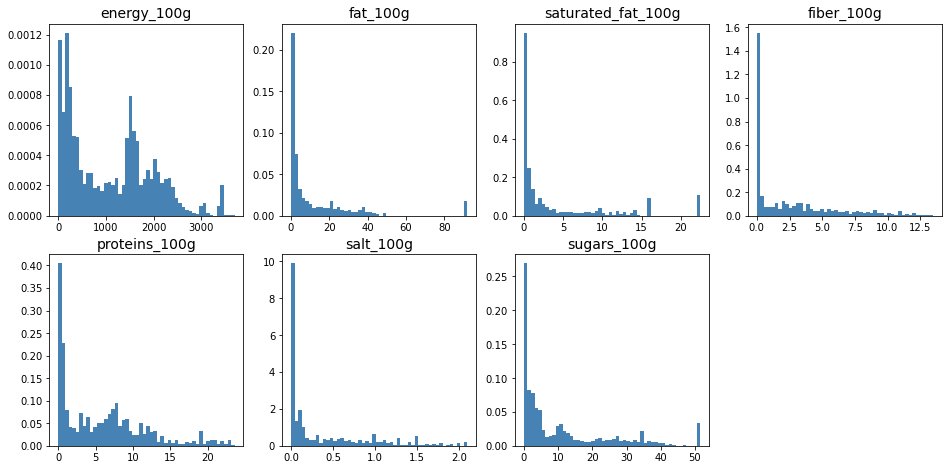

In [160]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df_bio.columns[feat_idx], fontsize=14)

In [161]:
print(X.shape)
print(y.shape)

(5360, 7)
(5360,)


In [162]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3 # 30% des données dans le jeu de test
                                    )

In [163]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

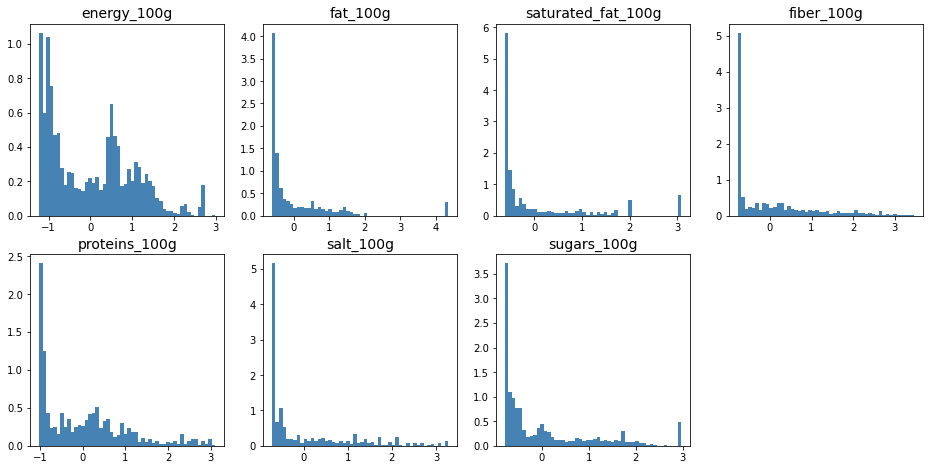

In [164]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(df_bio.columns[feat_idx], fontsize=14)

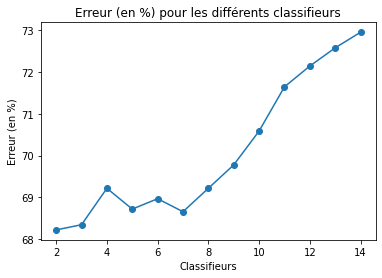

In [165]:
from sklearn import neighbors

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('Classifieurs')
plt.ylabel('Erreur (en %)')
plt.title('Erreur (en %) pour les différents classifieurs')
plt.show()

#### Le K-NN le plus performant est celui pour lequel k = 2 ou k = 6. 

### Pour les produits NON labellisés "bio" et vendus en France

In [166]:
colonnes = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
            'sugars_100g', 'nutrition_score_fr_100g']
df_non_bio = data_non_bio_France_new[colonnes]
print(df_non_bio)

        energy_100g  fat_100g  saturated_fat_100g  fiber_100g  proteins_100g  \
307216       1715.0      14.0                 1.3       2.500            6.8   
205248       1042.0       0.5                 0.1       1.100            0.5   
241060       1039.0       0.1                 0.1       0.800            0.5   
224168        467.0       6.1                 6.1       1.200            6.6   
205164        179.0       0.5                 0.1       0.015            0.5   
...             ...       ...                 ...         ...            ...   
199952       1311.0       0.5                 0.2       6.500            3.0   
277966       2037.0      19.0                 8.8       1.300            4.9   
281958       1784.0      14.1                 7.9       2.700            7.1   
205116       1626.0      32.0                 5.6       0.500           23.0   
205026       2128.0      28.0                17.0       5.200            6.4   

        salt_100g  sugars_100g  nutriti

In [167]:
#On va faire le nettoyage des valeurs manquantes en les remplaçant par 0. 

df_non_bio.loc[df_non_bio['nutrition_score_fr_100g'].isnull(), :] = 0

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\3359342134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_bio.loc[df_non_bio['nutrition_score_fr_100g'].isnull(), :] = 0


In [168]:
X = df_non_bio[df_non_bio.columns[:-1]].values
y = df_non_bio['nutrition_score_fr_100g'].values

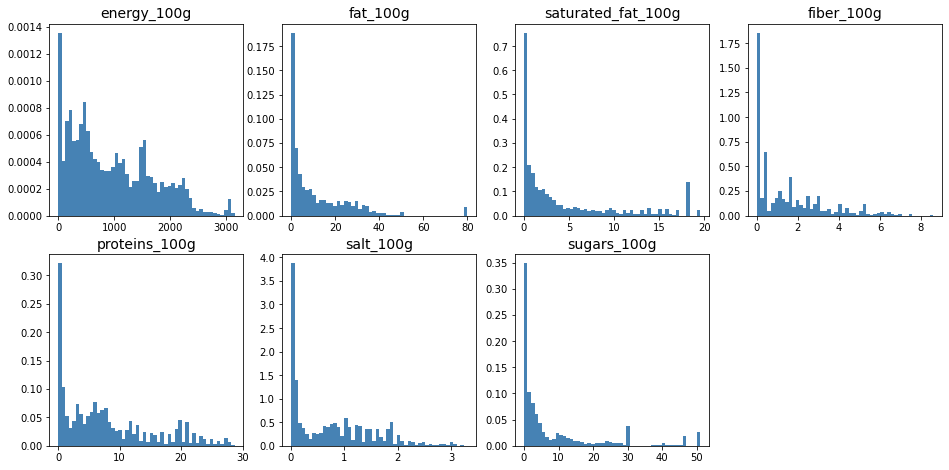

In [169]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df_non_bio.columns[feat_idx], fontsize=14)

In [170]:
print(X.shape)
print(y.shape)

(17392, 7)
(17392,)


In [171]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3 # 30% des données dans le jeu de test
                                    )

In [172]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

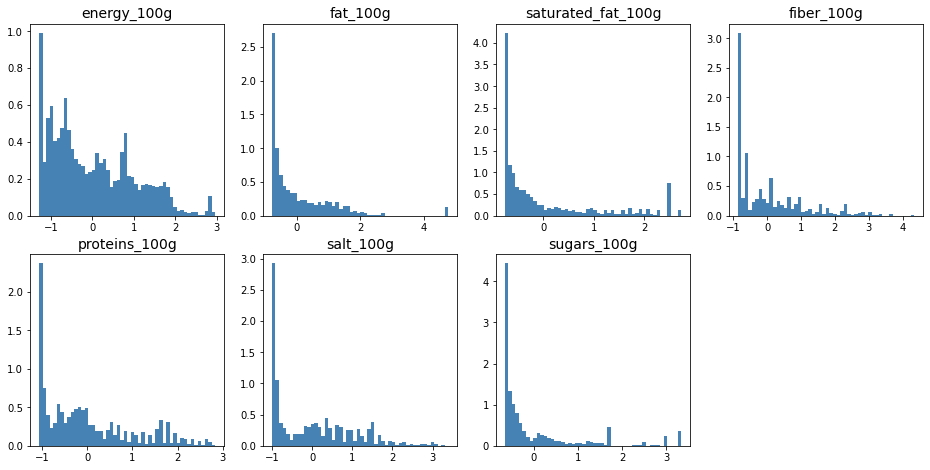

In [173]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(df_non_bio.columns[feat_idx], fontsize=14)

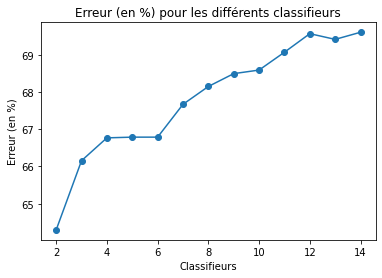

In [174]:
from sklearn import neighbors

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('Classifieurs')
plt.ylabel('Erreur (en %)')
plt.title('Erreur (en %) pour les différents classifieurs')
plt.show()

#### Le K-NN le plus performant est celui pour lequel k = 2. 

In [175]:
# #Imputation par le KNNImputer pour toutes les catégories
# liste_categ_variable = data_bio_France_new_copy['pnns_groups_2'].unique().tolist()

# #Boucle affichant les df avant et après imputation
# for categ in liste_categ_variable:
#     #Df des données que l'on souhaite imputer
#     print('Imputation pour les produits appartenant à la catégorie', categ)
#     data_categ = data_bio_France_new_copy.loc[data_bio_France_new_copy['pnns_groups_2'] == categ, :] #On sélectionne les catégories
#     data_categ_score = data_categ[colonnes]
#     data_categ_score = data_categ_score.reset_index()
#     display(data_categ_score)

#     #Calcul du taux de valeurs manquantes pour chaque nouveau df
#     total = data_categ_score.shape[0]
#     taux_nul = data_categ_score['nutrition_score_fr_100g'].isnull().sum()*100/total

#     #Données imputées par le KNNImputer sur la base de l'algorithme KNN.  
#     imputer = KNNImputer(n_neighbors = 2)
#     impute_data = pd.DataFrame(imputer.fit_transform(data_categ_score))
#     impute_data = impute_data.rename(columns = {0 : 'index', 1 : 'energy_100g', 2 : 'additives_n', 3 : 'fat_100g', 
#                                                 4 : 'saturated_fat_100g', 5 : 'fiber_100g', 6 : 'proteins_100g', 
#                                                 7 : 'salt_100g', 8 : 'sugars_100g', 9 : 'nutrition_score_fr_100g'})
    
#     #Instruction "if" transformant uniquement les valeurs pour les catégories dont on a un taux de valeurs manquantes != 100%
#     if taux_nul == 100:
#         print('100% de valeurs manquantes, donc on garde nos données avant imputation pour cette catégorie :')
#         display(data_categ_score)
#     else:
#         print('Avant imputation :')
#         display(data_categ_score)
#         print('Après imputation :')
#         display(impute_data)

### Pour les produits NON labellisés "bio" et vendus en France

In [176]:
# #Imputation par le KNNImputer pour toutes les catégories
# liste_categ_variable = data_non_bio_France_new['pnns_groups_2'].unique().tolist()

# #Boucle affichant les df avant et après imputation
# for categ in liste_categ_variable:
#     #Df des données que l'on souhaite imputer
#     print('Imputation pour les produits appartenant à la catégorie', categ)
#     data_categ = data_non_bio_France_new.loc[data_non_bio_France_new['pnns_groups_2'] == categ, :] #On sélectionne les catégories
#     data_categ_score = data_categ[colonnes]
#     data_categ_score = data_categ_score.reset_index()

#     #Calcul du taux de valeurs manquantes pour chaque nouveau df
#     total = data_categ_score.shape[0]
#     taux_nul = data_categ_score['nutrition_score_fr_100g'].isnull().sum()*100/total

#     #Données imputées par le KNNImputer sur la base de l'algorithme KNN.  
#     imputer = KNNImputer(n_neighbors = 2)
#     impute_data = pd.DataFrame(imputer.fit_transform(data_categ_score))
#     impute_data = impute_data.rename(columns ={0 : 'index', 1 : 'energy_100g', 2 : 'additives_n', 3 : 'fat_100g', 
#                                                 4 : 'saturated_fat_100g', 5 : 'fiber_100g', 6 : 'proteins_100g', 
#                                                 7 : 'salt_100g', 8 : 'sugars_100g', 9 : 'nutrition_score_fr_100g'})
    
#     #Instruction "if" transformant uniquement les valeurs pour les catégories dont on a un taux de valeurs manquantes != 100%
#     if taux_nul == 100:
#         print('100% de valeurs manquantes, donc on garde nos données avant imputation pour cette catégorie :')
#         display(data_categ_score)
#     else:
#         print('Avant imputation :')
#         display(data_categ_score)
#         print('Après imputation :')
#         display(impute_data)

In [190]:
#On crée une fonction qui permet de créer un nouveau df des valeurs imputées pour chaque catégorie. 
def df_after_KNNimput(nom_df, categorie):
    #Imputation par le KNNImputer pour toutes les catégories
    colonnes = ['energy_100g', 'additives_n', 'fat_100g', 'saturated_fat_100g', 'fiber_100g', 'proteins_100g', 
               'salt_100g', 'sugars_100g', 'nutrition_score_fr_100g']

    #Df des données que l'on souhaite imputer
    data_categ = nom_df.loc[nom_df['pnns_groups_2'] == categorie, :] #On sélectionne les catégories
    data_categ_score = data_categ[colonnes]
    data_categ_score = data_categ_score.reset_index()

    #Données imputées par le KNNImputer sur la base de l'algorithme KNN.  
    imputer = KNNImputer(n_neighbors = 2)
    impute_data = pd.DataFrame(imputer.fit_transform(data_categ_score))
    impute_data = impute_data.rename(columns = {0 : 'index', 1 : 'energy_100g', 2 : 'additives_n', 3 : 'fat_100g', 
                                                4 : 'saturated_fat_100g', 5 : 'fiber_100g', 6 : 'proteins_100g', 
                                                7 : 'salt_100g', 8 : 'sugars_100g', 9 : 'nutrition_score_fr_100g'})
    return impute_data

In [191]:
#On retrouve la liste des catégories bio et non bio pour lequelles 
liste_categ_bio = data_bio_France_new_copy['pnns_groups_2'].unique().tolist()
liste_categ_non_bio = data_non_bio_France_new['pnns_groups_2'].unique().tolist()

In [192]:
#On récupère la liste des différentes catégories de nos produits "bio" et NON "bio" vendus en France
liste_categ_bio = ['Vegetables', 'Meat', 'Fruit_juices', 'One_dish_meals', 'Ice_cream', 'Milk_and_yogurt', 
                   'Chocolate_products','Non_sugared_beverages', 'Sweets', 'Bread', 'Processed_meat', 'Fruits', 
                   'Fish_and_seafood','Breakfast_cereals', 'Fats', 'Pastries', 'Cheese', 'Cereals', 'Alcoholic_beverages', 
                   'Biscuits_and_cakes', 'Appetizers', 'Dried_fruits','Sweetened_beverages', 'Potatoes', 'Eggs', 'Soups', 
                   'Dairy_desserts', 'Dressings_and_sauces', 'Pizza_pies_and_quiche', 'Fruit_nectars', 'Nuts', 'Tripe_dishes',
                   'Sandwich', 'Salty_and_fatty_products']

liste_categ_non_bio = ['Vegetables', 'Biscuits_and_cakes', 'Sweets', 'Non_sugared_beverages', 'Sweetened_beverages','Meat', 
                       'One_dish_meals', 'Soups', 'Chocolate_products', 'Alcoholic_beverages', 'Sandwich', 'Cheese',
                       'Appetizers', 'Dressings_and_sauces', 'Dried_fruits', 'Nuts', 'Breakfast_cereals', 
                       'Pizza_pies_and_quiche', 'Fruits', 'Fruit_juices', 'Fats', 'Bread', 'Processed_meat', 'Cereals', 
                       'Fish_and_seafood', 'Pastries', 'Milk_and_yogurt', 'Dairy_desserts', 'Ice_cream', 'Tripe_dishes', 
                       'Artificially_sweetened_beverages', 'Fruit_nectars', 'Potatoes', 'Eggs', 'Salty_and_fatty_products']

#On crée plusieurs variables correspondant à chaque nouveau df avec les valeurs manquantes imputées
#Pour nos produits labellisés "bio" et vendus en France
print('Variables créées -> nouveau df avec valeurs manquantes imputées par KNNImputer produits BIO')
print('--------------')
for categ in liste_categ_bio:
    globals()[str(categ) + 'bio'] = df_after_KNNimput(data_bio_France_new_copy, categ) #Création d'une variable = df imputé par catégorie
    print(str(categ) + 'bio') #Affichage des différentes variables créées 

#Pour nos produits NON labellisés "bio" et vendus en France
print('____________________________________')
print('Variables créées -> nouveau df avec valeurs manquantes imputées par KNNImputer produits NON BIO')
print('--------------')
for categ in liste_categ_non_bio:
    globals()[str(categ) + 'non_bio'] = df_after_KNNimput(data_non_bio_France_new, categ) #Création d'une variable = df imputé par catégorie
    print(str(categ) + 'non_bio') #Affichage des différentes variables créées 

Variables créées -> nouveau df avec valeurs manquantes imputées par KNNImputer produits BIO
--------------
Vegetablesbio
Meatbio
Fruit_juicesbio
One_dish_mealsbio
Ice_creambio
Milk_and_yogurtbio
Chocolate_productsbio
Non_sugared_beveragesbio
Sweetsbio
Breadbio
Processed_meatbio
Fruitsbio
Fish_and_seafoodbio
Breakfast_cerealsbio
Fatsbio
Pastriesbio
Cheesebio
Cerealsbio
Alcoholic_beveragesbio
Biscuits_and_cakesbio
Appetizersbio
Dried_fruitsbio
Sweetened_beveragesbio
Potatoesbio
Eggsbio
Soupsbio
Dairy_dessertsbio
Dressings_and_saucesbio
Pizza_pies_and_quichebio
Fruit_nectarsbio
Nutsbio
Tripe_dishesbio
Sandwichbio
Salty_and_fatty_productsbio
____________________________________
Variables créées -> nouveau df avec valeurs manquantes imputées par KNNImputer produits NON BIO
--------------
Vegetablesnon_bio
Biscuits_and_cakesnon_bio
Sweetsnon_bio
Non_sugared_beveragesnon_bio
Sweetened_beveragesnon_bio
Meatnon_bio
One_dish_mealsnon_bio
Soupsnon_bio
Chocolate_productsnon_bio
Alcoholic_beverages

In [195]:
#On va concaténer nos dataframes
#Nouveau df des produits labellisés "bio" et vendus en France dont les valeurs manquantes ont été traitées par KNNImputer
print('Nouveau df des produits "bio" dont les valeurs de nutriscore manquantes ont été traitées par KNNImputer')

res_bio = [Vegetablesbio, Meatbio, Fruit_juicesbio, One_dish_mealsbio, Ice_creambio, Milk_and_yogurtbio, 
                          Chocolate_productsbio, Non_sugared_beveragesbio, Sweetsbio, Breadbio, Processed_meatbio, Fruitsbio,
                          Fish_and_seafoodbio, Breakfast_cerealsbio, Fatsbio, Pastriesbio, Cheesebio, Cerealsbio, 
                          Alcoholic_beveragesbio, Biscuits_and_cakesbio, Appetizersbio, Dried_fruitsbio, Sweetened_beveragesbio, 
                          Potatoesbio, Eggsbio, Soupsbio, Dairy_dessertsbio, Dressings_and_saucesbio, Pizza_pies_and_quichebio, 
                          Fruit_nectarsbio, Nutsbio, Tripe_dishesbio, Sandwichbio, Salty_and_fatty_productsbio]

concat_df_KNNimput_bio = pd.concat(res_bio)
display(concat_df_KNNimput_bio)


print('Il nous reste', concat_df_KNNimput_bio['nutrition_score_fr_100g'].isnull().sum(), 'valeur(s) manquante(s).')

#Nouveau df des produits NON labellisés "bio" et vendus en France dont les valeurs manquantes ont été traitées par KNNImputer
print('Nouveau df des produits NON "bio" dont les valeurs de nutriscore manquantes ont été traitées par KNNImputer')

res_non_bio = [Vegetablesnon_bio, Biscuits_and_cakesnon_bio, Sweetsnon_bio, Non_sugared_beveragesnon_bio, 
               Sweetened_beveragesnon_bio, Meatnon_bio, One_dish_mealsnon_bio, 
               Soupsnon_bio, Chocolate_productsnon_bio, Alcoholic_beveragesnon_bio, 
               Sandwichnon_bio, Cheesenon_bio, Appetizersnon_bio, Dressings_and_saucesnon_bio, 
               Dried_fruitsnon_bio, Nutsnon_bio, Breakfast_cerealsnon_bio, 
               Pizza_pies_and_quichenon_bio, Fruitsnon_bio, Fruit_juicesnon_bio, Fatsnon_bio,
               Breadnon_bio, Processed_meatnon_bio, Cerealsnon_bio, Fish_and_seafoodnon_bio, 
               Pastriesnon_bio, Milk_and_yogurtnon_bio, Dairy_dessertsnon_bio, 
               Ice_creamnon_bio, Tripe_dishesnon_bio, Artificially_sweetened_beveragesnon_bio, 
               Fruit_nectarsnon_bio, Potatoesnon_bio, Eggsnon_bio, 
               Salty_and_fatty_productsnon_bio]

concat_df_KNNimput_non_bio = pd.concat(res_non_bio)
display(concat_df_KNNimput_non_bio)

print('Il nous reste', concat_df_KNNimput_non_bio['nutrition_score_fr_100g'].isnull().sum(), 'valeur(s) manquante(s).')

Nouveau df des produits "bio" dont les valeurs de nutriscore manquantes ont été traitées par KNNImputer


index  energy_100g  additives_n  fat_100g  saturated_fat_100g  \
0   240608.0       1393.0          0.0       1.7                 0.2   
1   232573.0        222.0          0.0       0.3                 0.0   
2   287539.0        657.0          0.0       9.0                 1.0   
3   315390.0        413.0          0.0       0.6                 0.2   
4   226066.0         99.0          1.0       0.5                 0.5   
..       ...          ...          ...       ...                 ...   
33  253174.0       2970.0          0.0      48.5                 6.2   
34  237341.0       1548.0          0.0      48.5                 5.9   
0   235117.0        945.0          0.0      17.0                 5.8   
0   279296.0        946.0          4.0       9.6                 1.2   
0   231966.0       1879.0          0.0      20.8                 4.0   

    fiber_100g  proteins_100g  salt_100g  sugars_100g  nutrition_score_fr_100g  
0         11.0          4.150       0.00          1.0                    -11.0  
1          2.0          2.800       0.60          4.5                     -1.0  
2          0.4         17.000       0.50          0.4                     -2.0  
3          0.0          5.300       0.65          3.3                     -5.0  
4          0.0          1.500       0.68          1.3                     -3.0  
..         ...            ...        ...          ...                      ...  
33         9.6          9.200       0.00          4.0                      9.0  
34         0.0         17.775       0.02          5.0                      2.0  
0          0.0         14.000       1.60          2.1                     13.0  
0          2.9          9.500       1.20          3.6                     -1.0  
0         11.5          9.400       1.15          0.5                      8.0  

[5360 rows x 10 columns]

Il nous reste 0 valeur(s) manquante(s).
Nouveau df des produits NON "bio" dont les valeurs de nutriscore manquantes ont été traitées par KNNImputer


index  energy_100g  additives_n  fat_100g  saturated_fat_100g  \
0   247623.0        714.0          0.0       6.2                0.80   
1   208638.0         63.0          0.0       0.4                0.00   
2   251202.0         92.0          0.0       0.4                0.17   
3   239408.0        108.0          0.0       0.2                0.00   
4   219422.0        139.0          0.0       1.2                0.70   
..       ...          ...          ...       ...                 ...   
0   253091.0       1830.0          0.0      16.0                7.00   
1   200565.0       1710.0          0.0      17.0                7.40   
2   244082.0       1788.0          0.0      20.7               10.20   
3   244079.0       1749.0          0.0      19.0                9.20   
4   280678.0       2053.0          0.0      22.0                3.00   

    fiber_100g  proteins_100g  salt_100g  sugars_100g  nutrition_score_fr_100g  
0          2.1            2.5       0.05          0.5                     -6.0  
1          2.0            1.2       1.81          0.6                      0.0  
2          1.8            2.5       0.02          1.6                     -8.0  
3          2.8            1.6       0.76          0.8                     -5.0  
4          1.3            2.5       0.48          1.7                     -5.0  
..         ...            ...        ...          ...                      ...  
0          8.6            9.1       1.50          1.1                     12.0  
1          8.6            8.5       2.40          1.2                     17.0  
2          8.6            8.1       2.50          1.1                     25.0  
3          8.6            8.3       2.25          1.2                     18.0  
4          6.4            5.2       1.20          1.2                     15.0  

[17392 rows x 10 columns]

Il nous reste 0 valeur(s) manquante(s).


In [196]:
#On va uniquement garder l'index et le nutrition_score dont on a traité les valeurs manquantes
df_KNNimput_bio = concat_df_KNNimput_bio[['index', 'nutrition_score_fr_100g']]
df_KNNimput_non_bio = concat_df_KNNimput_non_bio[['index', 'nutrition_score_fr_100g']]
display(df_KNNimput_bio.head())
display(df_KNNimput_non_bio.head())

index  nutrition_score_fr_100g
0  240608.0                    -11.0
1  232573.0                     -1.0
2  287539.0                     -2.0
3  315390.0                     -5.0
4  226066.0                     -3.0

index  nutrition_score_fr_100g
0  247623.0                     -6.0
1  208638.0                      0.0
2  251202.0                     -8.0
3  239408.0                     -5.0
4  219422.0                     -5.0

In [197]:
#On va maintenant joindre nos deux nouveaux df à nos deux df de base 
#Nouveau df des produits "bio" dont les valeurs manquantes de nutriscore ont été traitées 
data_bio_France_KNNImput = pd.merge(data_bio_France_new_copy.reset_index(), df_KNNimput_bio, on='index')
display(data_bio_France_KNNImput.head())

#Nouveau df des produits NON "bio" dont les valeurs manquantes de nutriscore ont été traitées 
data_non_bio_France_KNNImput = pd.merge(data_non_bio_France_new.reset_index(), df_KNNimput_non_bio, on='index')
display(data_non_bio_France_KNNImput.head())

index           code last_modified_datetime  \
0  230691  3396410047559    2017-04-21 00:53:41   
1  293049  7613035833302    2017-04-20 17:50:51   
2  289838  7610849045549    2017-04-20 17:50:48   
3  254226  3760159828654    2017-04-20 17:50:21   
4  253057  3760092217133    2017-04-20 17:50:16   

                            product_name quantity                 brands  \
0  Chocolat Noir Costa Rica 75% De Cacao     70 g             Bonneterre   
1                   Perrier fines bulles      NaN                Perrier   
2                       Ginger Green Tea    500 g  Coop, Coop naturaplan   
3                         Jus de grenade      NaN           Très pressés   
4                      Madeleines amande      NaN              Viadélice   

           pnns_groups_2                                      labels  \
0     Chocolate_products  Bio,Bio européen,AB Agriculture Biologique   
1  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
2  Non_sugared_beverages  Bio,Bio européen,AB Agriculture Biologique   
3           Fruit_juices  Bio,Bio européen,AB Agriculture Biologique   
4     Biscuits_and_cakes  Bio,Bio européen,AB Agriculture Biologique   

        countries                                   ingredients_text  \
0          France  pâte de cacao* (Costa Rica), sucre de canne*, ...   
1          France                                                NaN   
2  France, Suisse                                                NaN   
3          France                                                NaN   
4          France  Huile de palme non hydrogénée ,œuf, sucre de c...   

   additives_n                           additives_tags  \
0          0.0                                      NaN   
1          0.0                                      NaN   
2          0.0                                      NaN   
3          0.0                                      NaN   
4          5.0  en:e322,en:e407,en:e412,en:e500,en:e341   

             main_category_fr  energy_100g  fat_100g  saturated_fat_100g  \
0                   Chocolats       2404.0      44.0                22.5   
1                    Boissons          0.0       1.0                 0.0   
2                    Boissons        100.0       0.0                 0.0   
3  Jus de fruits 100% pur jus        280.0       0.1                 0.1   
4                     Gâteaux       2105.0      29.0                11.7   

   fiber_100g  proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
0         0.0           10.0     0.0300                30.0         24.0   
1         0.0            0.0     0.0095                 7.0          0.0   
2         0.0            0.0     0.0000                 6.0          6.0   
3         0.5            0.6     0.0200                11.0         14.0   
4         1.1            5.9     0.7700                53.9         27.6   

   nutrition_score_fr_100g_x nutrition_grade_fr  taux_val_manq  \
0                       22.0                  e      11.111111   
1                        0.0                  b      22.222222   
2                        8.0                  d       0.000000   
3                       10.0                  e      22.222222   
4                       24.0                  e       0.000000   

   nutrition_score_fr_100g_y  
0                       22.0  
1                        0.0  
2                        8.0  
3                       10.0  
4                       24.0

index           code last_modified_datetime  \
0  307216  8410376046991    2017-04-20 20:47:40   
1  205248  3250390111337    2017-04-20 19:55:01   
2  241060  3564700011126    2017-04-20 19:52:38   
3  224168  3302740966101    2017-04-20 19:43:16   
4  205164  3250390050933    2017-04-20 19:33:54   

                                        product_name          quantity  \
0  Biscuits Petit-Déjeuner Céréales Complètes San...  (6x36 g) - 216 g   
1                                 Confiture abricots             750 g   
2                            Confiture Extra Abricot              370g   
3                       Gratin de Courgettes au Bœuf           300 g e   
4                                          Look Cola           33 cl e   

                        brands        pnns_groups_2  \
0                       Gullon   Biscuits_and_cakes   
1                       Elodie               Sweets   
2  Mamie Douceur,Marque Repère               Sweets   
3                Fleury Michon       One_dish_meals   
4          Look,EM Saint Alban  Sweetened_beverages   

                                              labels       countries  \
0  Peu ou pas de sucre,Riche en fibres,Sans sucre...  France,Espagne   
1      Labels de distributeurs,Sélection Intermarché          France   
2                                         Point Vert          France   
3  Sans colorants,Sans conservateurs,Viande Franç...          France   
4                                         Point Vert          France   

                                    ingredients_text  additives_n  \
0  Farines complètes 58% (farine de _blé_, farine...          3.0   
1  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
2  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
3  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
4  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   

            additives_tags        main_category_fr  energy_100g  fat_100g  \
0  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0      14.0   
1  en:e440,en:e330,en:e300              Confitures       1042.0       0.5   
2          en:e330,en:e440              Confitures       1039.0       0.1   
3                      NaN  Plats à base de viande        467.0       6.1   
4         en:e150d,en:e338                   Sodas        179.0       0.5   

   saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                 1.3       2.500            6.8      0.650   
1                 0.1       1.100            0.5      0.020   
2                 0.1       0.800            0.5      0.025   
3                 6.1       1.200            6.6      0.780   
4                 0.1       0.015            0.5      0.010   

   carbohydrates_100g  sugars_100g  nutrition_score_fr_100g_x  \
0                65.0          1.4                       -1.0   
1                60.3         51.0                       12.0   
2                60.0         51.0                       11.0   
3                 7.0          4.4                        5.0   
4                10.5         10.5                       13.0   

  nutrition_grade_fr  taux_val_manq  nutrition_score_fr_100g_y  
0                  a       0.000000                       -1.0  
1                  d      11.111111                       12.0  
2                  d       0.000000                       11.0  
3                  c       0.000000                        5.0  
4                  e      11.111111                       13.0

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


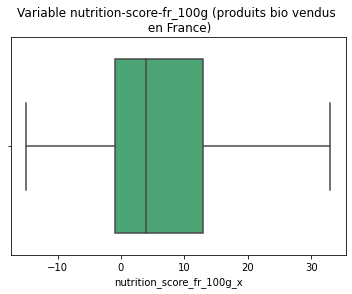

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


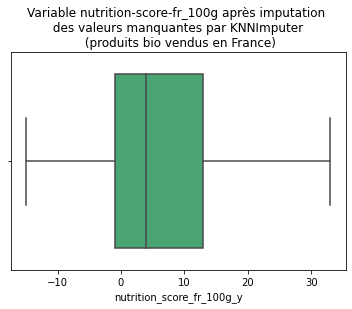

In [198]:
#On vérifie que la distribution de nos données n'a pas changé pour les produits labellisés "bio"
ax = sns.boxplot(data_bio_France_KNNImput['nutrition_score_fr_100g_x'], color = 'mediumseagreen')
ax.set_title('Variable nutrition-score-fr_100g (produits bio vendus \n en France)')
plt.show()

ax = sns.boxplot(data_bio_France_KNNImput['nutrition_score_fr_100g_y'], color = 'mediumseagreen')
ax.set_title('Variable nutrition-score-fr_100g après imputation \n des valeurs manquantes par KNNImputer \n (produits bio vendus en France)')
plt.show()

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


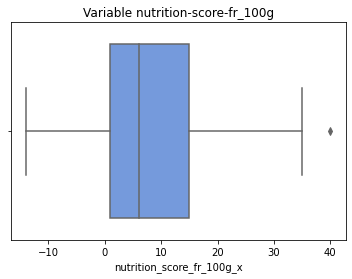

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


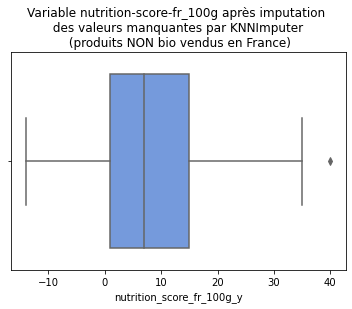

In [199]:
#On vérifie que la distribution de nos données n'a pas changé pour les produits NON labellisés "bio"
ax = sns.boxplot(data_non_bio_France_KNNImput['nutrition_score_fr_100g_x'], color = 'cornflowerblue')
ax.set_title('Variable nutrition-score-fr_100g')
plt.show()

ax = sns.boxplot(data_non_bio_France_KNNImput['nutrition_score_fr_100g_y'], color = 'cornflowerblue')
ax.set_title('Variable nutrition-score-fr_100g après imputation \n des valeurs manquantes par KNNImputer \n (produits NON bio vendus en France)')
plt.show()

### On va vérifier après l'imputation si les sugars sont supérieurs aux carbohydrates et si les saturated_fat sont supérieurs aux fat

In [200]:
print(data_bio_France_KNNImput.loc[data_bio_France_KNNImput['carbohydrates_100g'] < data_bio_France_KNNImput['sugars_100g'], :].shape[0])
print(data_bio_France_KNNImput.loc[data_bio_France_KNNImput['fat_100g'] < data_bio_France_KNNImput['saturated_fat_100g'], :].shape[0])
display(data_bio_France_KNNImput.loc[data_bio_France_KNNImput['carbohydrates_100g'] < data_bio_France_KNNImput['sugars_100g'], :])

140
148


index           code last_modified_datetime  \
3     254226  3760159828654    2017-04-20 17:50:21   
44    226086  3335880005812    2017-04-19 08:01:30   
72    226013  3335265200214    2017-04-18 07:26:17   
99    252860  3760087361001    2017-04-17 12:42:58   
106   263822       41526873    2017-04-17 09:39:34   
...      ...            ...                    ...   
5295  253520  3760121210807    2013-10-01 23:25:05   
5327  302270  8002352530008    2013-03-24 11:20:17   
5329  254787  3760213860125    2013-02-18 18:44:03   
5342  258179  4006040160984    2012-11-18 20:51:26   
5355  253028  3760091729477    2012-07-20 20:01:25   

                                          product_name quantity  \
3                                       Jus de grenade      NaN   
44                  Purée De Tomate Mi Concentrée à15%    200 g   
72                        Yaourt Vanille Entier Brassé      NaN   
99    Poudre de cacao cru, sans sucre, qualité premium    200 g   
106                                         Figues Bio    350 g   
...                                                ...      ...   
5295                             Crème fraîche épaisse    20 cl   
5327                                          Amandino     350g   
5329                                         Cacao cru     250g   
5342                                       Tiger creme     250g   
5355  Nectar de citron vert du Brésil équitable et bio      1 L   

                      brands         pnns_groups_2  \
3               Très pressés          Fruit_juices   
44                   Prosain  Dressings_and_sauces   
72                  Vilactée       Milk_and_yogurt   
99     Ethnoscience,Ecoidées    Chocolate_products   
106   Les Comtes de Provence                Sweets   
...                      ...                   ...   
5295                 Biocoop       Milk_and_yogurt   
5327                 damiano                Sweets   
5329             Sol Semilla    Chocolate_products   
5342                Rapunzel                Sweets   
5355              Ethiquable         Fruit_nectars   

                                                 labels countries  \
3            Bio,Bio européen,AB Agriculture Biologique    France   
44           Bio,Bio européen,AB Agriculture Biologique    France   
72           Bio,Bio européen,AB Agriculture Biologique    France   
99        Bio,Bio européen,FR-BIO-01,Agriculture non UE    France   
106                                    Bio,Bio européen    France   
...                                                 ...       ...   
5295                                    AB,Bio européen    France   
5327                                       Bio européen    France   
5329                                    AB,Bio européen    France   
5342                                                 AB    France   
5355  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...    France   

                                       ingredients_text  additives_n  \
3                                                   NaN          0.0   
44                                                  NaN          0.0   
72                                                  NaN          0.0   
99                 Poudre de fèves de cacao dégraissée.          0.0   
106   figues (63%), sucre de canne, acidifiant : jus...          1.0   
...                                                 ...          ...   
5295  crème fraîche pasteurisée épaisse à 30% de mat...          0.0   
5327  amandes complètes grillées et broyées à la meu...          0.0   
5329                                                NaN          0.0   
5342  Sucre de canne roux, noisettes 17%, graisse de...          0.0   
5355       eau, jus de citron vert* 25%, sucre de canne          0.0   

     additives_tags            main_category_fr  energy_100g  fat_100g  \
3               NaN  Jus de fruits 100% pur jus        280.0     0.100   
44              NaN                    Epicerie        335.0  

In [201]:
print(data_non_bio_France_KNNImput.loc[data_non_bio_France_KNNImput['carbohydrates_100g'] < data_non_bio_France_KNNImput['sugars_100g'], :].shape[0])
print(data_non_bio_France_KNNImput.loc[data_non_bio_France_KNNImput['fat_100g'] < data_non_bio_France_KNNImput['saturated_fat_100g'], :].shape[0])

172
135


In [202]:
#On va plafonner les variables "sugars" et "saturated_fat" en leur attribuant la valeur des "carbohydrates" et "fat" respectivement
#Pour les produits "bio"
data_bio_France_KNNImput.loc[data_bio_France_KNNImput['carbohydrates_100g'] < data_bio_France_KNNImput['sugars_100g'], 'sugars_100g'] = data_bio_France_KNNImput['carbohydrates_100g']
data_bio_France_KNNImput.loc[data_bio_France_KNNImput['fat_100g'] < data_bio_France_KNNImput['saturated_fat_100g'], 'saturated_fat_100g'] = data_bio_France_KNNImput['fat_100g']

#Pour les produits NON "bio"
data_non_bio_France_KNNImput.loc[data_non_bio_France_KNNImput['carbohydrates_100g'] < data_non_bio_France_KNNImput['sugars_100g'], 'sugars_100g'] = data_non_bio_France_KNNImput['carbohydrates_100g']
data_non_bio_France_KNNImput.loc[data_non_bio_France_KNNImput['fat_100g'] < data_non_bio_France_KNNImput['saturated_fat_100g'], 'saturated_fat_100g'] = data_non_bio_France_KNNImput['fat_100g']


### 2 méthodes d'attribution des catégories nutritionnelles en fonction des aliments solides et des boissons
### Pour les produits "bio" vendus en France

In [204]:
#On va sélectionner les produits de type "boissons"
boissons_bio = ['Fruit_juices', 'Non_sugared_beverages', 'Fruit_nectars', 'Alcoholic_beverages', 'Sweetened_beverages']
boissons_bio_France = data_bio_France_KNNImput.loc[data_bio_France_KNNImput['pnns_groups_2'].isin(boissons_bio), :]
display(boissons_bio_France)

#On sélectionne les produits "aliments" qui ne sont pas des boissons. 
aliments_bio_France = data_bio_France_KNNImput.loc[~data_bio_France_KNNImput['pnns_groups_2'].isin(boissons_bio), :]
display(aliments_bio_France)

index           code last_modified_datetime  \
1     293049  7613035833302    2017-04-20 17:50:51   
2     289838  7610849045549    2017-04-20 17:50:48   
3     254226  3760159828654    2017-04-20 17:50:21   
5     252546  3760074472093    2017-04-20 17:50:11   
8     240253  3560070967636    2017-04-20 17:49:44   
...      ...            ...                    ...   
5316  320763       99111250    2013-06-20 01:09:16   
5319  243342  3564707086042    2013-06-09 18:40:52   
5351  252974  3760091723345    2012-10-01 00:13:34   
5355  253028  3760091729477    2012-07-20 20:01:25   
5357  230697  3396410048105    2012-07-07 10:51:56   

                                          product_name quantity  \
1                                 Perrier fines bulles      NaN   
2                                     Ginger Green Tea    500 g   
3                                       Jus de grenade      NaN   
5                                         Jus d'orange      NaN   
8                                      Boisson au soja      NaN   
...                                                ...      ...   
5316                                Thé vert Earl grey     50 g   
5319                                   Sirop de cassis     50cl   
5351                        Goyave Banane 100% pur jus      1 L   
5355  Nectar de citron vert du Brésil équitable et bio      1 L   
5357                             Riz Épeautre Noisette       1L   

                         brands          pnns_groups_2  \
1                       Perrier  Non_sugared_beverages   
2         Coop, Coop naturaplan  Non_sugared_beverages   
3                  Très pressés           Fruit_juices   
5                     Pronatura           Fruit_juices   
8                 Carrefour BIO  Non_sugared_beverages   
...                         ...                    ...   
5316                    Lobodis  Non_sugared_beverages   
5319  Bio Village,Marque repère    Sweetened_beverages   
5351                 Ethiquable           Fruit_juices   
5355                 Ethiquable          Fruit_nectars   
5357                 Bonneterre  Non_sugared_beverages   

                                                 labels       countries  \
1            Bio,Bio européen,AB Agriculture Biologique          France   
2            Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
3            Bio,Bio européen,AB Agriculture Biologique          France   
5            Bio,Bio européen,AB Agriculture Biologique          France   
8            Bio,Bio européen,AB Agriculture Biologique          France   
...                                                 ...             ...   
5316                       AB,Bio européen,Max Havelaar          France   
5319                                       Bio européen          France   
5351              Max Havelaar,AB,FSC,sans sucre ajouté          France   
5355  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
5357             AB,Bio-européen,FSC,transport optimisé          France   

                                       ingredients_text  additives_n  \
1                                                   NaN          0.0   
2                                                   NaN          0.0   
3                                                   NaN          0.0   
5                                                   NaN          0.0   
8                                                   NaN          0.0   
...                                                 ...          ...   
5316  thé vert, arôme naturel bergamote avec autres ...          0.0   
5319  sucre de canne, eau, jus de cassis à base de c...          1.0   
5351  jus de pomme, purée de banane* 28,6%, purée de...          0.0   
5355       eau, jus de citron vert* 25%, sucre de canne          0.0   
5357  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0   

     additives_tags            main_category_fr  energy_100g  fat_100g  \
1               

index           code last_modified_datetime  \
0     230691  3396410047559    2017-04-21 00:53:41   
4     253057  3760092217133    2017-04-20 17:50:16   
6     249529  3700036901780    2017-04-20 17:50:05   
7     249514  3700036901025    2017-04-20 17:50:05   
9     240608  3560071052133    2017-04-20 17:49:44   
...      ...            ...                    ...   
5353  201853  3226980002019    2012-08-06 20:40:00   
5354  245433  3596710309658    2012-08-04 13:39:37   
5356  223014  3288131600314    2012-07-14 11:16:26   
5358  232093  3421557904004    2012-06-13 19:06:35   
5359  212971  3257983358032    2012-06-04 23:12:24   

                                           product_name quantity  \
0                 Chocolat Noir Costa Rica 75% De Cacao     70 g   
4                                     Madeleines amande      NaN   
6                                Purée de pommes poires    705 g   
7                                        Figues séchées    500 g   
9                                      Lentilles corail      NaN   
...                                                 ...      ...   
5353  Pain Azyme CROUSTIA Son&Farine Complète Paul H...    200 g   
5354     Fromage blanc issu de l'agriculture biologique   500 g.   
5356                                        Mini Jungle     160g   
5358                                Galettes 5 céréales     130g   
5359                           Pain spécial de campagne    400 g   

             brands       pnns_groups_2  \
0        Bonneterre  Chocolate_products   
4         Viadélice  Biscuits_and_cakes   
6         Naturalia              Fruits   
7         Naturalia        Dried_fruits   
9     Carrefour bio          Vegetables   
...             ...                 ...   
5353   PAUL HEUMANN               Bread   
5354         Auchan              Cheese   
5356        Kalibio  Biscuits_and_cakes   
5358   Grillon d'or             Cereals   
5359     Nature Bio               Bread   

                                                 labels countries  \
0            Bio,Bio européen,AB Agriculture Biologique    France   
4            Bio,Bio européen,AB Agriculture Biologique    France   
6            Bio,Bio européen,AB Agriculture Biologique    France   
7            Bio,Bio européen,AB Agriculture Biologique    France   
9            Bio,Bio européen,AB Agriculture Biologique    France   
...                                                 ...       ...   
5353  Bio,AB,sans sucre ajouté,sans sel ajouté,sans ...    France   
5354                                bio,AB,bio européen    France   
5356                                                 AB    France   
5358                                    AB,Bio européen    France   
5359                                    AB,Bio-européen    France   

                                       ingredients_text  additives_n  \
0     pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0   
4     Huile de palme non hydrogénée ,œuf, sucre de c...          5.0   
6                                                   NaN          0.0   
7                                                   NaN          0.0   
9     Lentilles corail issues de l'agriculture biolo...          0.0   
...                                                 ...          ...   
5353  Farine de froment complète (87%) et son de fro...          0.0   
5354  lait pasteurisé partiellement écrémé (issu de ...          0.0   
5356  Farine de blé, chocolat au lait 25% (sucre de ...          1.0   
5358              riz, blé, maïs, avoine, sarrasin, sel          0.0   
5359  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0   

                               additives_tags  \
0                                         NaN   
4     en:e322,en:e407,en:e412,en:e500,en:e341   
6                                         NaN   
7                                         NaN   
9                                         NaN   
...                                 

In [205]:
#On va attribuer les catégories nutritionnelles pour les boissons
conditionlist_boissons = [
    (boissons_bio_France['nutrition_score_fr_100g_y'] < 0), 
    (boissons_bio_France['nutrition_score_fr_100g_y'] >= 0) & (boissons_bio_France['nutrition_score_fr_100g_y'] <= 1), 
    (boissons_bio_France['nutrition_score_fr_100g_y'] > 1) & (boissons_bio_France['nutrition_score_fr_100g_y'] <= 5),
    (boissons_bio_France['nutrition_score_fr_100g_y'] > 5) & (boissons_bio_France['nutrition_score_fr_100g_y'] <= 9),
    (boissons_bio_France['nutrition_score_fr_100g_y'] > 9) & (boissons_bio_France['nutrition_score_fr_100g_y'] <= 40)]

choicelist = ['a', 'b', 'c', 'd', 'e']

boissons_bio_France['nutrition_grade'] = np.select(conditionlist_boissons, choicelist, default='Not Specified')

display(boissons_bio_France)

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\3772076721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boissons_bio_France['nutrition_grade'] = np.select(conditionlist_boissons, choicelist, default='Not Specified')


index           code last_modified_datetime  \
1     293049  7613035833302    2017-04-20 17:50:51   
2     289838  7610849045549    2017-04-20 17:50:48   
3     254226  3760159828654    2017-04-20 17:50:21   
5     252546  3760074472093    2017-04-20 17:50:11   
8     240253  3560070967636    2017-04-20 17:49:44   
...      ...            ...                    ...   
5316  320763       99111250    2013-06-20 01:09:16   
5319  243342  3564707086042    2013-06-09 18:40:52   
5351  252974  3760091723345    2012-10-01 00:13:34   
5355  253028  3760091729477    2012-07-20 20:01:25   
5357  230697  3396410048105    2012-07-07 10:51:56   

                                          product_name quantity  \
1                                 Perrier fines bulles      NaN   
2                                     Ginger Green Tea    500 g   
3                                       Jus de grenade      NaN   
5                                         Jus d'orange      NaN   
8                                      Boisson au soja      NaN   
...                                                ...      ...   
5316                                Thé vert Earl grey     50 g   
5319                                   Sirop de cassis     50cl   
5351                        Goyave Banane 100% pur jus      1 L   
5355  Nectar de citron vert du Brésil équitable et bio      1 L   
5357                             Riz Épeautre Noisette       1L   

                         brands          pnns_groups_2  \
1                       Perrier  Non_sugared_beverages   
2         Coop, Coop naturaplan  Non_sugared_beverages   
3                  Très pressés           Fruit_juices   
5                     Pronatura           Fruit_juices   
8                 Carrefour BIO  Non_sugared_beverages   
...                         ...                    ...   
5316                    Lobodis  Non_sugared_beverages   
5319  Bio Village,Marque repère    Sweetened_beverages   
5351                 Ethiquable           Fruit_juices   
5355                 Ethiquable          Fruit_nectars   
5357                 Bonneterre  Non_sugared_beverages   

                                                 labels       countries  \
1            Bio,Bio européen,AB Agriculture Biologique          France   
2            Bio,Bio européen,AB Agriculture Biologique  France, Suisse   
3            Bio,Bio européen,AB Agriculture Biologique          France   
5            Bio,Bio européen,AB Agriculture Biologique          France   
8            Bio,Bio européen,AB Agriculture Biologique          France   
...                                                 ...             ...   
5316                       AB,Bio européen,Max Havelaar          France   
5319                                       Bio européen          France   
5351              Max Havelaar,AB,FSC,sans sucre ajouté          France   
5355  Commerce équitable,Max Havelaar,Bio,AB,Bio eur...          France   
5357             AB,Bio-européen,FSC,transport optimisé          France   

                                       ingredients_text  additives_n  \
1                                                   NaN          0.0   
2                                                   NaN          0.0   
3                                                   NaN          0.0   
5                                                   NaN          0.0   
8                                                   NaN          0.0   
...                                                 ...          ...   
5316  thé vert, arôme naturel bergamote avec autres ...          0.0   
5319  sucre de canne, eau, jus de cassis à base de c...          1.0   
5351  jus de pomme, purée de banane* 28,6%, purée de...          0.0   
5355       eau, jus de citron vert* 25%, sucre de canne          0.0   
5357  Eau, Céréales 15.2% (Épeautre 7%, riz 6%, avoi...          0.0   

     additives_tags            main_category_fr  energy_100g  fat_100g  \
1               

In [206]:
#On va attribuer les catégories nutritionnelles pour les aliments autres que boissons
conditionlist_aliments = [
    (aliments_bio_France['nutrition_score_fr_100g_y'] >= -15) & (aliments_bio_France['nutrition_score_fr_100g_y'] <= -1), 
    (aliments_bio_France['nutrition_score_fr_100g_y'] > -1) & (aliments_bio_France['nutrition_score_fr_100g_y'] <= 2), 
    (aliments_bio_France['nutrition_score_fr_100g_y'] > 2) & (aliments_bio_France['nutrition_score_fr_100g_y'] <= 10),
    (aliments_bio_France['nutrition_score_fr_100g_y'] > 10) & (aliments_bio_France['nutrition_score_fr_100g_y'] <= 18),
    (aliments_bio_France['nutrition_score_fr_100g_y'] > 18) & (aliments_bio_France['nutrition_score_fr_100g_y'] <= 40)]

choicelist = ['a', 'b', 'c', 'd', 'e']

aliments_bio_France['nutrition_grade'] = np.select(conditionlist_aliments, choicelist, default='Not Specified')

display(aliments_bio_France)

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\1123705163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aliments_bio_France['nutrition_grade'] = np.select(conditionlist_aliments, choicelist, default='Not Specified')


index           code last_modified_datetime  \
0     230691  3396410047559    2017-04-21 00:53:41   
4     253057  3760092217133    2017-04-20 17:50:16   
6     249529  3700036901780    2017-04-20 17:50:05   
7     249514  3700036901025    2017-04-20 17:50:05   
9     240608  3560071052133    2017-04-20 17:49:44   
...      ...            ...                    ...   
5353  201853  3226980002019    2012-08-06 20:40:00   
5354  245433  3596710309658    2012-08-04 13:39:37   
5356  223014  3288131600314    2012-07-14 11:16:26   
5358  232093  3421557904004    2012-06-13 19:06:35   
5359  212971  3257983358032    2012-06-04 23:12:24   

                                           product_name quantity  \
0                 Chocolat Noir Costa Rica 75% De Cacao     70 g   
4                                     Madeleines amande      NaN   
6                                Purée de pommes poires    705 g   
7                                        Figues séchées    500 g   
9                                      Lentilles corail      NaN   
...                                                 ...      ...   
5353  Pain Azyme CROUSTIA Son&Farine Complète Paul H...    200 g   
5354     Fromage blanc issu de l'agriculture biologique   500 g.   
5356                                        Mini Jungle     160g   
5358                                Galettes 5 céréales     130g   
5359                           Pain spécial de campagne    400 g   

             brands       pnns_groups_2  \
0        Bonneterre  Chocolate_products   
4         Viadélice  Biscuits_and_cakes   
6         Naturalia              Fruits   
7         Naturalia        Dried_fruits   
9     Carrefour bio          Vegetables   
...             ...                 ...   
5353   PAUL HEUMANN               Bread   
5354         Auchan              Cheese   
5356        Kalibio  Biscuits_and_cakes   
5358   Grillon d'or             Cereals   
5359     Nature Bio               Bread   

                                                 labels countries  \
0            Bio,Bio européen,AB Agriculture Biologique    France   
4            Bio,Bio européen,AB Agriculture Biologique    France   
6            Bio,Bio européen,AB Agriculture Biologique    France   
7            Bio,Bio européen,AB Agriculture Biologique    France   
9            Bio,Bio européen,AB Agriculture Biologique    France   
...                                                 ...       ...   
5353  Bio,AB,sans sucre ajouté,sans sel ajouté,sans ...    France   
5354                                bio,AB,bio européen    France   
5356                                                 AB    France   
5358                                    AB,Bio européen    France   
5359                                    AB,Bio-européen    France   

                                       ingredients_text  additives_n  \
0     pâte de cacao* (Costa Rica), sucre de canne*, ...          0.0   
4     Huile de palme non hydrogénée ,œuf, sucre de c...          5.0   
6                                                   NaN          0.0   
7                                                   NaN          0.0   
9     Lentilles corail issues de l'agriculture biolo...          0.0   
...                                                 ...          ...   
5353  Farine de froment complète (87%) et son de fro...          0.0   
5354  lait pasteurisé partiellement écrémé (issu de ...          0.0   
5356  Farine de blé, chocolat au lait 25% (sucre de ...          1.0   
5358              riz, blé, maïs, avoine, sarrasin, sel          0.0   
5359  Farine de blé 48%, eau, farine de seigle 8%, l...          0.0   

                               additives_tags  \
0                                         NaN   
4     en:e322,en:e407,en:e412,en:e500,en:e341   
6                                         NaN   
7                                         NaN   
9                                         NaN   
...                                 

In [207]:
#On va maintenant concaténer nos deux df
data_bio = pd.concat([boissons_bio_France, aliments_bio_France])
data_bio = data_bio.sort_values(by = 'index')
display(data_bio.head())

# data_bio.to_csv('data_bio.csv', sep = ';')

index         code last_modified_datetime  \
4939  20775  24000100201    2015-05-06 08:04:40   
4916  20832  24000165002    2015-05-22 18:11:13   
3545  20834  24000165057    2016-05-16 07:58:15   
4125  54663  42272006168    2016-01-09 17:46:38   
2576  54694  42272008520    2016-12-14 09:18:44   

                                  product_name               quantity  \
4939                       Purée Tradition Bio                  350 g   
4916               Tomates pelées au jus - BIO  400 g (240 g égoutté)   
3545                      Pulpe de tomates bio              2 * 400 g   
4125  Soupe rustique aux légumes à l'italienne                  400 g   
2576                                       NaN                  265 g   

             brands         pnns_groups_2  \
4939      Del Monte  Dressings_and_sauces   
4916      Del Monte            Vegetables   
3545      Del Monte            Vegetables   
4125  Amy's kitchen        One_dish_meals   
2576  Amy's Kitchen        One_dish_meals   

                                                 labels countries  \
4939  IT-BIO-004,Associazione &quot;Suolo E Salute&q...    France   
4916  Bio,Bio européen,IT-BIO-004,AB Agriculture Bio...    France   
3545  Bio,Bio européen,IT-BIO-004,AB Agriculture Bio...    France   
4125        AB,Sans gluten,végétarien,AFDIAG,Végétalien    France   
2576       Bio,Végétarien,Vegetarian Society,US-ORG-050    France   

                                       ingredients_text  additives_n  \
4939  Tomates biologiques, sel, correcteur d'acidité...          1.0   
4916  tomates entières pelées biologiques, jus de to...          1.0   
3545  Tomates entières pelées biologiques, jus de to...          1.0   
4125  Légumes 50% (oignons, tomates concassées, poiv...          0.0   
2576                                                NaN          0.0   

     additives_tags main_category_fr  energy_100g  fat_100g  \
4939        en:e330         Epicerie        126.0       0.1   
4916        en:e330        Conserves         21.0       0.1   
3545        en:e330        Conserves         80.0       0.1   
4125            NaN           Soupes        264.0       2.9   
2576            NaN         Surgelés       1004.0       6.0   

      saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
4939                 0.0         1.2           1.19      1.000   
4916                 0.0         0.8           1.20      0.100   
3545                 0.0         0.8           1.10      0.130   
4125                 0.4         1.6           2.00      0.762   
2576                 4.0         2.0           7.00      1.500   

      carbohydrates_100g  sugars_100g  nutrition_score_fr_100g_x  \
4939                 5.6          5.6                       -1.0   
4916                 3.4          3.1                       -6.0   
3545                 3.0          3.0                       -6.0   
4125                 7.3          1.6                       -5.0   
2576                35.0          2.0                        9.0   

     nutrition_grade_fr  taux_val_manq  nutrition_score_fr_100g_y  \
4939                  a            0.0                       -1.0   
4916                  a            0.0                       -6.0   
3545                  a            0.0                       -6.0   
4125                  a            0.0                       -5.0   
2576                  c            0.0                        9.0   

     nutrition_grade  
4939               a  
4916               a  
3545               a  
4125               a  
2576               c

### Pour les produits NON "bio" vendus en France

In [208]:
#On va sélectionner les produits de type "boissons"
boissons_non_bio = ['Fruit_juices', 'Non_sugared_beverages', 'Fruit_nectarsbio', 'Alcoholic_beverages', 'Sweetened_beverages', 
                   'Artificially_sweetened_beverages']
boissons_non_bio_France = data_non_bio_France_KNNImput.loc[data_non_bio_France_KNNImput['pnns_groups_2'].isin(boissons_non_bio), :]
display(boissons_non_bio_France.head())

#On sélectionne les produits "aliments" qui ne sont pas des boissons. 
aliments_non_bio_France = data_non_bio_France_KNNImput.loc[~data_non_bio_France_KNNImput['pnns_groups_2'].isin(boissons_non_bio), :]
display(aliments_non_bio_France.head())

index           code last_modified_datetime  \
4   205164  3250390050933    2017-04-20 19:33:54   
14  216343  3263857097716    2017-04-20 17:48:59   
15  194895  3123349012644    2017-04-20 17:48:19   
19  202348  3229820019611    2017-04-20 17:46:27   
20  278096  5410188013085    2017-04-20 17:44:04   

                            product_name quantity               brands  \
4                              Look Cola  33 cl e  Look,EM Saint Alban   
14        Petit Dej Orange Ananas Mangue      1 L         Leader Price   
15                          Le Bio Pomme      NaN                Joker   
19           Soja douceur et calcium BIO      1 L                Bjorg   
20  Tropicana Pure Premium Réveil Fruité    1,5 L            Tropicana   

            pnns_groups_2                                             labels  \
4     Sweetened_beverages                                         Point Vert   
14           Fruit_juices                       Pur jus,Source de vitamine C   
15           Fruit_juices  fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...   
19  Non_sugared_beverages                                         en:organic   
20           Fruit_juices              en:low-or-no-sugar, en:no-added-sugar   

   countries                                   ingredients_text  additives_n  \
4     France  Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   
14    France                                                NaN          0.0   
15    France                                                NaN          0.0   
19    France  *Tonyu (eau, *fèves de soja sans OGM décortiqu...          1.0   
20    France     Jus d’Orange, de mandarine et de raisin blanc.          0.0   

      additives_tags            main_category_fr  energy_100g  fat_100g  \
4   en:e150d,en:e338                       Sodas        179.0       0.5   
14               NaN               Jus de fruits        201.0       0.1   
15               NaN                Jus de pomme        151.0       0.1   
19           en:e407                       Laits        209.0       2.3   
20               NaN  Jus de fruits 100% pur jus        213.0       0.0   

    saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
4                 0.10       0.015            0.5       0.01   
14                0.05       0.000            0.6       0.05   
15                0.00       0.000            0.1       0.00   
19                0.30       1.300            3.9       0.08   
20                0.00       0.800            0.6       0.00   

    carbohydrates_100g  sugars_100g  nutrition_score_fr_100g_x  \
4                 10.5         10.5                       13.0   
14                10.8         10.2                        4.0   
15                10.8          8.2                        2.0   
19                 2.7          2.7                       -3.0   
20                11.0         10.9                        5.0   

   nutrition_grade_fr  taux_val_manq  nutrition_score_fr_100g_y  
4                   e      11.111111                       13.0  
14                  c      22.222222                        4.0  
15                  c      22.222222                        2.0  
19                  a       0.000000                       -3.0  
20                  c       0.000000                        5.0

index           code last_modified_datetime  \
0  307216  8410376046991    2017-04-20 20:47:40   
1  205248  3250390111337    2017-04-20 19:55:01   
2  241060  3564700011126    2017-04-20 19:52:38   
3  224168  3302740966101    2017-04-20 19:43:16   
5  278423  5410363000893    2017-04-20 19:31:03   

                                        product_name                quantity  \
0  Biscuits Petit-Déjeuner Céréales Complètes San...        (6x36 g) - 216 g   
1                                 Confiture abricots                   750 g   
2                            Confiture Extra Abricot                    370g   
3                       Gratin de Courgettes au Bœuf                 300 g e   
5                                    Thon au naturel  100 g (égoutté : 82 g)   

                        brands       pnns_groups_2  \
0                       Gullon  Biscuits_and_cakes   
1                       Elodie              Sweets   
2  Mamie Douceur,Marque Repère              Sweets   
3                Fleury Michon      One_dish_meals   
5                     Imperial    Fish_and_seafood   

                                              labels        countries  \
0  Peu ou pas de sucre,Riche en fibres,Sans sucre...   France,Espagne   
1      Labels de distributeurs,Sélection Intermarché           France   
2                                         Point Vert           France   
3  Sans colorants,Sans conservateurs,Viande Franç...           France   
5                        Ami des dauphins,Point Vert  Belgique,France   

                                    ingredients_text  additives_n  \
0  Farines complètes 58% (farine de _blé_, farine...          3.0   
1  Abricots, sucre, sucre roux de canne, pectine,...          3.0   
2  Sucre, abricots, acidifiant : acide citrique; ...          2.0   
3  Courgettes 23%,  concassée de tomate 17% (toma...          0.0   
5            _Thon_ Yellowfin (82%), eau (17%), sel.          0.0   

            additives_tags        main_category_fr  energy_100g  fat_100g  \
0  en:e965,en:e290,en:e322         Petit-déjeuners       1715.0      14.0   
1  en:e440,en:e330,en:e300              Confitures       1042.0       0.5   
2          en:e330,en:e440              Confitures       1039.0       0.1   
3                      NaN  Plats à base de viande        467.0       6.1   
5                      NaN                   Thons        444.0       0.5   

   saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                 1.3         2.5            6.8      0.650   
1                 0.1         1.1            0.5      0.020   
2                 0.1         0.8            0.5      0.025   
3                 6.1         1.2            6.6      0.780   
5                 0.2         0.0           25.0      1.010   

   carbohydrates_100g  sugars_100g  nutrition_score_fr_100g_x  \
0                65.0          1.4                       -1.0   
1                60.3         51.0                       12.0   
2                60.0         51.0                       11.0   
3                 7.0          4.4                        5.0   
5                 0.0          0.0                        0.0   

  nutrition_grade_fr  taux_val_manq  nutrition_score_fr_100g_y  
0                  a       0.000000                       -1.0  
1                  d      11.111111                       12.0  
2                  d       0.000000                       11.0  
3                  c       0.000000                        5.0  
5                  b      11.111111                        0.0

In [209]:
#On va attribuer les catégories nutritionnelles pour les boisson

conditionlist_boissons = [
    (boissons_non_bio_France['nutrition_score_fr_100g_y'] < 0), 
    (boissons_non_bio_France['nutrition_score_fr_100g_y'] >= 0) & (boissons_non_bio_France['nutrition_score_fr_100g_y'] <= 1), 
    (boissons_non_bio_France['nutrition_score_fr_100g_y'] > 1) & (boissons_non_bio_France['nutrition_score_fr_100g_y'] <= 5),
    (boissons_non_bio_France['nutrition_score_fr_100g_y'] > 5) & (boissons_non_bio_France['nutrition_score_fr_100g_y'] <= 9),
    (boissons_non_bio_France['nutrition_score_fr_100g_y'] > 9) & (boissons_non_bio_France['nutrition_score_fr_100g_y'] <= 40)]

boissons_non_bio_France['nutrition_grade'] = np.select(conditionlist_boissons, choicelist, default='Not Specified')

display(boissons_non_bio_France)

C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\2570947732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boissons_non_bio_France['nutrition_grade'] = np.select(conditionlist_boissons, choicelist, default='Not Specified')


index           code last_modified_datetime  \
4      205164  3250390050933    2017-04-20 19:33:54   
14     216343  3263857097716    2017-04-20 17:48:59   
15     194895  3123349012644    2017-04-20 17:48:19   
19     202348  3229820019611    2017-04-20 17:46:27   
20     278096  5410188013085    2017-04-20 17:44:04   
...       ...            ...                    ...   
17316  311572  8480017039484    2013-06-10 22:55:25   
17322  193254  3092718605391    2013-05-18 14:59:34   
17324  245960  3596710354238    2013-05-10 21:26:06   
17374  194138  3104931651618    2012-10-14 17:37:13   
17376  227268  3350031523229    2012-09-29 12:55:49   

                               product_name quantity               brands  \
4                                 Look Cola  33 cl e  Look,EM Saint Alban   
14           Petit Dej Orange Ananas Mangue      1 L         Leader Price   
15                             Le Bio Pomme      NaN                Joker   
19              Soja douceur et calcium BIO      1 L                Bjorg   
20     Tropicana Pure Premium Réveil Fruité    1,5 L            Tropicana   
...                                     ...      ...                  ...   
17316                 Pur jus Orange Mangue      1 l                  Dia   
17322                       Sirop de Fraise    60 cl            Teisseire   
17324             Auchan boisson à l'avoine      1 l           Auchan Bio   
17374                  Pampryl jus de pomme      1 l              Pampryl   
17376                 Jus d'orange Monoprix       1L             Monoprix   

               pnns_groups_2  \
4        Sweetened_beverages   
14              Fruit_juices   
15              Fruit_juices   
19     Non_sugared_beverages   
20              Fruit_juices   
...                      ...   
17316           Fruit_juices   
17322    Sweetened_beverages   
17324  Non_sugared_beverages   
17374           Fruit_juices   
17376           Fruit_juices   

                                                  labels countries  \
4                                             Point Vert    France   
14                          Pur jus,Source de vitamine C    France   
15     fr:ab-agriculture-biologique,fr:bio,fr:bio-eur...    France   
19                                            en:organic    France   
20                 en:low-or-no-sugar, en:no-added-sugar    France   
...                                                  ...       ...   
17316                                Sans sucres ajoutés    France   
17322                    Sans conservateur,Sans colorant    France   
17324                                          FR-BIO-01    France   
17374                                  sans sucre ajouté    France   
17376                                  sans sucre ajouté    France   

                                        ingredients_text  additives_n  \
4      Eau gazéifiée, sucre, colorant (E150d), acidif...          2.0   
14                                                   NaN          0.0   
15                                                   NaN          0.0   
19     *Tonyu (eau, *fèves de soja sans OGM décortiqu...          1.0   
20        Jus d’Orange, de mandarine et de raisin blanc.          0.0   
...                                                  ...          ...   
17316        jus d'orange (80 %), purée de mangue (20 %)          0.0   
17322  Sucre, sirop de glucose-fructose, jus de fruit...          1.0   
17324    Eau, avoine 11%, huile de tournesol, sel marin.          0.0   
17374                           jus de pomme, vitamine C          1.0   
17376      Jus d’orange à base de jus d’orange concentré          0.0   

         additives_tags                  main_category_fr  energy_100g  \
4      en:e150d,en:e338                             Sodas        179.0   
14                  NaN                     Jus de fruits        201.0   
15                  NaN                      Jus de pomme        151.0   
19              en:e407

In [210]:
#On va attribuer les catégories nutritionnelles pour les aliments autres que boissons
conditionlist_aliments = [
    (aliments_non_bio_France['nutrition_score_fr_100g_y'] >= -15) & (aliments_non_bio_France['nutrition_score_fr_100g_y'] <= -1), 
    (aliments_non_bio_France['nutrition_score_fr_100g_y'] > -1) & (aliments_non_bio_France['nutrition_score_fr_100g_y'] <= 2), 
    (aliments_non_bio_France['nutrition_score_fr_100g_y'] > 2) & (aliments_non_bio_France['nutrition_score_fr_100g_y'] <= 10),
    (aliments_non_bio_France['nutrition_score_fr_100g_y'] > 10) & (aliments_non_bio_France['nutrition_score_fr_100g_y'] <= 18),
    (aliments_non_bio_France['nutrition_score_fr_100g_y'] > 18) & (aliments_non_bio_France['nutrition_score_fr_100g_y'] <= 40)]

choicelist = ['a', 'b', 'c', 'd', 'e']

aliments_non_bio_France['nutrition_grade'] = np.select(conditionlist_aliments, choicelist, default='Not Specified')

display(aliments_non_bio_France)


C:\Users\evaro\AppData\Local\Temp\ipykernel_12352\1995754378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aliments_non_bio_France['nutrition_grade'] = np.select(conditionlist_aliments, choicelist, default='Not Specified')


index           code last_modified_datetime  \
0      307216  8410376046991    2017-04-20 20:47:40   
1      205248  3250390111337    2017-04-20 19:55:01   
2      241060  3564700011126    2017-04-20 19:52:38   
3      224168  3302740966101    2017-04-20 19:43:16   
5      278423  5410363000893    2017-04-20 19:31:03   
...       ...            ...                    ...   
17387  199952  3222471316306    2012-08-04 13:36:55   
17388  277966  5410126556056    2012-07-29 15:32:53   
17389  281958  5900020012579    2012-07-29 14:11:04   
17390  205116  3250390017622    2012-07-28 15:08:48   
17391  205026  3250390008347    2012-07-24 21:44:12   

                                            product_name  \
0      Biscuits Petit-Déjeuner Céréales Complètes San...   
1                                     Confiture abricots   
2                                Confiture Extra Abricot   
3                           Gratin de Courgettes au Bœuf   
5                                        Thon au naturel   
...                                                  ...   
17387    Raisins Sultanines sans pépin sans conservateur   
17388                  Original Spéculoos - Lot familial   
17389             Nesquik Céréales et Lait - Maxi Format   
17390                                   Chorizo pur porc   
17391                   Noir extra - Gourmand & Croquant   

                     quantity                        brands  \
0            (6x36 g) - 216 g                        Gullon   
1                       750 g                        Elodie   
2                        370g   Mamie Douceur,Marque Repère   
3                     300 g e                 Fleury Michon   
5      100 g (égoutté : 82 g)                      Imperial   
...                       ...                           ...   
17387                  500 g.                        Casino   
17388                 2x 350g       Lotus,Lotus Bakeries NV   
17389           300g (12x25g)  Nesquik,General Mills,Nestlé   
17390                   200 g    Onno,selection Intermarché   
17391                   100 g  Ivoria,Sélection Intermarché   

            pnns_groups_2                                             labels  \
0      Biscuits_and_cakes  Peu ou pas de sucre,Riche en fibres,Sans sucre...   
1                  Sweets      Labels de distributeurs,Sélection Intermarché   
2                  Sweets                                         Point Vert   
3          One_dish_meals  Sans colorants,Sans conservateurs,Viande Franç...   
5        Fish_and_seafood                        Ami des dauphins,Point Vert   
...                   ...                                                ...   
17387        Dried_fruits                       sans pépin,sans conservateur   
17388  Biscuits_and_cakes                    sans colorant,sans arôme ajouté   
17389              Sweets                       garantie avec du blé complet   
17390      Processed_meat                              selection Intermarché   
17391  Chocolate_products                                pur beurre de cacao   

             countries                                   ingredients_text  \
0       France,Espagne  Farines complètes 58% (farine de _blé_, farine...   
1               France  Abricots, sucre, sucre roux de canne, pectine,...   
2               France  Sucre, abricots, acidifiant : acide citrique; ...   
3               France  Courgettes 23%,  concassée de tomate 17% (toma...   
5      Belgique,France            _Thon_ Yellowfin (82%), eau (17%), sel.   
...                ...                                                ...   
17387           France  raisins secs - agent d'enrobage: huile de coto...   
17388           France  farine de blé, sucre, huile et graisse végétal...   
17389           France  céréales 28% (céréales complètes 21% : farine ...   
17390           France  Maigre de porc, gras de porc: piment de Murcie...   
17391           France  sucre, pâte de cacao, beurre de cacao

In [211]:
#On va maintenant concaténer nos deux df
data_non_bio = pd.concat([boissons_non_bio_France, aliments_non_bio_France])
data_non_bio = data_non_bio.sort_values(by = 'index')
display(data_non_bio)

# data_non_bio.to_csv('data_non_bio.csv', sep = ';')

index           code last_modified_datetime  \
5986      279             30    2016-12-15 22:24:04   
8481      283             31    2016-08-18 20:16:30   
6203      299             50    2016-11-30 21:40:21   
6192      301             51    2016-12-01 20:24:57   
1095      454          11693    2017-04-02 14:13:04   
...       ...            ...                    ...   
1225   320648  9556417639339    2017-03-31 22:18:54   
4467   320652  9556587103869    2017-02-06 13:11:54   
3918   320668  9577283844672    2017-02-16 16:31:20   
13583  320681       96068779    2015-10-20 08:10:28   
5812   320702       96118580    2016-12-24 15:49:30   

                                          product_name  \
5986                                     Cakes Raisins   
8481                                  Cakes aux Fruits   
6203                            Financiers aux Amandes   
6192                                   Fondants Citron   
1095   All Buter Belgian White Chocolate Chunk Cookies   
...                                                ...   
1225                                   Mantou Sandwich   
4467                                      Mini Paratha   
3918                           100% Pur Jus 4 agrumes    
13583                            Spearmint sans sucres   
5812                    Fisherman's Friend Miel-Citron   

                           quantity              brands       pnns_groups_2  \
5986                          900 g               Bijou  Biscuits_and_cakes   
8481                          600 g               Bijou  Biscuits_and_cakes   
6203         660 g (30 pâtisseries)               Bijou  Biscuits_and_cakes   
6192   660 g (30 étuis individuels)               Bijou  Biscuits_and_cakes   
1095                          225 g       marks&spencer  Biscuits_and_cakes   
...                             ...                 ...                 ...   
1225              250 g (10 pièces)             PA Food               Bread   
4467                          210 g               Kawan               Bread   
3918                            1 L                Cora        Fruit_juices   
13583                          25 g  Fisherman's Friend              Sweets   
5812                           25 g  Fisherman's Friend              Sweets   

                                                  labels  countries  \
5986                       Fabriqué en France,Point Vert     France   
8481                       Point Vert,Fabriqué en France     France   
6203                       Point Vert,Fabriqué en France     France   
6192                       Point Vert,Fabriqué en France     France   
1095                                          Vegetarien  UK,France   
...                                                  ...        ...   
1225   Halal,Vegan,Végétarien,Sans conservateurs,Sans...     France   
4467                                  Sans conservateurs     France   
3918              Point Vert,Pur jus,Riche en vitamine C     France   
13583  Sans sucres,Ne pas donner aux enfants de moins...     France   
5812                                          Sans sucre     France   

                                        ingredients_text  additives_n  \
5986   Farine de _blé_, _œufs_ frais, huile de colza,...          5.0   
8481   Fruits 37.4% [fruits confits 21,5% [fruits (pa...         11.0   
6203   Sucre, blanc d’_œufs_ frais, poudre d’_amande_...          3.0   
6192   Sucre, blanc d’_œufs_ frais, poudre d’_amande_...          8.0   
1095                                                 NaN          0.0   
...                                                  ...          ...   
1225   Farine de _blé_ (55.35%), eau (26.6%), sucre, ...          0.0   
4467   Farine de _blé_ (52%), eau, huile de palme, su...          1.0   
3918   Jus d'orange (dont pulpe 1,6%), jus de clément...          0.0   
13583  Édulcorants : sorbitol, sucralose, acésulfame-...          4.0   
5812   Édulcorants : sorbitols, sucralose, ac

#### On va enlever les variables qui ne nous serviront pas pour la suite de l'analyse 

In [212]:
#Pour les produits "bio"
drop_colonnes = ['last_modified_datetime', 'labels', 'countries', 'ingredients_text', 
                 'nutrition_score_fr_100g_x', 'nutrition_grade_fr']


data_bio_new = data_bio.drop(drop_colonnes, axis=1)
data_non_bio_new = data_non_bio.drop(drop_colonnes, axis=1)
display(data_bio_new.head())
display(data_non_bio_new.head())

index         code                              product_name  \
4939  20775  24000100201                       Purée Tradition Bio   
4916  20832  24000165002               Tomates pelées au jus - BIO   
3545  20834  24000165057                      Pulpe de tomates bio   
4125  54663  42272006168  Soupe rustique aux légumes à l'italienne   
2576  54694  42272008520                                       NaN   

                   quantity         brands         pnns_groups_2  additives_n  \
4939                  350 g      Del Monte  Dressings_and_sauces          1.0   
4916  400 g (240 g égoutté)      Del Monte            Vegetables          1.0   
3545              2 * 400 g      Del Monte            Vegetables          1.0   
4125                  400 g  Amy's kitchen        One_dish_meals          0.0   
2576                  265 g  Amy's Kitchen        One_dish_meals          0.0   

     additives_tags main_category_fr  energy_100g  fat_100g  \
4939        en:e330         Epicerie        126.0       0.1   
4916        en:e330        Conserves         21.0       0.1   
3545        en:e330        Conserves         80.0       0.1   
4125            NaN           Soupes        264.0       2.9   
2576            NaN         Surgelés       1004.0       6.0   

      saturated_fat_100g  fiber_100g  proteins_100g  salt_100g  \
4939                 0.0         1.2           1.19      1.000   
4916                 0.0         0.8           1.20      0.100   
3545                 0.0         0.8           1.10      0.130   
4125                 0.4         1.6           2.00      0.762   
2576                 4.0         2.0           7.00      1.500   

      carbohydrates_100g  sugars_100g  taux_val_manq  \
4939                 5.6          5.6            0.0   
4916                 3.4          3.1            0.0   
3545                 3.0          3.0            0.0   
4125                 7.3          1.6            0.0   
2576                35.0          2.0            0.0   

      nutrition_score_fr_100g_y nutrition_grade  
4939                       -1.0               a  
4916                       -6.0               a  
3545                       -6.0               a  
4125                       -5.0               a  
2576                        9.0               c

index   code                                     product_name  \
5986    279     30                                    Cakes Raisins   
8481    283     31                                 Cakes aux Fruits   
6203    299     50                           Financiers aux Amandes   
6192    301     51                                  Fondants Citron   
1095    454  11693  All Buter Belgian White Chocolate Chunk Cookies   

                          quantity         brands       pnns_groups_2  \
5986                         900 g          Bijou  Biscuits_and_cakes   
8481                         600 g          Bijou  Biscuits_and_cakes   
6203        660 g (30 pâtisseries)          Bijou  Biscuits_and_cakes   
6192  660 g (30 étuis individuels)          Bijou  Biscuits_and_cakes   
1095                         225 g  marks&spencer  Biscuits_and_cakes   

      additives_n                                     additives_tags  \
5986          5.0            en:e422,en:e503,en:e500,en:e450,en:e471   
8481         11.0  en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...   
6203          3.0                            en:e422,en:e500,en:e450   
6192          8.0  en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...   
1095          0.0                                                NaN   

     main_category_fr  energy_100g  fat_100g  saturated_fat_100g  fiber_100g  \
5986          Gâteaux       1768.0      19.0                 2.5         1.8   
8481      Pâtisseries       1670.0      15.0                 2.0         1.5   
6203      Pâtisseries       1868.0      23.0                10.0         1.7   
6192      Pâtisseries       1896.0      24.0                10.0         2.5   
1095          Cookies       2172.0      29.1                17.0         1.3   

      proteins_100g  salt_100g  carbohydrates_100g  sugars_100g  \
5986            5.8       0.65                56.0         28.0   
8481            4.9       0.60                60.0         30.0   
6203            8.0       0.55                51.0         30.0   
6192            8.1       0.78                50.0         30.0   
1095            5.5       1.00                58.4         30.0   

      taux_val_manq  nutrition_score_fr_100g_y nutrition_grade  
5986            0.0                       13.0               d  
8481            0.0                       12.0               d  
6203            0.0                       22.0               e  
6192            0.0                       22.0               e  
1095            0.0                       26.0               e

### On va effectuer un nettoyage dans la colonne "main_category_fr" 

In [213]:
#On regarde quelles sont les différentes catégories
print(data_bio_new['main_category_fr'].unique())
print(data_non_bio_new['main_category_fr'].unique())

['Epicerie' 'Conserves' 'Soupes' 'Surgelés' 'Glaces' 'Gaufres' 'Yaourts'
 'Chocolats' 'Snacks sucrés' 'Fruits' 'Emmental'
 'Jus de fruits 100% pur jus' 'Petit-déjeuners'
 'Produits à tartiner salés' 'Pains' 'Confitures' 'Produits labellisés'
 'Chips et frites' 'Fruits secs' 'Infusions' 'Snacks salés'
 'Pâtes alimentaires' 'Boissons' 'Bonbons' 'Riz' 'Cookies' 'Gâteaux'
 'Fromages de France' 'Aliments et boissons à base de végétaux'
 'Yaourts à boire' 'Jus de pomme' "Produits d'élevages" 'Desserts'
 'Saumons' 'Thés' 'Légumes frais' 'Pommes de terre' "Huiles d'olive"
 'Laits' 'Yaourts entiers' 'Farines de blé' 'Beurres' 'Biscuits'
 "Jus d'orange à base de concentré" 'Fromages blancs' 'Tartes' 'Crèmes'
 'Fromages' 'Jus de fruits' "Jus d'orange 100% pur jus"
 'Plats à base de viande' 'Pickles' 'Plats préparés' 'Yaourts brassés'
 'Produits à teneur réduite en sel' 'Jambons secs' 'Jambons' 'Volailles'
 'Charcuteries' 'Quenelles' 'Nectars de fruits' 'Jambons de Paris'
 'Huiles' 'Sucres' 'Petit

In [214]:
print(data_bio_new['pnns_groups_2'].unique())
print(data_non_bio_new['pnns_groups_2'].unique())

['Dressings_and_sauces' 'Vegetables' 'One_dish_meals' 'Ice_cream'
 'Biscuits_and_cakes' 'Milk_and_yogurt' 'Chocolate_products' 'Pastries'
 'Fruits' 'Cheese' 'Fruit_juices' 'Breakfast_cereals' 'Fats' 'Bread'
 'Sweets' 'Cereals' 'Appetizers' 'Dried_fruits' 'Non_sugared_beverages'
 'Sweetened_beverages' 'Alcoholic_beverages' 'Fish_and_seafood' 'Potatoes'
 'Soups' 'Meat' 'Dairy_desserts' 'Eggs' 'Processed_meat' 'Fruit_nectars'
 'Pizza_pies_and_quiche' 'Nuts' 'Salty_and_fatty_products' 'Tripe_dishes'
 'Sandwich']
['Biscuits_and_cakes' 'One_dish_meals' 'Cheese' 'Sandwich' 'Appetizers'
 'Sweetened_beverages' 'Nuts' 'Pizza_pies_and_quiche' 'Fruits'
 'Processed_meat' 'Fruit_juices' 'Sweets' 'Cereals' 'Chocolate_products'
 'Dressings_and_sauces' 'Vegetables' 'Fish_and_seafood' 'Pastries'
 'Non_sugared_beverages' 'Dairy_desserts' 'Ice_cream' 'Bread'
 'Breakfast_cereals' 'Milk_and_yogurt' 'Dried_fruits' 'Meat'
 'Artificially_sweetened_beverages' 'Alcoholic_beverages' 'Soups' 'Fats'
 'Fruit_nectars

In [215]:
#On va faire un nettoyage en enlevant les ('en:' et 'it:') de nots categories_fr

data_bio_new_copy = data_bio_new.copy()
data_non_bio_new_copy = data_non_bio_new.copy() 

data_bio_new_copy['main_category_fr'] = data_bio_new_copy['main_category_fr'].str.replace('en:', '')
data_bio_new_copy['main_category_fr'] = data_bio_new_copy['main_category_fr'].str.replace('it:', '')
data_non_bio_new_copy['main_category_fr'] = data_non_bio_new_copy['main_category_fr'].str.replace('en:', '')
data_non_bio_new_copy['main_category_fr'] = data_non_bio_new_copy['main_category_fr'].str.replace('it:', '')

In [216]:
data_bio_new.describe()

index  additives_n  energy_100g     fat_100g  \
count    5360.000000  5360.000000  5360.000000  5360.000000   
mean   232606.011754     0.465858  1171.975026    12.388534   
std     29495.367291     0.903204   859.884190    19.642953   
min     20775.000000     0.000000     0.000000     0.000000   
25%    215055.750000     0.000000   318.000000     0.900000   
50%    230660.500000     0.000000  1180.000000     3.500000   
75%    249096.250000     1.000000  1741.000000    17.392500   
max    320763.000000     8.000000  3693.000000    92.000000   

       saturated_fat_100g   fiber_100g  proteins_100g    salt_100g  \
count         5360.000000  5360.000000    5360.000000  5360.000000   
mean             3.947725     2.575532       6.377768     0.398825   
std              6.183823     3.218101       5.721287     0.527495   
min              0.000000     0.000000       0.000000     0.000000   
25%              0.200000     0.000000       1.000000     0.012700   
50%              0.800000     1.200000       5.700000     0.101600   
75%              4.500000     4.000000       9.400000     0.650000   
max             22.500000    13.500000      23.600000     2.100000   

       carbohydrates_100g  sugars_100g  taux_val_manq  \
count         5360.000000  5360.000000    5360.000000   
mean            31.771252    11.304640       7.949834   
std             28.276026    13.764381      14.552813   
min              0.000000     0.000000       0.000000   
25%              5.500000     1.400000       0.000000   
50%             18.000000     4.800000       0.000000   
75%             60.000000    16.300000      11.111111   
max            105.000000    51.600000      88.888889   

       nutrition_score_fr_100g_y  
count                5360.000000  
mean                    5.828825  
std                     9.039485  
min                   -15.000000  
25%                    -1.000000  
50%                     4.000000  
75%                    13.000000  
max                    33.000000

In [217]:
data_non_bio_new.describe()

index   additives_n   energy_100g      fat_100g  \
count   17392.000000  17392.000000  17392.000000  17392.000000   
mean   225593.588374      2.016789   1012.526491     12.275189   
std     37744.458638      2.577298    709.371862     14.547236   
min       279.000000      0.000000      0.000000      0.000000   
25%    201173.750000      0.000000    417.000000      1.500000   
50%    218778.500000      1.000000    890.000000      6.700000   
75%    243727.250000      3.000000   1523.000000     20.000000   
max    320702.000000     20.000000   3146.000000     80.000000   

       saturated_fat_100g    fiber_100g  proteins_100g     salt_100g  \
count        17392.000000  17392.000000   17392.000000  17392.000000   
mean             4.642115      1.523196       8.529289      0.818198   
std              5.822009      1.671038       7.372616      0.742932   
min              0.000000      0.000000       0.000000      0.000000   
25%              0.400000      0.100000       2.400000      0.100000   
50%              1.900000      1.100000       6.505000      0.730000   
75%              6.900000      2.500000      13.000000      1.340000   
max             19.550000      8.600000      28.700000      3.302000   

       carbohydrates_100g   sugars_100g  taux_val_manq  \
count        17392.000000  17392.000000   17392.000000   
mean            22.741325      8.778905       8.482827   
std             25.786841     12.945352      15.569808   
min              0.000000      0.000000       0.000000   
25%              2.000000      0.700000       0.000000   
50%             11.000000      2.900000       0.000000   
75%             44.900000     11.000000      11.111111   
max            106.000000     51.000000      88.888889   

       nutrition_score_fr_100g_y  
count               17392.000000  
mean                    7.991720  
std                     8.742383  
min                   -14.000000  
25%                     1.000000  
50%                     7.000000  
75%                    15.000000  
max                    40.000000

In [218]:
# #On enregistre nos fichiers
# data_bio_new_copy.to_csv('data_bio_new.csv', sep = ';')
# data_non_bio_new_copy.to_csv('data_non_bio_new.csv', sep = ';')